In [1]:
### This file is for generating a synthetic NMR dataset from linear combinations of experimental data, using data processed with fft, phase, reference deconvolution, baseline_smooth.  



In [45]:
## Import dependencies

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import nmrglue as ng
from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization
import csv
import seaborn as sns
import time
from sklearn.model_selection import train_test_split


## This code for making matplotlib plots display a specific size.
plt.rcParams["figure.figsize"] = (30,15)

In [4]:
## Define a function for RMSE between two arrays 

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [223]:
6.36-.22888

6.13112

In [219]:
32768/15

2184.5333333333333

In [221]:
500/2184.53333333333

0.22888183593750033

## Load dataset (lipid reference standard spectra and DMSO2-only spectra) and subtract DMSO2-only spectra from each lipid spectra.

In [5]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic3,data3 = ng.pipe.read('DL8_Trilinolein_3_PROTON-3-3.fid')
dic4,data4 = ng.pipe.read('DL8_Trilinolein_4_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic6,data6 = ng.pipe.read('DL_PE_10_PROTON_16scan-2.fid')
dic7,data7 = ng.pipe.read('DL7_DipalmitoylPE_PROTON-2-3.fid')
dic8,data8 = ng.pipe.read('DL7_DipalmitoylPE_2_rescan_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic10,data10 = ng.pipe.read('DL8_TriDHA_4_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic12,data12 = ng.pipe.read('DL_LipMix5_PC_10_PROTON-1-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic14,data14 = ng.pipe.read('DL8_EPAm_4_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic16,data16 = ng.pipe.read('DL8_Sphingomyelin_4_PROTON-2-3.fid')
dic17,data17 = ng.pipe.read('DL9_Sphingomyelin_PROTON-2-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic19,data19 = ng.pipe.read('DL7_Triolein_2_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic21,data21 = ng.pipe.read('DL7_LPC_PROTON-2-3.fid')
dic22,data22 = ng.pipe.read('DL7_LPC_2_PROTON-2-3.fid')
dic23,data23 = ng.pipe.read('DL7_Tripalmitin_2_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic25,data25 = ng.pipe.read('DL_LipMix6_CholArachidonate_PROTON-2-3.fid')
dic26,data26 = ng.pipe.read('DL7_CholArachidonate_2_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic29,data29 = ng.pipe.read('DL7_DimyristoylPE_2_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic31,data31 = ng.pipe.read('DL7_CholLinoleate_PROTON-2-3.fid')
dic32,data32 = ng.pipe.read('DL_Cholesterol_10_PROTON_16scan-2.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic34,data34 = ng.pipe.read('DL9_DioleoylPC_2_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')
dic36,data36 = ng.pipe.read('DL_PalmiticAcid_10_PROTON_16scan-3.fid')
dic37,data37 = ng.pipe.read('DL_LipMix2_PalmiticAcid_10_new_PROTON-2-3.fid')

## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data3 = data3 - data1
data4 = data4 - data1
data5 = data5 - data1
data6 = data6 - data1
data7 = data7 - data1
data8 = data8 - data1
data9 = data9 - data1
data10 = data10 - data1
data11 = data11 - data1
data12 = data12 - data1
data13 = data13 - data1
data14 = data14 - data1
data15 = data15 - data1
data16 = data16 - data1
data17 = data17 - data1
data18 = data18 - data1
data19 = data19 - data1
data20 = data20 - data1
data21 = data21 - data1
data22 = data22 - data1
data23 = data23 - data1
data24 = data24 - data1
data25 = data25 - data1
data26 = data26 - data1
data27 = data27 - data1
data28 = data28 - data1
data29 = data29 - data1
data30 = data30 - data1
data31 = data31 - data1
data32 = data32 - data1
data33 = data33 - data1
data34 = data34 - data1
data35 = data35 - data1
data36 = data36 - data1
data37 = data37 - data1



## Switch directories to get lipid profile information, read with pandas, make into numpy array, then (for no reason really) make a variable for each lipid profile.
os.chdir("/home/htjhnson/Downloads/DL_NMR")
LipidProfiles = pd.read_excel('All_DL_Standards-LipidProfiles.xlsx', index_col=0)

LipidProf = np.array(LipidProfiles)

dataprof2 = LipidProf[0]
dataprof3 = LipidProf[1]
dataprof4 = LipidProf[2]
dataprof5 = LipidProf[3]
dataprof6 = LipidProf[4]
dataprof7 = LipidProf[5]
dataprof8 = LipidProf[6]
dataprof9 = LipidProf[7]
dataprof10 = LipidProf[8]
dataprof11 = LipidProf[9]
dataprof12 = LipidProf[10]
dataprof13 = LipidProf[11]
dataprof14 = LipidProf[12]
dataprof15 = LipidProf[13]
dataprof16 = LipidProf[14]
dataprof17 = LipidProf[15]
dataprof18 = LipidProf[16]
dataprof19 = LipidProf[17]
dataprof20 = LipidProf[18]
dataprof21 = LipidProf[19]
dataprof22 = LipidProf[20]
dataprof23 = LipidProf[21]
dataprof24 = LipidProf[22]
dataprof25 = LipidProf[23]
dataprof26 = LipidProf[24]
dataprof27 = LipidProf[25]
dataprof28 = LipidProf[26]
dataprof29 = LipidProf[27]
dataprof30 = LipidProf[28]
dataprof31 = LipidProf[29]
dataprof32 = LipidProf[30]
dataprof33 = LipidProf[31]
dataprof34 = LipidProf[32]
dataprof35 = LipidProf[33]
dataprof36 = LipidProf[34]
dataprof37 = LipidProf[35]


LipList5 = ['Tg','TC','TPL','TFA','PUFA','MUFA','SFA','Om3','Om6','Om9','LA','DHA','PC','PE','FC','EC','LPC',"SM"]

/home/admin/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


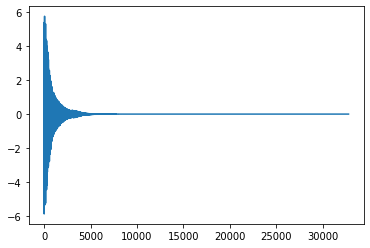

In [6]:
plt.plot(data1)

## Also load in 11 experimental lipid mixture spectra

In [7]:
## Switch directories, take only real data, reshape, and make an array of all mixture spectra. Also load lipid profile data for mixtures.
## A bunch of functions which should be changed to loops, or just one loop probably. Or maybe even done in one line each rather than loops...

#
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")

#
Tdic1,Tdata1 = ng.pipe.read('DL_LipMix4_1_PROTON-2-3.fid')
Tdic2,Tdata2 = ng.pipe.read('DL_LipMix4_2_PROTON-2-3.fid')
Tdic3,Tdata3 = ng.pipe.read('DL_LipMix4_3_PROTON-3-3.fid')
Tdic4,Tdata4 = ng.pipe.read('DL_LipMix5_1_PROTON-3-3.fid')
Tdic5,Tdata5 = ng.pipe.read('DL_LipMix5_2_PROTON-3-3.fid')
Tdic6,Tdata6 = ng.pipe.read('DL_LipMix5_3_PROTON-3-3.fid')
Tdic9,Tdata9 = ng.pipe.read('DL_LipMix_7-3_PROTON-1-3.fid')
Tdic10,Tdata10 = ng.pipe.read('DL_LipMix_8-1_PROTON-2-3.fid')
Tdic12,Tdata12 = ng.pipe.read('DL_LipMixture_1_PROTON-2-3.fid')
Tdic13,Tdata13 = ng.pipe.read('DL_LipMixture_2_PROTON-2-3.fid')
Tdic14,Tdata14 = ng.pipe.read('DL_LipMixture_3_PROTON-2-3.fid')

#
#Tdic1,Tdata1 = ng.process.pipe_proc.em(Tdic1,Tdata1,lb=0.2)
#Tdic2,Tdata2 = ng.process.pipe_proc.em(Tdic2,Tdata2,lb=0.2)
#Tdic3,Tdata3 = ng.process.pipe_proc.em(Tdic3,Tdata3,lb=0.2)
#Tdic4,Tdata4 = ng.process.pipe_proc.em(Tdic4,Tdata4,lb=0.2)
#Tdic5,Tdata5 = ng.process.pipe_proc.em(Tdic5,Tdata5,lb=0.2)
#Tdic6,Tdata6 = ng.process.pipe_proc.em(Tdic6,Tdata6,lb=0.2)
#Tdic9,Tdata9 = ng.process.pipe_proc.em(Tdic9,Tdata9,lb=0.2)
#Tdic10,Tdata10 = ng.process.pipe_proc.em(Tdic10,Tdata10,lb=0.2)
#Tdic12,Tdata12 = ng.process.pipe_proc.em(Tdic12,Tdata12,lb=0.2)
#Tdic13,Tdata13 = ng.process.pipe_proc.em(Tdic13,Tdata13,lb=0.2)
#Tdic14,Tdata14 = ng.process.pipe_proc.em(Tdic14,Tdata14,lb=0.2)

#
Tdic1,Tdata1 = ng.process.pipe_proc.ft(Tdic1,Tdata1)
Tdic2,Tdata2 = ng.process.pipe_proc.ft(Tdic2,Tdata2)
Tdic3,Tdata3 = ng.process.pipe_proc.ft(Tdic3,Tdata3)
Tdic4,Tdata4 = ng.process.pipe_proc.ft(Tdic4,Tdata4)
Tdic5,Tdata5 = ng.process.pipe_proc.ft(Tdic5,Tdata5)
Tdic6,Tdata6 = ng.process.pipe_proc.ft(Tdic6,Tdata6)
Tdic9,Tdata9 = ng.process.pipe_proc.ft(Tdic9,Tdata9)
Tdic10,Tdata10 = ng.process.pipe_proc.ft(Tdic10,Tdata10)
Tdic12,Tdata12 = ng.process.pipe_proc.ft(Tdic12,Tdata12)
Tdic13,Tdata13 = ng.process.pipe_proc.ft(Tdic13,Tdata13)
Tdic14,Tdata14 = ng.process.pipe_proc.ft(Tdic14,Tdata14)

#
test1 = Tdata1.real
test2 = Tdata2.real
test3 = Tdata3.real
test4 = Tdata4.real
test5 = Tdata5.real
test6 = Tdata6.real
test9 = Tdata9.real
test10 = Tdata10.real
test12 = Tdata12.real
test13 = Tdata13.real
test14 = Tdata14.real

#
test = [test1,test2,test3,test4,test5,test6,test9,test10,test12,test13,test14]
test = np.array(test)
test = test[:,14000:28000]

#for i in np.arange(11):
#    test[i] = test[i] -test[i][:200].mean()

#test = test/OvMax

##
os.chdir("/home/htjhnson/Downloads/DL_NMR")
TestLipProfiles = pd.read_excel('DL_LipMix_LipidProfiles_More.xlsx', index_col=0)

TestLipProfiles = np.array(TestLipProfiles)
## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
TestLipProfiles = np.array(TestLipProfiles)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)

In [8]:
## Switch directories, take only real data, reshape, and make an array of all mixture spectra. Also load lipid profile data for mixtures.
## A bunch of functions which should be changed to loops, or just one loop probably.

#
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


#
Tdic1z,Tdata1z = ng.pipe.read('DL_LipMix4_1_PROTON-2-3.fid')
Tdic2z,Tdata2z = ng.pipe.read('DL_LipMix4_2_PROTON-2-3.fid')
Tdic3z,Tdata3z = ng.pipe.read('DL_LipMix4_3_PROTON-3-3.fid')
Tdic4z,Tdata4z = ng.pipe.read('DL_LipMix5_1_PROTON-3-3.fid')
Tdic5z,Tdata5z = ng.pipe.read('DL_LipMix5_2_PROTON-3-3.fid')
Tdic6z,Tdata6z = ng.pipe.read('DL_LipMix5_3_PROTON-3-3.fid')
Tdic9z,Tdata9z = ng.pipe.read('DL_LipMix_7-3_PROTON-1-3.fid')
Tdic10z,Tdata10z = ng.pipe.read('DL_LipMix_8-1_PROTON-2-3.fid')
Tdic12z,Tdata12z = ng.pipe.read('DL_LipMixture_1_PROTON-2-3.fid')
Tdic13z,Tdata13z = ng.pipe.read('DL_LipMixture_2_PROTON-2-3.fid')
Tdic14z,Tdata14z = ng.pipe.read('DL_LipMixture_3_PROTON-2-3.fid')

#
Tdic1z,Tdata1z = ng.process.pipe_proc.em(Tdic1z,Tdata1z,lb=0.2)
Tdic2z,Tdata2z = ng.process.pipe_proc.em(Tdic2z,Tdata2z,lb=0.2)
Tdic3z,Tdata3z = ng.process.pipe_proc.em(Tdic3z,Tdata3z,lb=0.2)
Tdic4z,Tdata4z = ng.process.pipe_proc.em(Tdic4z,Tdata4z,lb=0.2)
Tdic5z,Tdata5z = ng.process.pipe_proc.em(Tdic5z,Tdata5z,lb=0.2)
Tdic6z,Tdata6z = ng.process.pipe_proc.em(Tdic6z,Tdata6z,lb=0.2)
Tdic9z,Tdata9z = ng.process.pipe_proc.em(Tdic9z,Tdata9z,lb=0.2)
Tdic10z,Tdata10z = ng.process.pipe_proc.em(Tdic10z,Tdata10z,lb=0.2)
Tdic12z,Tdata12z = ng.process.pipe_proc.em(Tdic12z,Tdata12z,lb=0.2)
Tdic13z,Tdata13z = ng.process.pipe_proc.em(Tdic13z,Tdata13z,lb=0.2)
Tdic14z,Tdata14z = ng.process.pipe_proc.em(Tdic14z,Tdata14z,lb=0.2)

#
Tdic1z,Tdata1z = ng.process.pipe_proc.ft(Tdic1z,Tdata1z)
Tdic2z,Tdata2z = ng.process.pipe_proc.ft(Tdic2z,Tdata2z)
Tdic3z,Tdata3z = ng.process.pipe_proc.ft(Tdic3z,Tdata3z)
Tdic4z,Tdata4z = ng.process.pipe_proc.ft(Tdic4z,Tdata4z)
Tdic5z,Tdata5z = ng.process.pipe_proc.ft(Tdic5z,Tdata5z)
Tdic6z,Tdata6z = ng.process.pipe_proc.ft(Tdic6z,Tdata6z)
Tdic9z,Tdata9z = ng.process.pipe_proc.ft(Tdic9z,Tdata9z)
Tdic10z,Tdata10z = ng.process.pipe_proc.ft(Tdic10z,Tdata10z)
Tdic12z,Tdata12z = ng.process.pipe_proc.ft(Tdic12z,Tdata12z)
Tdic13z,Tdata13z = ng.process.pipe_proc.ft(Tdic13z,Tdata13z)
Tdic14z,Tdata14z = ng.process.pipe_proc.ft(Tdic14z,Tdata14z)

#
test1z = Tdata1z.real
test2z = Tdata2z.real
test3z = Tdata3z.real
test4z = Tdata4z.real
test5z = Tdata5z.real
test6z = Tdata6z.real
test9z = Tdata9z.real
test10z = Tdata10z.real
test12z = Tdata12z.real
test13z = Tdata13z.real
test14z = Tdata14z.real

#
test2 = [test1z,test2z,test3z,test4z,test5z,test6z,test9z,test10z,test12z,test13z,test14z]
test2 = np.array(test2)
test2 = test2[:,14000:28000]
#test2 = test2/OvMax

    

##
os.chdir("/home/htjhnson/Downloads/DL_NMR")
TestLipProfiles = pd.read_excel('DL_LipMix_LipidProfiles_More.xlsx', index_col=0)

TestLipProfiles = np.array(TestLipProfiles)
## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
TestLipProfiles = np.array(TestLipProfiles)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)

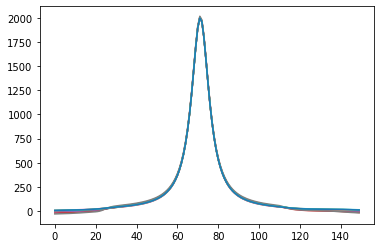

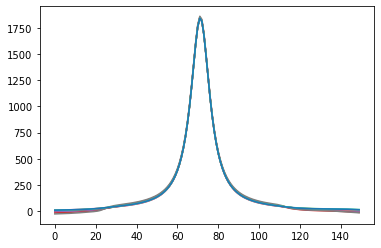

In [9]:
for i in np.arange(11):
    plt.plot(test[i][6700:6850])
plt.show()
for i in np.arange(11):
    plt.plot(test2[i][6700:6850])

In [10]:
## Set an amount of data points for the maximum individual metabolite shift

#max_shift = 10
max_shift = 15

## Generate a dataset using linear combinations of lipid standards, then adding back DMSO2-only spectra. Add noise, baseline shift, shift individual metabolite signals, and vary linebroadening.

In [30]:
## None left out, all 34 reference scans, try different scalars (0.1-3)
## Use seeds for reproducibility


### None left out, all 34 reference scans, try different scalars (0.1-3)


spec = []
conc = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 55000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+10000)
    linebroad = random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

    #next three trilin.
    random.seed(i+1000)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    _data2 = ng.process.proc_base.cs(_data2,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+0)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+1)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+1001)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    _data3 = ng.process.proc_base.cs(_data3,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+3)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+1002)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    _data4 = ng.process.proc_base.cs(_data4,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+4)
    x4_int2 = 0
    random.seed(i+5)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    #Next 4 dipalmPE
    random.seed(i+1003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    _data5 = ng.process.proc_base.cs(_data5,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+6)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+7)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+1004)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    _data6 = ng.process.proc_base.cs(_data6,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+8)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+9)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+1005)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    _data7 = ng.process.proc_base.cs(_data7,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+10)
    x7_int2 = 0
    random.seed(i+11)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+1006)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    _data8 = ng.process.proc_base.cs(_data8,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+12)
    x8_int2 = 0
    random.seed(i+13)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+1007)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    _data9 = ng.process.proc_base.cs(_data9,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+14)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+15)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+1008)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    _data10 = ng.process.proc_base.cs(_data10,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+16)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+17)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+1009)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    _data11 = ng.process.proc_base.cs(_data11,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+18)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+19)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    _data12 = ng.process.proc_base.cs(_data12,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+20)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    _data13 = ng.process.proc_base.cs(_data13,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+22)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+23)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1012)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    _data14 = ng.process.proc_base.cs(_data14,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+24)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    _data15 = ng.process.proc_base.cs(_data15,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+26)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    _data16 = ng.process.proc_base.cs(_data16,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+28)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    _data17 = ng.process.proc_base.cs(_data17,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+30)
    x17_int2 = 0
    random.seed(i+31)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    _data18 = ng.process.proc_base.cs(_data18,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+32)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    _data19 = ng.process.proc_base.cs(_data19,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+34)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    _data20 = ng.process.proc_base.cs(_data20,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+36)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    _data21 = ng.process.proc_base.cs(_data21,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+38)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    _data22 = ng.process.proc_base.cs(_data22,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+40)
    x22_int2 = 0
    random.seed(i+41)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    _data23 = ng.process.proc_base.cs(_data23,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+42)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    _data24 = ng.process.proc_base.cs(_data24,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+44)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    _data25 = ng.process.proc_base.cs(_data25,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+46)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    _data26 = ng.process.proc_base.cs(_data26,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+48)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    _data27 = ng.process.proc_base.cs(_data27,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+50)
    x27_int2 = 0
    random.seed(i+51)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    _data28 = ng.process.proc_base.cs(_data28,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+52)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    _data29 = ng.process.proc_base.cs(_data29,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+54)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    _data30 = ng.process.proc_base.cs(_data30,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+56)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    _data31 = ng.process.proc_base.cs(_data31,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+58)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    _data32 = ng.process.proc_base.cs(_data32,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+60)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    _data33 = ng.process.proc_base.cs(_data33,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+62)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    _data34 = ng.process.proc_base.cs(_data34,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+64)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    _data35 = ng.process.proc_base.cs(_data35,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+66)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    _data36 = ng.process.proc_base.cs(_data36,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+68)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    _data37 = ng.process.proc_base.cs(_data37,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+70)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


    _dic1,xdata = ng.process.pipe_proc.di(_dic1,xdata)
        
    
    ## Take only important lipid signal region for each spectra, then add random levels of noise.
    xdata = xdata[14000:28000]
    np.random.seed(i+670)
    random.seed(i+670)
    r = random.uniform(0.1,3)
    xdata = xdata+np.random.uniform(low=-10*r,high=10*r,size=14000)
    
    
    ## Next two either basecorrect the data, or add random baseline variations (just shifting entire spectrum up or down)
    #xdata = xdata - xdata[:200].mean()
    random.seed(i+800)
    #xdata = xdata - xdata[:200].mean()
    xdata = xdata + random.uniform(-200,200)

    spec.append(xdata)
    conc.append(ydata)
    
    
## Determine max value in entire dataset, and use this value to normalize dataset intensities.
OvMaxL = []
for i in spec:
    OvMaxL.append(np.max(i))
OvMax = np.max(OvMaxL)
print(OvMax)

spec = spec/OvMax



## Use the max value to also scale the experimental mixture spectra
test = test/OvMax


## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc = np.array(conc)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)

93855.0064968107


In [ ]:
for i in np.arange(100):
    plt.plot(spec[i])
plt.show()
for i in np.arange(11):
    plt.plot(test[i])

In [ ]:
for i in np.arange(100):
    plt.plot(spec[i][:2000])
plt.show()
for i in np.arange(11):
    plt.plot(test[i][:2000])

In [ ]:
for i in np.arange(100):
    plt.plot(spec[i][6700:6850])
plt.show()
for i in np.arange(11):
    plt.plot(test[i][6700:6850])

In [31]:
## Scale the target concentrations to be in the range of 0-1
conc_s = conc.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    print(conc_s[:,i].max())
    
## Also scale experimental mixture data 
TestLipProfiles_s = TestLipProfiles.copy()
for i in np.arange(18):
    TestLipProfiles_s[:,i]  = TestLipProfiles_s[:,i]/conc[:,i].max()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


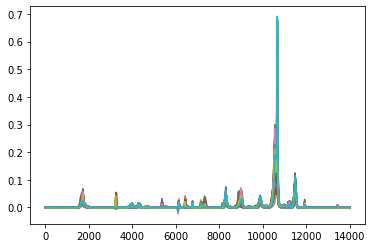

In [32]:
for i in np.arange(100):
    plt.plot(spec[i])

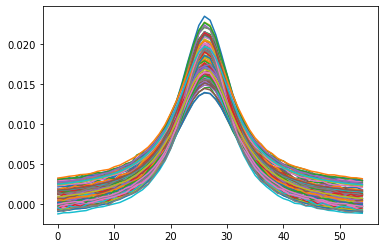

In [33]:
## Zoom in on DMSO2 peak overlay of 100 generated spectra, peaks should cluster in nine distinct zones corresponding to nine linebroadening constants

for i in np.arange(100):
    plt.plot(spec[i,6745:6800])

In [ ]:
## Split dataset into testing and training sets, and reshape for network training

xtrain, xtest, ytrain, ytest = train_test_split(spec[:50000], conc_s[:50000], test_size=0.2)

xtrain = np.squeeze(xtrain)
xtest = np.squeeze(xtest)
ytrain = np.squeeze(ytrain)
ytest = np.squeeze(ytest)

#xtrain = np.squeeze(xtrain)
#xtest = np.squeeze(xtest)

In [12]:
## Create MLP architecture and training parameters/metrics definition

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(layers.Dense(200, input_dim=14000, kernel_initializer='he_uniform', activation='relu'))
#    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(18))
    model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [ ]:
## Create the first MLP model definition and model.
start = time.time()

model = get_model(14000,18)
model.summary()

history = model.fit(xtrain, ytrain, batch_size=128, epochs=100,
validation_data=(xtest, ytest))

end = time.time()
print(end - start)

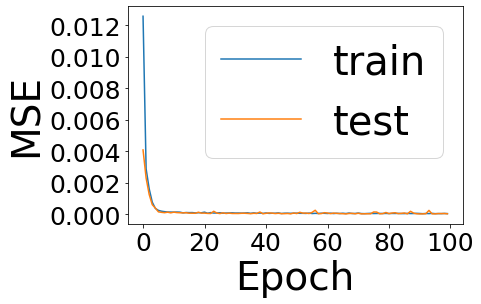

In [32]:
#os.chdir("/home/htjhnson/Downloads")

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('MSE')
plt.ylabel('MSE', fontsize=39)
plt.xlabel('Epoch', fontsize=39)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(['train', 'test'], loc='upper right', fontsize=40)
plt.rcParams["figure.figsize"] = (12,10)
#plt.savefig('Loss.svg')
#plt.savefig('Loss.png')


plt.show()

In [13]:
## Save trained model weights (Run this function once, then comment out and only run data loading function.)

#model.save_weights('./checkpoints/MLP_FftPhaRef2pt4lw_LinearCombinations_AddShiftsNoiseBroad_ThenBaseshift_ThenBroad_TwoEach_OutputScaled_50000ep')


## Load trained model
model = get_model(14000,18)

# Restore the weights
model.load_weights('./checkpoints/MLP_FftPhaRef2pt4lw_LinearCombinations_AddShiftsNoiseBroad_ThenBaseshift_ThenBroad_TwoEach_OutputScaled_50000ep')

In [34]:
ypred = model.predict(np.squeeze(spec[50000:]))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()


rmse = np.sqrt(((ypred - conc[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data")

157/157 [==============================] - 0s 2ms/step
Tg 0.13
TC 0.03
TPL 0.03
TFA 0.22
PUFA 0.32
MUFA 0.15
SFA 0.2
Om3 0.08
Om6 0.25
Om9 0.18
LA 0.32
DHA 0.06
PC 0.07
PE 0.05
FC 0.03
EC 0.05
LPC 0.03
SM 0.03
Overall RMSE:  0.125
For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data


In [35]:
ypred = model.predict(np.squeeze(spec[50000:]))

rmse = np.sqrt(((ypred - conc_s[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec synthetic data")    

157/157 [==============================] - 0s 2ms/step
Tg 0.0017
TC 0.0015
TPL 0.0017
TFA 0.0009
PUFA 0.0032
MUFA 0.0014
SFA 0.0021
Om3 0.0031
Om6 0.0029
Om9 0.0017
LA 0.0039
DHA 0.0045
PC 0.0054
PE 0.0068
FC 0.0034
EC 0.0044
LPC 0.0162
SM 0.012
Overall RMSE:  0.0043
For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec synthetic data


In [10]:
test = test/92791.9562080544

In [13]:
ypred = model.predict((test))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    
rmse = np.sqrt(((ypred - TestLipProfiles) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec experimental mixtures")

1/1 [==============================] - 0s 137ms/step


NameError: name 'conc' is not defined

In [14]:
ypred = model.predict((test))
    
    
rmse = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec experimental mixtures")

1/1 [==============================] - 0s 15ms/step


NameError: name 'TestLipProfiles_s' is not defined

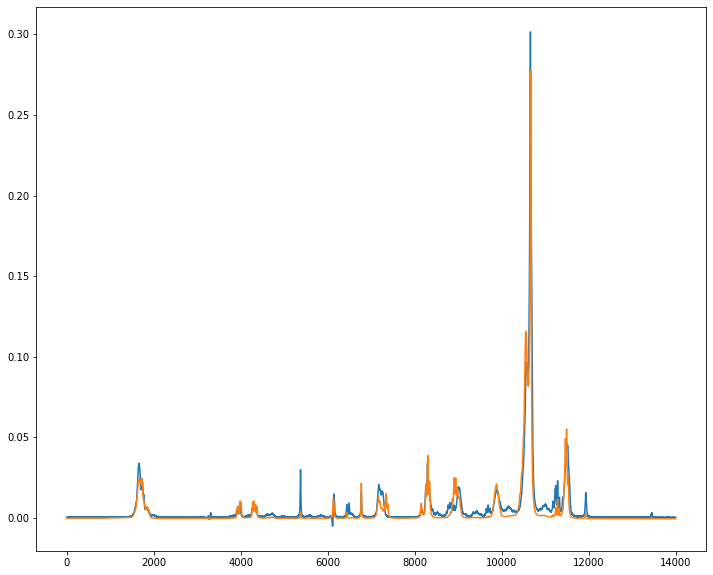

In [38]:
plt.plot(spec[0])
plt.plot(test[0])

In [39]:
for i in np.arange(18):
    print(LipList5[i],ypred[0,i],TestLipProfiles[0,i])

Tg 0.29008937 22.35417289
TC 0.075091384 1.357326245
TPL 0.06314144 1.281982745
TFA 0.27855095 71.56503082924351
PUFA 0.3063949 30.29539931233264
MUFA 0.13044372 15.260268084082881
SFA 0.24841578 26.009363432827993
Om3 0.29294688 6.73308223
Om6 0.2707912 23.56231708
Om9 0.1312949 15.26026808
LA 0.27117905 23.16029658
DHA 0.44461402 5.560059385
PC -0.024152543 0.55916761
PE 0.1165238 0.722815135
FC 0.0580369 0.6907358614174597
EC 0.077292725 1.279945128726704
LPC 0.31351513 0.0
SM 0.0031523216 0.0


In [40]:
for i in np.arange(18):
    print(LipList5[i],ypred[7,i],TestLipProfiles[7,i])

Tg 0.44081023 31.29
TC 0.6989909 13.53
TPL 0.40814897 7.52
TFA 0.5260457 124.18062155656422
PUFA 0.20101659 20.661252254842733
MUFA 0.40499172 40.9344343511421
SFA 0.68581265 62.58493495057937
Om3 0.5641368 12.56
Om6 0.07345906 8.1
Om9 0.40403163 40.93
LA 0.012679204 3.44
DHA 0.48574126 5.39
PC 0.40958163 5.12
PE 0.35258457 2.4
FC 0.54368377 5.424855615895182
EC 0.68104255 8.101939130557582
LPC 0.18343732 0.0
SM -0.039320927 0.0


In [41]:
for i in np.arange(18):
    print(LipList5[i],ypred[10,i],TestLipProfiles[10,i])

Tg 0.07967201 5.9733468229539115
TC 0.28131634 5.477918917274888
TPL 0.40833554 7.966964261844273
TFA 0.14784011 36.72010787906996
PUFA 0.11034794 10.904753803555007
MUFA 0.068577334 6.753704222659818
SFA 0.18594384 18.638122721072186
Om3 0.22852847 5.365346001859296
Om6 0.06278092 5.5394078016957105
Om9 0.06833755 6.653515008689658
LA 0.05980227 5.1055198207122015
DHA 0.36760142 4.489488944764286
PC 0.33709228 2.9359401670895613
PE 0.35164735 3.9462173794114497
FC 0.45725653 4.441581390766806
EC 0.082263686 1.0363375265080814
LPC 0.30851865 0.6612795835603171
SM 0.16115774 0.42352713178294576


## Now calculate MAPE

In [42]:
## Mean percent error for first 16 lipid groups
mpe1 = (abs(TestLipProfiles_s[:,:16] - ypred[:,:16])/TestLipProfiles_s[:,:16]).mean(axis=0)*100

## Mean percent error for last 2 lipid groups (separated as they are only in included in the last three experimental spectra)
mpe2 = (abs(TestLipProfiles_s[8:11,16:] - ypred[8:11,16:])/TestLipProfiles_s[8:11,16:]).mean(axis=0)*100

## Join all 18 lipids into the same list and print mean percent error for each lipid group quantified
mpe_all = np.concatenate((np.array(mpe1),np.array(mpe2)),axis=0)
for i in np.arange(18):
    print(LipList5[i],mpe_all[i].round(2))
    
mape = mpe_all.mean()
print(mape)

Tg 4.27
TC 4.45
TPL 3.25
TFA 3.71
PUFA 1.93
MUFA 5.45
SFA 4.53
Om3 5.11
Om6 4.46
Om9 6.37
LA 8.81
DHA 4.39
PC 33.01
PE 15.5
FC 11.5
EC 20.78
LPC 6.99
SM 10.59
8.617112159884892


In [43]:
#test = test/

In [191]:
## Load Liver Data

os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT")




testFiles = ['NGR_Liver_Lipids_1__proton-1-3.fid', 'NGR_Liver_Lipid_2_PROTON-1-3.fid', 'NGR_Liver_Lipids_3__proton-1-3.fid', 'NGR_Liver_Lipid_4_second__proton-1-3.fid','NGR_Liver_Lipid_5__PROTON-4-3.fid', 'NGR_Liver_Lipids_17__proton-1-3.fid','NGR_Liver_Lipids_18_PROTON-1-3.fid','NGR_Liver_Lipid_19_PROTON-1-3.fid','NGR_Liver_Lipid_21_second_half__proton-1-3.fid','NGR_Liver_Lipids_22_proton-1-3.fid','NGR_Liver_Lipids_23_PROTON-1-3.fid','NGR_Liver_Lipid_24_4th_half__proton-1-3.fid','NGR_Liver_25_Lipids___proton-1-3.fid','NGR_Liver_Lipids_36_PROTON-1-3.fid','NGR_Liver_Lipids_37_PROTON-2-3.fid','NGR_Liver_Lipids_39__proton-1-3.fid']
        
testFlist = []
for i in testFiles:
    testFlist.append(i[4:19])
    
testFlist = testFlist[:32]

LiverDic = []
LiverData = []
for i in range(len(testFlist)):
    globals()[testFlist[i]+ '_' + 'Dic'],globals()[testFlist[i]+ '_' + 'Data'] = ng.pipe.read(testFiles[i])
    LiverDic.append(globals()[testFlist[i]+ '_' + 'Dic'])
    LiverData.append(globals()[testFlist[i]+ '_' + 'Data'])
    
    
for i in np.arange(16):
    LiverDic[i],LiverData[i] = ng.process.pipe_proc.ft(LiverDic[i],LiverData[i])
    
for i in np.arange(16):
    LiverData[i] = LiverData[i].real
    
for i in np.arange(16):
    LiverData[i] = np.reshape(LiverData[i], (32768,1))
    
#for i in np.arange(16):
#    LiverData[i] = LiverData[i]/OvMax
    
    
    
os.chdir("/home/htjhnson/Downloads/DL_NMR")
LiverCRAFT1 = pd.read_excel('Liver_AdLib_AllData_half_reodered_adj.xlsx', index_col=0)
LipListCRAFT = ['Tg','TC','TFA','PUFA','MUFA','SFA','UFA','Om3','LA','PC','PE','SM','PUFAp','MUFAp','SFAp']

LiverData = np.array(LiverData)[:,14000:28000]
LiverData = LiverData/OvMax

## First with TMS

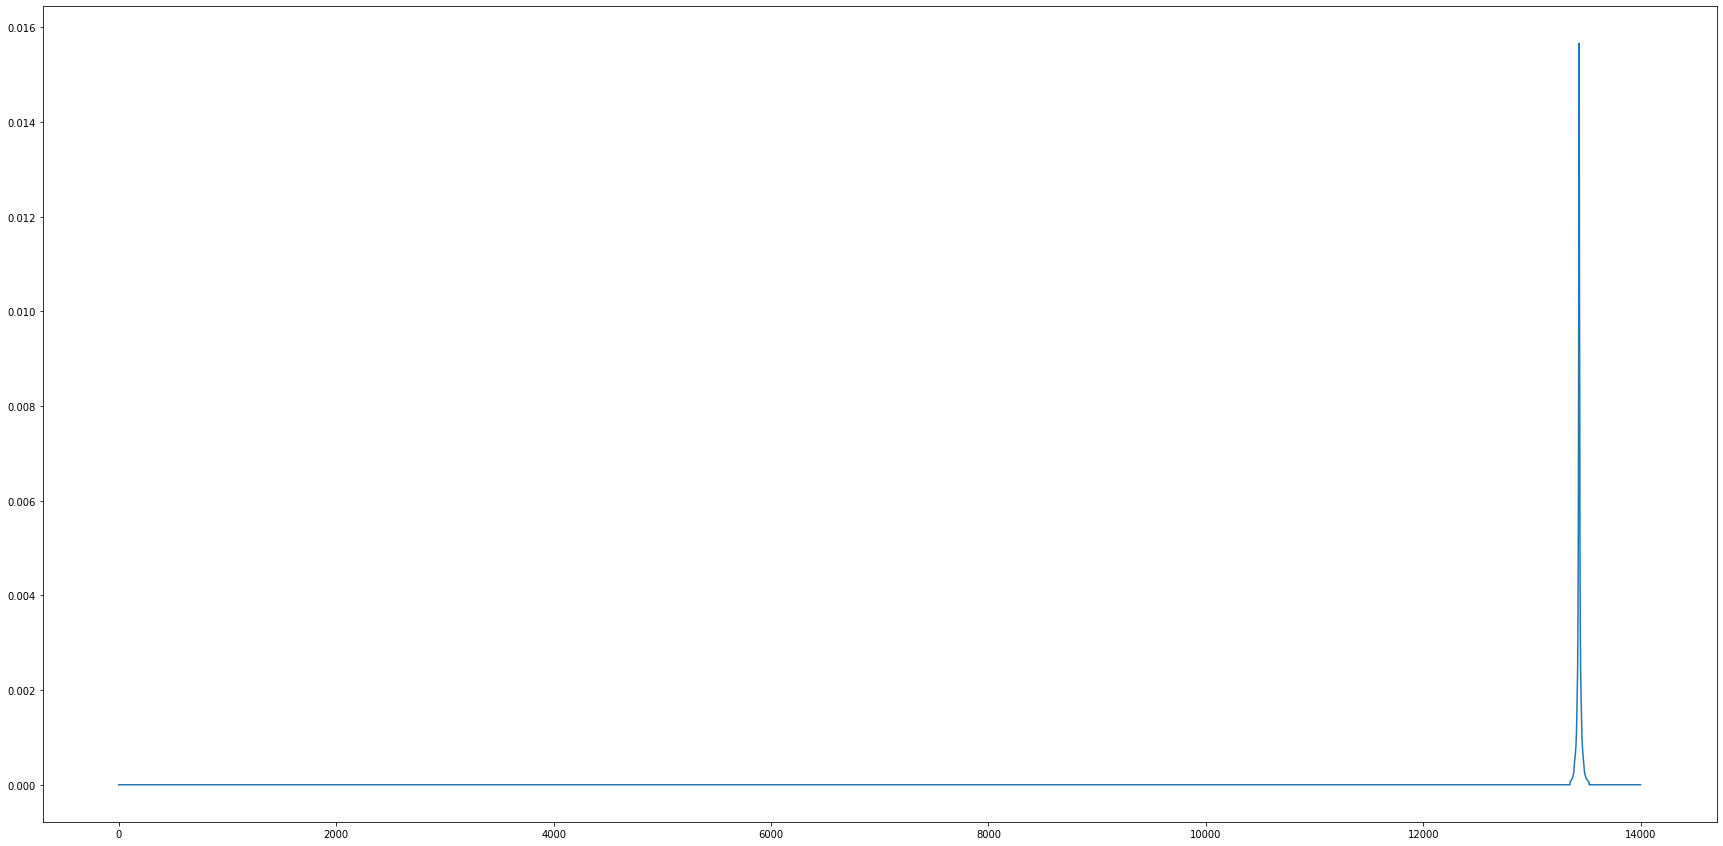

In [192]:
# Isolate TMS signal from one hepatic spectra
TMS = LiverData[1].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])
plt.plot(TMS)

# Add TMS signal to each experimental lipid mixture
test_TMS = test.copy()
for i in np.arange(11):
    test_TMS[i] = test_TMS[i] + TMS

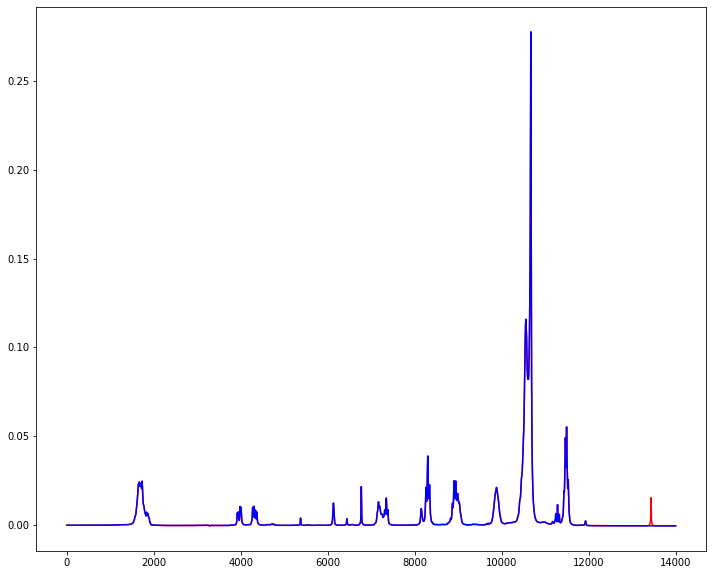

In [46]:
## Check if signal has been added

plt.plot(test_TMS[0],color='r')
plt.plot(test[0],color='b')

In [47]:
## Predict concentrations for experimental dataset with and without TMS added

ypred = model.predict(test)
ypred_TMS = model.predict(test_TMS)

1/1 [==============================] - 0s 16ms/step


In [48]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_TMS[0][i])

Tg 0.29008937 0.28994972
TC 0.075091384 0.06819264
TPL 0.06314144 0.062256135
TFA 0.27855095 0.2775311
PUFA 0.3063949 0.30619752
MUFA 0.13044372 0.13041048
SFA 0.24841578 0.24584697
Om3 0.29294688 0.29351485
Om6 0.2707912 0.27027455
Om9 0.1312949 0.13121036
LA 0.27117905 0.27078748
DHA 0.44461402 0.44224223
PC -0.024152543 -0.027120989
PE 0.1165238 0.11675624
FC 0.0580369 0.042945817
EC 0.077292725 0.078759275
LPC 0.31351513 0.33197123
SM 0.0031523216 -0.0046328837


In [49]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_TMS[1][i])

Tg 0.231168 0.2310283
TC 0.12937911 0.12248036
TPL 0.12726581 0.12638052
TFA 0.2429012 0.24188125
PUFA 0.26260847 0.26241106
MUFA 0.113261774 0.113228574
SFA 0.22154997 0.2189812
Om3 0.2799839 0.28055197
Om6 0.22333612 0.22281954
Om9 0.11370123 0.113616675
LA 0.21973889 0.21934737
DHA 0.35486925 0.35249743
PC 0.07164297 0.068674564
PE 0.1960587 0.19629115
FC 0.11281941 0.09772833
EC 0.119126886 0.12059344
LPC 0.053940337 0.072396435
SM -0.009885758 -0.017670989


## Now with MTBE

In [50]:
# Isolate MTBE signal from one hepatic spectra
MTBE = LiverData[6].copy()

MTBE[:6355] = np.zeros([6355,1])
MTBE[6385:10775] = np.zeros([10775-6385,1])
MTBE[10800:] = np.zeros([3200,1])

MTBE = np.reshape(MTBE,[14000])


# Add MTBE signal to each experimental lipid mixture
test_MTBE = test.copy()
for i in np.arange(11):
    test_MTBE[i] = test_MTBE[i] + MTBE*2

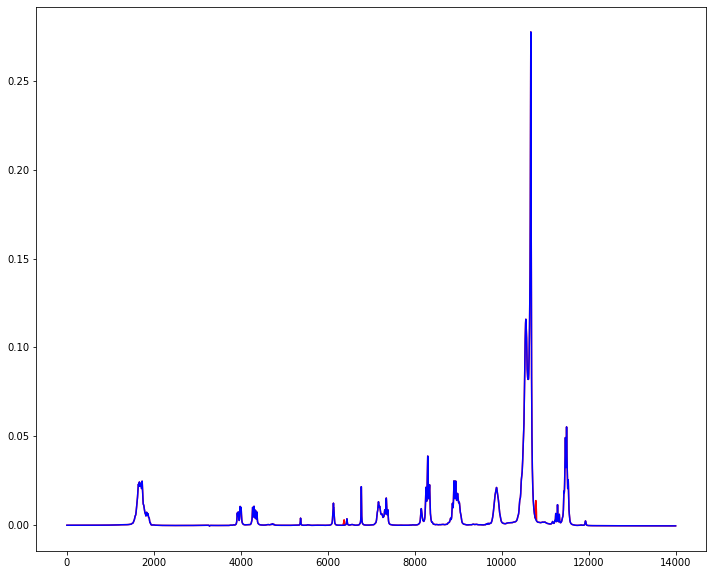

In [51]:
## Check if signal has been added

plt.plot(test_MTBE[0],color='r')
plt.plot(test[0],color='b')

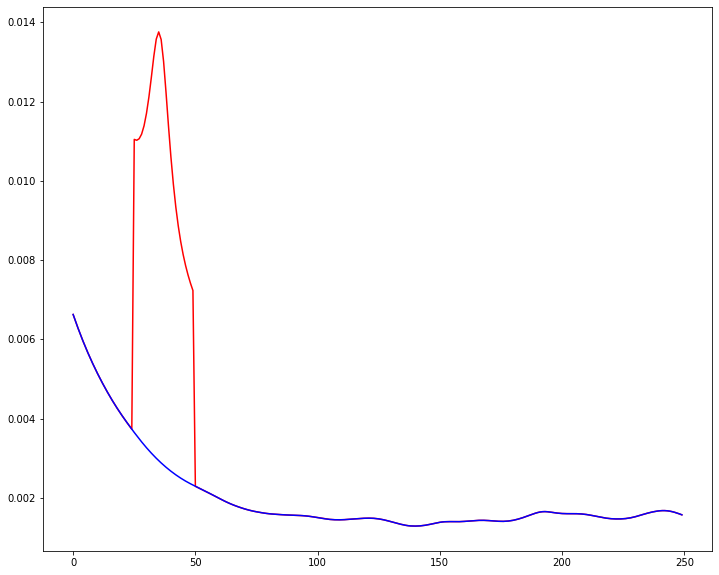

In [52]:
## Check if signal has been added

plt.plot(test_MTBE[0][10750:11000],color='r')
plt.plot(test[0][10750:11000],color='b')

In [53]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_MTBE = model.predict(test_MTBE)

1/1 [==============================] - 0s 16ms/step


In [54]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_MTBE[0][i])

Tg 0.29008937 0.2931078
TC 0.075091384 0.06656356
TPL 0.06314144 0.06971075
TFA 0.27855095 0.2825639
PUFA 0.3063949 0.30677137
MUFA 0.13044372 0.12794518
SFA 0.24841578 0.2575616
Om3 0.29294688 0.29439762
Om6 0.2707912 0.27169546
Om9 0.1312949 0.12876919
LA 0.27117905 0.2726112
DHA 0.44461402 0.4431333
PC -0.024152543 0.004249951
PE 0.1165238 0.10307802
FC 0.0580369 0.051523834
EC 0.077292725 0.06881034
LPC 0.31351513 0.25340238
SM 0.0031523216 0.011203354


In [55]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_MTBE[1][i])

Tg 0.231168 0.23418641
TC 0.12937911 0.12085134
TPL 0.12726581 0.1338351
TFA 0.2429012 0.24691406
PUFA 0.26260847 0.26298493
MUFA 0.113261774 0.11076324
SFA 0.22154997 0.23069575
Om3 0.2799839 0.28143468
Om6 0.22333612 0.22424045
Om9 0.11370123 0.11117551
LA 0.21973889 0.221171
DHA 0.35486925 0.35338837
PC 0.07164297 0.10004547
PE 0.1960587 0.18261293
FC 0.11281941 0.10630639
EC 0.119126886 0.11064453
LPC 0.053940337 -0.0061724293
SM -0.009885758 -0.001834715


In [56]:
## Now with water signal two peak version

In [57]:
# Isolate Water signal from one hepatic spectra
Water = LiverData[6].copy()

Water[:2900] = np.zeros([2900,1])
Water[3700:] = np.zeros([10300,1])

Water = np.reshape(Water,[14000])


# Add water signal to each experimental lipid mixture
test_Water = test.copy()
for i in np.arange(11):
    test_Water[i] = test_Water[i] + Water

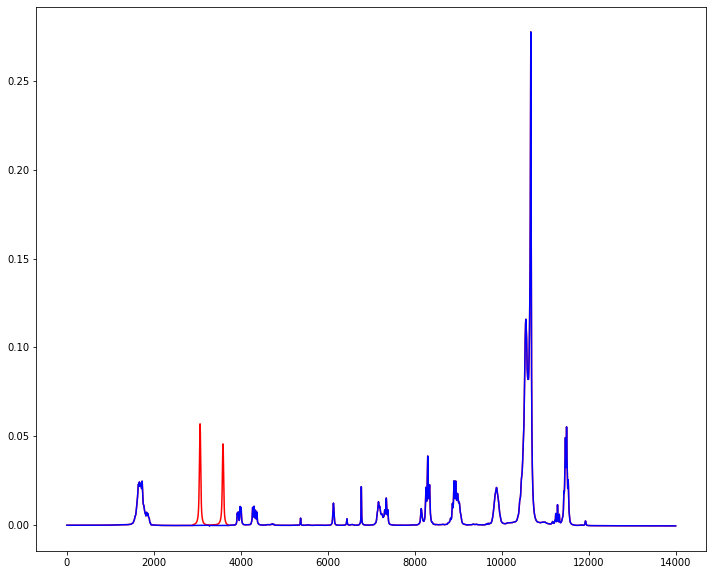

In [58]:
## Check if signal has been added

plt.plot(test_Water[0],color='r')
plt.plot(test[0],color='b')

In [59]:
## Predict concentrations for experimental dataset with and without water added

ypred = model.predict(test)
ypred_Water = model.predict(test_Water)

1/1 [==============================] - 0s 16ms/step


In [60]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_Water[0][i])
    
#print(rmse(ypred[0],ypred_Water[0]))
#print(rmse(ypred[0],TestLipProfiles[0]))

Tg 0.29008937 0.30869386
TC 0.075091384 0.018248545
TPL 0.06314144 -0.025624586
TFA 0.27855095 0.2627124
PUFA 0.3063949 0.24804416
MUFA 0.13044372 0.092399165
SFA 0.24841578 0.2589612
Om3 0.29294688 0.1501779
Om6 0.2707912 0.24505179
Om9 0.1312949 0.09712761
LA 0.27117905 0.24328704
DHA 0.44461402 0.42881957
PC -0.024152543 0.13805115
PE 0.1165238 -0.14745449
FC 0.0580369 -0.070348196
EC 0.077292725 0.104625806
LPC 0.31351513 -0.39876232
SM 0.0031523216 -0.10703665


In [61]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_Water[1][i])

Tg 0.231168 0.23779169
TC 0.12937911 0.058533274
TPL 0.12726581 0.047496103
TFA 0.2429012 0.2246769
PUFA 0.26260847 0.21576197
MUFA 0.113261774 0.096781045
SFA 0.22154997 0.23986204
Om3 0.2799839 0.13864076
Om6 0.22333612 0.17916618
Om9 0.11370123 0.08404616
LA 0.21973889 0.1965772
DHA 0.35486925 0.34799147
PC 0.07164297 0.22965887
PE 0.1960587 -0.065506674
FC 0.11281941 -0.019025864
EC 0.119126886 0.13543919
LPC 0.053940337 -0.6225426
SM -0.009885758 -0.1051815


## Now with the single peak water signal

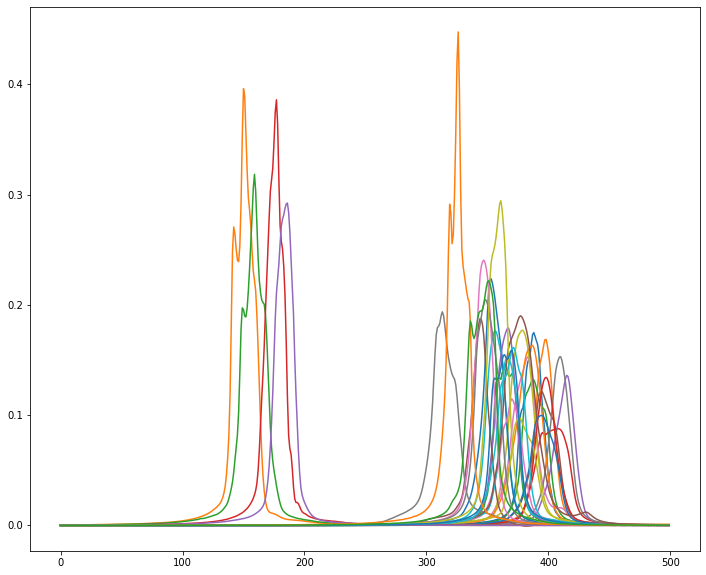

In [62]:
## Create variables for all file names of generated dataset
# Initialize some list variables
x1f = []
for filename in os.listdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/WaterSignals_FFTPhaseRefdBasec_Smooth"):
    if filename.startswith("D") == True:
        x1f.append(filename)

            
            
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/WaterSignals_FFTPhaseRefdBasec_Smooth")

# Initialize some list variables
x1 = []
x1d = []
# Read and append to list all FIDs and lipid profile values from data generation.
for i in np.arange(len(x1f)):
    xd,x = ng.pipe.read(x1f[i])
    x1d.append(xd)
    x1.append(x[14000:28000].real/OvMax)

x1 = np.array(x1)


for i in np.arange(33):
    plt.plot(x1[i][2900:3400])

In [63]:
# Isolate Water signal from one hepatic spectra
r = random.choice(np.arange(33))
wat = x1[r]

wat[:2900] = np.zeros([2900])
wat[3400:] = np.zeros([10600])

wat = np.reshape(wat,[14000])


# Add water signal to each experimental lipid mixture
test_wat = test.copy()
for i in np.arange(11):
    test_wat[i] = test_wat[i] + wat

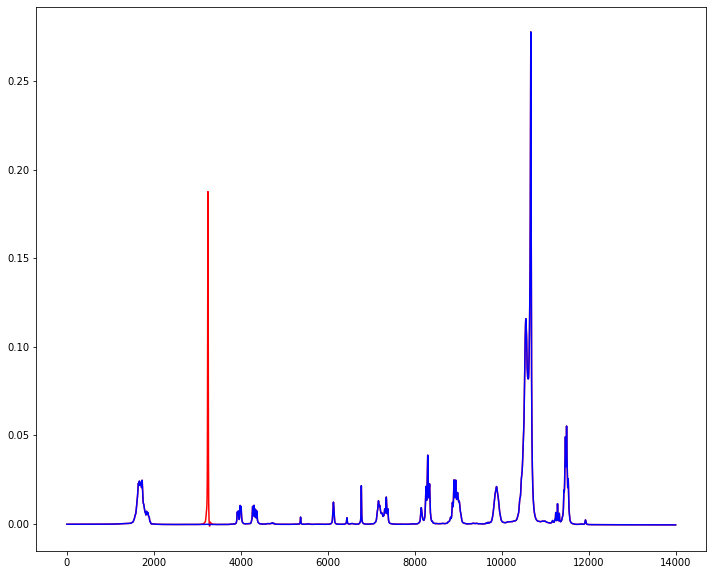

In [64]:
## Check if signal has been added

plt.plot(test_wat[0],color='r')
plt.plot(test[0],color='b')

In [65]:
## Predict concentrations for experimental dataset with and without water added

ypred = model.predict(test)
ypred_wat = model.predict(test_wat)

1/1 [==============================] - 0s 16ms/step


In [66]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_wat[0][i])

Tg 0.29008937 0.28867006
TC 0.075091384 0.064641856
TPL 0.06314144 0.027774973
TFA 0.27855095 0.2784367
PUFA 0.3063949 0.30633244
MUFA 0.13044372 0.13077536
SFA 0.24841578 0.23374607
Om3 0.29294688 0.29686847
Om6 0.2707912 0.27440423
Om9 0.1312949 0.14086163
LA 0.27117905 0.26998186
DHA 0.44461402 0.43626353
PC -0.024152543 -0.046407364
PE 0.1165238 0.11293765
FC 0.0580369 0.059058532
EC 0.077292725 0.07102127
LPC 0.31351513 0.13140202
SM 0.0031523216 0.061080005


In [67]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_wat[1][i])

Tg 0.231168 0.2290234
TC 0.12937911 0.1174085
TPL 0.12726581 0.09071889
TFA 0.2429012 0.24317107
PUFA 0.26260847 0.26343256
MUFA 0.113261774 0.11454235
SFA 0.22154997 0.2065249
Om3 0.2799839 0.2822982
Om6 0.22333612 0.22649187
Om9 0.11370123 0.12213592
LA 0.21973889 0.21670535
DHA 0.35486925 0.34695044
PC 0.07164297 0.04925202
PE 0.1960587 0.19215854
FC 0.11281941 0.11410204
EC 0.119126886 0.11368795
LPC 0.053940337 -0.12784483
SM -0.009885758 0.04737974


## Now without EPAm peak ~3.63 ppm

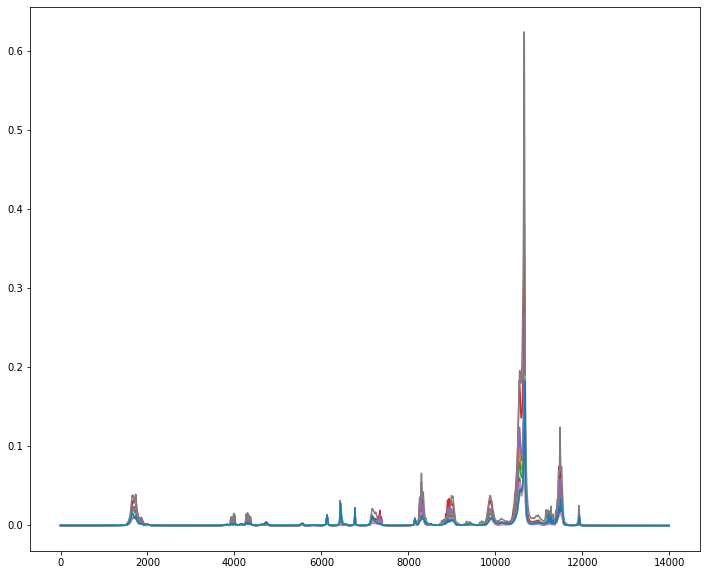

In [68]:

# Add MTBE signal to each experimental lipid mixture
NoEPAm = test.copy()

for i in np.arange(11):
    NoEPAm[i][5325:5425] = NoEPAm[i][:100]
    plt.plot(NoEPAm[i])
    
#NoEPAm = np.reshape(NoEPAm,[14000])


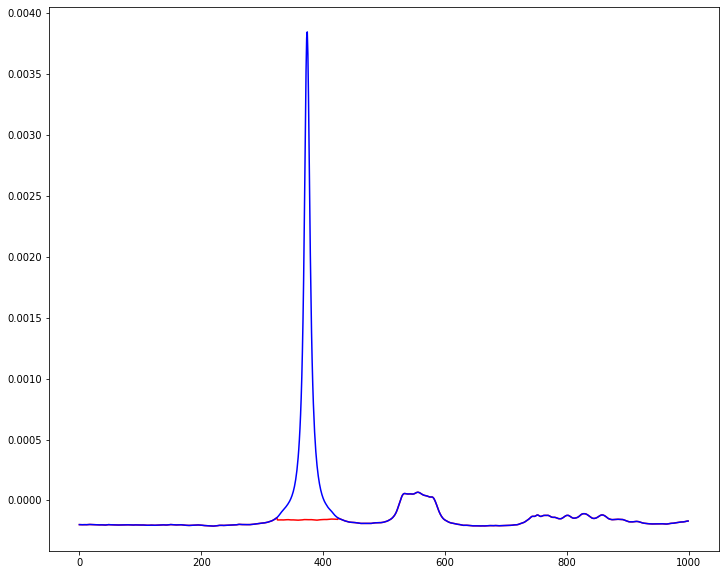

In [69]:
## Check if signal has been deleted

plt.plot(NoEPAm[0][5000:6000],color='r')
plt.plot(test[0][5000:6000],color='b')

In [70]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_NoEPAm = model.predict(NoEPAm)

1/1 [==============================] - 0s 16ms/step


In [71]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_NoEPAm[0][i])

Tg 0.29008937 0.29124367
TC 0.075091384 0.075954996
TPL 0.06314144 0.062544964
TFA 0.27855095 0.27821392
PUFA 0.3063949 0.30641106
MUFA 0.13044372 0.12929086
SFA 0.24841578 0.24857153
Om3 0.29294688 0.27115506
Om6 0.2707912 0.27694082
Om9 0.1312949 0.1300616
LA 0.27117905 0.27009395
DHA 0.44461402 0.461017
PC -0.024152543 -0.02504873
PE 0.1165238 0.11523255
FC 0.0580369 0.060316063
EC 0.077292725 0.076924026
LPC 0.31351513 0.32175326
SM 0.0031523216 0.00039784377


In [72]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_NoEPAm[1][i])

Tg 0.231168 0.23347089
TC 0.12937911 0.1311292
TPL 0.12726581 0.12611829
TFA 0.2429012 0.24227
PUFA 0.26260847 0.26272425
MUFA 0.113261774 0.110939115
SFA 0.22154997 0.22184815
Om3 0.2799839 0.23684004
Om6 0.22333612 0.2356162
Om9 0.11370123 0.11116054
LA 0.21973889 0.21772179
DHA 0.35486925 0.38782117
PC 0.07164297 0.0699233
PE 0.1960587 0.19344817
FC 0.11281941 0.11749292
EC 0.119126886 0.11834632
LPC 0.053940337 0.068585835
SM -0.009885758 -0.014186149


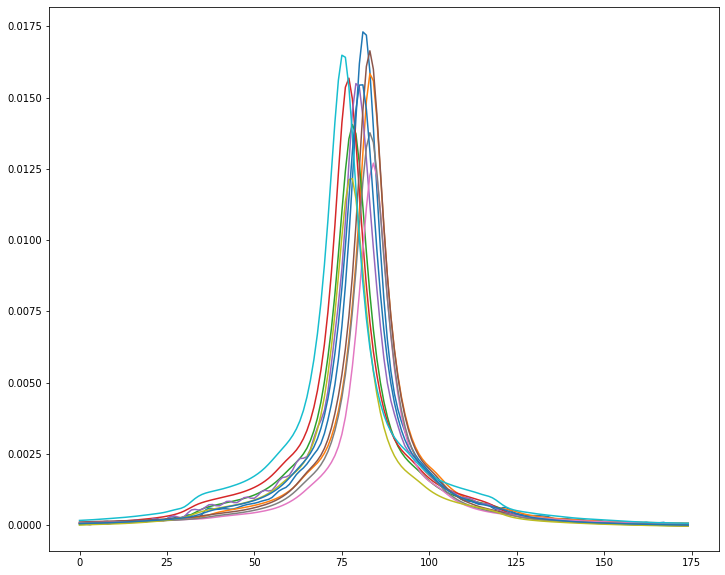

In [73]:
for i in np.arange(11):
    plt.plot(LiverData[i][13350:13525])

## Add TMS signal in different location (random signal essentially)

In [74]:
# Isolate TMS signal from one hepatic spectra
r = random.choice(np.arange(11))

TMS = LiverData[r].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])

## Define interference signal
t = np.zeros(14000)
t[7500:7675] = TMS[13350:13525]

# Add TMS signal to each experimental lipid mixture
test_t = test.copy()
for i in np.arange(11):
    test_t[i] = test_t[i]+ t

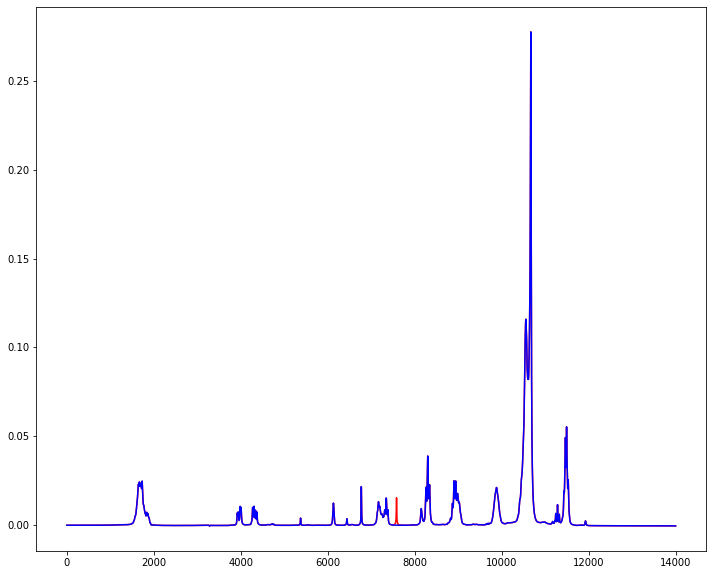

In [75]:
## Check if signal has been deleted

plt.plot(test_t[0],color='r')
plt.plot(test[0],color='b')

In [76]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_test_t = model.predict(test_t)

1/1 [==============================] - 0s 16ms/step


In [77]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_test_t[0][i])

Tg 0.29008937 0.29162928
TC 0.075091384 0.069166504
TPL 0.06314144 0.05069319
TFA 0.27855095 0.27777103
PUFA 0.3063949 0.31467414
MUFA 0.13044372 0.12505506
SFA 0.24841578 0.2469757
Om3 0.29294688 0.2968526
Om6 0.2707912 0.27848637
Om9 0.1312949 0.12615058
LA 0.27117905 0.27821928
DHA 0.44461402 0.44045284
PC -0.024152543 -0.026855487
PE 0.1165238 0.10185805
FC 0.0580369 0.041866295
EC 0.077292725 0.08165889
LPC 0.31351513 0.3225149
SM 0.0031523216 -0.033361617


In [78]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_test_t[1][i])

Tg 0.231168 0.23270786
TC 0.12937911 0.12345424
TPL 0.12726581 0.114817545
TFA 0.2429012 0.24212119
PUFA 0.26260847 0.27088758
MUFA 0.113261774 0.1078731
SFA 0.22154997 0.22010997
Om3 0.2799839 0.28388968
Om6 0.22333612 0.23103131
Om9 0.11370123 0.10855689
LA 0.21973889 0.22677907
DHA 0.35486925 0.3507082
PC 0.07164297 0.068940006
PE 0.1960587 0.18139301
FC 0.11281941 0.09664888
EC 0.119126886 0.123493075
LPC 0.053940337 0.062939994
SM -0.009885758 -0.046399724


In [79]:
# Isolate TMS signal from one hepatic spectra to a second location in the test spectra
TMS = LiverData[1].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])

## Define interference signal
t2 = np.zeros(14000)
t2[2200:2375] = TMS[13350:13525]

# Add TMS signal to each experimental lipid mixture
test_t2 = test.copy()
for i in np.arange(11):
    test_t2[i] = test_t2[i]+ t2

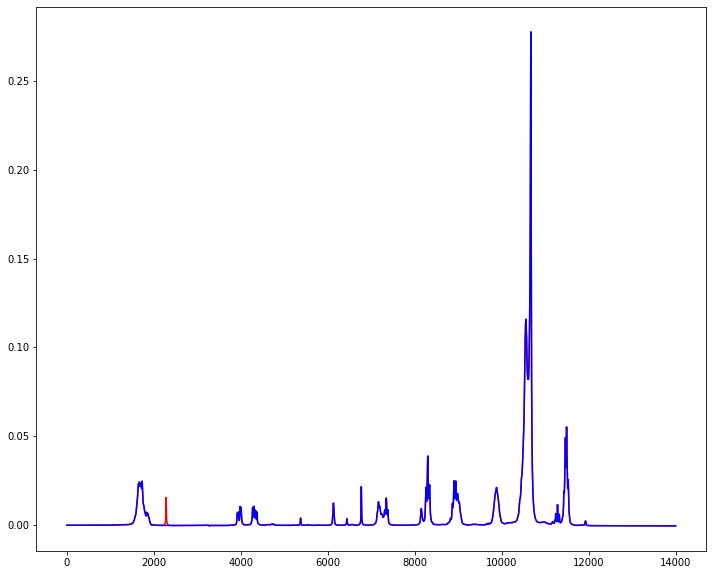

In [80]:
## Check if signal has been added

plt.plot(test_t2[0],color='r')
plt.plot(test[0],color='b')

In [81]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_test_t2 = model.predict(test_t2)

1/1 [==============================] - 0s 16ms/step


In [82]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_test_t2[0][i])

Tg 0.29008937 0.29145202
TC 0.075091384 0.06553963
TPL 0.06314144 0.047743283
TFA 0.27855095 0.27621892
PUFA 0.3063949 0.304214
MUFA 0.13044372 0.12967321
SFA 0.24841578 0.24775751
Om3 0.29294688 0.28387868
Om6 0.2707912 0.2709613
Om9 0.1312949 0.12958367
LA 0.27117905 0.2702935
DHA 0.44461402 0.44472784
PC -0.024152543 -0.018546043
PE 0.1165238 0.093700014
FC 0.0580369 0.04764816
EC 0.077292725 0.06964751
LPC 0.31351513 0.23199102
SM 0.0031523216 -0.0061956523


In [83]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_test_t2[1][i])

Tg 0.231168 0.23253068
TC 0.12937911 0.119827345
TPL 0.12726581 0.111867644
TFA 0.2429012 0.24056908
PUFA 0.26260847 0.26042756
MUFA 0.113261774 0.11249128
SFA 0.22154997 0.22089179
Om3 0.2799839 0.27091578
Om6 0.22333612 0.22350626
Om9 0.11370123 0.111990005
LA 0.21973889 0.21885335
DHA 0.35486925 0.3549831
PC 0.07164297 0.0772495
PE 0.1960587 0.17323491
FC 0.11281941 0.102430694
EC 0.119126886 0.11148162
LPC 0.053940337 -0.027583858
SM -0.009885758 -0.019233696


In [84]:
# Add all interference signals to each experimental lipid mixture
test_t_All = test.copy()
for i in np.arange(11):
    TMS[13350:13525] = TMS[13350:13525] - (TMS[13350:13525].min() - test[i][:1000].mean())
    MTBE[6355:6385] = MTBE[6355:6385] - (MTBE[6355:6385].min() - test[i][:1000].mean())
    MTBE[10775:10800] = MTBE[10775:10800] - (MTBE[10775:10800].min() - test[i][:1000].mean())
    t[7500:7675] = t[7500:7675] - (t[7500:7675].min() - test[i][:1000].mean())
    t2[2200:2375] = t2[2200:2375] - (t2[2200:2375].min() - test[i][:1000].mean())
    test_t_All[i] = test_t[i]+ t + t2 + TMS + Water + MTBE

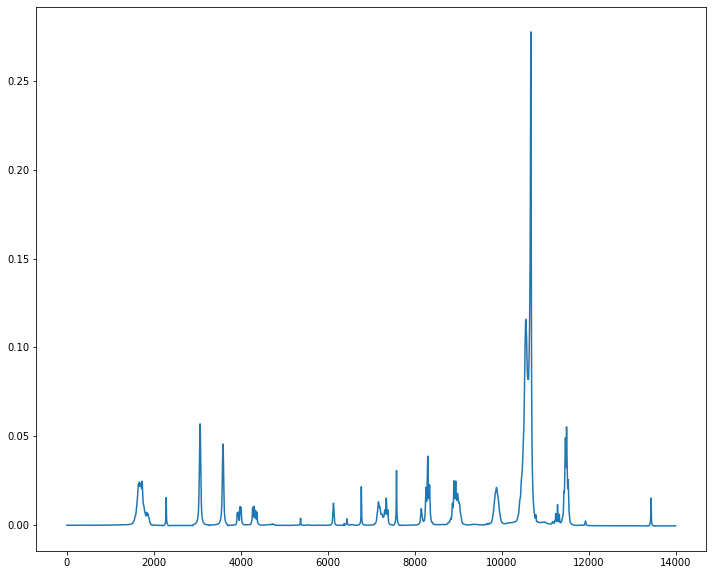

In [85]:
plt.plot(test_t_All[0])

In [86]:
ypred = model.predict((test_t_All))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()

rmse = np.sqrt(((ypred - TestLipProfiles) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))

1/1 [==============================] - 0s 17ms/step
Tg 0.97
TC 2.07
TPL 2.78
TFA 5.58
PUFA 3.02
MUFA 4.39
SFA 4.69
Om3 2.64
Om6 2.79
Om9 6.03
LA 2.42
DHA 0.33
PC 1.71
PE 2.72
FC 2.31
EC 0.53
LPC 1.39
SM 0.58
Overall RMSE:  2.609


In [87]:
ypred = model.predict((test_t_All))


rmse = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))

1/1 [==============================] - 0s 16ms/step
Tg 0.01
TC 0.11
TPL 0.14
TFA 0.02
PUFA 0.03
MUFA 0.04
SFA 0.05
Om3 0.11
Om6 0.03
Om9 0.06
LA 0.03
DHA 0.03
PC 0.14
PE 0.34
FC 0.24
EC 0.04
LPC 0.68
SM 0.21
Overall RMSE:  0.129


## Perform and plot linear regression for both MLP and CRAFT quantification of lipids

In [88]:
##
os.chdir("/home/htjhnson/Downloads/DL_NMR")
TestLipProfiles2 = pd.read_excel('DL_LipMix_LipidProfiles.xlsx', index_col=0)
TestLipProfiles3 = pd.read_excel('DL_LipMix_LipidProfiles_More.xlsx', index_col=0)
TestLipProfiles2_CRAFT = pd.read_excel('DL_LipMix_LipidProfiles_ByCRAFT.xlsx', index_col=0)
TestLipProfiles2_deconv = pd.read_excel('DL_LipMix_LipidProfiles_ByDeconv.xlsx', index_col=0)



#
TestLipProfiles2 = np.array(TestLipProfiles2)
TestLipProfiles3 = np.array(TestLipProfiles3)
TestLipProfiles2_CRAFT = np.array(TestLipProfiles2_CRAFT)
TestLipProfiles2_deconv = np.array(TestLipProfiles2_deconv)
#

LipListn = ['Tg','TC','TPL','TFA','PUFA','MUFA','SFA','Om3','Om6','Om9','LA','DHA','PC','PE','FC','EC']
LipListCRAFT2 = ['Tg','TC','TFA','PUFA','MUFA','SFA','Om3','LA','DHA','PC','PE']
#LipList5 = ['Tg','TC','TPL','TFA','PUFA','MUFA','SFA','Om3','Om6','Om9','LA','DHA','PC','PE','FC','EC','LPC',"SM"]


#############################
Methods = []
for i in np.arange(11*16):
    Methods.append('MLP')
    
for i in np.arange(11*11):
    Methods.append('CRAFT')
    
for i in np.arange(11*16):
    Methods.append('Weight')
    
    

###########################
LipGroups = []
for i in np.arange(1):
    for ii in np.arange(11):
        for iii in np.arange(16):
            LipGroups.append(LipList5[iii])
            
for i in np.arange(1):
    for ii in np.arange(11):
        for iii in np.arange(11):
            LipGroups.append(LipListCRAFT2[iii])
            
for i in np.arange(1):
    for ii in np.arange(11):
        for iii in np.arange(16):
            LipGroups.append(LipList5[iii])
              


In [89]:
#ypred3 = model.predict(np.squeeze(test_sc))
ypred3 = model.predict(test)

for i in np.arange(18):
    ypred3[:,i]  = ypred3[:,i]*conc[:,i].max()

ypred4 = []
for i in np.arange(1):
    count = -1
    for ii in np.arange(11):
        count += 1
        c2 = -1
        for iii in np.arange(16):
            c2 += 1
            ypred4.append(ypred3[count][c2])
            
            
TestLipProfiles4 = TestLipProfiles3.copy()
TestLipProfiles4 = np.delete(TestLipProfiles4,7,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,7,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,7,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,7,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,17,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,16,1)


TestLipProfiles3_CRAFT = TestLipProfiles2_CRAFT.copy()
TestLipProfiles3_CRAFT = np.delete(TestLipProfiles3_CRAFT,2,axis=1)
TestLipProfiles3_CRAFT = np.delete(TestLipProfiles3_CRAFT,7,axis=1)
TestLipProfiles3_CRAFT = np.delete(TestLipProfiles3_CRAFT,7,axis=1)

for i in np.arange(1):
    for ii in np.arange(11):
        for iii in np.arange(11):
            count += 1
            ypred4.append(TestLipProfiles3_CRAFT[ii][iii])

LipidProfiles = []
for i in np.arange(1):
    count = -1
    for ii in np.arange(11):
        count += 1
        c2 = -1
        for iii in np.arange(16):
            c2 += 1
            ypred4.append(TestLipProfiles4[count][c2])
    

1/1 [==============================] - 0s 17ms/step


In [90]:
data = {"Method": Methods,
        'Lipid': LipGroups,
        'Concentration': ypred4}

MLPandCRAFT = pd.DataFrame(data)

In [91]:
os.chdir("/home/htjhnson/Downloads")
from sklearn.linear_model import LinearRegression
from scipy import stats

In [92]:
for i in np.arange(16):
    y = np.array(list(ypred3.T[i]))
    x = np.array(list(np.array(TestLipProfiles4).T[i])).reshape((-1,1))
    model = LinearRegression()
    model.fit(x,y)
    #p = model.p(x,y)
    r_sq = model.score(x,y)
    lm = LinearRegression()
    lm.fit(x,y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(x)
    new_X = np.append(np.ones((len(x),1)), x, axis=1)
    M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
    v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
    s_b = np.sqrt(v_b)
    t_b = params/ s_b
    p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
    p_val = np.round(p_val,3)
    p_val
    print(LipList5[i])
    print(f"coefficient of determination: {r_sq.round(3)}")
    print(f"slope: {model.coef_.round(3)}")
    print(p_val[1])

Tg
coefficient of determination: 0.997
slope: [1.016]
0.0
TC
coefficient of determination: 0.998
slope: [1.002]
0.0
TPL
coefficient of determination: 0.996
slope: [1.039]
0.0
TFA
coefficient of determination: 0.997
slope: [1.045]
0.0
PUFA
coefficient of determination: 0.998
slope: [1.023]
0.0
MUFA
coefficient of determination: 0.995
slope: [1.023]
0.0
SFA
coefficient of determination: 0.997
slope: [1.091]
0.0
Om3
coefficient of determination: 0.994
slope: [1.103]
0.0
Om6
coefficient of determination: 0.997
slope: [1.023]
0.0
Om9
coefficient of determination: 0.995
slope: [1.015]
0.0
LA
coefficient of determination: 0.995
slope: [1.021]
0.0
DHA
coefficient of determination: 0.988
slope: [1.068]
0.0
PC
coefficient of determination: 0.871
slope: [1.097]
0.0
PE
coefficient of determination: 0.783
slope: [0.698]
0.0
FC
coefficient of determination: 0.974
slope: [0.998]
0.0
EC
coefficient of determination: 0.927
slope: [0.977]
0.0


In [93]:
plt.rcParams.update({'font.size': 20})

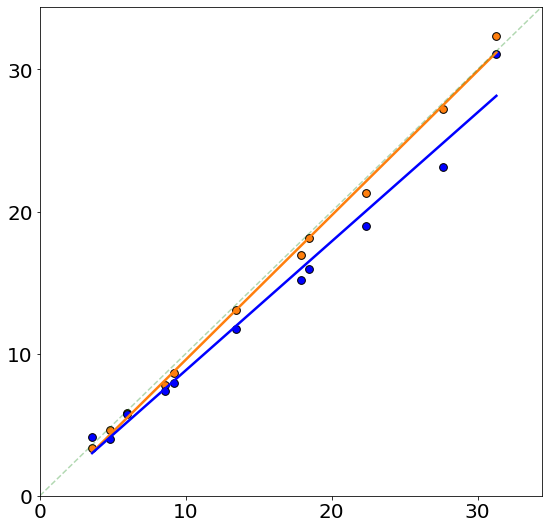

In [94]:
Tg = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'Tg']
TgC = Tg.loc[Tg['Method'] == 'CRAFT']
TgM = Tg.loc[Tg['Method'] == 'MLP']
TgW = Tg.loc[Tg['Method'] == 'Weight']

TgWeight = list(TgW["Concentration"])
TgCRAFT = list(TgC["Concentration"])
TgMLP = list(TgM["Concentration"])



# 
x = TgWeight
y = TgMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = TgCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5)


xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
plt.savefig('Tg.png')

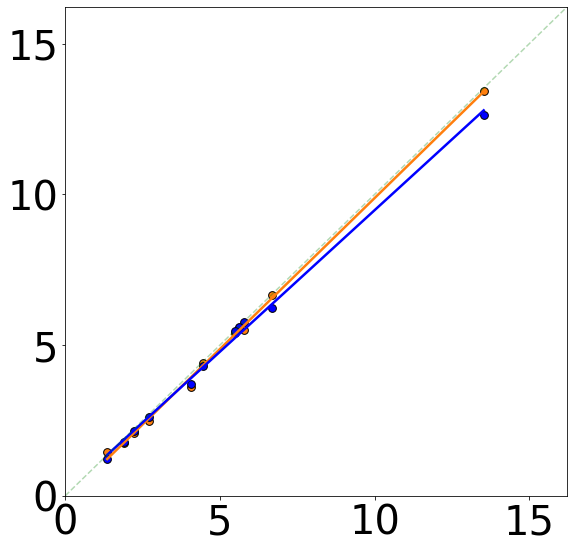

In [95]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'TC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.2)
ax.set_ylim(ymin=0, ymax=max(x)*1.2)

plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 

plt.savefig('TC.png')

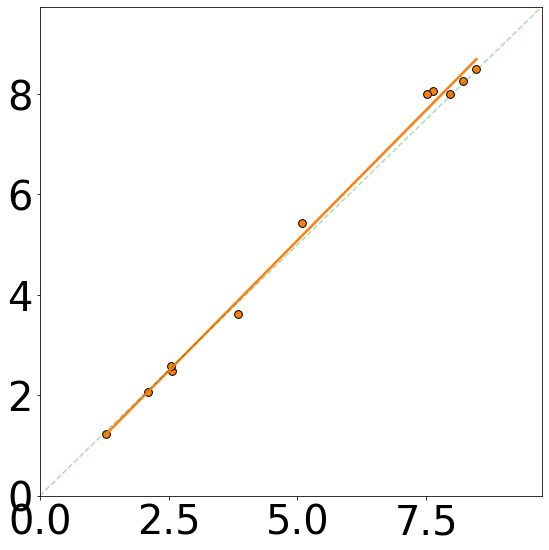

In [96]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'TPL']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])




# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')

ax.set_xlim(xmin=0, xmax=max(x)*1.15)
ax.set_ylim(ymin=0, ymax=max(x)*1.15)


plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
plt.savefig('TPL.png')

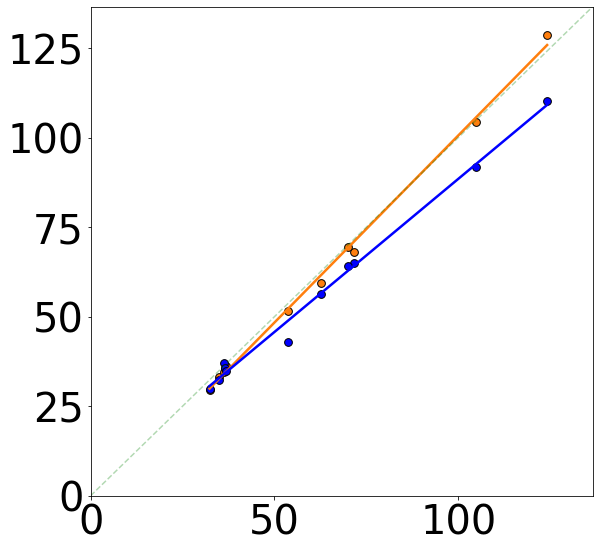

In [97]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'TFA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('TFA.png')

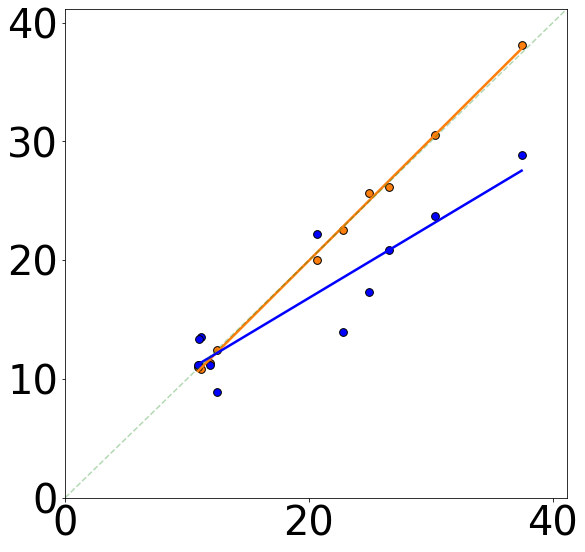

In [98]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'PUFA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])




# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('PUFA.png')

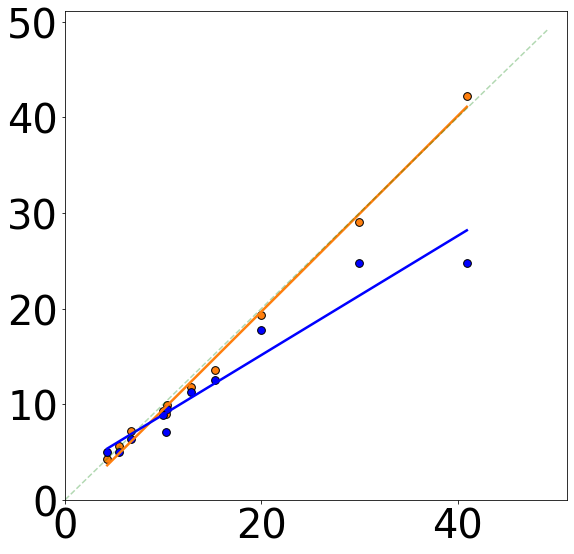

In [99]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'MUFA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])




# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.25)
ax.set_ylim(ymin=0, ymax=max(x)*1.25)

plt.savefig('MUFA.png')

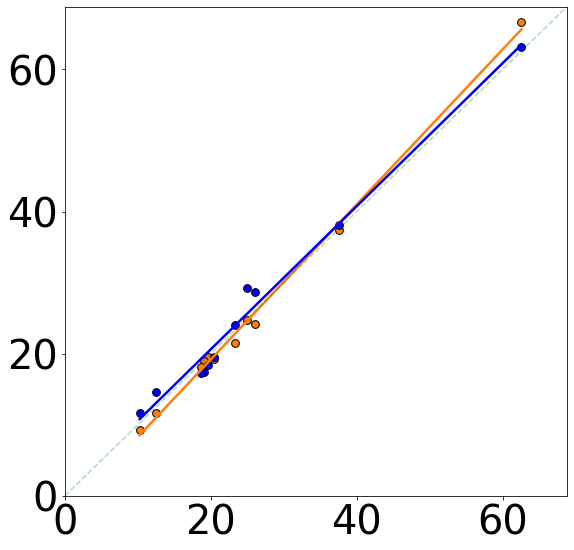

In [100]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'SFA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('SFA.png')

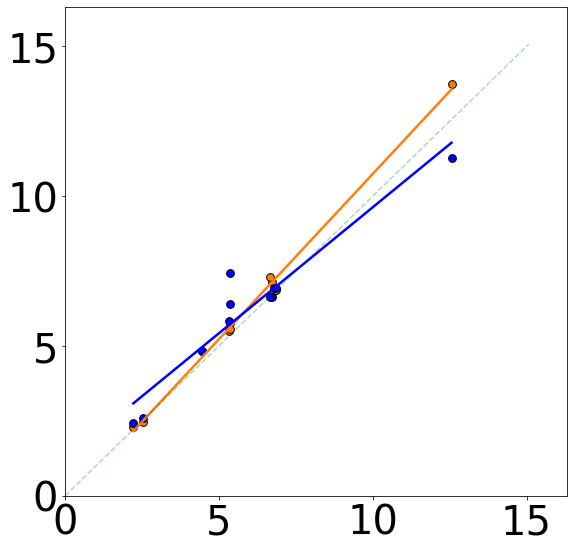

In [101]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'Om3']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.3)
ax.set_ylim(ymin=0, ymax=max(x)*1.3)

plt.savefig('Om3.png')

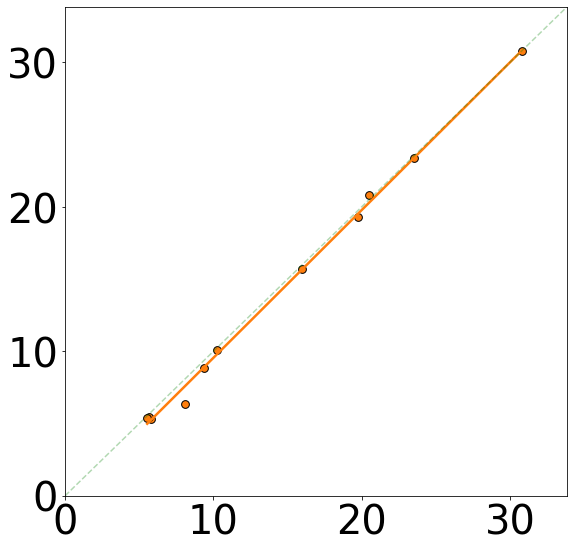

In [102]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'Om6']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('Om6.png')

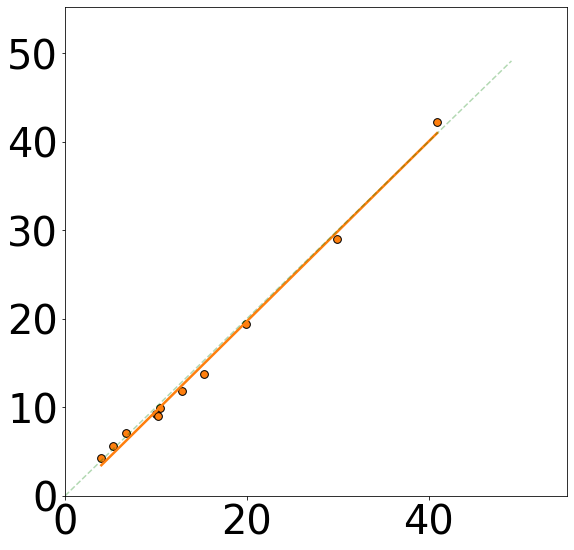

In [103]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'Om9']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.35)
ax.set_ylim(ymin=0, ymax=max(x)*1.35)

plt.savefig('Om9.png')

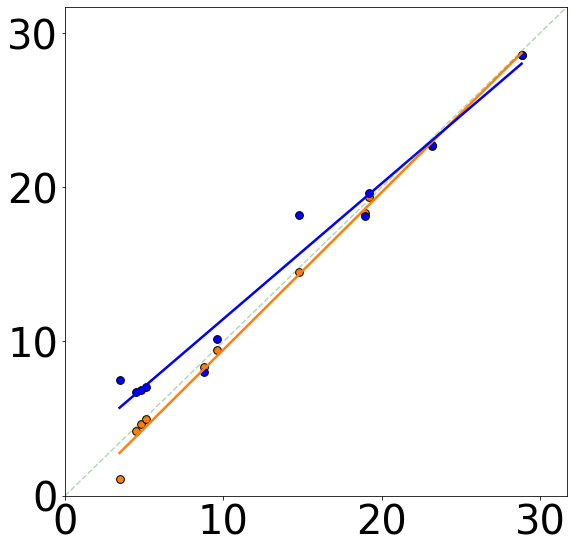

In [104]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'LA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('LA.png')

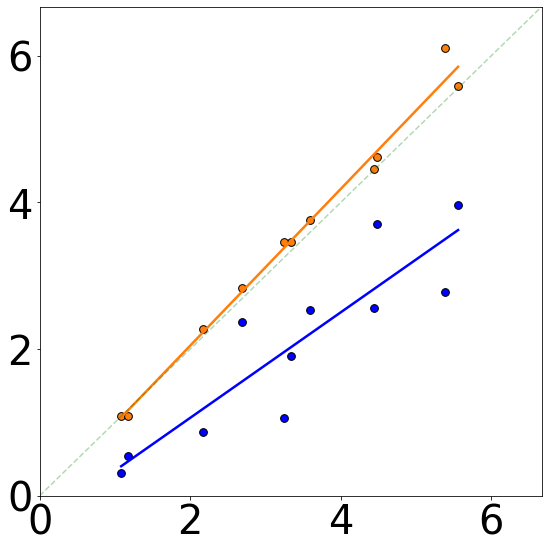

In [105]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'DHA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.2)
ax.set_ylim(ymin=0, ymax=max(x)*1.2)

plt.savefig('DHA.png')

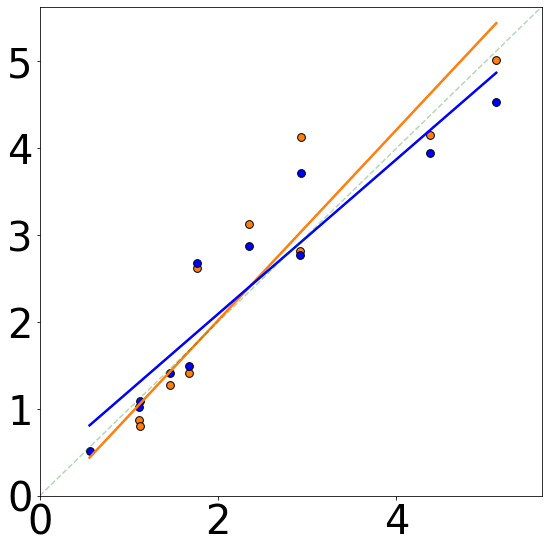

In [106]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'PC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('PC.png')

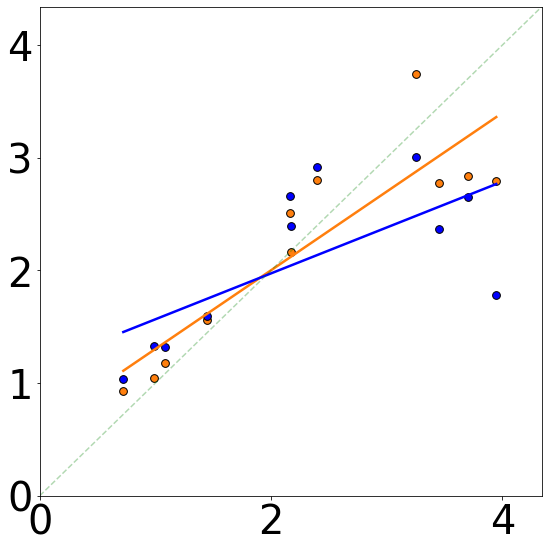

In [107]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'PE']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('PE.png')

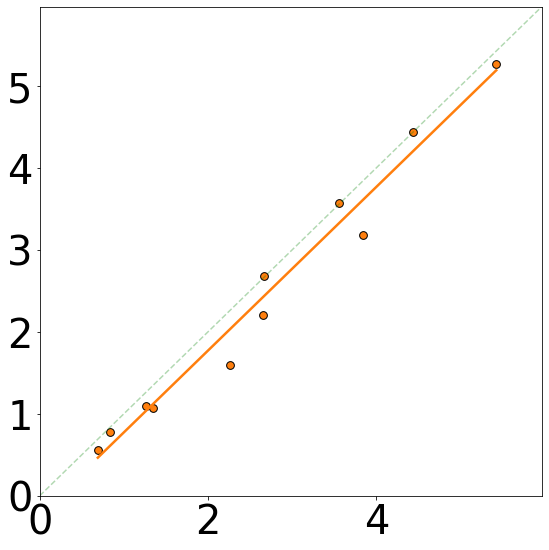

In [108]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'FC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('FC.png')

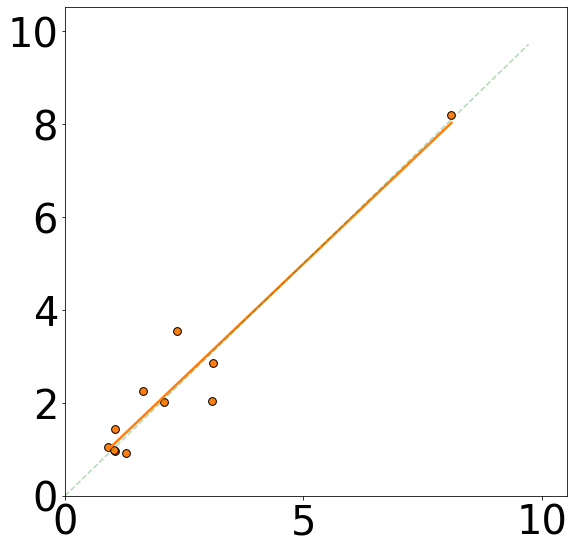

In [109]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'EC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.3)
ax.set_ylim(ymin=0, ymax=max(x)*1.3)

plt.savefig('EC.png')

In [110]:
os.chdir("/home/htjhnson/Downloads/DL_NMR")

ypred_n = ypred3[8:,-2:]

TestLipProfilesn = pd.read_excel('DL_LipMix_LipidProfiles_SMandLPC.xlsx', index_col=0)
TestLipProfilesn_CRAFT = pd.read_excel('DL_LipMix_LipidProfiles_ByCRAFT_SMandLPC.xlsx', index_col=0)


TestLipProfiles6 = []
for i in np.arange(2):
    count = -1
    for ii in np.arange(3):
        count += 1
        c2 = -1
        for iii in np.arange(2):
            c2 += 1
            TestLipProfiles6.append(np.array(TestLipProfilesn)[count][c2])

################################
Conc = []

for i in np.arange(1):
    count = -1
    for ii in np.arange(3):
        count += 1
        for iii in np.arange(2):
            Conc.append(ypred_n[count][iii])
            
for i in np.arange(1):
    count = -1
    for ii in np.arange(3):
        count += 1
        for iii in np.arange(2):
            Conc.append(np.array(TestLipProfilesn_CRAFT)[count][iii])
            
for i in np.arange(1):
    for ii in np.arange(3):
        for iii in np.arange(2):
            Conc.append(np.array(TestLipProfilesn)[ii][iii])

#LipGroupsn = []
LipListn = ['LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM"] 
#for i in np.arange(1):
#    for ii in np.arange(3):
#        for iii in np.arange(2):
#            count += 1
#            LipGroupsn.append(LipListn[iii])
            
            
Methodsn = ["MLP","MLP","MLP","MLP","MLP","MLP","CRAFT","CRAFT","CRAFT","CRAFT","CRAFT","CRAFT","Weight","Weight","Weight","Weight","Weight","Weight"]
            
data = {"Method": Methodsn,
        'Lipid': LipListn,
        'Concentration': Conc}
MLPandCRAFTn = pd.DataFrame(data)

In [111]:
for i in np.arange(2):
    y = np.array(list(ypred_n.T[i]))
    x = np.array(list(np.array(TestLipProfilesn).T[i])).reshape((-1,1))
    model = LinearRegression()
    model.fit(x,y)
    #p = model.p(x,y)
    r_sq = model.score(x,y)
    lm = LinearRegression()
    lm.fit(x,y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(x)
    new_X = np.append(np.ones((len(x),1)), x, axis=1)
    M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
    v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
    s_b = np.sqrt(v_b)
    t_b = params/ s_b
    p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
    p_val = np.round(p_val,3)
    p_val
    print(LipListn[i])
    print(f"coefficient of determination: {r_sq.round(3)}")
    print(f"slope: {model.coef_.round(3)}")
    print(p_val[1])

LPC
coefficient of determination: 0.964
slope: [0.793]
0.122
SM
coefficient of determination: 0.998
slope: [1.139]
0.031


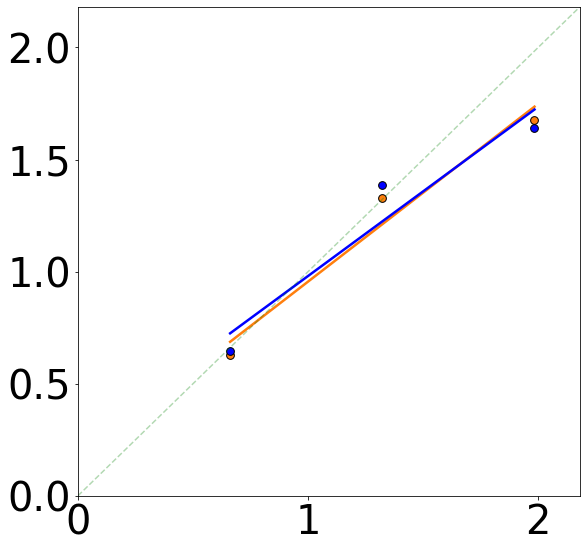

In [112]:
Lipid = MLPandCRAFTn.loc[MLPandCRAFTn['Lipid'] == 'LPC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=3)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=3)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('LPC.png')

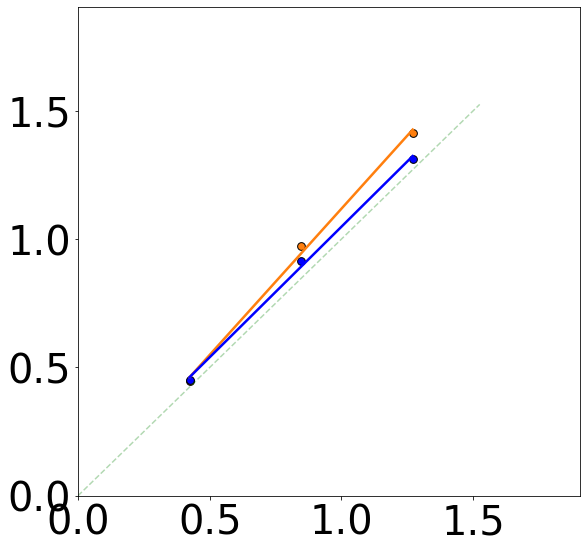

In [113]:
Lipid = MLPandCRAFTn.loc[MLPandCRAFTn['Lipid'] == 'SM']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=2.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=2.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.5)
ax.set_ylim(ymin=0, ymax=max(x)*1.5)

plt.savefig('SM.png')

In [58]:
## Test how low concentration can go before Tg is over 5% inaccurate?

In [52]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')

## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data5 = data5 - data1
data9 = data9 - data1
data11 = data11 - data1
data13 = data13 - data1
data15 = data15 - data1
data18 = data18 - data1
data20 = data20 - data1
data24 = data24 - data1
data27 = data27 - data1
data28 = data28 - data1
data30 = data30 - data1
data33 = data33 - data1
data35 = data35 - data1


## Scale one of each lipid reference standard to 10 mM of a total lipid group concentration (i.e. 10mM Tg, TC, TPL, or TFA)
data1 = data1
n = 0.445
# Trlinolein
data2 = data2*0.372446*n
# DipalmitoylPE
data5 = data5*0.506418*0.5
# TriDHA
data9 = data9*0.792461*n
# DipalmitoylPC
data11 = data11*0.642029*0.5
# EPAm
data13 = data13*0.732107*0.5
# Sphingomyelin
data15 = data15*0.88941*0.5
# Triolein
data18 = data18*0.458689*n
# LPC
data20 = data20*6.52145*0.5
# Tripalmitin
data24 = data24*0.580395*n
# CholArachindonate
data27 = data27*1.58731*0.5
# DimyristoylPE
data28 = data28*0.785295*0.5
# CholLinoleate
data30 = data30*1.024463*0.5
# Cholesterol
data33 = data33*1.005112*0.5
# DioleoylPC
data35 = data35*0.700671*0.5
# Palmitic Acid
data37 = data37*1.01731*0.5

# Trlinolein
datap2 = dataprof2*0.372446*n
# DipalmitoylPE
datap5 = dataprof5*0.506418*0.5
# TriDHA
datap9 = dataprof9*0.792461*n
# DipalmitoylPC
datap11 = dataprof11*0.642029*0.5
# EPAm
datap13 = dataprof13*0.732107*0.5
# Sphingomyelin
datap15 = dataprof15*0.88941*0.5
# Triolein
datap18 = dataprof18*0.458689*n
# LPC
datap20 = dataprof20*6.52145*0.5
# Tripalmitin
datap24 = dataprof24*0.580395*n
# CholArachindonate
datap27 = dataprof27*1.58731*0.5
# DimyristoylPE
datap28 = dataprof28*0.785295*0.5
# CholLinoleate
datap30 = dataprof30*1.024463*0.5
# Cholesterol
datap33 = dataprof33*1.005112*0.5
# DioleoylPC
datap35 = dataprof35*0.700671*0.5
# Palmitic Acid
datap37 = dataprof37*1.01731*0.5


TestSpec = (data2+data5+data9+data11+data13+data15+data18+data20+data24+data27+data28+data30+data33+data35+data37+data1)


_dic1,TestSpec = ng.process.pipe_proc.em(dic1,TestSpec,lb=0)
_dic1,TestSpec = ng.process.pipe_proc.ft(_dic1,TestSpec)

##
TestSpec = TestSpec[14000:28000]/OvMax
profile = (datap2+datap5+datap9+datap11+datap13+datap15+datap18+datap20+datap24+datap27+datap28+datap30+datap33+datap35+datap37)
TestSpec = np.reshape(TestSpec,[1,14000])
TestSpec = np.array(TestSpec)

## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)





## Test model and print percent error
ypred = model.predict((TestSpec))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
rmse = np.sqrt(((ypred - profile) ** 2).mean(axis=0))
rmse_all = []

i = 0
print(ypred[0][i])
print(profile[i])
print(LipList5[i],rmse[i].round(2)/profile[i]*100)
rmse_all.append(rmse[i])

1/1 [==============================] - 0s 137ms/step
6.236878
5.933334087714447
Tg 5.056179132423701


In [66]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')

## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data5 = data5 - data1
data9 = data9 - data1
data11 = data11 - data1
data13 = data13 - data1
data15 = data15 - data1
data18 = data18 - data1
data20 = data20 - data1
data24 = data24 - data1
data27 = data27 - data1
data28 = data28 - data1
data30 = data30 - data1
data33 = data33 - data1
data35 = data35 - data1


## Scale one of each lipid reference standard to 10 mM of a total lipid group concentration (i.e. 10mM Tg, TC, TPL, or TFA)
data1 = data1
n = 1000
# Trlinolein
data2 = data2*0.372446*n
# DipalmitoylPE
data5 = data5*0.506418*0.5
# TriDHA
data9 = data9*0.792461*n
# DipalmitoylPC
data11 = data11*0.642029*0.5
# EPAm
data13 = data13*0.732107*0.5
# Sphingomyelin
data15 = data15*0.88941*0.5
# Triolein
data18 = data18*0.458689*n
# LPC
data20 = data20*6.52145*0.5
# Tripalmitin
data24 = data24*0.580395*n
# CholArachindonate
data27 = data27*1.58731*0.5
# DimyristoylPE
data28 = data28*0.785295*0.5
# CholLinoleate
data30 = data30*1.024463*0.5
# Cholesterol
data33 = data33*1.005112*0.5
# DioleoylPC
data35 = data35*0.700671*0.5
# Palmitic Acid
data37 = data37*1.01731*0.5

# Trlinolein
datap2 = dataprof2*0.372446*n
# DipalmitoylPE
datap5 = dataprof5*0.506418*0.5
# TriDHA
datap9 = dataprof9*0.792461*n
# DipalmitoylPC
datap11 = dataprof11*0.642029*0.5
# EPAm
datap13 = dataprof13*0.732107*0.5
# Sphingomyelin
datap15 = dataprof15*0.88941*0.5
# Triolein
datap18 = dataprof18*0.458689*n
# LPC
datap20 = dataprof20*6.52145*0.5
# Tripalmitin
datap24 = dataprof24*0.580395*n
# CholArachindonate
datap27 = dataprof27*1.58731*0.5
# DimyristoylPE
datap28 = dataprof28*0.785295*0.5
# CholLinoleate
datap30 = dataprof30*1.024463*0.5
# Cholesterol
datap33 = dataprof33*1.005112*0.5
# DioleoylPC
datap35 = dataprof35*0.700671*0.5
# Palmitic Acid
datap37 = dataprof37*1.01731*0.5


TestSpec = (data2+data5+data9+data11+data13+data15+data18+data20+data24+data27+data28+data30+data33+data35+data37+data1)


_dic1,TestSpec = ng.process.pipe_proc.em(dic1,TestSpec,lb=0)
_dic1,TestSpec = ng.process.pipe_proc.ft(_dic1,TestSpec)

##
TestSpec = TestSpec[14000:28000]/OvMax
profile = (datap2+datap5+datap9+datap11+datap13+datap15+datap18+datap20+datap24+datap27+datap28+datap30+datap33+datap35+datap37)
TestSpec = np.reshape(TestSpec,[1,14000])
TestSpec = np.array(TestSpec)

## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)





## Test model and print percent error
ypred = model.predict((TestSpec))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
rmse = np.sqrt(((ypred - profile) ** 2).mean(axis=0))
rmse_all = []

i = 0
print(ypred[0][i])
print(profile[i])
print(LipList5[i],rmse[i].round(2)/profile[i]*100)
rmse_all.append(rmse[i])

1/1 [==============================] - 0s 139ms/step
12820.622
13333.33502857179
Tg 3.845324511094351


In [ ]:
## Below is an LoD for Tg again, this time with 10 mM of total Tg, TFA, TC, or TPL (essentially, higher concentrations overall). Did not include

In [79]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')

## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data5 = data5 - data1
data9 = data9 - data1
data11 = data11 - data1
data13 = data13 - data1
data15 = data15 - data1
data18 = data18 - data1
data20 = data20 - data1
data24 = data24 - data1
data27 = data27 - data1
data28 = data28 - data1
data30 = data30 - data1
data33 = data33 - data1
data35 = data35 - data1


## Scale one of each lipid reference standard to 10 mM of a total lipid group concentration (i.e. 10mM Tg, TC, TPL, or TFA)
data1 = data1
n = 0.15
data2 = data2*1.11734*n
data5 = data5*1.01284*0.5
data9 = data9*2.37738*n
data11 = data11*1.28406*0.5
data13 = data13*0.73211*0.5
data15 = data15*1.77882*0.5
data18 = data18*1.37607*n
data20 = data20*6.52145*0.5
data24 = data24*1.74118*n
data27 = data27*1.58731*0.5
data28 = data28*1.57059*0.5
data30 = data30*1.02446*0.5
data33 = data33*1.00511*0.5
data35 = data35*1.40134*0.5
data37 = data37*1.01731*0.5

datap2 = dataprof2*1.11734*n
datap5 = dataprof5*1.01284*0.5
datap9 = dataprof9*2.37738*n
datap11 = dataprof11*1.28406*0.5
datap13 = dataprof13*0.73211*0.5
datap15 = dataprof15*1.77882*0.5
datap18 = dataprof18*1.37607*n
datap20 = dataprof20*6.52145*0.5
datap24 = dataprof24*1.74118*n
datap27 = dataprof27*1.58731*0.5
datap28 = dataprof28*1.57059*0.5
datap30 = dataprof30*1.02446*0.5
datap33 = dataprof33*1.00511*0.5
datap35 = dataprof35*1.40134*0.5
datap37 = dataprof37*1.01731*0.5


TestSpec = (data2+data5+data9+data11+data13+data15+data18+data20+data24+data27+data28+data30+data33+data35+data37+data1)


_dic1,TestSpec = ng.process.pipe_proc.em(dic1,TestSpec,lb=0)
_dic1,TestSpec = ng.process.pipe_proc.ft(_dic1,TestSpec)

##
TestSpec = TestSpec[14000:28000]/OvMax
profile = (datap2+datap5+datap9+datap11+datap13+datap15+datap18+datap20+datap24+datap27+datap28+datap30+datap33+datap35+datap37)
TestSpec = np.reshape(TestSpec,[1,14000])
TestSpec = np.array(TestSpec)

## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)





## Test model and print percent error
ypred = model.predict((TestSpec))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()

rmse = np.sqrt(((ypred - profile) ** 2).mean(axis=0))
rmse_all = []

i = 0
print(ypred[0][i])
print(profile[i])
print(LipList5[i],rmse[i].round(2)/profile[i]*100)
rmse_all.append(rmse[i])

1/1 [==============================] - 0s 117ms/step
6.3004336
6.0000005177480835
Tg 4.9999995685433


In [ ]:
# Now test LoD for TC

In [69]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')
dic37,data37 = ng.pipe.read('DL_LipMix2_PalmiticAcid_10_new_PROTON-2-3.fid')


## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data5 = data5 - data1
data9 = data9 - data1
data11 = data11 - data1
data13 = data13 - data1
data15 = data15 - data1
data18 = data18 - data1
data20 = data20 - data1
data24 = data24 - data1
data27 = data27 - data1
data28 = data28 - data1
data30 = data30 - data1
data33 = data33 - data1
data35 = data35 - data1
data37 = data37 - data1


## Scale one of each lipid reference standard to 10 mM of a total lipid group concentration (i.e. 10mM Tg, TC, TPL, or TFA)
data1 = data1
n = 0.085
# Trlinolein
data2 = data2*0.372446*0.5
# DipalmitoylPE
data5 = data5*0.506418*0.5
# TriDHA
data9 = data9*0.792461*0.5
# DipalmitoylPC
data11 = data11*0.642029*0.5
# EPAm
data13 = data13*0.732107*0.5
# Sphingomyelin
data15 = data15*0.88941*0.5
# Triolein
data18 = data18*0.458689*0.5
# LPC
data20 = data20*6.52145*0.5
# Tripalmitin
data24 = data24*0.580395*0.5
# CholArachindonate
data27 = data27*1.58731*n
# DimyristoylPE
data28 = data28*0.785295*0.5
# CholLinoleate
data30 = data30*1.024463*n
# Cholesterol
data33 = data33*1.005112*n
# DioleoylPC
data35 = data35*0.700671*0.5
# Palmitic Acid
data37 = data37*1.01731*0.5



datap2 = dataprof2*0.372446*0.5
datap5 = dataprof5*0.506418*0.5
datap9 = dataprof9*0.792461*0.5
datap11 = dataprof11*0.642029*0.5
datap13 = dataprof13*0.732107*0.5
datap15 = dataprof15*0.88941*0.5
datap18 = dataprof18*0.458689*0.5
datap20 = dataprof20*6.52145*0.5
datap24 = dataprof24*0.580395*0.5
datap27 = dataprof27*1.58731*n
datap28 = dataprof28*0.785295*0.5
datap30 = dataprof30*1.024463*n
datap33 = dataprof33*1.005112*n
datap35 = dataprof35*0.700671*0.5
datap37 = dataprof37*1.01731*0.5


TestSpec = (data2+data5+data9+data11+data13+data15+data18+data20+data24+data27+data28+data30+data33+data35+data37+data1)


_dic1,TestSpec = ng.process.pipe_proc.em(dic1,TestSpec,lb=0)
_dic1,TestSpec = ng.process.pipe_proc.ft(_dic1,TestSpec)

##
TestSpec = TestSpec[14000:28000]/OvMax
profile = (datap2+datap5+datap9+datap11+datap13+datap15+datap18+datap20+datap24+datap27+datap28+datap30+datap33+datap35+datap37)
TestSpec = np.reshape(TestSpec,[1,14000])
TestSpec = np.array(TestSpec)

## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)





## Test model and print percent error
ypred = model.predict((TestSpec))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    
rmse = np.sqrt(((ypred - profile) ** 2).mean(axis=0))
rmse_all = []

i = 1
print(ypred[0][i])
print(profile[i])
print(LipList5[i],rmse[i].round(2)/profile[i]*100)
rmse_all.append(rmse[i])

1/1 [==============================] - 0s 163ms/step
2.6757574
2.549998371217982
TC 5.098042471999962


## The below code is for testing RMSE metric when independently adding only noise, linebroadening, base shift, and peak shifts.

In [19]:
## First make 5000 un-modified spectra


spec0 = []
conc0 = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 5000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+1000010)
    linebroad = random.choice([0])
    max_shift = 0

    #next three trilin.
    random.seed(i+100010)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    _data2 = ng.process.proc_base.cs(_data2,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+101)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+110)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+101010)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    _data3 = ng.process.proc_base.cs(_data3,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+321)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+10101020)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    _data4 = ng.process.proc_base.cs(_data4,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+141)
    x4_int2 = 0
    random.seed(i+551)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    #Next 4 dipalmPE
    random.seed(i+15003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    _data5 = ng.process.proc_base.cs(_data5,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+16)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+237)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+170084)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    _data6 = ng.process.proc_base.cs(_data6,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+487)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+191)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+120025)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    _data7 = ng.process.proc_base.cs(_data7,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1031)
    x7_int2 = 0
    random.seed(i+11122)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+100615)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    _data8 = ng.process.proc_base.cs(_data8,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1825)
    x8_int2 = 0
    random.seed(i+413)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+10207)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    _data9 = ng.process.proc_base.cs(_data9,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+141)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+1554)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+10048)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    _data10 = ng.process.proc_base.cs(_data10,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+916)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+179)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+100999)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    _data11 = ng.process.proc_base.cs(_data11,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1082)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+109)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010000)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    _data12 = ng.process.proc_base.cs(_data12,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+20000)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21000)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011000)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    _data13 = ng.process.proc_base.cs(_data13,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+22000)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+2315)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1011512)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    _data14 = ng.process.proc_base.cs(_data14,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+24000)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25000)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013000)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    _data15 = ng.process.proc_base.cs(_data15,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+26000)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27000)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014000)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    _data16 = ng.process.proc_base.cs(_data16,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+28000)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29000)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015000)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    _data17 = ng.process.proc_base.cs(_data17,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+30000)
    x17_int2 = 0
    random.seed(i+31000)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016000)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    _data18 = ng.process.proc_base.cs(_data18,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+32000)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33000)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017000)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    _data19 = ng.process.proc_base.cs(_data19,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+34000)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35000)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018000)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    _data20 = ng.process.proc_base.cs(_data20,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+36000)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37000)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019000)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    _data21 = ng.process.proc_base.cs(_data21,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+38000)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39000)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020000)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    _data22 = ng.process.proc_base.cs(_data22,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+40000)
    x22_int2 = 0
    random.seed(i+41000)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021000)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    _data23 = ng.process.proc_base.cs(_data23,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+42000)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43000)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022000)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    _data24 = ng.process.proc_base.cs(_data24,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+44000)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45000)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023000)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    _data25 = ng.process.proc_base.cs(_data25,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+46000)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47000)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024000)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    _data26 = ng.process.proc_base.cs(_data26,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+48000)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49000)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025000)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    _data27 = ng.process.proc_base.cs(_data27,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+50000)
    x27_int2 = 0
    random.seed(i+51000)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026000)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    _data28 = ng.process.proc_base.cs(_data28,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+52000)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53000)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027000)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    _data29 = ng.process.proc_base.cs(_data29,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+54000)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55000)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028000)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    _data30 = ng.process.proc_base.cs(_data30,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+56000)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57000)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029000)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    _data31 = ng.process.proc_base.cs(_data31,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+58000)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59000)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030000)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    _data32 = ng.process.proc_base.cs(_data32,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+60000)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61000)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031000)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    _data33 = ng.process.proc_base.cs(_data33,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+62000)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63000)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032000)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    _data34 = ng.process.proc_base.cs(_data34,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+64000)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65000)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033000)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    _data35 = ng.process.proc_base.cs(_data35,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+66000)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67000)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034000)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    _data36 = ng.process.proc_base.cs(_data36,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+68000)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69000)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035000)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    _data37 = ng.process.proc_base.cs(_data37,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+70000)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71000)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


    _dic1,xdata = ng.process.pipe_proc.di(_dic1,xdata)
        
    
    ## Take only important lipid signal region for each spectra
    xdata = xdata[14000:28000]


    spec0.append(xdata)
    conc0.append(ydata)
    
    

# Normalize intensities
spec0 = np.array(spec0)/OvMax



## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc0 = np.array(conc0)
conc0 = np.delete(conc0,7, 1)
conc0 = np.delete(conc0,7, 1)
conc0 = np.delete(conc0,7, 1)
conc0 = np.delete(conc0,7, 1)

In [20]:
## Now vary linebroadening

spec1 = []
conc1 = []
all_linebroad = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 5000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+1000010)
    linebroad = random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8])
    all_linebroad.append(linebroad)
    max_shift = 0

    #next three trilin.
    random.seed(i+100010)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    _data2 = ng.process.proc_base.cs(_data2,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+101)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+110)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+101010)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    _data3 = ng.process.proc_base.cs(_data3,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+321)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+10101020)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    _data4 = ng.process.proc_base.cs(_data4,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+141)
    x4_int2 = 0
    random.seed(i+551)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    #Next 4 dipalmPE
    random.seed(i+15003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    _data5 = ng.process.proc_base.cs(_data5,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+16)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+237)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+170084)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    _data6 = ng.process.proc_base.cs(_data6,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+487)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+191)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+120025)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    _data7 = ng.process.proc_base.cs(_data7,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1031)
    x7_int2 = 0
    random.seed(i+11122)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+100615)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    _data8 = ng.process.proc_base.cs(_data8,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1825)
    x8_int2 = 0
    random.seed(i+413)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+10207)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    _data9 = ng.process.proc_base.cs(_data9,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+141)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+1554)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+10048)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    _data10 = ng.process.proc_base.cs(_data10,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+916)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+179)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+100999)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    _data11 = ng.process.proc_base.cs(_data11,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1082)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+109)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010000)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    _data12 = ng.process.proc_base.cs(_data12,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+20000)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21000)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011000)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    _data13 = ng.process.proc_base.cs(_data13,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+22000)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+2315)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1011512)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    _data14 = ng.process.proc_base.cs(_data14,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+24000)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25000)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013000)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    _data15 = ng.process.proc_base.cs(_data15,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+26000)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27000)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014000)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    _data16 = ng.process.proc_base.cs(_data16,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+28000)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29000)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015000)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    _data17 = ng.process.proc_base.cs(_data17,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+30000)
    x17_int2 = 0
    random.seed(i+31000)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016000)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    _data18 = ng.process.proc_base.cs(_data18,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+32000)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33000)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017000)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    _data19 = ng.process.proc_base.cs(_data19,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+34000)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35000)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018000)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    _data20 = ng.process.proc_base.cs(_data20,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+36000)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37000)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019000)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    _data21 = ng.process.proc_base.cs(_data21,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+38000)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39000)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020000)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    _data22 = ng.process.proc_base.cs(_data22,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+40000)
    x22_int2 = 0
    random.seed(i+41000)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021000)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    _data23 = ng.process.proc_base.cs(_data23,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+42000)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43000)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022000)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    _data24 = ng.process.proc_base.cs(_data24,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+44000)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45000)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023000)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    _data25 = ng.process.proc_base.cs(_data25,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+46000)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47000)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024000)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    _data26 = ng.process.proc_base.cs(_data26,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+48000)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49000)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025000)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    _data27 = ng.process.proc_base.cs(_data27,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+50000)
    x27_int2 = 0
    random.seed(i+51000)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026000)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    _data28 = ng.process.proc_base.cs(_data28,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+52000)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53000)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027000)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    _data29 = ng.process.proc_base.cs(_data29,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+54000)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55000)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028000)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    _data30 = ng.process.proc_base.cs(_data30,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+56000)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57000)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029000)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    _data31 = ng.process.proc_base.cs(_data31,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+58000)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59000)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030000)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    _data32 = ng.process.proc_base.cs(_data32,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+60000)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61000)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031000)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    _data33 = ng.process.proc_base.cs(_data33,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+62000)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63000)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032000)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    _data34 = ng.process.proc_base.cs(_data34,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+64000)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65000)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033000)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    _data35 = ng.process.proc_base.cs(_data35,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+66000)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67000)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034000)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    _data36 = ng.process.proc_base.cs(_data36,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+68000)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69000)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035000)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    _data37 = ng.process.proc_base.cs(_data37,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+70000)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71000)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


    _dic1,xdata = ng.process.pipe_proc.di(_dic1,xdata)
        
    ## Take only important lipid signal region for each spectra
    xdata = xdata[14000:28000]    

    spec1.append(xdata)
    conc1.append(ydata)
    
    

# Normalize intensities
spec1 = np.array(spec1)/OvMax



## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc1 = np.array(conc1)
conc1 = np.delete(conc1,7, 1)
conc1 = np.delete(conc1,7, 1)
conc1 = np.delete(conc1,7, 1)
conc1 = np.delete(conc1,7, 1)

In [21]:
## Now vary noise


spec2 = []
conc2 = []
all_noise = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 5000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+1000010)
    linebroad = 0
    
    max_shift = 0

    #next three trilin.
    random.seed(i+100010)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    _data2 = ng.process.proc_base.cs(_data2,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+101)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+110)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+101010)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    _data3 = ng.process.proc_base.cs(_data3,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+321)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+10101020)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    _data4 = ng.process.proc_base.cs(_data4,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+141)
    x4_int2 = 0
    random.seed(i+551)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    #Next 4 dipalmPE
    random.seed(i+15003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    _data5 = ng.process.proc_base.cs(_data5,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+16)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+237)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+170084)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    _data6 = ng.process.proc_base.cs(_data6,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+487)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+191)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+120025)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    _data7 = ng.process.proc_base.cs(_data7,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1031)
    x7_int2 = 0
    random.seed(i+11122)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+100615)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    _data8 = ng.process.proc_base.cs(_data8,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1825)
    x8_int2 = 0
    random.seed(i+413)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+10207)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    _data9 = ng.process.proc_base.cs(_data9,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+141)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+1554)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+10048)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    _data10 = ng.process.proc_base.cs(_data10,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+916)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+179)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+100999)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    _data11 = ng.process.proc_base.cs(_data11,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1082)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+109)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010000)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    _data12 = ng.process.proc_base.cs(_data12,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+20000)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21000)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011000)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    _data13 = ng.process.proc_base.cs(_data13,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+22000)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+2315)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1011512)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    _data14 = ng.process.proc_base.cs(_data14,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+24000)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25000)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013000)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    _data15 = ng.process.proc_base.cs(_data15,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+26000)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27000)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014000)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    _data16 = ng.process.proc_base.cs(_data16,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+28000)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29000)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015000)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    _data17 = ng.process.proc_base.cs(_data17,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+30000)
    x17_int2 = 0
    random.seed(i+31000)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016000)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    _data18 = ng.process.proc_base.cs(_data18,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+32000)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33000)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017000)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    _data19 = ng.process.proc_base.cs(_data19,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+34000)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35000)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018000)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    _data20 = ng.process.proc_base.cs(_data20,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+36000)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37000)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019000)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    _data21 = ng.process.proc_base.cs(_data21,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+38000)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39000)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020000)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    _data22 = ng.process.proc_base.cs(_data22,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+40000)
    x22_int2 = 0
    random.seed(i+41000)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021000)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    _data23 = ng.process.proc_base.cs(_data23,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+42000)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43000)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022000)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    _data24 = ng.process.proc_base.cs(_data24,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+44000)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45000)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023000)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    _data25 = ng.process.proc_base.cs(_data25,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+46000)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47000)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024000)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    _data26 = ng.process.proc_base.cs(_data26,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+48000)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49000)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025000)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    _data27 = ng.process.proc_base.cs(_data27,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+50000)
    x27_int2 = 0
    random.seed(i+51000)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026000)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    _data28 = ng.process.proc_base.cs(_data28,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+52000)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53000)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027000)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    _data29 = ng.process.proc_base.cs(_data29,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+54000)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55000)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028000)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    _data30 = ng.process.proc_base.cs(_data30,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+56000)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57000)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029000)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    _data31 = ng.process.proc_base.cs(_data31,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+58000)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59000)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030000)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    _data32 = ng.process.proc_base.cs(_data32,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+60000)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61000)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031000)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    _data33 = ng.process.proc_base.cs(_data33,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+62000)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63000)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032000)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    _data34 = ng.process.proc_base.cs(_data34,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+64000)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65000)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033000)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    _data35 = ng.process.proc_base.cs(_data35,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+66000)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67000)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034000)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    _data36 = ng.process.proc_base.cs(_data36,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+68000)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69000)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035000)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    _data37 = ng.process.proc_base.cs(_data37,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+70000)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71000)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


    _dic1,xdata = ng.process.pipe_proc.di(_dic1,xdata)
        
    
    ## Take only important lipid signal region for each spectra, then add random levels of noise.
    xdata = xdata[14000:28000]
    np.random.seed(i+670000)
    random.seed(i+670000)
    r = 2*random.uniform(0.1,3)
    xdata = xdata+np.random.uniform(low=-10*r,high=10*r,size=14000)
    all_noise.append(10*r)


    spec2.append(xdata)
    conc2.append(ydata)
    
    

# Normalize intensities
spec2 = np.array(spec2)/OvMax



## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc2 = np.array(conc2)
conc2 = np.delete(conc2,7, 1)
conc2 = np.delete(conc2,7, 1)
conc2 = np.delete(conc2,7, 1)
conc2 = np.delete(conc2,7, 1)

In [22]:
## Now vary base shift


spec3 = []
conc3 = []
all_baseshift = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 5000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+1000010)
    linebroad = 0

    #next three trilin.
    random.seed(i+100010)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    _data2 = ng.process.proc_base.cs(_data2,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+101)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+110)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+101010)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    _data3 = ng.process.proc_base.cs(_data3,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+321)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+10101020)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    _data4 = ng.process.proc_base.cs(_data4,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+141)
    x4_int2 = 0
    random.seed(i+551)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    #Next 4 dipalmPE
    random.seed(i+15003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    _data5 = ng.process.proc_base.cs(_data5,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+16)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+237)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+170084)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    _data6 = ng.process.proc_base.cs(_data6,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+487)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+191)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+120025)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    _data7 = ng.process.proc_base.cs(_data7,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1031)
    x7_int2 = 0
    random.seed(i+11122)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+100615)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    _data8 = ng.process.proc_base.cs(_data8,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1825)
    x8_int2 = 0
    random.seed(i+413)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+10207)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    _data9 = ng.process.proc_base.cs(_data9,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+141)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+1554)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+10048)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    _data10 = ng.process.proc_base.cs(_data10,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+916)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+179)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+100999)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    _data11 = ng.process.proc_base.cs(_data11,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+1082)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+109)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010000)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    _data12 = ng.process.proc_base.cs(_data12,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+20000)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21000)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011000)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    _data13 = ng.process.proc_base.cs(_data13,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+22000)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+2315)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1011512)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    _data14 = ng.process.proc_base.cs(_data14,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+24000)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25000)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013000)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    _data15 = ng.process.proc_base.cs(_data15,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+26000)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27000)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014000)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    _data16 = ng.process.proc_base.cs(_data16,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+28000)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29000)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015000)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    _data17 = ng.process.proc_base.cs(_data17,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+30000)
    x17_int2 = 0
    random.seed(i+31000)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016000)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    _data18 = ng.process.proc_base.cs(_data18,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+32000)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33000)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017000)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    _data19 = ng.process.proc_base.cs(_data19,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+34000)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35000)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018000)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    _data20 = ng.process.proc_base.cs(_data20,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+36000)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37000)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019000)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    _data21 = ng.process.proc_base.cs(_data21,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+38000)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39000)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020000)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    _data22 = ng.process.proc_base.cs(_data22,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+40000)
    x22_int2 = 0
    random.seed(i+41000)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021000)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    _data23 = ng.process.proc_base.cs(_data23,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+42000)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43000)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022000)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    _data24 = ng.process.proc_base.cs(_data24,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+44000)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45000)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023000)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    _data25 = ng.process.proc_base.cs(_data25,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+46000)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47000)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024000)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    _data26 = ng.process.proc_base.cs(_data26,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+48000)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49000)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025000)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    _data27 = ng.process.proc_base.cs(_data27,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+50000)
    x27_int2 = 0
    random.seed(i+51000)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026000)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    _data28 = ng.process.proc_base.cs(_data28,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+52000)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53000)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027000)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    _data29 = ng.process.proc_base.cs(_data29,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+54000)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55000)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028000)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    _data30 = ng.process.proc_base.cs(_data30,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+56000)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57000)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029000)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    _data31 = ng.process.proc_base.cs(_data31,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+58000)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59000)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030000)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    _data32 = ng.process.proc_base.cs(_data32,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+60000)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61000)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031000)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    _data33 = ng.process.proc_base.cs(_data33,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+62000)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63000)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032000)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    _data34 = ng.process.proc_base.cs(_data34,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+64000)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65000)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033000)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    _data35 = ng.process.proc_base.cs(_data35,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+66000)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67000)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034000)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    _data36 = ng.process.proc_base.cs(_data36,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+68000)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69000)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035000)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    _data37 = ng.process.proc_base.cs(_data37,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+70000)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71000)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


    _dic1,xdata = ng.process.pipe_proc.di(_dic1,xdata)
    
    ## Take only important lipid signal region for each spectra
    xdata = xdata[14000:28000]
    
    ## Next two either basecorrect the data, or add random baseline variations (just shifting entire spectrum up or down)
    #xdata = xdata - xdata[:200].mean()
    random.seed(i+800000)
    #xdata = xdata - xdata[:200].mean()
    r = random.uniform(-400,400)
    xdata = xdata + r
    all_baseshift.append(r)

    spec3.append(xdata)
    conc3.append(ydata)
    
    

# Normalize intensities
spec3 = np.array(spec3)/OvMax



## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc3 = np.array(conc3)
conc3 = np.delete(conc3,7, 1)
conc3 = np.delete(conc3,7, 1)
conc3 = np.delete(conc3,7, 1)
conc3 = np.delete(conc3,7, 1)

In [23]:
## Now vary peak shift


spec4 = []
conc4 = []
all_peakshift = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 5000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+1000010)
    linebroad = 0
    max_shift = 30

    
    # next three trilin.
    random.seed(i+100010)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    r2 = random.choice([0,random.uniform(-1,1)])
    _data2 = ng.process.proc_base.cs(_data2,r2*max_shift)
    random.seed(i+101)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+110)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+101010)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    r3 = random.choice([0,random.uniform(-1,1)])
    _data3 = ng.process.proc_base.cs(_data3,r3*max_shift)
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+321)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+10101020)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    r4 = random.choice([0,random.uniform(-1,1)])
    _data4 = ng.process.proc_base.cs(_data4,r4*max_shift)
    random.seed(i+141)
    x4_int2 = 0
    random.seed(i+551)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    # Next 4 dipalmPE
    random.seed(i+15003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    r5 = random.choice([0,random.uniform(-1,1)])
    _data5 = ng.process.proc_base.cs(_data5,r5*max_shift)
    random.seed(i+16)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+237)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+170084)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    r6 = random.choice([0,random.uniform(-1,1)])
    _data6 = ng.process.proc_base.cs(_data6,r6*max_shift)
    random.seed(i+487)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+191)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+120025)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    r7 = random.choice([0,random.uniform(-1,1)])
    _data7 = ng.process.proc_base.cs(_data7,r7*max_shift)
    random.seed(i+1031)
    x7_int2 = 0
    random.seed(i+11122)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+100615)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    r8 = random.choice([0,random.uniform(-1,1)])
    _data8 = ng.process.proc_base.cs(_data8,r8*max_shift)
    random.seed(i+1825)
    x8_int2 = 0
    random.seed(i+413)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+10207)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    r9 = random.choice([0,random.uniform(-1,1)])
    _data9 = ng.process.proc_base.cs(_data9,r9*max_shift)
    random.seed(i+141)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+1554)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+10048)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    r10 = random.choice([0,random.uniform(-1,1)])
    _data10 = ng.process.proc_base.cs(_data10,r10*max_shift)
    random.seed(i+916)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+179)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+100999)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    r11 = random.choice([0,random.uniform(-1,1)])
    _data11 = ng.process.proc_base.cs(_data11,r11*max_shift)
    random.seed(i+1082)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+109)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010000)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    r12 = random.choice([0,random.uniform(-1,1)])
    _data12 = ng.process.proc_base.cs(_data12,r12*max_shift)
    random.seed(i+20000)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21000)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011000)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    r13 = random.choice([0,random.uniform(-1,1)])
    _data13 = ng.process.proc_base.cs(_data13,r13*max_shift)
    random.seed(i+22000)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+2315)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1011512)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    r14 = random.choice([0,random.uniform(-1,1)])
    _data14 = ng.process.proc_base.cs(_data14,r14*max_shift)
    random.seed(i+24000)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25000)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013000)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    r15 = random.choice([0,random.uniform(-1,1)])
    _data15 = ng.process.proc_base.cs(_data15,r15*max_shift)
    random.seed(i+26000)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27000)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014000)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    r16 = random.choice([0,random.uniform(-1,1)])
    _data16 = ng.process.proc_base.cs(_data16,r16*max_shift)
    random.seed(i+28000)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29000)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015000)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    r17 = random.choice([0,random.uniform(-1,1)])
    _data17 = ng.process.proc_base.cs(_data17,r17*max_shift)
    random.seed(i+30000)
    x17_int2 = 0
    random.seed(i+31000)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016000)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    r18 = random.choice([0,random.uniform(-1,1)])
    _data18 = ng.process.proc_base.cs(_data18,r18*max_shift)
    random.seed(i+32000)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33000)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017000)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    r19 = random.choice([0,random.uniform(-1,1)])
    _data19 = ng.process.proc_base.cs(_data19,r19*max_shift)
    random.seed(i+34000)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35000)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018000)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    r20 = random.choice([0,random.uniform(-1,1)])
    _data20 = ng.process.proc_base.cs(_data20,r20*max_shift)
    random.seed(i+36000)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37000)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019000)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    r21 = random.choice([0,random.uniform(-1,1)])
    _data21 = ng.process.proc_base.cs(_data21,r21*max_shift)
    random.seed(i+38000)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39000)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020000)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    r22 = random.choice([0,random.uniform(-1,1)])
    _data22 = ng.process.proc_base.cs(_data22,r22*max_shift)
    random.seed(i+40000)
    x22_int2 = 0
    random.seed(i+41000)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021000)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    r23 = random.choice([0,random.uniform(-1,1)])
    _data23 = ng.process.proc_base.cs(_data23,r23*max_shift)
    random.seed(i+42000)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43000)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022000)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    r24 = random.choice([0,random.uniform(-1,1)])
    _data24 = ng.process.proc_base.cs(_data24,r24*max_shift)
    random.seed(i+44000)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45000)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023000)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    r25 = random.choice([0,random.uniform(-1,1)])
    _data25 = ng.process.proc_base.cs(_data25,r25*max_shift)
    random.seed(i+46000)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47000)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024000)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    r26 = random.choice([0,random.uniform(-1,1)])
    _data26 = ng.process.proc_base.cs(_data26,r26*max_shift)
    random.seed(i+48000)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49000)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025000)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    r27 = random.choice([0,random.uniform(-1,1)])
    _data27 = ng.process.proc_base.cs(_data27,r27*max_shift)
    random.seed(i+50000)
    x27_int2 = 0
    random.seed(i+51000)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026000)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    r28 = random.choice([0,random.uniform(-1,1)])
    _data28 = ng.process.proc_base.cs(_data28,r28*max_shift)
    random.seed(i+52000)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53000)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027000)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    r29 = random.choice([0,random.uniform(-1,1)])
    _data29 = ng.process.proc_base.cs(_data29,r29*max_shift)
    random.seed(i+54000)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55000)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028000)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    r30 = random.choice([0,random.uniform(-1,1)])
    _data30 = ng.process.proc_base.cs(_data30,r30*max_shift)
    random.seed(i+56000)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57000)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029000)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    r31 = random.choice([0,random.uniform(-1,1)])
    _data31 = ng.process.proc_base.cs(_data31,r31*max_shift)
    random.seed(i+58000)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59000)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030000)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    r32 = random.choice([0,random.uniform(-1,1)])
    _data32 = ng.process.proc_base.cs(_data32,r32*max_shift)
    random.seed(i+60000)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61000)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031000)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    r33 = random.choice([0,random.uniform(-1,1)])
    _data33 = ng.process.proc_base.cs(_data33,r33*max_shift)
    random.seed(i+62000)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63000)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032000)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    r34 = random.choice([0,random.uniform(-1,1)])
    _data34 = ng.process.proc_base.cs(_data34,r34*max_shift)
    random.seed(i+64000)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65000)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033000)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    r35 = random.choice([0,random.uniform(-1,1)])
    _data35 = ng.process.proc_base.cs(_data35,r35*max_shift)
    random.seed(i+66000)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67000)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034000)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    r36 =random.choice([0,random.uniform(-1,1)])
    _data36 = ng.process.proc_base.cs(_data36,r36*max_shift)
    random.seed(i+68000)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69000)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035000)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    r37 = random.choice([0,random.uniform(-1,1)])
    _data37 = ng.process.proc_base.cs(_data37,r37*max_shift)
    random.seed(i+70000)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71000)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    # Determine average amount of peak shift
    rr = np.array([abs(r2),abs(r3),abs(r4),abs(r5),abs(r6),abs(r7),abs(r8),abs(r9),abs(r10),abs(r11),abs(r12),abs(r13),abs(r14),abs(r15),abs(r16),abs(r17),abs(r18),abs(r19),abs(r20),abs(r21),abs(r22),abs(r23),abs(r24),abs(r25),abs(r26),abs(r27),abs(r28),abs(r29),abs(r30),abs(r31),abs(r32),abs(r33),abs(r34),abs(r35),abs(r36),abs(r37)]).mean()
    all_peakshift.append(rr)
                         
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


    _dic1,xdata = ng.process.pipe_proc.di(_dic1,xdata)
        
    ## Take only important lipid signal region for each spectra
    xdata = xdata[14000:28000]


    spec4.append(xdata)
    conc4.append(ydata)
    
    

# Normalize intensities
spec4 = np.array(spec4)/OvMax



## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc4 = np.array(conc4)
conc4 = np.delete(conc4,7, 1)
conc4 = np.delete(conc4,7, 1)
conc4 = np.delete(conc4,7, 1)
conc4 = np.delete(conc4,7, 1)

In [24]:
## Now vary peak shift


spec5 = []
conc5 = []
all_peakshift2 = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 5000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+1000010)
    linebroad = 0
    max_shift = 15

    
    # next three trilin.
    random.seed(i+100010)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    r2 = random.choice([0,random.uniform(-1,1)])
    _data2 = ng.process.proc_base.cs(_data2,r2*max_shift)
    random.seed(i+101)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+110)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+101010)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    r3 = random.choice([0,random.uniform(-1,1)])
    _data3 = ng.process.proc_base.cs(_data3,r3*max_shift)
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+321)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+10101020)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    r4 = random.choice([0,random.uniform(-1,1)])
    _data4 = ng.process.proc_base.cs(_data4,r4*max_shift)
    random.seed(i+141)
    x4_int2 = 0
    random.seed(i+551)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    # Next 4 dipalmPE
    random.seed(i+15003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    r5 = random.choice([0,random.uniform(-1,1)])
    _data5 = ng.process.proc_base.cs(_data5,r5*max_shift)
    random.seed(i+16)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+237)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+170084)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    r6 = random.choice([0,random.uniform(-1,1)])
    _data6 = ng.process.proc_base.cs(_data6,r6*max_shift)
    random.seed(i+487)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+191)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+120025)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    r7 = random.choice([0,random.uniform(-1,1)])
    _data7 = ng.process.proc_base.cs(_data7,r7*max_shift)
    random.seed(i+1031)
    x7_int2 = 0
    random.seed(i+11122)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+100615)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    r8 = random.choice([0,random.uniform(-1,1)])
    _data8 = ng.process.proc_base.cs(_data8,r8*max_shift)
    random.seed(i+1825)
    x8_int2 = 0
    random.seed(i+413)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+10207)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    r9 = random.choice([0,random.uniform(-1,1)])
    _data9 = ng.process.proc_base.cs(_data9,r9*max_shift)
    random.seed(i+141)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+1554)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+10048)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    r10 = random.choice([0,random.uniform(-1,1)])
    _data10 = ng.process.proc_base.cs(_data10,r10*max_shift)
    random.seed(i+916)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+179)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+100999)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    r11 = random.choice([0,random.uniform(-1,1)])
    _data11 = ng.process.proc_base.cs(_data11,r11*max_shift)
    random.seed(i+1082)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+109)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010000)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    r12 = random.choice([0,random.uniform(-1,1)])
    _data12 = ng.process.proc_base.cs(_data12,r12*max_shift)
    random.seed(i+20000)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21000)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011000)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    r13 = random.choice([0,random.uniform(-1,1)])
    _data13 = ng.process.proc_base.cs(_data13,r13*max_shift)
    random.seed(i+22000)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+2315)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1011512)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    r14 = random.choice([0,random.uniform(-1,1)])
    _data14 = ng.process.proc_base.cs(_data14,r14*max_shift)
    random.seed(i+24000)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25000)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013000)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    r15 = random.choice([0,random.uniform(-1,1)])
    _data15 = ng.process.proc_base.cs(_data15,r15*max_shift)
    random.seed(i+26000)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27000)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014000)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    r16 = random.choice([0,random.uniform(-1,1)])
    _data16 = ng.process.proc_base.cs(_data16,r16*max_shift)
    random.seed(i+28000)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29000)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015000)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    r17 = random.choice([0,random.uniform(-1,1)])
    _data17 = ng.process.proc_base.cs(_data17,r17*max_shift)
    random.seed(i+30000)
    x17_int2 = 0
    random.seed(i+31000)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016000)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    r18 = random.choice([0,random.uniform(-1,1)])
    _data18 = ng.process.proc_base.cs(_data18,r18*max_shift)
    random.seed(i+32000)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33000)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017000)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    r19 = random.choice([0,random.uniform(-1,1)])
    _data19 = ng.process.proc_base.cs(_data19,r19*max_shift)
    random.seed(i+34000)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35000)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018000)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    r20 = random.choice([0,random.uniform(-1,1)])
    _data20 = ng.process.proc_base.cs(_data20,r20*max_shift)
    random.seed(i+36000)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37000)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019000)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    r21 = random.choice([0,random.uniform(-1,1)])
    _data21 = ng.process.proc_base.cs(_data21,r21*max_shift)
    random.seed(i+38000)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39000)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020000)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    r22 = random.choice([0,random.uniform(-1,1)])
    _data22 = ng.process.proc_base.cs(_data22,r22*max_shift)
    random.seed(i+40000)
    x22_int2 = 0
    random.seed(i+41000)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021000)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    r23 = random.choice([0,random.uniform(-1,1)])
    _data23 = ng.process.proc_base.cs(_data23,r23*max_shift)
    random.seed(i+42000)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43000)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022000)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    r24 = random.choice([0,random.uniform(-1,1)])
    _data24 = ng.process.proc_base.cs(_data24,r24*max_shift)
    random.seed(i+44000)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45000)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023000)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    r25 = random.choice([0,random.uniform(-1,1)])
    _data25 = ng.process.proc_base.cs(_data25,r25*max_shift)
    random.seed(i+46000)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47000)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024000)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    r26 = random.choice([0,random.uniform(-1,1)])
    _data26 = ng.process.proc_base.cs(_data26,r26*max_shift)
    random.seed(i+48000)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49000)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025000)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    r27 = random.choice([0,random.uniform(-1,1)])
    _data27 = ng.process.proc_base.cs(_data27,r27*max_shift)
    random.seed(i+50000)
    x27_int2 = 0
    random.seed(i+51000)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026000)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    r28 = random.choice([0,random.uniform(-1,1)])
    _data28 = ng.process.proc_base.cs(_data28,r28*max_shift)
    random.seed(i+52000)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53000)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027000)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    r29 = random.choice([0,random.uniform(-1,1)])
    _data29 = ng.process.proc_base.cs(_data29,r29*max_shift)
    random.seed(i+54000)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55000)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028000)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    r30 = random.choice([0,random.uniform(-1,1)])
    _data30 = ng.process.proc_base.cs(_data30,r30*max_shift)
    random.seed(i+56000)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57000)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029000)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    r31 = random.choice([0,random.uniform(-1,1)])
    _data31 = ng.process.proc_base.cs(_data31,r31*max_shift)
    random.seed(i+58000)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59000)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030000)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    r32 = random.choice([0,random.uniform(-1,1)])
    _data32 = ng.process.proc_base.cs(_data32,r32*max_shift)
    random.seed(i+60000)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61000)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031000)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    r33 = random.choice([0,random.uniform(-1,1)])
    _data33 = ng.process.proc_base.cs(_data33,r33*max_shift)
    random.seed(i+62000)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63000)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032000)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    r34 = random.choice([0,random.uniform(-1,1)])
    _data34 = ng.process.proc_base.cs(_data34,r34*max_shift)
    random.seed(i+64000)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65000)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033000)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    r35 = random.choice([0,random.uniform(-1,1)])
    _data35 = ng.process.proc_base.cs(_data35,r35*max_shift)
    random.seed(i+66000)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67000)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034000)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    r36 =random.choice([0,random.uniform(-1,1)])
    _data36 = ng.process.proc_base.cs(_data36,r36*max_shift)
    random.seed(i+68000)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69000)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035000)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    r37 = random.choice([0,random.uniform(-1,1)])
    _data37 = ng.process.proc_base.cs(_data37,r37*max_shift)
    random.seed(i+70000)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71000)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    # Determine average amount of peak shift
    rr = np.array([abs(r2),abs(r3),abs(r4),abs(r5),abs(r6),abs(r7),abs(r8),abs(r9),abs(r10),abs(r11),abs(r12),abs(r13),abs(r14),abs(r15),abs(r16),abs(r17),abs(r18),abs(r19),abs(r20),abs(r21),abs(r22),abs(r23),abs(r24),abs(r25),abs(r26),abs(r27),abs(r28),abs(r29),abs(r30),abs(r31),abs(r32),abs(r33),abs(r34),abs(r35),abs(r36),abs(r37)]).mean()
    all_peakshift2.append(rr)
                         
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


    _dic1,xdata = ng.process.pipe_proc.di(_dic1,xdata)
        
    ## Take only important lipid signal region for each spectra
    xdata = xdata[14000:28000]


    spec5.append(xdata)
    conc5.append(ydata)
    
    

# Normalize intensities
spec5 = np.array(spec5)/OvMax



## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc5 = np.array(conc5)
conc5 = np.delete(conc5,7, 1)
conc5 = np.delete(conc5,7, 1)
conc5 = np.delete(conc5,7, 1)
conc5 = np.delete(conc5,7, 1)

In [25]:
## Now vary peak shift


spec6 = []
conc6 = []
all_peakshift3 = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 5000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+1000010)
    linebroad = 0
    max_shift = 30

    
    # next three trilin.
    random.seed(i+100010)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    r2 = random.choice([0,random.uniform(-1,1)])
    _data2 = ng.process.proc_base.cs(_data2,r2*max_shift)
    random.seed(i+101)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+110)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+101010)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    r3 = r2
    _data3 = ng.process.proc_base.cs(_data3,r3*max_shift)
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+321)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+10101020)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    r4 = r2
    _data4 = ng.process.proc_base.cs(_data4,r4*max_shift)
    random.seed(i+141)
    x4_int2 = 0
    random.seed(i+551)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    # Next 4 dipalmPE
    random.seed(i+15003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    r5 = r2
    _data5 = ng.process.proc_base.cs(_data5,r5*max_shift)
    random.seed(i+16)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+237)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+170084)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    r6 = r2
    _data6 = ng.process.proc_base.cs(_data6,r6*max_shift)
    random.seed(i+487)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+191)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+120025)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    r7 = r2
    _data7 = ng.process.proc_base.cs(_data7,r7*max_shift)
    random.seed(i+1031)
    x7_int2 = 0
    random.seed(i+11122)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+100615)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    r8 = r2
    _data8 = ng.process.proc_base.cs(_data8,r8*max_shift)
    random.seed(i+1825)
    x8_int2 = 0
    random.seed(i+413)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+10207)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    r9 = r2
    _data9 = ng.process.proc_base.cs(_data9,r9*max_shift)
    random.seed(i+141)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+1554)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+10048)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    r10 = r2
    _data10 = ng.process.proc_base.cs(_data10,r10*max_shift)
    random.seed(i+916)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+179)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+100999)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    r11 = r2
    _data11 = ng.process.proc_base.cs(_data11,r11*max_shift)
    random.seed(i+1082)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+109)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010000)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    r12 = r2
    _data12 = ng.process.proc_base.cs(_data12,r12*max_shift)
    random.seed(i+20000)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21000)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011000)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    r13 = r2
    _data13 = ng.process.proc_base.cs(_data13,r13*max_shift)
    random.seed(i+22000)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+2315)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1011512)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    r14 = r2
    _data14 = ng.process.proc_base.cs(_data14,r14*max_shift)
    random.seed(i+24000)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25000)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013000)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    r15 = r2
    _data15 = ng.process.proc_base.cs(_data15,r15*max_shift)
    random.seed(i+26000)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27000)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014000)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    r16 = r2
    _data16 = ng.process.proc_base.cs(_data16,r16*max_shift)
    random.seed(i+28000)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29000)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015000)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    r17 = r2
    _data17 = ng.process.proc_base.cs(_data17,r17*max_shift)
    random.seed(i+30000)
    x17_int2 = 0
    random.seed(i+31000)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016000)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    r18 = r2
    _data18 = ng.process.proc_base.cs(_data18,r18*max_shift)
    random.seed(i+32000)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33000)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017000)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    r19 = r2
    _data19 = ng.process.proc_base.cs(_data19,r19*max_shift)
    random.seed(i+34000)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35000)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018000)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    r20 = r2
    _data20 = ng.process.proc_base.cs(_data20,r20*max_shift)
    random.seed(i+36000)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37000)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019000)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    r21 = r2
    _data21 = ng.process.proc_base.cs(_data21,r21*max_shift)
    random.seed(i+38000)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39000)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020000)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    r22 = r2
    _data22 = ng.process.proc_base.cs(_data22,r22*max_shift)
    random.seed(i+40000)
    x22_int2 = 0
    random.seed(i+41000)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021000)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    r23 = r2
    _data23 = ng.process.proc_base.cs(_data23,r23*max_shift)
    random.seed(i+42000)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43000)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022000)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    r24 = r2
    _data24 = ng.process.proc_base.cs(_data24,r24*max_shift)
    random.seed(i+44000)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45000)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023000)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    r25 = r2
    _data25 = ng.process.proc_base.cs(_data25,r25*max_shift)
    random.seed(i+46000)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47000)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024000)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    r26 = r2
    _data26 = ng.process.proc_base.cs(_data26,r26*max_shift)
    random.seed(i+48000)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49000)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025000)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    r27 = r2
    _data27 = ng.process.proc_base.cs(_data27,r27*max_shift)
    random.seed(i+50000)
    x27_int2 = 0
    random.seed(i+51000)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026000)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    r28 = r2
    _data28 = ng.process.proc_base.cs(_data28,r28*max_shift)
    random.seed(i+52000)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53000)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027000)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    r29 = r2
    _data29 = ng.process.proc_base.cs(_data29,r29*max_shift)
    random.seed(i+54000)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55000)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028000)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    r30 = r2
    _data30 = ng.process.proc_base.cs(_data30,r30*max_shift)
    random.seed(i+56000)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57000)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029000)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    r31 = r2
    _data31 = ng.process.proc_base.cs(_data31,r31*max_shift)
    random.seed(i+58000)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59000)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030000)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    r32 = r2
    _data32 = ng.process.proc_base.cs(_data32,r32*max_shift)
    random.seed(i+60000)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61000)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031000)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    r33 = r2
    _data33 = ng.process.proc_base.cs(_data33,r33*max_shift)
    random.seed(i+62000)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63000)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032000)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    r34 = r2
    _data34 = ng.process.proc_base.cs(_data34,r34*max_shift)
    random.seed(i+64000)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65000)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033000)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    r35 = r2
    _data35 = ng.process.proc_base.cs(_data35,r35*max_shift)
    random.seed(i+66000)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67000)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034000)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    r36 =r2
    _data36 = ng.process.proc_base.cs(_data36,r36*max_shift)
    random.seed(i+68000)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69000)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035000)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    r37 = r2
    _data37 = ng.process.proc_base.cs(_data37,r37*max_shift)
    random.seed(i+70000)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71000)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    # Determine average amount of peak shift
    all_peakshift3.append(r2)
                         
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


    _dic1,xdata = ng.process.pipe_proc.di(_dic1,xdata)
        
    ## Take only important lipid signal region for each spectra
    xdata = xdata[14000:28000]


    spec6.append(xdata)
    conc6.append(ydata)
    
    

# Normalize intensities
spec6 = np.array(spec6)/OvMax



## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc6 = np.array(conc6)
conc6 = np.delete(conc6,7, 1)
conc6 = np.delete(conc6,7, 1)
conc6 = np.delete(conc6,7, 1)
conc6 = np.delete(conc6,7, 1)

In [26]:
## Next few functions detemine RMSE overall for each set

In [ ]:
ypred = model.predict(np.squeeze(spec[50000:]))


## Scale the target concentrations to be in the range of 0-1
conc_s = conc.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()


rmse = np.sqrt(((ypred - conc_s[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data")

In [28]:
ypred = model.predict(np.squeeze(spec0))

## Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()


rmse = np.sqrt(((ypred - conc_s) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data")

157/157 [==============================] - 0s 2ms/step
Tg 0.02
TC 0.03
TPL 0.03
TFA 0.01
PUFA 0.01
MUFA 0.02
SFA 0.01
Om3 0.02
Om6 0.01
Om9 0.02
LA 0.01
DHA 0.0
PC 0.05
PE 0.01
FC 0.0
EC 0.01
LPC 0.01
SM 0.01
Overall RMSE:  0.015
For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data


In [ ]:
#mse = mean_squared_error(ground_truth, prediction)
#rmse = np.sqrt(mse)

In [ ]:
## Next few functions detemine RMSE overall for each sample in each test dataset

157/157 [==============================] - 0s 1ms/step


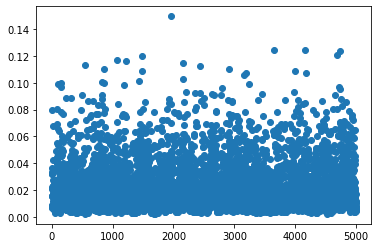

In [34]:
# First with the actual fully modified dataset

ypred = model.predict(np.squeeze(spec[50000:]))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc[50000:].copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
squared_error = np.square(ypred - conc_s)

# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=1)

# Compute the root mean squared error
rmse = np.sqrt(mse)

# Plot
plt.plot(rmse,'o')

157/157 [==============================] - 0s 2ms/step


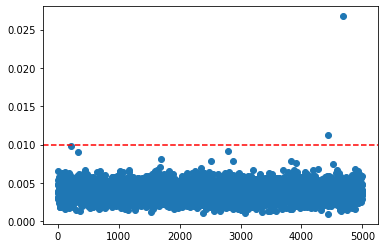

In [35]:
# First with the un-modified examples

ypred = model.predict(np.squeeze(spec0))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
squared_error = np.square(ypred - conc_s)

# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=1)

# Compute the root mean squared error
rmse = np.sqrt(mse)

# Plot
plt.plot(rmse,'o')
plt.axhline(y = 0.01, color = 'r', linestyle = '--')

In [ ]:
np.shape(rmse)

157/157 [==============================] - 0s 2ms/step


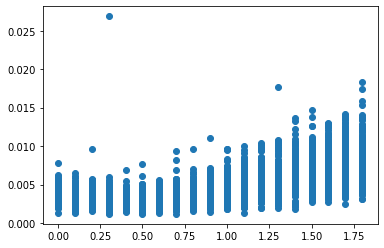

In [36]:
# Plot for varied line broadenings

ypred = model.predict(np.squeeze(spec1))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc1.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
squared_error = np.square(ypred - conc_s)

# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=1)

# Compute the root mean squared error
rmse1 = np.sqrt(mse)


# Plot results
plt.plot(all_linebroad,rmse1,'o')

157/157 [==============================] - 0s 2ms/step


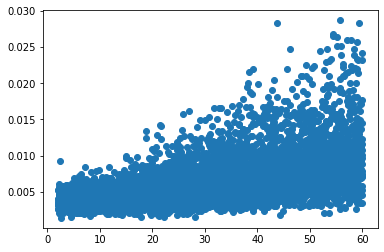

In [37]:
# Now for varied amounts of noise

ypred = model.predict(np.squeeze(spec2))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc2.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
squared_error = np.square(ypred - conc_s)

# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=1)

# Compute the root mean squared error
rmse2 = np.sqrt(mse)


# Plot results
plt.plot(all_noise,rmse2,'o')

In [38]:
## Test SNR calculation for dmso2 in unmodified spectra

SNR_est = spec0[0][6700:6900].max()/np.std(spec0[0][:500])
SNR_est

1105.4463

In [39]:
## Test SNR calculation for dmso2 in spectra with max amount of noise added in data generation

s = spec0[0]++np.random.uniform(low=-10*3,high=10*3,size=14000)/OvMax

SNR_est = s[6700:6900].max()/np.std(s[:500])
SNR_est

117.45263504413565

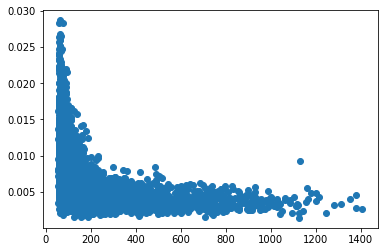

In [40]:
SNR = []

for i in np.arange(5000):
    SNR.append(spec2[i][6700:6900].max()/np.std(spec2[i][:500]))
    
# Plot results
plt.plot(SNR,rmse2,'o')

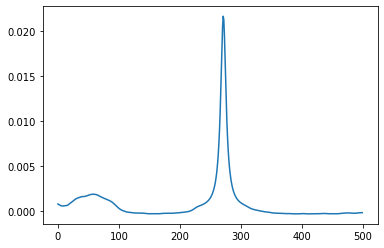

In [42]:
# Find dmso2 peak
plt.plot(spec0[0][6500:7000])

# Determine max value (aka peak height)
spec0[0][6500:7000].max()

# set variable for dmso2 peak height
dmso2 = spec0[0][6500:7000].max()

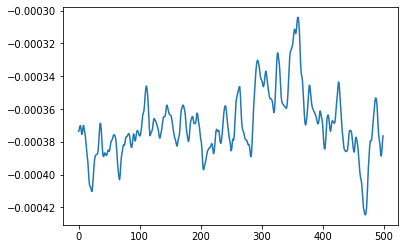

In [43]:
# Find noise
plt.plot(spec0[0][:500])

noise1 = spec

157/157 [==============================] - 0s 2ms/step


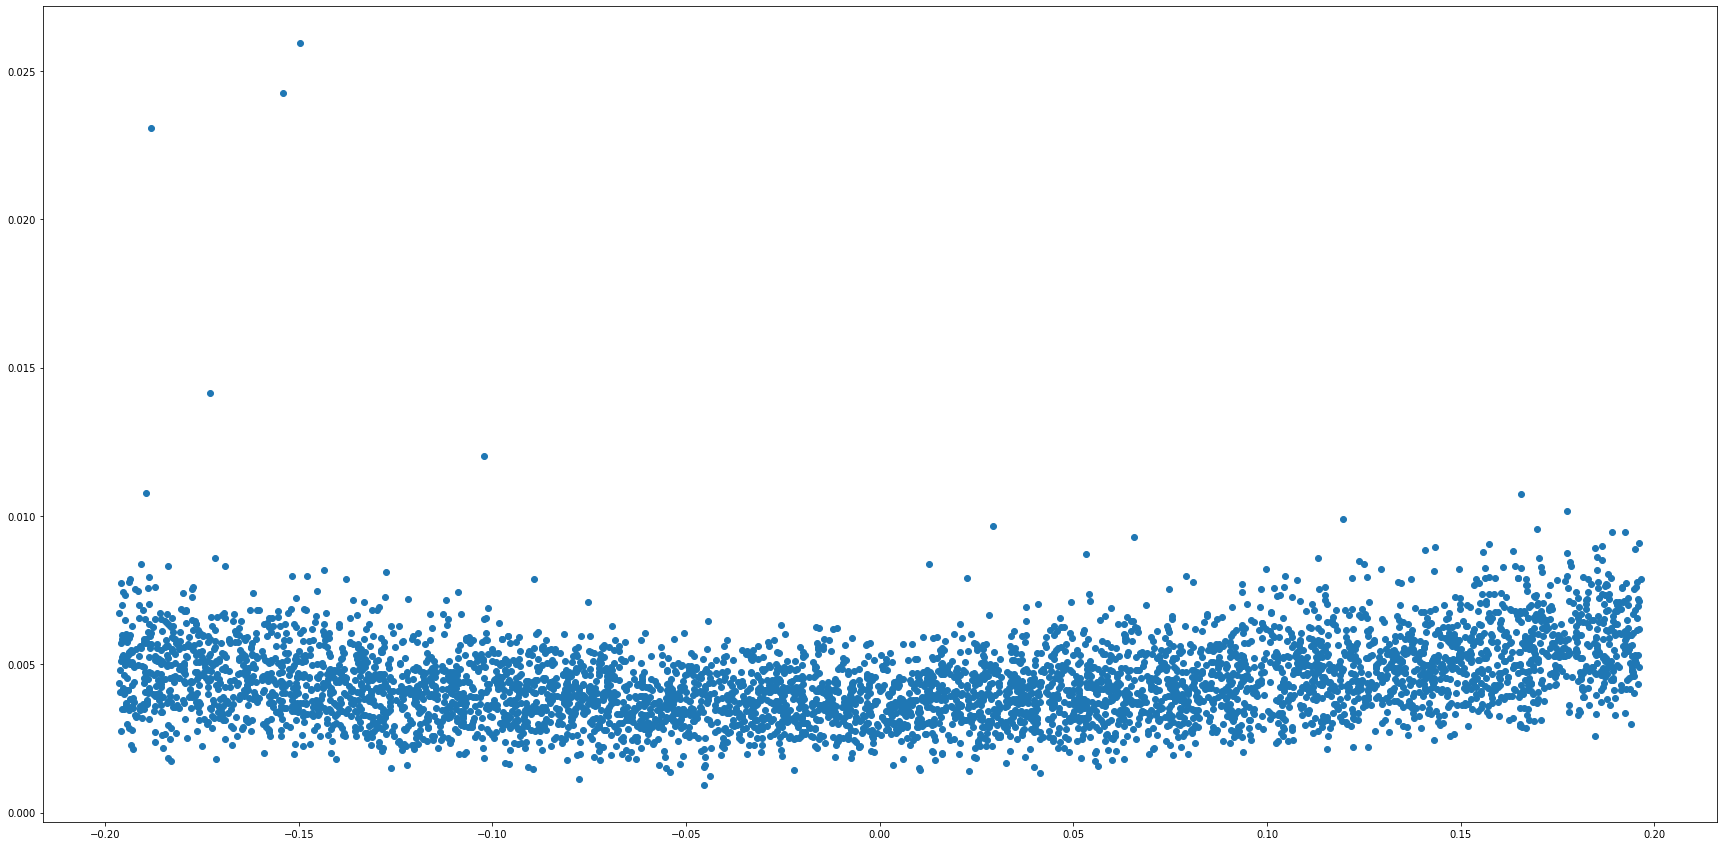

In [46]:
# Now for varied base shifts

ypred = model.predict(np.squeeze(spec3))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc3.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
squared_error = np.square(ypred - conc_s)

# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=1)

# Compute the root mean squared error
rmse3 = np.sqrt(mse)


# Plot results
plt.plot((all_baseshift/OvMax)/dmso2,rmse3,'o')

157/157 [==============================] - 0s 2ms/step


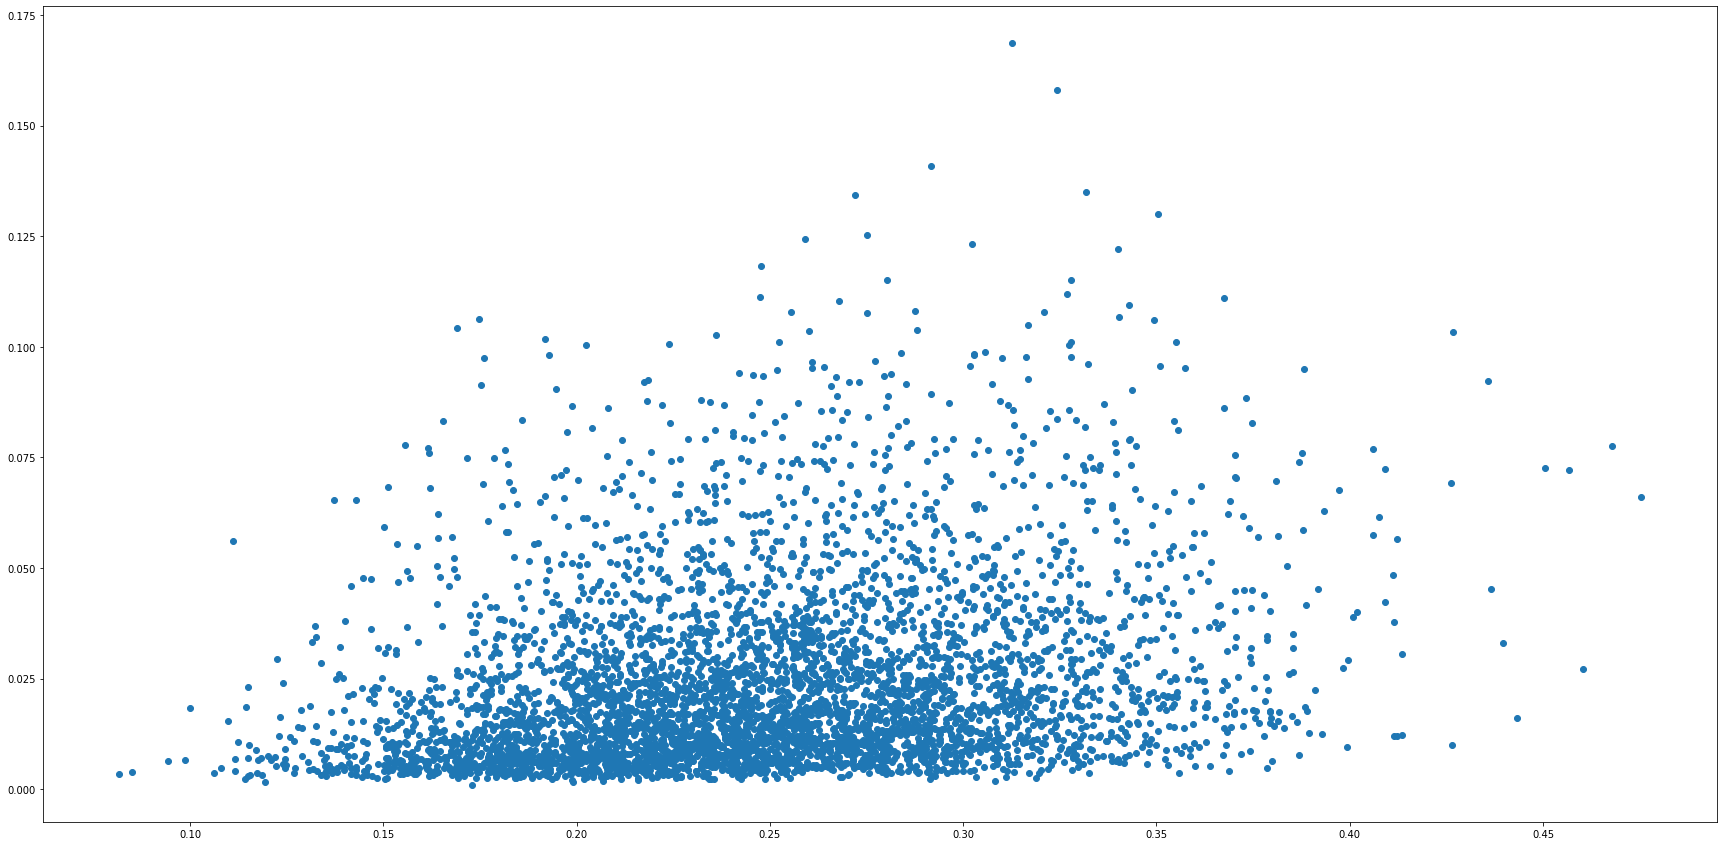

In [47]:
# Now for varied max peak shift

ypred = model.predict(np.squeeze(spec4))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc4.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
squared_error = np.square(ypred - conc_s)

# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=1)

# Compute the root mean squared error
rmse4 = np.sqrt(mse)


# Plot results
plt.plot(all_peakshift,rmse4,'o')

157/157 [==============================] - 0s 2ms/step


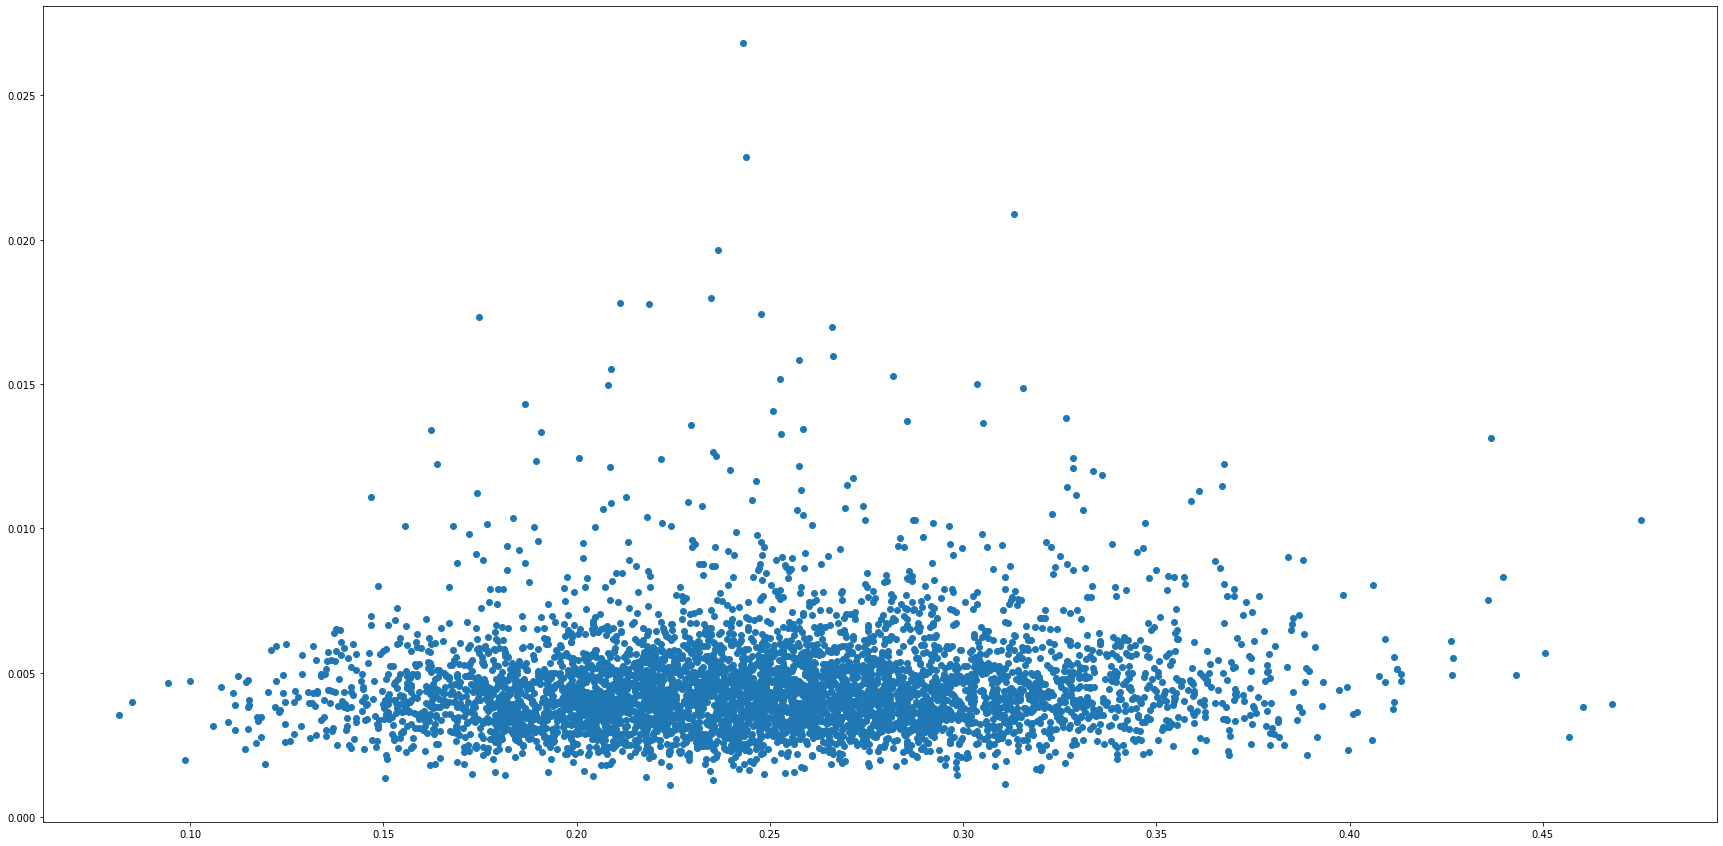

In [48]:
# Now for varied max peak shift without exceeding expected range

ypred = model.predict(np.squeeze(spec5))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc5.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
squared_error = np.square(ypred - conc_s)

# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=1)

# Compute the root mean squared error
rmse5 = np.sqrt(mse)


# Plot results
plt.plot(all_peakshift2,rmse5,'o')

157/157 [==============================] - 0s 2ms/step


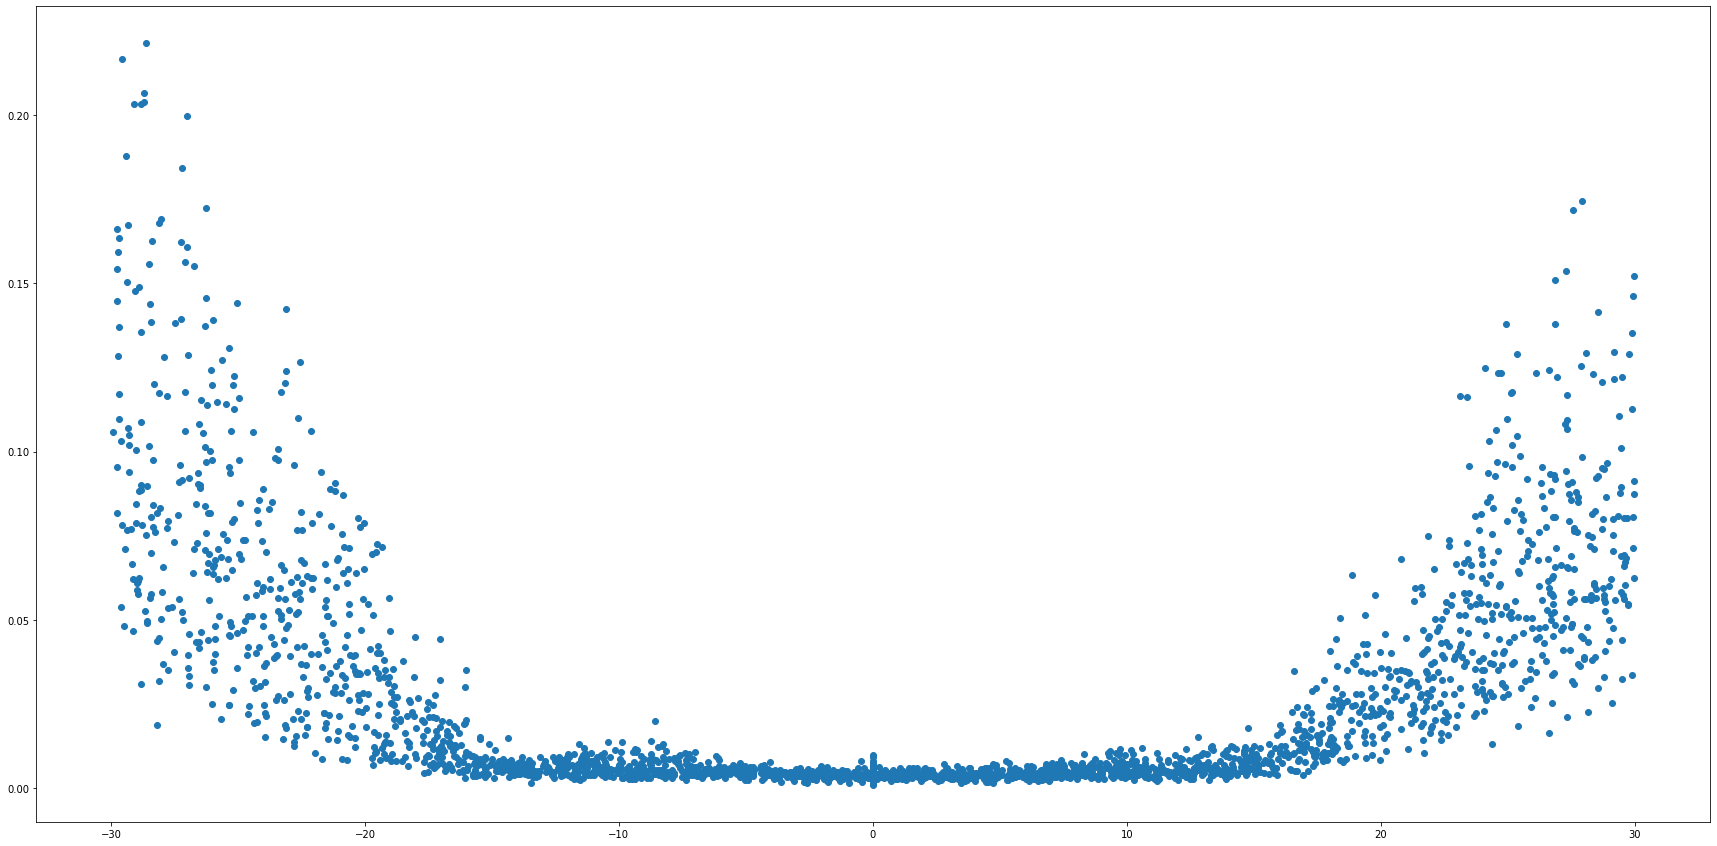

In [49]:
# Now for varied max peak shift without exceeding expected range

ypred = model.predict(np.squeeze(spec6))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc6.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
squared_error = np.square(ypred - conc_s)

# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=1)

# Compute the root mean squared error
rmse6 = np.sqrt(mse)


# Plot results
plt.plot(np.array(all_peakshift3)*30,rmse6,'o')

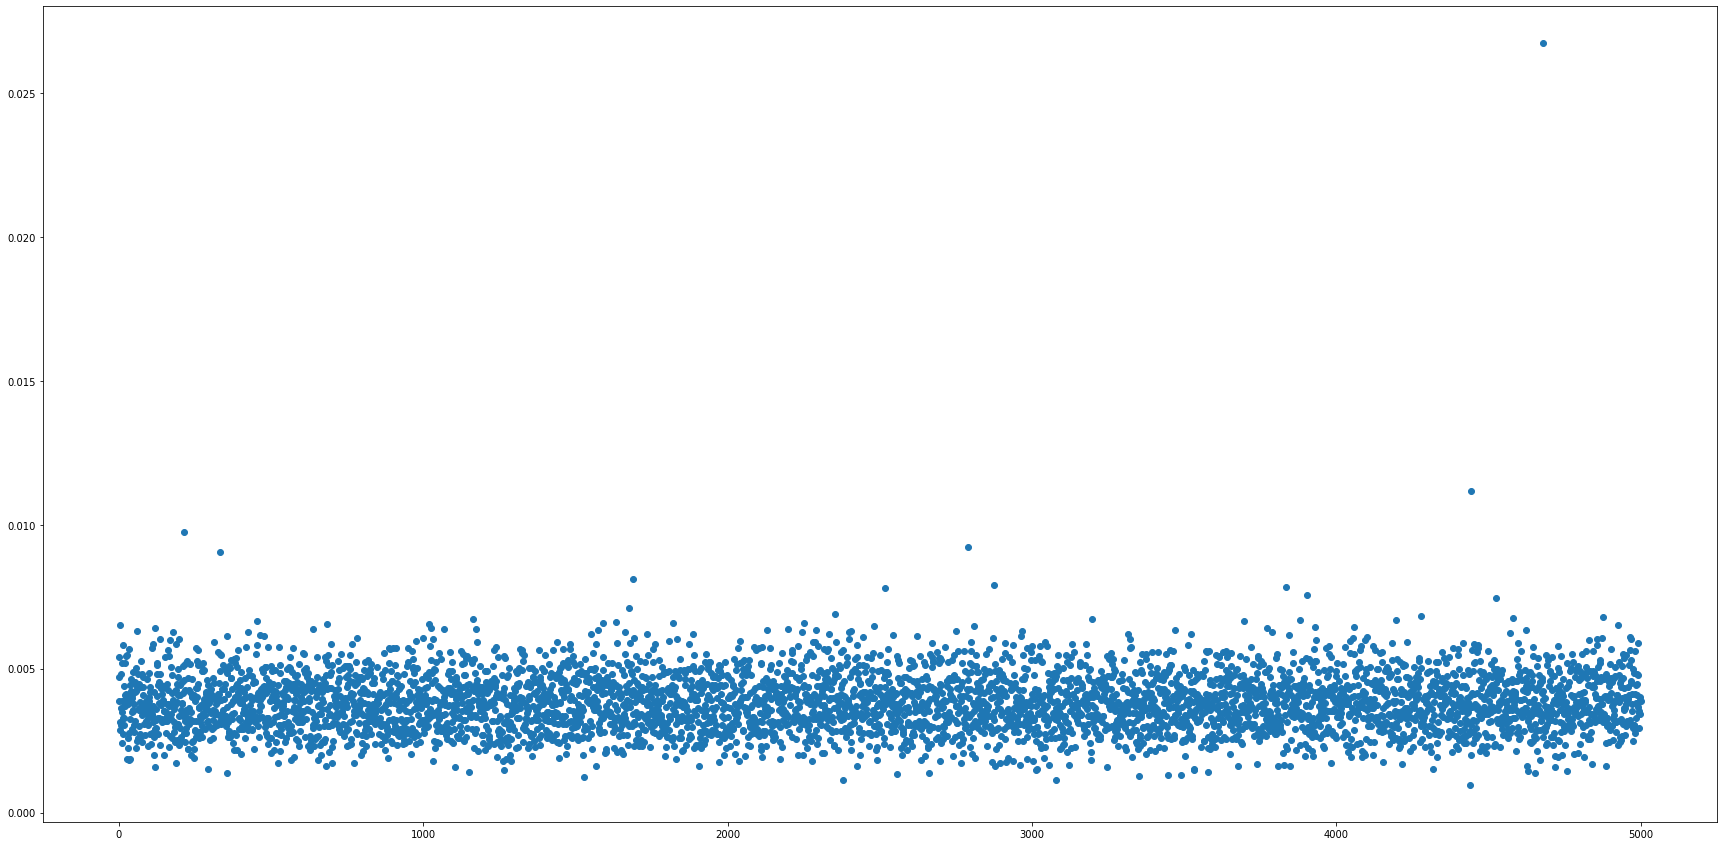

In [50]:
plt.plot(rmse,'o')

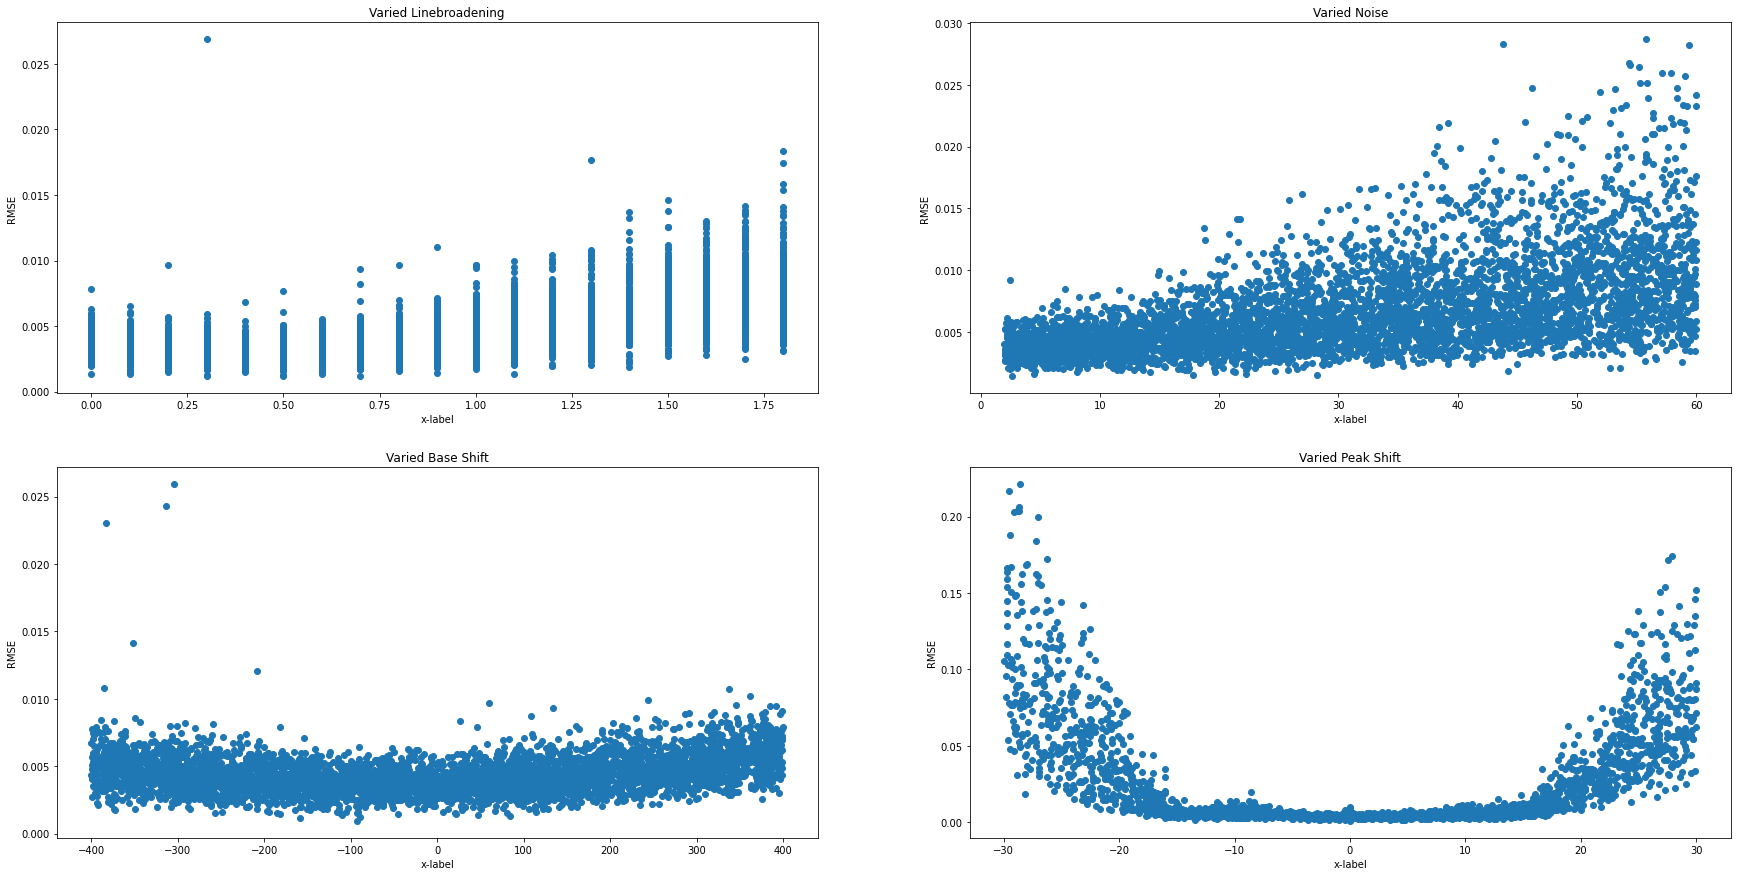

In [51]:


fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(all_linebroad, rmse1,'o')
axs[0, 0].set_title('Varied Linebroadening')
axs[0, 1].plot(all_noise, rmse2,'o')
axs[0, 1].set_title('Varied Noise')
axs[1, 0].plot(all_baseshift, rmse3,'o')
axs[1, 0].set_title('Varied Base Shift')
axs[1, 1].plot(np.array(all_peakshift3)*30, rmse6,'o')
axs[1, 1].set_title('Varied Peak Shift')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='RMSE')

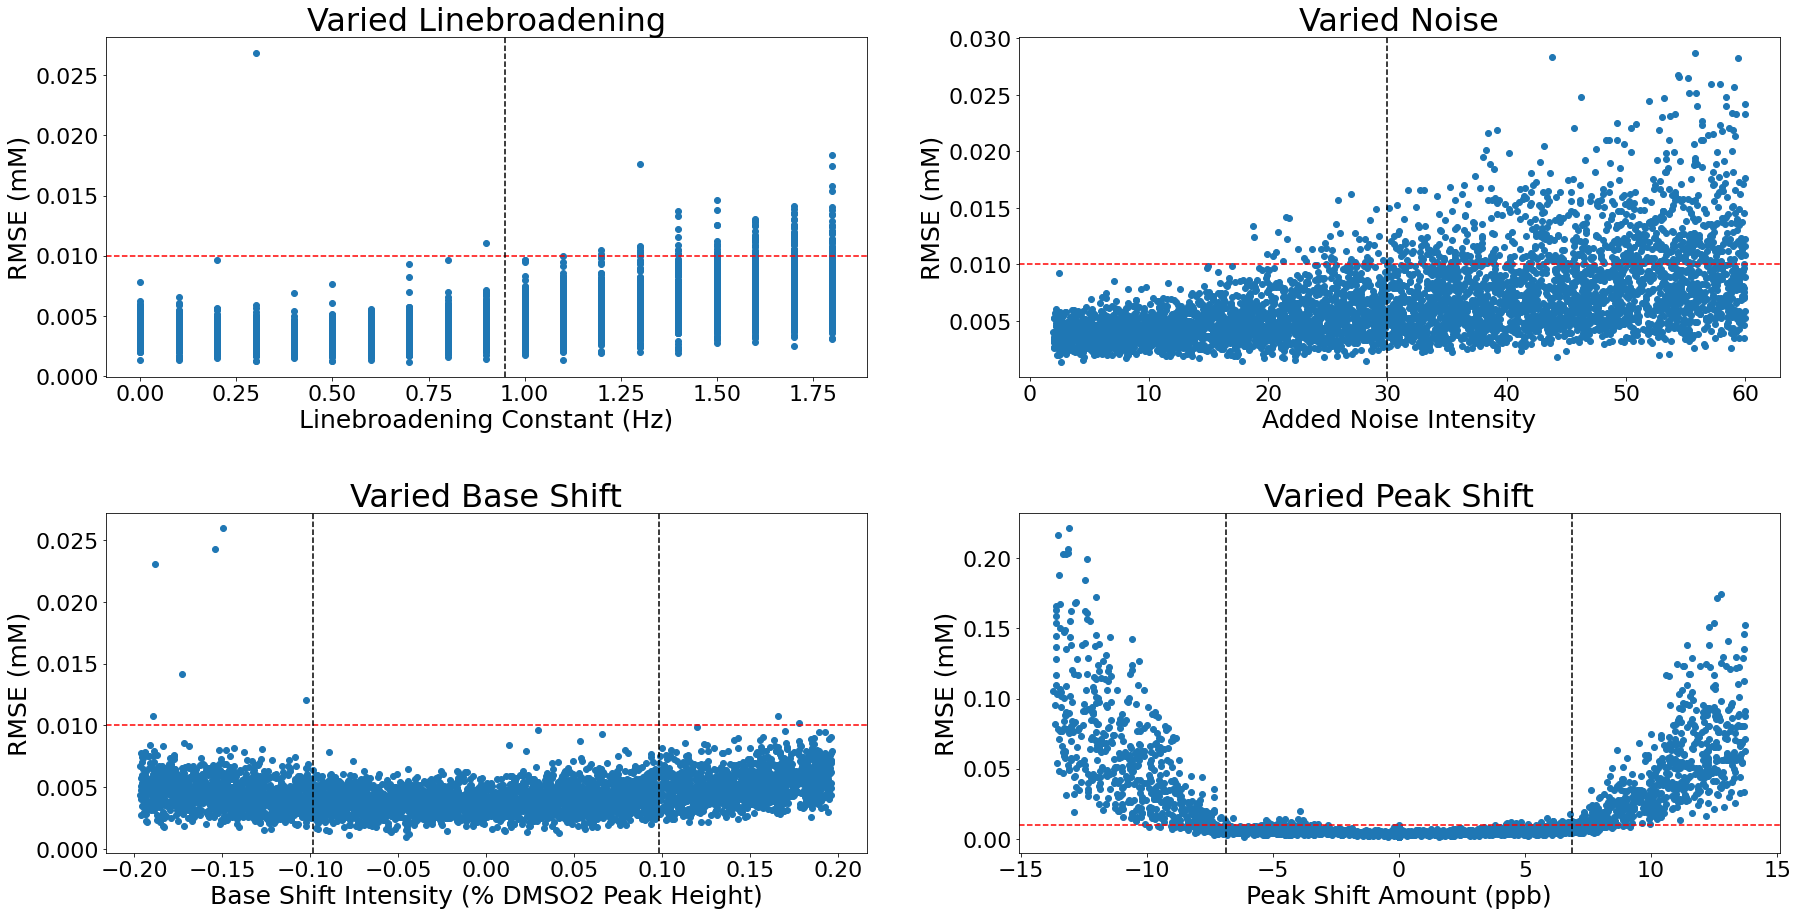

In [52]:
fig, axs = plt.subplots(2, 2)



axs[0, 0].plot(all_linebroad, rmse1,'o')
axs[0, 0].set_title('Varied Linebroadening', fontsize=32)
axs[0, 0].set_xlabel('Linebroadening Constant (Hz)', fontsize=25)
axs[0, 0].set_ylabel('RMSE (mM)', fontsize=25)
axs[0, 0].axhline(y = 0.01, color = 'r', linestyle = '--')
axs[0, 0].axvline(x = 0.95, color = 'k', linestyle = '--')
axs[0, 0].tick_params(axis='both', labelsize=22)

axs[0, 1].plot(all_noise, rmse2,'o')
axs[0, 1].set_title('Varied Noise', fontsize=32)
axs[0, 1].set_xlabel('Added Noise Intensity', fontsize=25)
axs[0, 1].set_ylabel('RMSE (mM)', fontsize=25)
axs[0, 1].axhline(y = 0.01, color = 'r', linestyle = '--')
axs[0, 1].axvline(x = 30, color = 'k', linestyle = '--')
axs[0, 1].tick_params(axis='both', labelsize=22)


axs[1, 0].plot(all_baseshift/OvMax/dmso2, rmse3,'o')
axs[1, 0].set_title('Varied Base Shift', fontsize=32)
axs[1, 0].set_xlabel('Base Shift Intensity (% DMSO2 Peak Height)', fontsize=25)
axs[1, 0].set_ylabel('RMSE (mM)', fontsize=25)
axs[1, 0].axhline(y = 0.01, color = 'r', linestyle = '--')
axs[1, 0].axvline(x = -200/OvMax/dmso2, color = 'k', linestyle = '--')
axs[1, 0].axvline(x = 200/OvMax/dmso2, color = 'k', linestyle = '--')
axs[1, 0].tick_params(axis='both', labelsize=22)


axs[1, 1].plot(np.array(all_peakshift3)*30*0.457763671875, rmse6,'o')
axs[1, 1].set_title('Varied Peak Shift', fontsize=32)
axs[1, 1].set_ylabel('RMSE (mM)', fontsize=25)
axs[1, 1].set_xlabel('Peak Shift Amount (ppb)', fontsize=25)
axs[1, 1].axhline(y = 0.01, color = 'r', linestyle = '--')
axs[1, 1].axvline(x = -15*0.457763671875, color = 'k', linestyle = '--')
axs[1, 1].axvline(x = 15*0.457763671875, color = 'k', linestyle = '--')
axs[1, 1].tick_params(axis='both', labelsize=22)

fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.savefig('DataModificatinoMetrics.svg')

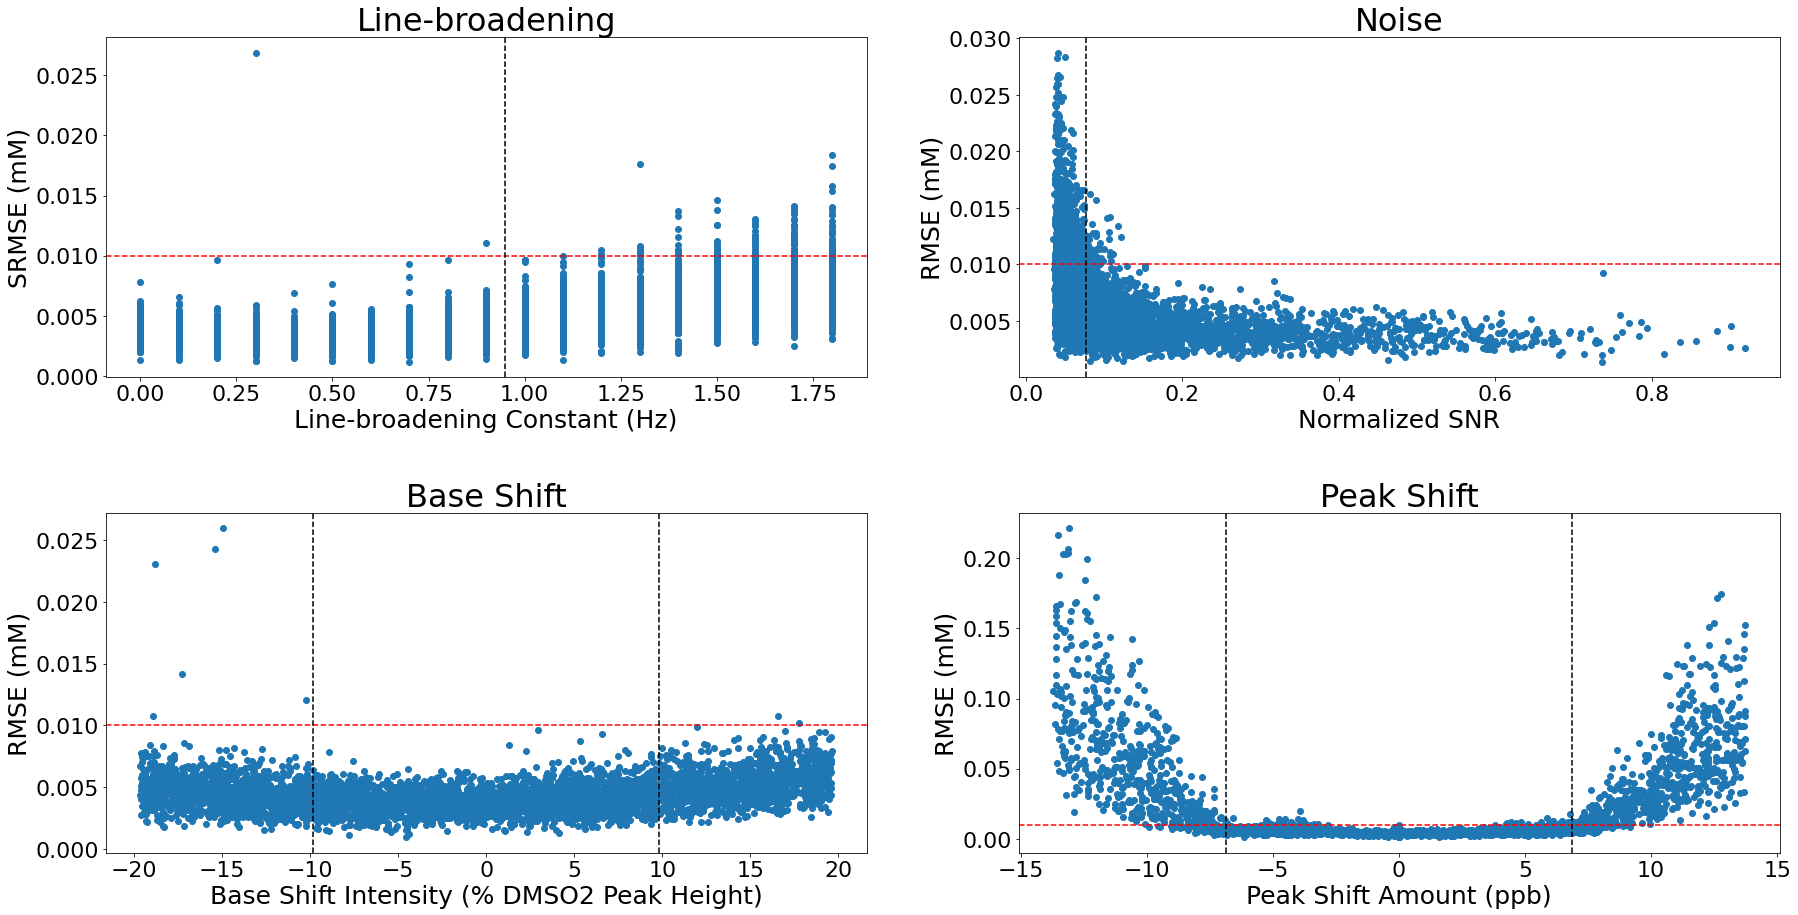

In [445]:
fig, axs = plt.subplots(2, 2)



axs[0, 0].plot(all_linebroad, rmse1,'o')
axs[0, 0].set_title('Line-broadening', fontsize=32)
axs[0, 0].set_xlabel('Line-broadening Constant (Hz)', fontsize=25)
axs[0, 0].set_ylabel('SRMSE (mM)', fontsize=25)
axs[0, 0].axhline(y = 0.01, color = 'r', linestyle = '--')
axs[0, 0].axvline(x = 0.95, color = 'k', linestyle = '--')
axs[0, 0].tick_params(axis='both', labelsize=22)

axs[0, 1].plot(SNR/SNR0, rmse2,'o')
axs[0, 1].set_title('Noise', fontsize=32)
axs[0, 1].set_xlabel('Normalized SNR', fontsize=25)
axs[0, 1].set_ylabel('RMSE (mM)', fontsize=25)
axs[0, 1].axhline(y = 0.01, color = 'r', linestyle = '--')
axs[0, 1].axvline(x = SNR_est/SNR0, color = 'k', linestyle = '--')
axs[0, 1].tick_params(axis='both', labelsize=22)


axs[1, 0].plot(all_baseshift/OvMax/dmso2*100, rmse3,'o')
axs[1, 0].set_title('Base Shift', fontsize=32)
axs[1, 0].set_xlabel('Base Shift Intensity (% DMSO2 Peak Height)', fontsize=25)
axs[1, 0].set_ylabel('RMSE (mM)', fontsize=25)
axs[1, 0].axhline(y = 0.01, color = 'r', linestyle = '--')
axs[1, 0].axvline(x = -200/OvMax/dmso2*100, color = 'k', linestyle = '--')
axs[1, 0].axvline(x = 200/OvMax/dmso2*100, color = 'k', linestyle = '--')
axs[1, 0].tick_params(axis='both', labelsize=22)


axs[1, 1].plot(np.array(all_peakshift3)*30*0.457763671875, rmse6,'o')
axs[1, 1].set_title('Peak Shift', fontsize=32)
axs[1, 1].set_ylabel('RMSE (mM)', fontsize=25)
axs[1, 1].set_xlabel('Peak Shift Amount (ppb)', fontsize=25)
axs[1, 1].axhline(y = 0.01, color = 'r', linestyle = '--')
axs[1, 1].axvline(x = -15*0.457763671875, color = 'k', linestyle = '--')
axs[1, 1].axvline(x = 15*0.457763671875, color = 'k', linestyle = '--')
axs[1, 1].tick_params(axis='both', labelsize=22)

fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.savefig('DataModificationMetrics.svg')

In [421]:
## For determining what RMSE values belong to spectra generated with values within training modification range
## This section for varied line-broadening constants in training

# Set some empty lists to append values to
rmse_linebroad_inside = []
rmse_linebroad_outside = []
# loop for determining what RMSE values fall within or outside of the training modification range
for i in np.arange(5000):
    if all_linebroad[i] <= 1:
        rmse_linebroad_inside.append(rmse1[i])
    else:
        rmse_linebroad_outside.append(rmse1[i])
        

## For determining what RMSE values fall under the determined RMSE threshold of 0.01 mM - for data inside training modification range
# Set some empty lists to append values to
rmse_linebroad_inside_under = []
rmse_linebroad_inside_above = []
# loop for determining what RMSE values fall above and below the RMSE cutoff
for i in np.arange(len(rmse_linebroad_inside)):
    if rmse_linebroad_inside[i] <= 0.01:
        rmse_linebroad_inside_under.append(rmse_linebroad_inside[i])
    else:
        rmse_linebroad_inside_above.append(rmse_linebroad_inside[i])
        

## For determining what RMSE values fall under the determined RMSE threshold of 0.01 mM - for data outside training modification range
# Set some empty lists to append values to
rmse_linebroad_outside_under = []
rmse_linebroad_outside_above = []
# loop for determining what RMSE values fall above and below the RMSE cutoff
for i in np.arange(len(rmse_linebroad_outside)):
    if rmse_linebroad_outside[i] <= 0.01:
        rmse_linebroad_outside_under.append(rmse_linebroad_outside[i])
    else:
        rmse_linebroad_outside_above.append(rmse_linebroad_outside[i])


## See if correct number of total data points is conserved
print(len(rmse_linebroad_inside_under)+len(rmse_linebroad_inside_above)+len(rmse_linebroad_outside_under)+len(rmse_linebroad_outside_above))

## Print total number in each group, and percentages of datapoints under RMSE metric magnitude for inside training modification sets
print("Inside training range stats:",len(rmse_linebroad_inside_under),"under,",len(rmse_linebroad_inside_above),"above,",round(100*len(rmse_linebroad_inside_under)/len(rmse_linebroad_inside),2),"Percent under RMSE of 0.01mM")

## Print total number in each group, and percentages of datapoints under RMSE metric magnitude for outside training modification sets
print("Outside training range stats:",len(rmse_linebroad_outside_under),"under,",len(rmse_linebroad_outside_above),"above,",round(100*len(rmse_linebroad_outside_under)/len(rmse_linebroad_outside),2),"Percent under RMSE of 0.01mM")

5000
Inside training range stats: 3034 under, 2 above, 99.93 Percent under RMSE of 0.01mM
Outside training range stats: 1833 under, 131 above, 93.33 Percent under RMSE of 0.01mM


In [442]:
SNR[0]/SNR0

0.12427574385917999

In [444]:
## For determining what RMSE values belong to spectra generated with values within training modification range
## This section for varied amounts of added noise in training

# Set some empty lists to append values to
rmse_noise_inside = []
rmse_noise_outside = []
# loop for determining what RMSE values fall within or outside of the training modification range
for i in np.arange(5000):
    if SNR[i]/SNR0 >= SNR_est/SNR0:
        rmse_noise_inside.append(rmse2[i])
    else:
        rmse_noise_outside.append(rmse2[i])
        

## For determining what RMSE values fall under the determined RMSE threshold of 0.01 mM - for data inside training modification range
# Set some empty lists to append values to
rmse_noise_inside_under = []
rmse_noise_inside_above = []
# loop for determining what RMSE values fall above and below the RMSE cutoff
for i in np.arange(len(rmse_noise_inside)):
    if rmse_noise_inside[i] <= 0.01:
        rmse_noise_inside_under.append(rmse_noise_inside[i])
    else:
        rmse_noise_inside_above.append(rmse_noise_inside[i])
        

## For determining what RMSE values fall under the determined RMSE threshold of 0.01 mM - for data outside training modification range
# Set some empty lists to append values to
rmse_noise_outside_under = []
rmse_noise_outside_above = []
# loop for determining what RMSE values fall above and below the RMSE cutoff
for i in np.arange(len(rmse_noise_outside)):
    if rmse_noise_outside[i] <= 0.01:
        rmse_noise_outside_under.append(rmse_noise_outside[i])
    else:
        rmse_noise_outside_above.append(rmse_noise_outside[i])


## See if correct number of total data points is conserved
print(len(rmse_noise_inside_under)+len(rmse_noise_inside_above)+len(rmse_noise_outside_under)+len(rmse_noise_outside_above))

## Print total number in each group, and percentages of datapoints under RMSE metric magnitude for inside training modification sets
print("Inside training range stats:",len(rmse_noise_inside_under),"under,",len(rmse_noise_inside_above),"above,",round(100*len(rmse_noise_inside_under)/len(rmse_noise_inside),2),"Percent under RMSE of 0.01mM")

## Print total number in each group, and percentages of datapoints under RMSE metric magnitude for outside training modification sets
print("Outside training range stats:",len(rmse_noise_outside_under),"under,",len(rmse_noise_outside_above),"above,",round(100*len(rmse_noise_outside_under)/len(rmse_noise_outside),2),"Percent under RMSE of 0.01mM")

5000
Inside training range stats: 2316 under, 44 above, 98.14 Percent under RMSE of 0.01mM
Outside training range stats: 1901 under, 739 above, 72.01 Percent under RMSE of 0.01mM


In [119]:
## For determining what RMSE values belong to spectra generated with values within training modification range
## This section for varied amounts of base shift


# Scale baseshift variables to reflect current plots (scaled to match spectra scaling and to reflect percentage of DMSO2 height)
peakshifts = np.array(all_peakshift3)*30*0.457763671875


# Set some empty lists to append values to
rmse_peakshifts_inside = []
rmse_peakshifts_outside = []
# loop for determining what RMSE values fall within or outside of the training modification range
for i in np.arange(5000):
    if abs(peakshifts[i]) <= 15*0.457763671875:
        rmse_peakshifts_inside.append(rmse6[i])
    else:
        rmse_peakshifts_outside.append(rmse6[i])
        

## For determining what RMSE values fall under the determined RMSE threshold of 0.01 mM - for data inside training modification range
# Set some empty lists to append values to
rmse_peakshifts_inside_under = []
rmse_peakshifts_inside_above = []
# loop for determining what RMSE values fall above and below the RMSE cutoff
for i in np.arange(len(rmse_peakshifts_inside)):
    if rmse_peakshifts_inside[i] <= 0.01:
        rmse_peakshifts_inside_under.append(rmse_peakshifts_inside[i])
    else:
        rmse_peakshifts_inside_above.append(rmse_peakshifts_inside[i])
        

## For determining what RMSE values fall under the determined RMSE threshold of 0.01 mM - for data outside training modification range
# Set some empty lists to append values to
rmse_peakshifts_outside_under = []
rmse_peakshifts_outside_above = []
# loop for determining what RMSE values fall above and below the RMSE cutoff
for i in np.arange(len(rmse_peakshifts_outside)):
    if rmse_peakshifts_outside[i] <= 0.01:
        rmse_peakshifts_outside_under.append(rmse_peakshifts_outside[i])
    else:
        rmse_peakshifts_outside_above.append(rmse_peakshifts_outside[i])


## See if correct number of total data points is conserved
print(len(rmse_peakshifts_inside_under)+len(rmse_peakshifts_inside_above)+len(rmse_peakshifts_outside_under)+len(rmse_peakshifts_outside_above))

## Print total number in each group, and percentages of datapoints under RMSE metric magnitude for inside training modification sets
print("Inside training range stats:",len(rmse_peakshifts_inside_under),"under,",len(rmse_peakshifts_inside_above),"above,",round(100*len(rmse_peakshifts_inside_under)/len(rmse_peakshifts_inside),2),"Percent under RMSE of 0.01mM")

## Print total number in each group, and percentages of datapoints under RMSE metric magnitude for outside training modification sets
print("Outside training range stats:",len(rmse_peakshifts_outside_under),"under,",len(rmse_peakshifts_outside_above),"above,",round(100*len(rmse_peakshifts_outside_under)/len(rmse_peakshifts_outside),2),"Percent under RMSE of 0.01mM")

5000
Inside training range stats: 3724 under, 55 above, 98.54 Percent under RMSE of 0.01mM
Outside training range stats: 136 under, 1085 above, 11.14 Percent under RMSE of 0.01mM


In [71]:
## For determining what RMSE values belong to spectra generated with values within training modification range
## This section for varied amounts of base shift


# Scale baseshift variables to reflect current plots (scaled to match spectra scaling and to reflect percentage of DMSO2 height)
baseshifts = all_baseshift/OvMax/dmso2*100


# Set some empty lists to append values to
rmse_baseshifts_inside = []
rmse_baseshifts_outside = []
# loop for determining what RMSE values fall within or outside of the training modification range
for i in np.arange(5000):
    if abs(baseshifts[i]) <= 200/OvMax/dmso2*100:
        rmse_baseshifts_inside.append(rmse3[i])
    else:
        rmse_baseshifts_outside.append(rmse3[i])
        

## For determining what RMSE values fall under the determined RMSE threshold of 0.01 mM - for data inside training modification range
# Set some empty lists to append values to
rmse_baseshifts_inside_under = []
rmse_baseshifts_inside_above = []
# loop for determining what RMSE values fall above and below the RMSE cutoff
for i in np.arange(len(rmse_baseshifts_inside)):
    if rmse_baseshifts_inside[i] <= 0.01:
        rmse_baseshifts_inside_under.append(rmse_baseshifts_inside[i])
    else:
        rmse_baseshifts_inside_above.append(rmse_baseshifts_inside[i])
        

## For determining what RMSE values fall under the determined RMSE threshold of 0.01 mM - for data outside training modification range
# Set some empty lists to append values to
rmse_baseshifts_outside_under = []
rmse_baseshifts_outside_above = []
# loop for determining what RMSE values fall above and below the RMSE cutoff
for i in np.arange(len(rmse_baseshifts_outside)):
    if rmse_baseshifts_outside[i] <= 0.01:
        rmse_baseshifts_outside_under.append(rmse_baseshifts_outside[i])
    else:
        rmse_baseshifts_outside_above.append(rmse_baseshifts_outside[i])


## See if correct number of total data points is conserved
print(len(rmse_baseshifts_inside_under)+len(rmse_baseshifts_inside_above)+len(rmse_baseshifts_outside_under)+len(rmse_baseshifts_outside_above))

## Print total number in each group, and percentages of datapoints under RMSE metric magnitude for inside training modification sets
print("Inside training range stats:",len(rmse_baseshifts_inside_under),"under,",len(rmse_baseshifts_inside_above),"above,",round(100*len(rmse_baseshifts_inside_under)/len(rmse_baseshifts_inside),2),"Percent under RMSE of 0.01mM")

## Print total number in each group, and percentages of datapoints under RMSE metric magnitude for outside training modification sets
print("Outside training range stats:",len(rmse_baseshifts_outside_under),"under,",len(rmse_baseshifts_outside_above),"above,",round(100*len(rmse_baseshifts_outside_under)/len(rmse_baseshifts_outside),2),"Percent under RMSE of 0.01mM")

5000
Inside training range stats: 2530 under, 0 above, 100.0 Percent under RMSE of 0.01mM
Outside training range stats: 2462 under, 8 above, 99.68 Percent under RMSE of 0.01mM


## Now a few plots for SNR considerations of individual metabolites

In [ ]:
## Some test APE calculations

#for i in np.arange(100):
#    print(ypred[i].T[0],conc_s[i].T[0],abs((ypred[i].T[0] - conc_s[i].T[0])/conc_s[i].T[0])*100)

In [ ]:
# First with the un-modified examples

ypred = model.predict(np.squeeze(spec0))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
APE = abs((ypred.T[0] - conc_s.T[0])/conc_s.T[0])*100



# Plot results
plt.plot(all_noise,APE,'o')

In [ ]:
np.shape(ypred.T[0])

In [ ]:
# Now for varied amounts of noise, determining APE for each metabolite

ypred = model.predict(np.squeeze(spec2))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc2.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
# Compute the squared error
APE = abs((ypred.T[0] - conc_s.T[0])/conc_s.T[0])*100



# Plot results
plt.plot(all_noise,APE,'o')

In [ ]:
# Now for varied amounts of noise, determining RMSE for each metabolite

ypred = model.predict(np.squeeze(spec2))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc2.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
for i in np.arange(18):
    # Compute the squared error
    APE = abs((ypred.T[i] - conc_s.T[i])/conc_s.T[i])*100
    
    # Plot results
    #print(LipList5[i])
    #plt.plot(all_noise,APE,'o')
    #plt.show()

In [ ]:
# Now for varied amounts of noise, determining RMSE for each metabolite

ypred = model.predict(np.squeeze(spec2))

# Scale the target concentrations to be in the range of 0-1
conc_s = conc2.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    
for i in np.arange(18):
    # Compute the squared error
    AE = abs(ypred.T[i] - conc_s.T[i])
    
    # Plot results
    #print(LipList5[i])
    #plt.plot(all_noise,AE,'o')
    #plt.show()

In [57]:
## Now vary noise - generate separate datasets with different max noise levels for 

## Create empty lists for building datasets iteratively
spec_n1 = []
spec_n2 = []
spec_n3 = []
spec_n4 = []
spec_n5 = []
spec_n6 = []


## Create each datasets at increasing levels of noise (use max of 10, 20, 30, 40, 50, and 60)
for i in np.arange(5000):
    np.random.seed(i+670000)
    random.seed(i+670000)
    r = (1/3)*random.uniform(0.1,3)
    spec_n1.append(spec0[i]+np.random.uniform(low=-10*r,high=10*r,size=14000)/OvMax)
    
for i in np.arange(5000):
    np.random.seed(i+670000)
    random.seed(i+670000)
    r = (2/3)*random.uniform(0.1,3)
    spec_n2.append(spec0[i]+np.random.uniform(low=-10*r,high=10*r,size=14000)/OvMax)
    
for i in np.arange(5000):
    np.random.seed(i+670000)
    random.seed(i+670000)
    r = random.uniform(0.1,3)
    spec_n3.append(spec0[i]+np.random.uniform(low=-10*r,high=10*r,size=14000)/OvMax)
    
for i in np.arange(5000):
    np.random.seed(i+670000)
    random.seed(i+670000)
    r = (4/3)*random.uniform(0.1,3)
    spec_n4.append(spec0[i]+np.random.uniform(low=-10*r,high=10*r,size=14000)/OvMax)
    
for i in np.arange(5000):
    np.random.seed(i+670000)
    random.seed(i+670000)
    r = (5/3)*random.uniform(0.1,3)
    spec_n5.append(spec0[i]+np.random.uniform(low=-10*r,high=10*r,size=14000)/OvMax)
    
for i in np.arange(5000):
    np.random.seed(i+670000)
    random.seed(i+670000)
    r = 2*random.uniform(0.1,3)
    spec_n6.append(spec0[i]+np.random.uniform(low=-10*r,high=10*r,size=14000)/OvMax)


In [58]:
# Compute RMSE for each output node, separately for each dataset (starting with no noise up to full noise of 60 intensity)


## Noise level of 0
ypred = model.predict(np.squeeze(spec0))
# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
# Compute the squared error
squared_error = np.square(ypred - conc_s)
# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=0)
# Compute the root mean squared error
rmse_n0 = np.sqrt(mse)


## Noise level of 10
ypred = model.predict(np.squeeze(spec_n1))
# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
# Compute the squared error
squared_error = np.square(ypred - conc_s)
# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=0)
# Compute the root mean squared error
rmse_n1 = np.sqrt(mse)

## Noise level of 20
ypred = model.predict(np.squeeze(spec_n2))
# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
# Compute the squared error
squared_error = np.square(ypred - conc_s)
# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=0)
# Compute the root mean squared error
rmse_n2 = np.sqrt(mse)

## Noise level of 30
ypred = model.predict(np.squeeze(spec_n3))
# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
# Compute the squared error
squared_error = np.square(ypred - conc_s)
# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=0)
# Compute the root mean squared error
rmse_n3 = np.sqrt(mse)

## Noise level of 40
ypred = model.predict(np.squeeze(spec_n4))
# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
# Compute the squared error
squared_error = np.square(ypred - conc_s)
# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=0)
# Compute the root mean squared error
rmse_n4 = np.sqrt(mse)

## Noise level of 50
ypred = model.predict(np.squeeze(spec_n5))
# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
# Compute the squared error
squared_error = np.square(ypred - conc_s)
# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=0)
# Compute the root mean squared error
rmse_n5 = np.sqrt(mse)

## Noise level of 60
ypred = model.predict(np.squeeze(spec_n6))
# Scale the target concentrations to be in the range of 0-1
conc_s = conc0.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
# Compute the squared error
squared_error = np.square(ypred - conc_s)
# Compute the mean squared error along the second axis (axis=1) to get 5000 values
mse = np.mean(squared_error, axis=0)
# Compute the root mean squared error
rmse_n6 = np.sqrt(mse)

# Make lists for plotting results
noise_max = [0, 10/OvMax/dmso2, 20/OvMax/dmso2, 30/OvMax/dmso2, 40/OvMax/dmso2, 50/OvMax/dmso2, 60/OvMax/dmso2]
all_rmse = [rmse_n0,rmse_n1,rmse_n2,rmse_n3,rmse_n4,rmse_n5,rmse_n6]

157/157 [==============================] - 0s 2ms/step


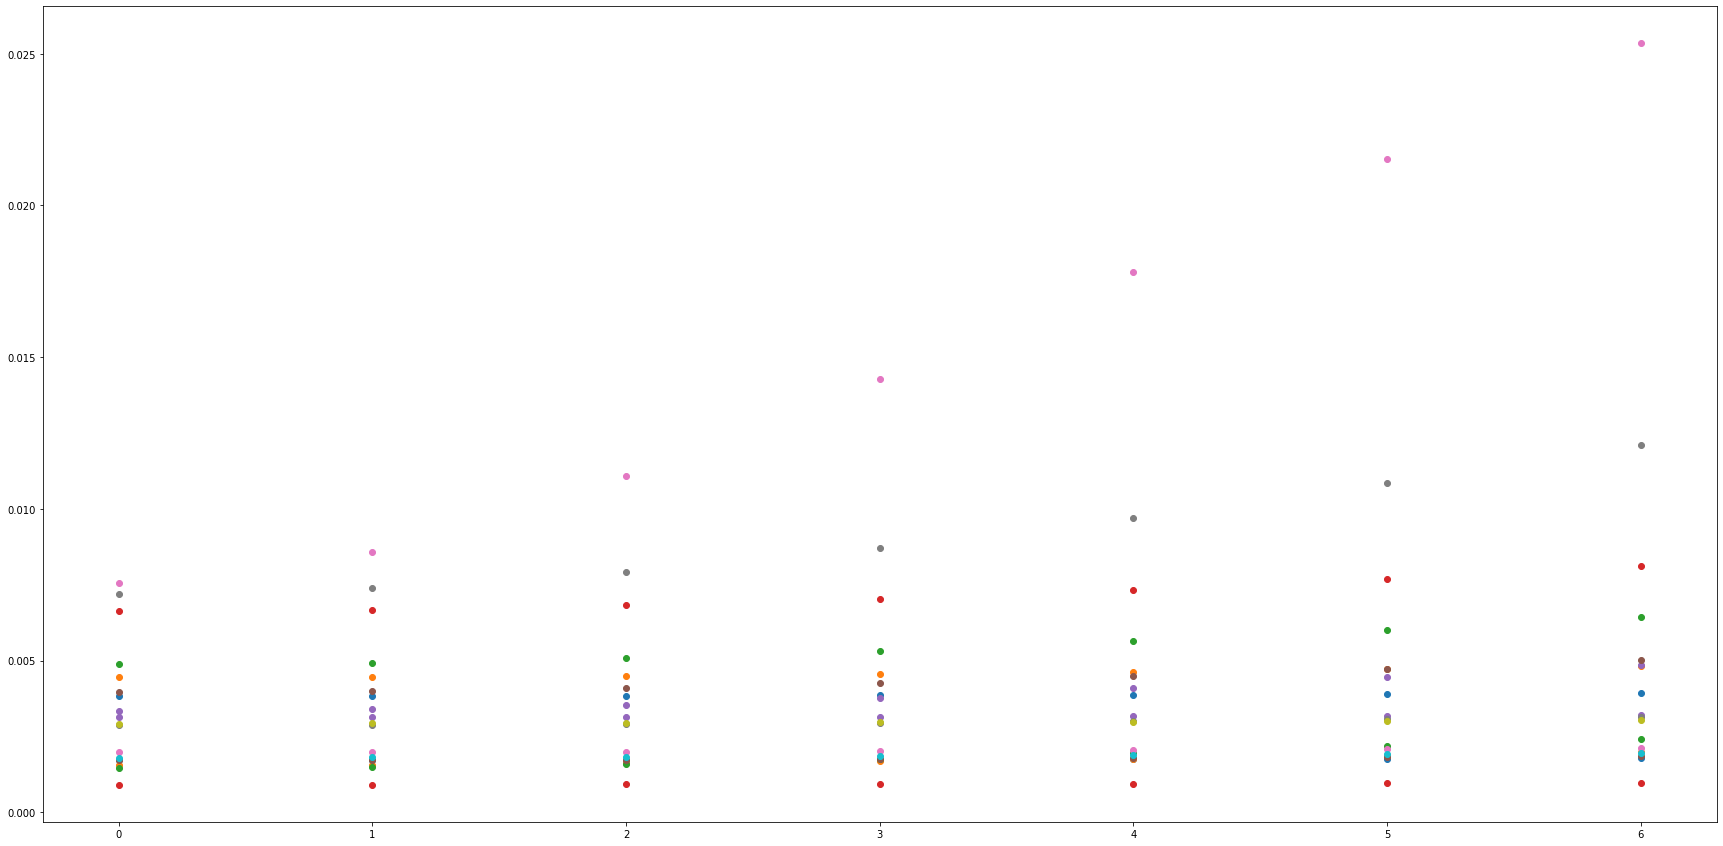

In [224]:
plt.plot([0,1,2,3,4,5,6],all_rmse,'o')

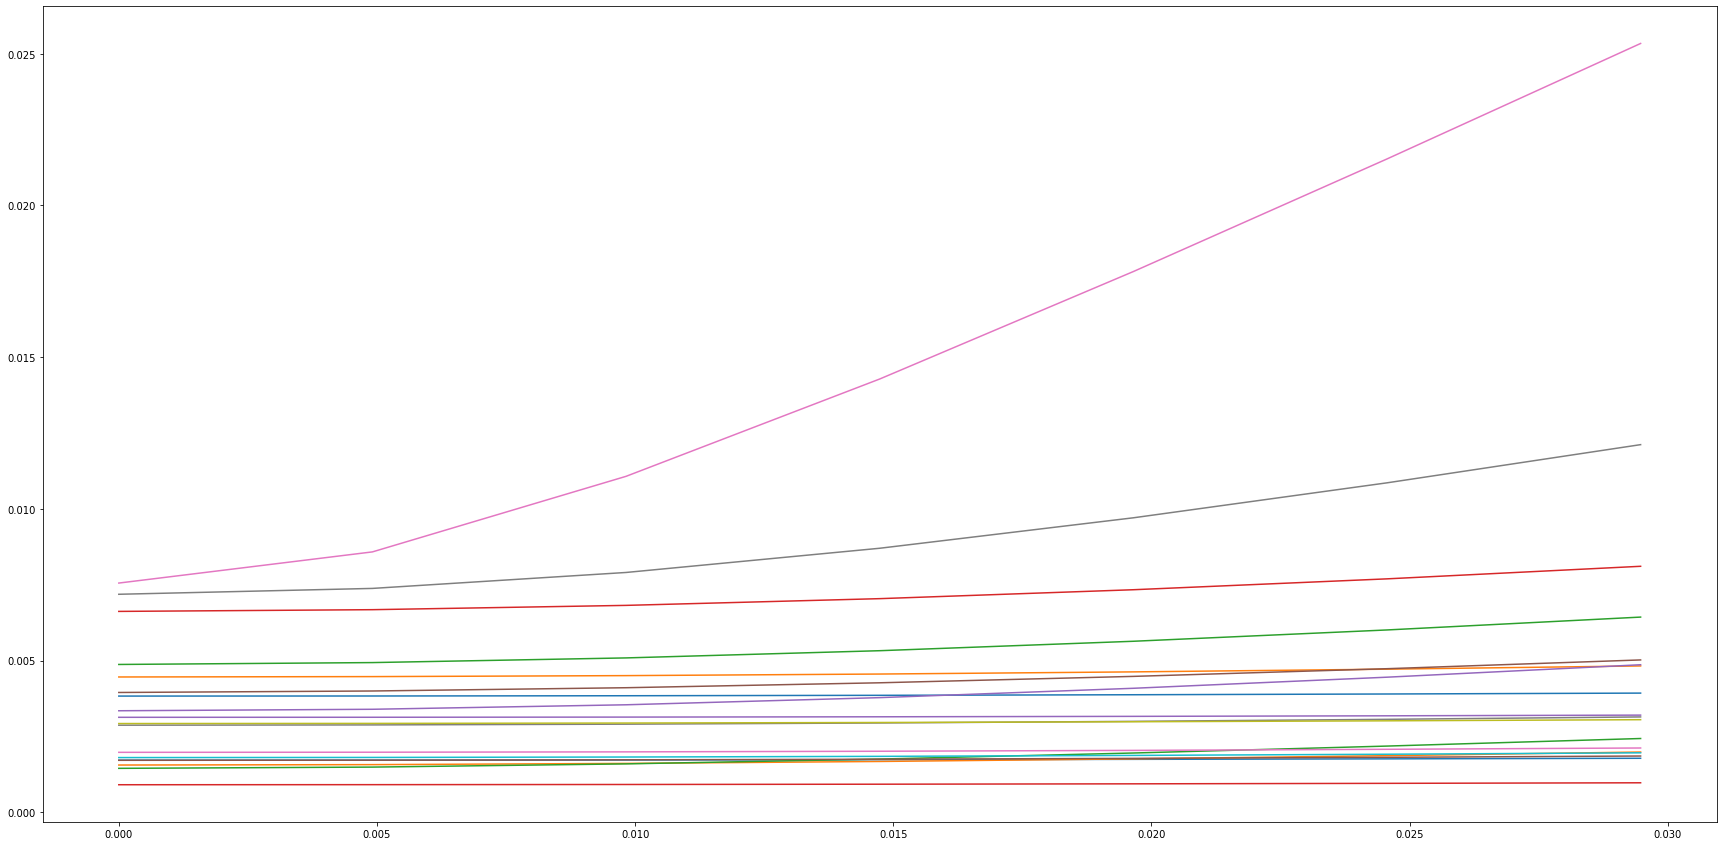

In [60]:
plt.plot(noise_max,all_rmse)

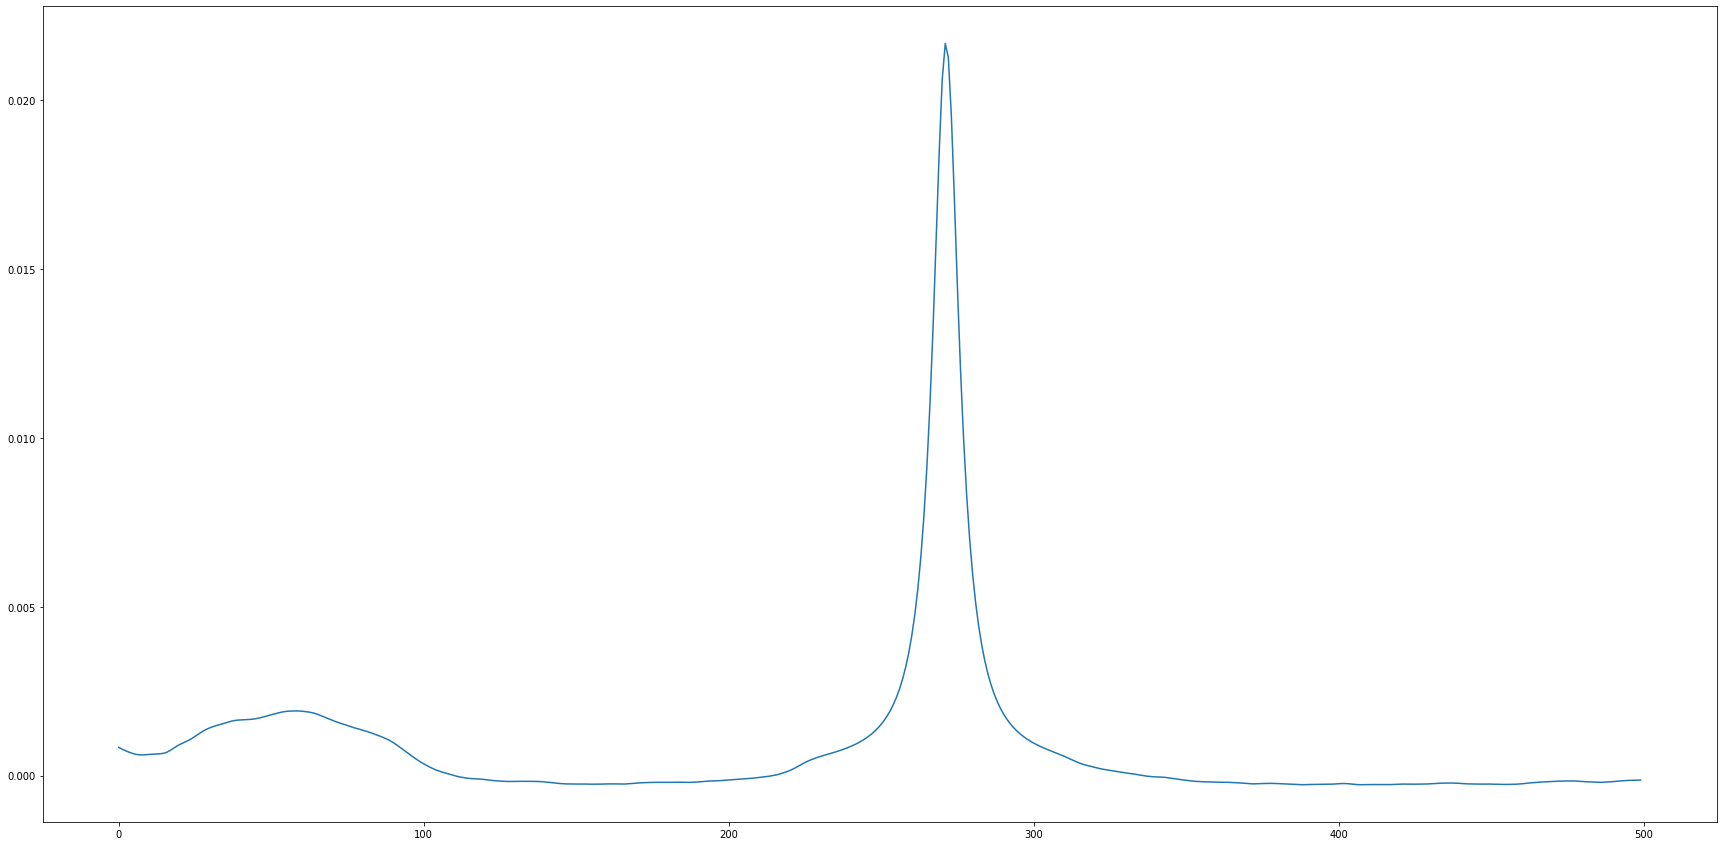

In [61]:
# Find dmso2 peak
plt.plot(spec0[0][6500:7000])

# Determine max value (aka peak height)
spec0[0][6500:7000].max()

# set variable for dmso2 peak height
dmso2 = spec0[0][6500:7000].max()

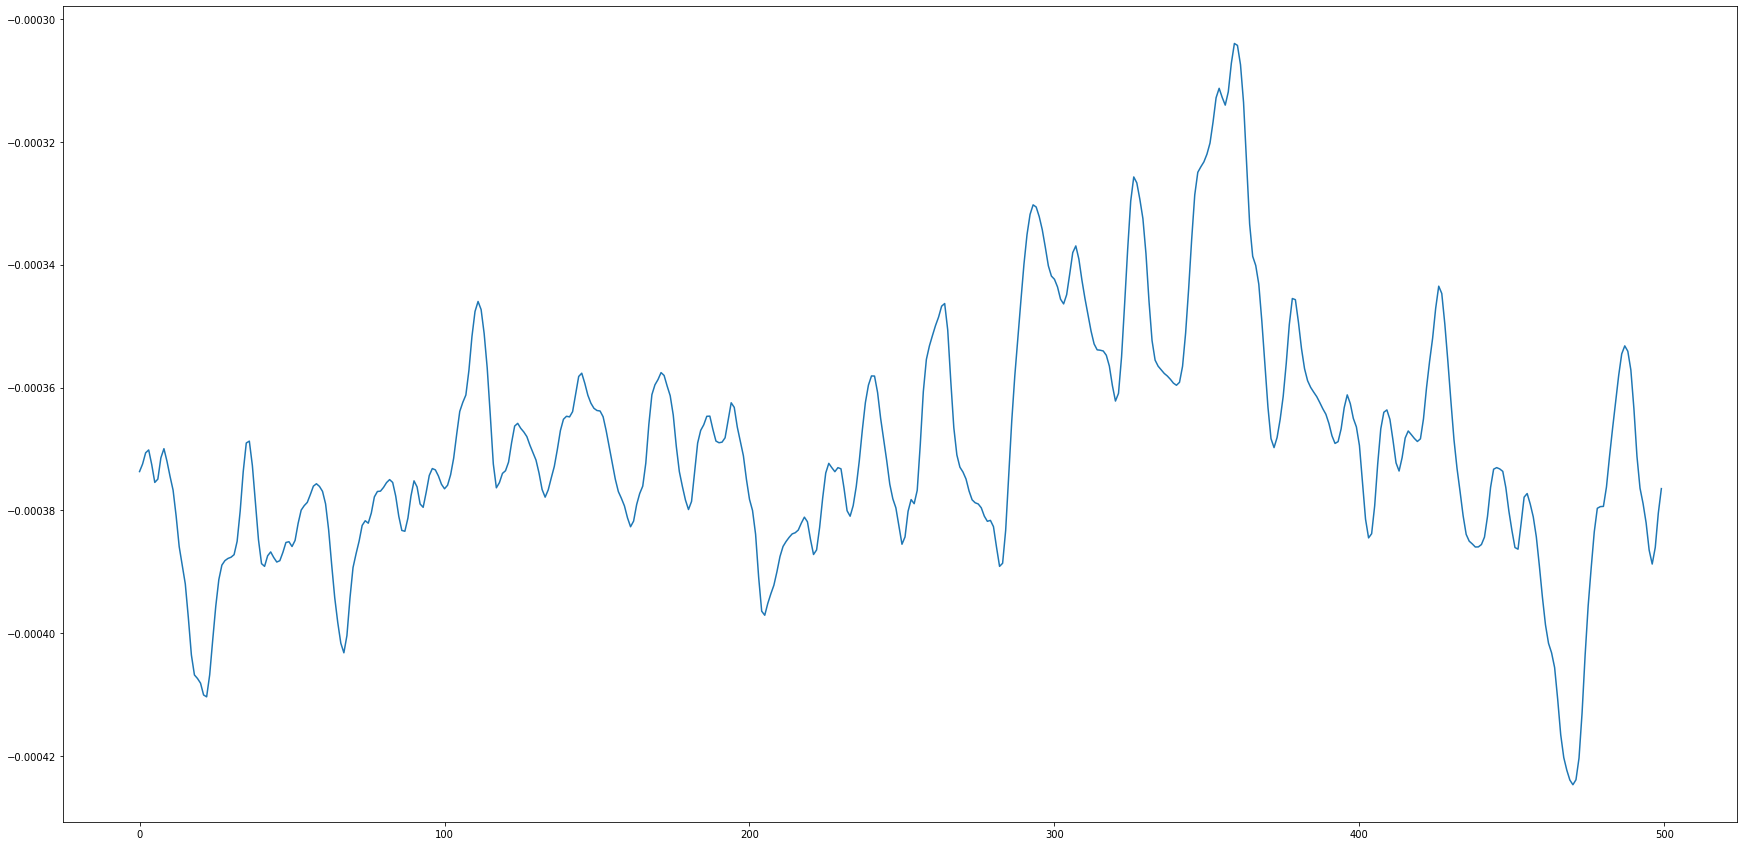

In [62]:
# Find noise
plt.plot(spec0[0][:500])

noise1 = spec

In [147]:
dmso2

0.021688668

In [157]:
## Determine intensity of noise limits in terms of percentage of dmso2 peak height

# First determine for normal training case
# Scale intensity value by the OvMax value that was used in data generation
IntensityOfMaxNoiseAt30 = 30/OvMax
IntensityOfMaxNoiseAt1 = 1/OvMax
# Then compute percentage of dmso2 peak height and print
print(100*IntensityOfMaxNoiseAt1/dmso2,100*IntensityOfMaxNoiseAt30/dmso2)


# Now determine for test case of double magnitude used in training
# Scale intensity value by the OvMax value that was used in data generation
IntensityOfMaxNoiseAt60 = 60/OvMax
IntensityOfMaxNoiseAt2 = 2/OvMax
# Then compute percentage of dmso2 peak height and print
print(100*IntensityOfMaxNoiseAt2/dmso2,100*IntensityOfMaxNoiseAt60/dmso2)

0.04912580431217709 1.473774129365313
0.09825160862435418 2.947548258730626


In [159]:
SNR_ave

[1,
 0.47109575285345856,
 0.30059355881839184,
 0.22202891296056046,
 0.17619871462890063,
 0.1460194112873996,
 0.12460781043801569]

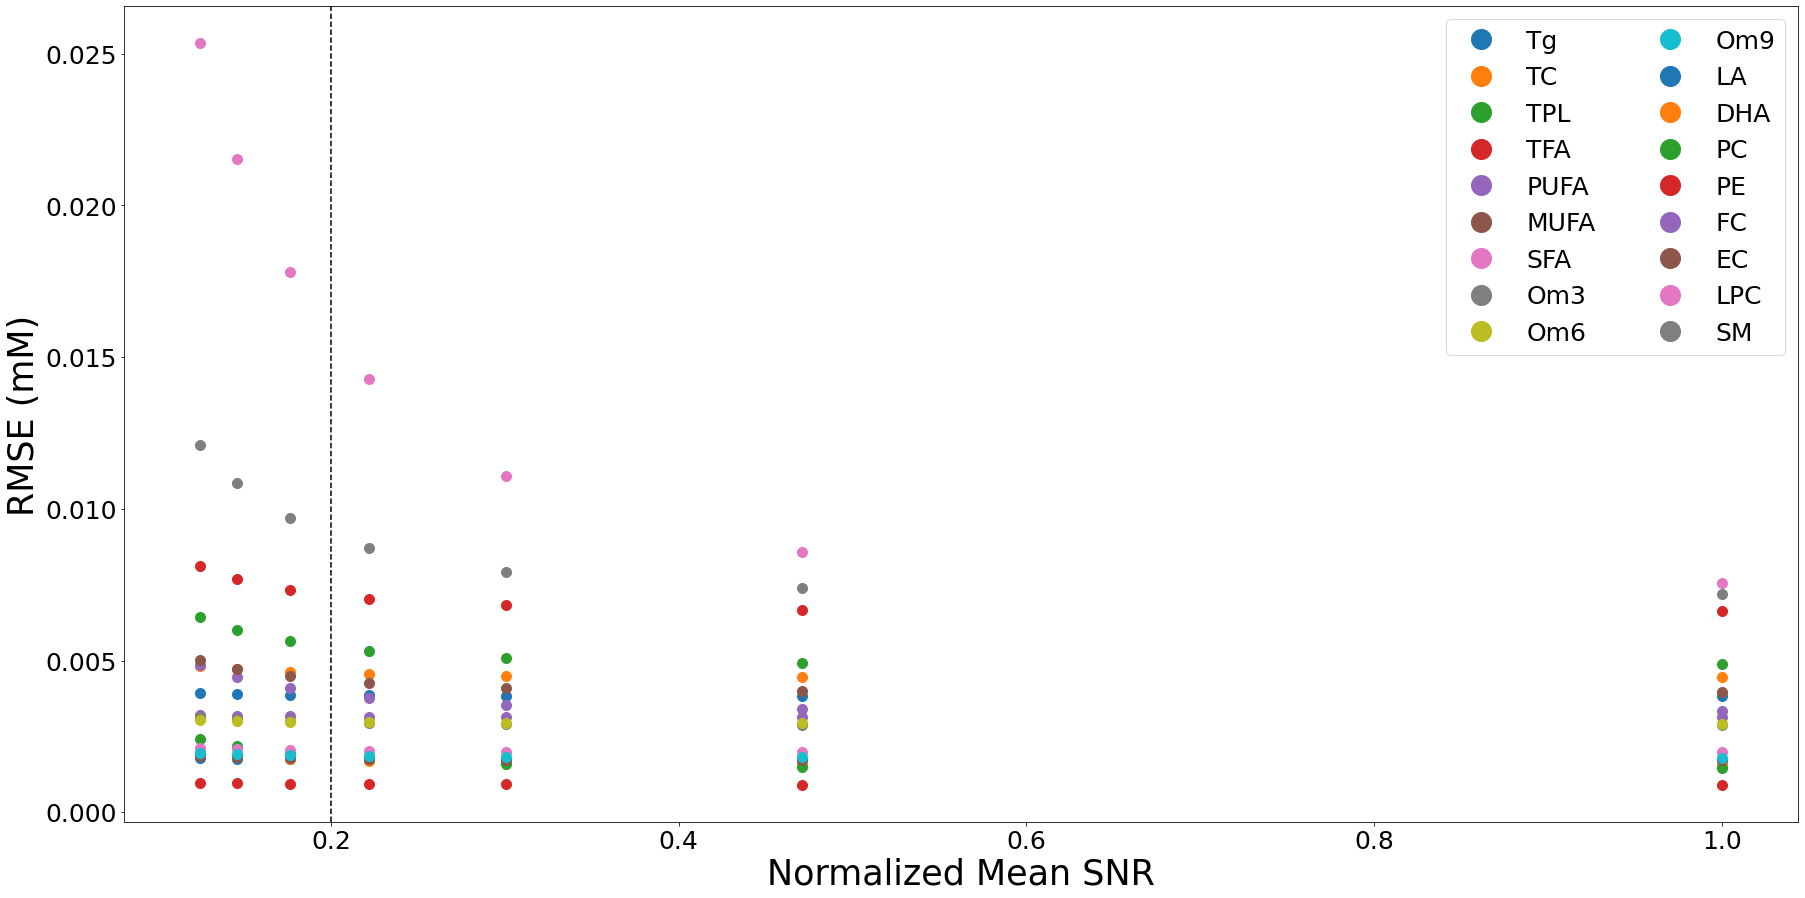

In [297]:
## Make list of SNRs for each spectra in a given dataset, then find the mean SNR of each dataset
SNR0 = []
for i in np.arange(5000):
    SNR0.append(spec0[i][6700:6900].max()/np.std(spec0[i][:500]))
 = np.array(SNR0).mean()

SNR1 = []
for i in np.arange(5000):
    SNR1.append(spec_n1[i][6700:6900].max()/np.std(spec_n1[i][:500]))
SNR1 = np.array(SNR1).mean()/SNR0

SNR2 = []
for i in np.arange(5000):
    SNR2.append(spec_n2[i][6700:6900].max()/np.std(spec_n2[i][:500]))
SNR2 = np.array(SNR2).mean()/SNR0

SNR3 = []
for i in np.arange(5000):
    SNR3.append(spec_n3[i][6700:6900].max()/np.std(spec_n3[i][:500]))
SNR3 = np.array(SNR3).mean()/SNR0

SNR4 = []
for i in np.arange(5000):
    SNR4.append(spec_n4[i][6700:6900].max()/np.std(spec_n4[i][:500]))
SNR4 = np.array(SNR4).mean()/SNR0

SNR5 = []
for i in np.arange(5000):
    SNR5.append(spec_n5[i][6700:6900].max()/np.std(spec_n5[i][:500]))
SNR5 = np.array(SNR5).mean()/SNR0

SNR6 = []
for i in np.arange(5000):
    SNR6.append(spec_n6[i][6700:6900].max()/np.std(spec_n6[i][:500]))
SNR6 = np.array(SNR6).mean()/SNR0

# Make lists for plotting results
SNR_ave = [1,SNR1,SNR2,SNR3,SNR4,SNR5,SNR6]
all_rmse = [rmse_n0,rmse_n1,rmse_n2,rmse_n3,rmse_n4,rmse_n5,rmse_n6]


# Set some labels and element sizes for the figure
plt.ylabel('RMSE (mM)', fontsize=35)
plt.xlabel('Normalized Mean SNR', fontsize=35)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABw0AAAOCCAYAAACF3k1vAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdeXhU9fn//9d7ZrISAkmAhCUBRBMQRVEEXEAUFXGpiiwqKFY/0qrtR6zWflRq/Vaq1hVbxR9WBRUVQQUFRQsohboCsggCESGSAAmQhCRkIbOc3x9ZCJI9MzmT5Pm4rrmYzHmf+7yGTmKv3NzvYyzLEgAAAAAAAAAAAIC2y2F3AAAAAAAAAAAAAAD2omkIAAAAAAAAAAAAtHE0DQEAAAAAAAAAAIA2jqYhAAAAAAAAAAAA0MbRNAQAAAAAAAAAAADaOJfdAdC8OnXqZPXq1cvuGECLsn37dklSSkqKzUkAAAAAAAAAAGi8devWHbQsq3N1x2gatjG9evXS2rVr7Y4BtCgjRoyQJK1cudLWHAAAAAAAAAAANIUx5ueajrE9KQAAAAAAAAAAANDG0TQEAAAAAAAAAAAA2jiahgAAAAAAAAAAAEAbxz0NAaAO7777rt0RAAAAAAAAAAAIKJqGAFCHTp062R0BAAAAAAAAAICAYntSAKjDnDlzNGfOHLtjAAAAAAAAAAAQMDQNAaAONA0BAAAAAAAAAK0dTUMAAAAAAAAAAACgjaNpCAAAAAAAAAAAALRxNA0BAAAAAAAAAACANo6mIQAAAAAAAAAAANDGuewOAADB7uOPP7Y7AgAAAAAAQKtjWZYKCgqUn5+voqIieb1euyMBQFBzOp2KjIxUdHS02rdvL2OMX+vTNASAOkRGRtodAQAAAAAAoFWxLEv79+9XYWGhYmNjlZCQIKfT6fdfgANAa2FZlrxerw4fPqyDBw+quLhYXbp08evPTZqGAFCHmTNnSpLuuOMOm5MAAAAAAAC0DgUFBSosLFTPnj3ldDrtjgMAQc8YI5fLpY4dO6p9+/b6+eefVVBQoOjoaL9dg3saAkAd5s+fr/nz59sdAwAAAAAAoNXIz89XbGwsDUMAaASn06nY2Fjl5+f7tS5NQwAAAAAAAABAsyoqKlJUVJTdMQCgxYqKilJRUZFfa9I0BAAAAAAAAAA0K6/Xy5QhADSB0+mU1+v1a02ahgAAAAAAAACAZmeMsTsCALRYgfgZStMQAAAAAAAAAAAAaONcdgcAgGC3cuVKuyMAAAAAAAAAABBQTBoCAAAAAAAAAAAAbRyThgBQh6eeekqSdO+999qcBAAAAAAAAE21LTNfc7/+WV/9lK3dOUVyey2FOI2SYiN1dp84TRraU30Tou2OCfjN1sPFem3PQX1x6LDSikvltiyFGKNeEaE6t2OUJnfvpH5REXbHRBCgaQgAdViyZIkkmoYAAAAAAAAt2e7sIk19Z71+2JevUo9PPuvoMbfX0k8HCpV2sFDvrstQ/24d9Oz405UUF2lfYKCJfi4+ojt/+FlbDher1GfJW+WY27L0Y9ER7Sw6oncyc3RKVKSePzlJPSPCbMsL+7E9KQAAAAAAAACgVVuyaa9GzViljel5KnEf2zCsymtJJW6fNuw+pFEzVmnJpr3NG7SejDGNfsyZM8fu+GgGH2blasS327Q+v0jFv2gYVuWVVOyz9F1+oUZ8u00fZuU2Z8wmKykp0axZs3TFFVcoKSlJERER6tChg/r166cpU6bo888/tzuiJGn16tWaMGGCevToobCwMHXp0kUXX3yx3n77bbujHYNJQwAAAAAAAABAq7Vk017du2CjSty+ep/jtSwVu726d8FGSdIVA7oFKl6jxMfHV/v64cOHVVhYWOuaiAi2oWztPszK1f9u262Smrrj1ahoHv7vtt2SpF/FxwQonf8sW7ZMt9xyizIyMipfi46O1pEjR7Rt2zZt27ZN//rXvzR69Gi98cYbiouLsyXn//3f/+nvf/975dcdO3bUoUOHtHz5ci1fvlwLFizQ/Pnz5XLZ37Jj0hAAAAAAAAAA0Crtzi7SHxdsalDDsKoSt09/XLBJ6TlFfk7WNJmZmdU+qt5ep6Y1EyZMsDE5Au3n4iO6q4ENw6pKfJbu2rZbPxcf8XMy/3rnnXd02WWXKSMjQ927d9fLL7+snJwc5eXlqaSkRFu3btXUqVPlcrm0dOlSDR06VPv372/2nLNmzapsGF533XVKT09Xbm6uCgoKNGfOHLVr104LFy7Ufffd1+zZqkPTEADqEBERwb/AAgAAAAAAaIGmvrNepZ7GNQwrlHp8mvrOBv8EAgLszh9+VmkjG4YVSn2WfvfDbj8l8r+tW7fqlltukcfj0amnnqr169fr1ltvVUzM0enIvn376tlnn9UHH3yg0NBQ7dixQzfccEOz5vR4PPrLX/4iSTrjjDP05ptvqkePHpKksLAwTZ48WU899ZQk6Z///Kd27tzZrPmqQ9MQAOqwdOlSLV261O4YAAAAAAAAaICt+/L1w758ea2mNVC8lqUte/O0LTPfT8mCy/fff68JEyYoISFB4eHhOuGEE/T73/9e+/fv18qVKyvvhYjg98PhYm05XFzj/Qvryyvp+8NF2nq42B+x/G7atGkqKipSWFiYFixYoM6dO9e49rLLLtO0adMkSStWrNBHH31UeSwtLa3y852Wlqaff/5Zt912m5KSkhQeHq4+ffpo2rRplVv+StLmzZs1adIkJSYmKjw8XCeddJKmT58ut9t93LXXrVunrKwsSdI999wjh+P4ltxtt92mjh07yuPxaO7cuY3+O/EXmoYAAAAAAAAAgFbnzW9+bvKUYQW3x6c3vw7eyavGWrhwoc4880zNnz9fWVlZCgkJ0b59+/T888/r9NNPV1pamt0R0QCv7znY5CnDCm6fpdf2HvRLLX/at2+fFi1aJEm6/vrrlZKSUuc5d999t9q3by9JeuGFF6pd89133+n000/Xyy+/rLy8PHk8Hu3cuVN/+9vfNHr0aLndbn300UcaMmSI3nzzTRUUFKi0tFQ7duzQn//8Z914443H1fz5558rn5988snVXtfpdCo5OVmS9O9//7vO9xJoNA0BoA6PPPKIHnnkEbtjAAAAAAAAoAG++ilbfuqfyGtJX+3M9k+xILFz505NmjRJbrdbZ5xxhtauXauCggIVFRVp2bJlCg0N1R/+8Ae7Y6IBvjh0uMlThhW8kr7IPeynav6zcuVK+Xxl/xjg2muvrdc5UVFRuuSSSyRJq1evlsfjOW7NrbfeqjPPPFNbtmxRXl6eCgoK9I9//ENOp1OrV6/WX//6V02cOFFXXnml0tLSdOjQIeXn5+vBBx+UVHaPxeXLl9eYweut+X+ZimObN2+u1/sJJJqGwC94souVu2iH9vzlS2X832rt+cuXyl20Q57s4BzFRuCtWLFCK1assDsGAAAAAAAAGmB3TpFf6/2cXVj3ohbk0UcfVVFRkbp06aJly5bpzDPPlCQZY3TRRRfp008/VVGRf/8OEVhpxaV+rfezn+v5w5YtWyqfDxw4sN7nnX766ZKkw4cPHzMBWKF79+766KOPKicCIyIi9Pvf/77yPojTp0/X4MGD9fbbb6tnz56SypqR06dP17BhwyRJ8+bNO6Zmr169Kp/X1BAsLS3Vjz/+KEnKy8s7ZitUO9A0BKoo3p6jrBnfqfDbfbKOlHX3rSNeFX67T1kzvlPx9hybEwIAAAAAAACoD7fXT2OGAapnJ8uy9N5770mSbr/9dsXGxh63JiUlRePHj2/uaGgCdxPv3/lLpX6u5w/Z2UcnfuPi4up9XqdOnaqtUeHuu+9WWFjYca+PGjWq8vn//d//VXt/z4o1mzZtOub1M844Q/Hx8ZKkv//979VOOP7zn/9Ufv7R+6VWfW4HmoZAOU92sXLmbpXl9km/3OrcJ1lun3LmbmXiEAAAAAAAAGgBQpzH/3I/mOrZaefOnTp06JAk6fzzz69x3YgRI5onEPwipJqGVlOE+rleMBs8eHC1r1c0/STprLPOqnVNbm7uMa+7XC499NBDkqStW7fqiiuu0HfffafS0lJlZmbqySef1P3336+QkJDKcxwOe9t2NA2BcgWr98jy1n5jZMvrU8HqPc2UCAAAAAAAAEBjJcVG+rVez7h2fq1npwMHDlQ+79atW43runfv3hxx4Ce9IkL9Wq+nn+v5Q9XpwuomBmty8ODBamtUaN++fbXnuVyueq9xu93HHbvjjjt07733SpI+/fRTnXnmmQoLC1PXrl113333qVevXrrvvvsq18fExNTj3QQOTUOgXNH6/cdPGP6Sr3wd2pS4uLgGjboDAAAAAADAfmf3iZO/hgOdRjr7hNb5+6HqtltEy3Ruxyg5/VTLKencmCg/VfOfinsOStJ3331X7/PWr18vqew+hBX3JGwuTz75pP773//q5ptvVv/+/ZWYmKjBgwdr+vTpWr9+vZzOsv/VevbsqdBQexu1rrqXAG1DxT0M61xXWr91aD0q9ncHAAAAAABAyzFxSE+9uy5DXnddkwJ1C3E5NHFokh9SBYfOnTtXPt+7d6+Sk5OrXbdnD7uutSQ3de+kdzJzVOxr+r0IQxxGk7t1qnthM7vgggvkcDjk8/n03nvv6corr6zznMOHD2vZsmWSpGHDhh0zPdhczj33XJ177rnVHlu7dq0k6ZxzzmnOSNVi0hAoZ8Lq928wTKi//q0GAAAAAAAAgEDp1zVaJ3eNlrOJk3ROY9S/Wwf1TYj2UzL7nXDCCerYsaMkaeXKlTWuq+0Ygs/JURHqHxXR5GlDp6RToyLVLyrCH7H8qmvXrrrqqqskSfPmzdP27dvrPOfZZ59VQUGBpLLtQoNJVlaWli9fLkm66aabbE5D0xCoFDmwS93fEY7ydWhT7r//ft1///12xwAAAAAAAEADzZgwUKGupv0aPNTl0IwJp/snUJAwxmjMmDGSpP/v//v/lJube9yaH3/8UfPnz2/uaGiiF07uqVBH0xrloQ6j508O3snaRx55RBERETpy5IjGjRt3zP0Kf2np0qWaPn26pLIpxcsvv7y5YtbJ6/Xqt7/9rUpLSzV48GCNGjXK7kitp2lojGlvjHnYGPO9MeawMSbPGLPGGHOPMaZJm8AaY+KNMU8bY7YbY4qNMTnGmNXGmP8xtWz4bIw5sfz6i40xPxtjjhhjCo0xqcaYV4wxZ9Zx3TnGGKseD7aZ9YP2w7rLOGv/ljBOh9oP4+a/bc1XX32lr776yu4YAAAAAAAAaKCkuEg9OW6AwkMa96vw8BCHnhw3QImxkX5OZr/7779fERERysrK0iWXXFJ5zzfLsvTZZ59p1KhRioxsfe+7tesZEabn+iYpvJGNw3CH0XN9k9QzIszPyfynf//+evnll+V0OvX9999r4MCBevXVV3Xo0KHKNampqfrDH/6gX/3qVyotLdUJJ5ygt956q9nv4blz5049+OCD+u6771RSUiJJ8vl8+uKLL3TJJZdo0aJF6tixo+bMmRMU9xdtFU1DY0xPSZsk/UXSKZKMpDBJgyQ9JelrY0xMI2ufKWmLpD9ISpbkkdRe0nmS/iVpaXVNSWPMuZJ+LL/+FZKSJB1R2X0kT5J0i6RvjTF/rUeMEklZtTyavkEx5IqLUOykfjIhjuO/MxySCXEodlI/ueKCbyQbAAAAAAAAQPWuGNBNT407TREhznpvVeo0RhEhTj017jRdMaBbgBPa48QTT9Trr78ul8ultWvX6owzzlB0dLSioqI0cuRIlZaW6plnnpEkhYUFbwMJx/tVfIz+0TdJEQ5T761KnZIiHEb/6JukX8U3qp3SrG644QYtWbJE3bp1U0ZGhm699VbFxMSoY8eOioiIUEpKip599ll5PB5dcskl+vrrr5WQkNDsOfPz8/Xoo4/qzDPPVEREhGJjYxUeHq7zzjtPn332mZKSkrRixQr169ev2bNVp8U3Dcun7BZL6iVpn6SLLctqJylS0nWSCiQNlDS3EbU7SFoiKU7SNklnWZbVXlI7Sb+T5JY0StKMak4PkeSVtEjSOEmdLMuKLs81WNJ/Vfb3/2djzK11RHnHsqyEWh7ehr43VC8iJVbxU89Qu8Fdy+5xaMruddhucFfFTz1DESmxdkcEAAAAAAAA0EBXDOimT6cO1+lJHRUe4pCzht6h05RNF56e1FH/vnt4q20YVhg7dqzWrl2rcePGqXPnzjpy5Iji4+N11113af369erQoYMkVd7/EC3Hr+JjtHJwX50R3U7htTQPnSqbLjwjup1WDu7bIhqGFS699FLt2LFDM2fO1GWXXabu3burpKREISEhSk5O1q233qrly5fr008/VefOnW3J2KtXLz300EMaPny4unXrpsLCQkVHR+vcc8/V008/ra1bt+qMM86wJVt1jGW17CG18obby+VfnmNZ1le/OH69pLfKv7zIsqwVDaj9iKRpkool9bcsa9cvjt8v6VGVNQdPtiwrtcqxHpIiLMv6sYbaoZLWSBog6SfLsk6sZs0cSZMlvWZZ1s31zV2bQYMGWWvXrvVHKaDNGDFihCRu/AwAAAAAAOAvW7dutW2yZltmvt78ere+2pmtn7ML5fZaCnEa9Yxrp7NPiNPEoUnqmxBtS7Zg8+CDD+rRRx/VhRdeqBUr6v2rdQSZrYeL9dreg/oi97B+Li5VqWUp1Bj1jAjVuTFRmtytk/pFscNeS9SYn6XGmHWWZQ2q7lhruBfe5PI/P/9lw7DcPEl/k9Rb0k2SGvKT7aaKGr9sGJb7p6QHJEVJmqiy7VElSZZlZdRW2LKsUmPMXElPSOpjjImxLOv4u80CsF2PHj3sjgAAAAAAAAA/6ZsQrUeuPsXuGEHvwIEDevnlsnmdSy+91OY0aIp+URF6PDnR7hhoAVr09qTGmEhJ55Z/ubS6NVbZKOUn5V9e0oDaKSq7D2FttQ9LWt3Q2lWUVHle362FATSzuXPnau7cBu9wDAAAAAAAAAS1f/zjH3r88ce1Y8cOeTweSdKRI0f08ccfa/jw4dq/f786d+6sW265xeakAJpDi24aSuqno+9hcy3rKo4lGGPqe1O6qv/UpD61T65n3apGlP+5T1J2LetGGmNSjTElxph8Y8z3xpgZxpiTGnFNAAAAAAAAAAC0c+dO3X///TrppJMUHh6uuLg4RUVF6fLLL9e2bdvUoUMHzZ8/X3FxcXZHBdAMWvr2pFXvQrunlnVVj3WTlBOA2tHGmKjy6cM6GWPOlnR1+ZcvW7XfXLKHyu6bmC8pWmUNzVMk3W6MmWpZ1ov1uSaAxpk6daokacaMGbbmAAAAAAAAAPxp8uTJcjqdWrVqlfbs2aPs7GxFRESod+/eGjVqlO666y51797d7pgAmklLbxq2r/K8qJZ1VY+1r3GVf2rX2TQ0xnSW9LbKpiR/VNl9DavznaQ1kpZIyrAsy1u+Jeul5ef0kTTTGLPfsqz3arneFElTJCkpKammZQBqsGHDBrsjAAAAAAAAAH43cOBADRw40O4YAIJES9+etMUxxkRJ+lBST0kFksbVNJ1oWdY/LMt6wbKsny3L8pa/VmRZ1vuShkjaVb70aWOMqemalmW9ZFnWIMuyBnXu3Nmv7wcAAAAAAAAAAAAtX0tvGhZUeR5Zy7qqxwpqXBXg2saYdpI+kjRUZROJl1mWtbGeeY5hWVa2pEfLv+wpiX8OAgAAAAAAAAAAgEZp6U3DvVWe17axctVje2tc1bTa+bXdz7BKw3C4pEJJl1uW9d96ZqnJV1Wen9DEWgAAAAAAAAAAAGijWnrTcKskX/nzU2pZV3Es07KsnHrW3lzN+bXV/qGmBVUahuer7B6Il1uWtaqeOQDYLDk5WcnJyXbHAAAAAAAAAAAgYFx2B2gKy7KKjDFfSBom6VJJT/5yTfm9/kaVf/nvBpRPlbRbUlJ57QXV1G5Xfu0aa5ev+VjHThj+pwE5ajO0yvNdNa4C0CQvvfSS3REAAAAAAAAAAAiolj5pKEmvlf95gTFmSDXHx+no1p2v17eoZVlWlfXXGWN6VbPsTklRkryS3vzlwWoahpfVt2FY3uys7XispAfKv0yXtL4+dQEAAAAAAAAAAIBfai1Nw+8lGUnvGWNGSpIxxmGMGSfpX+XrllqWtaLqicaYh40xVvmjVzW1n5KUKSlS0kfGmDPLzws1xtwu6ZHydS9ZlpX6i9qRkpaorGF4WNLoBm5JOskY874x5lpjTJcqdSOMMVer7H6GFc3QP1qW5auuCICmmzJliqZMmWJ3DAAAAAAAAAAAAqZFb08qSZZleYwxv5L0uaRekpYbY4pU1hANL1+2XtLERtTOM8ZcIelTSSdLWmuMKSivG1K+7N+S7q7m9LGSRpQ/d0laUMfw4BjLsr6s8rVT0jXlDxljCiWVSOpYfkySjkj6g2VZ7zTojQFokNTU1LoXAQAAAAAAAADQgrX4pqEkWZaVZowZIOleSWMk9ZbklrRF0tuS/mlZVmkja68zxvSX9CdJV0hKVNlWo5tVNuX4ag1TflWnOMN1tIFZk9BffP25pAclnS2pn6Q4SR0k5UvaIekzSbMsy+JehgAAAAAAAAAAAGiSVtE0lCTLsgok/aX8Ud9zHpb0cD3WZUn6Q/mjvrXnSJpT3/XVnP+zpEcbez4AAAAAAAAAAABQX63hnoYAAAAAAAAAAAAAmqDVTBoCQKCcfvrpdkcAAAAAAACAv2Rtkda8IqWtlnLTJG+p5AyVYnpJvYZJZ90qxfe3OyXgN9sy8zX365/11U/Z2p1TJLfXUojTKCk2Umf3idOkoT3VNyHa7pgIAjQNAaAOM2bMsDsCAAAAAAAAmipnl/T+FCnre8lTKlneo8e8pdLBVCn7J2njW1LCAOmaWVJsb/vy1sIY0+hzZ8+erZtvvrny6yNHjujNN9/U0qVLtW7dOh04cEClpaWKjY3VySefrAsuuEATJ05U797B+XeBmu3OLtLUd9brh335KvX45LOOHnN7Lf10oFBpBwv17roM9e/WQc+OP11JcZH2Ba6nhx9+WP/v//0/SZJlWXWsrtmLL76oO+64Q5J0zjnn6IsvvvBLvpaMpiEAAAAAAAAAoHXbvFD64Pbjm4W/ZHkld7GUsVZ68WzpqhelU65pvpz1FB8fX+3rhw8fVmFhYa1rIiIiKp8vWbJEv/nNb7R3797K18LCwhQZGamsrCxlZmbqs88+08MPP6wpU6Zo5syZfnwXCKQlm/bqjws2qdTjk7eWxprXkrxunzbsPqRRM1bpyXEDdMWAbs2Y1D6vvPJK5fMvv/xS27dvV0pKio2J7Mc9DQGgDpMmTdKkSZPsjgEAAAAAAIDG2LxQWnR7WTOwtoZhVRXNw0W3l50fZDIzM6t93HvvvXWumTBhgiRp1qxZuuqqq7R3714lJibqhRde0O7du1VSUqLc3FwdOXJEq1at0p133imXy6W33nrLrreLBlqyaa/uXbBRxW5vrQ3DqryWpWK3V/cu2Kglm/bWfUILt3HjRq1bt04xMTGaOHGipGObiG0VTUMAqENGRoYyMjLsjgEAAAAAAICGytlVPmFY3LjzPcVl5+em+TWW3b744gv97ne/k8/n0/Dhw/X999/rjjvuUGJiYuWakJAQDRs2TM8//7xSU1N13nnn2ZgY9bU7u0h/XLBJJW5fo84vcfv0xwWblJ5T5OdkwaWiQThhwgTddtttkqTXX39dHo/Hzli2o2kIAAAAAAAAAGid3p9StiVpU3hKy+q0Ivfcc488Ho+6dOmi9957Tx06dKh1fVJSkj788MNmSoemmPrOepV6GtcwrFDq8WnqOxv8EygIVdzHU5ImT56s4cOHq1evXsrKytJHH31kczp70TQEAAAAAAAAALQ+mZulrO/rvyVpTSyvtG+TlLXFP7lstmbNGn3zzTeSpN///vfq1KlTvc5zOGgnBLut+/L1w778em9JWhOvZWnL3jxty8z3U7LgsnDhQuXk5Cg5OVlDhw6VMUY33XSTJLYo5bscAAAAAAAAAND6rH216VOGFbylZfVagRUrVlQ+v+aaa2xMAn9785ufmzxlWMHt8enNr3f7pVawqWgM3njjjZWvVTQNly5dqszMTFtyBQOahgBQh7PPPltnn3223TEAAAAAAADQEGmrmz5lWMHySrtW+6eWzbZsKZuYDAsLU79+/WxOA3/66qds+Zo2ZFjJa0lf7cz2T7EgkpaWphUrVsgYc0zTsE+fPjr33HPl8Xj02muv2ZjQXjQNAaAOjz32mB577DG7YwAAAAAAAKAhctP8XG+Xf+vZJDu7rBHUsWNHthxtZXbnFPm13s/ZhX6tFwxmz54ty7J0/vnnq2fPnsccmzx5siTp1Vdbx1RxY/ATAQAAAAAAAADQ+nj9tDVpoOoBfub2+mnMMED17Obz+TRnzhxJR7cjrWr8+PEKDw9XamqqVq9uHZPFDUXTEADqcO211+raa6+1OwYAAAAAAAAawhka3PVsEhcXJ0k6dOiQfD7/3P8OwSHEaYK6nt2WL1+u3bt3KzIyUmPHjj3ueIcOHXT11VdLarvThjQNAaAO2dnZlds2AAAAAAAAoIWI6eXner39W88m/fv3lyQdOXJEW7dutTkN/CkpNtKv9XrGtfNrPbu98sorkqSioiJFR0fLGHPcY968eZKkBQsWqKCgwM64tqBpCAAAAAAAAABofXoNk4zTP7WMU+o9zD+1bDZy5MjK5wsXLrQxCfzt7D5x8tdwoNNIZ58Q559iQSA7O1uLFi2q9/rCwsLKBmJbQtMQAAAAAAAAAND6DLpFcvlpS1FnaFm9VuCss87S4MGDJUnPP/+8Dh48WK/z2Mo0+E0c0lMhLv+0fUJcDk0cmuSXWsFg7ty5Ki0tVZcuXZSXl6eCgoIaH3fddZektrlFKU1DAAAAAAAAAEDrk3CKFH9q06cNjVPqOkCK7++fXEHgqaeektPpVFZWlq699lrl5eXVuj4jI6PyXm8IXv26RuvkrtFymqaNGzqNUf9uHdQ3IdpPyexXsTXpmDFjFB0draioqBof1113nSTp66+/1g8//GBn7GZH0xAA6jBy5Mhjtm0AAAAAAABACzHmpaZPG7pCy+q0IsOGDdNzzz0nY4xWrVqlAQMGaObMmcrIyKhc43a79eWXX2rq1KlKTk7WqlWrbEyM+poxYaBCmzhtGOpyaMaE0/0TKMAOHjxY6+PQoUNas2aNvv/+e0nS+PHj66w5ZMgQJSWVTVlWNBvbCpfdAQAg2P35z3+2OwIAAAAAAAAaI7a3dNWL0qLbJU9xw893RZSdH9PL79Hsduedd6pHjx66/fbbtXv3bt1555268847FR4eroiICB06dEiWZUmSXC6XfvOb39icGPWRFBepJ8cN0L0LNqrE3fAtZcNDHHpy3AAlxkYGIJ3/de7cudbjp512moYOHSpJio+P1/Dhw+usaYzR2LFj9cwzz2ju3Ll6/PHHFRIS4pe8wY5JQwAAAAAAAABA63XKNdLVL0ohEfXfqtQ4y9Zf/WLZ+a3UVVddpZ07d+pf//qXxowZo169esnpdKqwsFBdunTRyJEj9be//U07d+7Us88+a3dc1NMVA7rpqXGnKSLEWe+tSp3GKCLEqafGnaYrBnQLcMLmU1xcrLfffltS2dakTmf9fgZUTCTu379fixcvDli+YGMq/qUA2oZBgwZZa9eutTsG0KKMHj1akrR06VKbkwAAAAAAALQOW7duVb9+/Zr3ojm7pIW/kfZtkrylkuU9fo1xSs7QsnsYjnmpVU4You3YnV2ku+dv0Ja9eXJ7fPJW0w5yGinE5VD/bh00Y8LpLWbCEGUa87PUGLPOsqxB1R1je1IAqENxcSO2rgAAAAAAAEBwie0t3fpvKWuLtPZVaddqKXdXWQPRGSrF9JZ6D5MG3SLF97c7LdBkSXGReu/2c7QtM19vfr1bX+3M1s/ZhXJ7LYU4jXrGtdPZJ8Rp4tAk9U2ItjsuggBNQwAAAAAAAABA2xHfX7r8abtTAM2mb0K0Hrn6FLtjoAXgnoYAAAAAAAAAAABAG0fTEAAAAAAAAAAAAGjj2J4UAOpwxRVX2B0BAAAAAAAAAICAomkIAHW499577Y4AAAAAAAAAAEBAsT0pAAAAAAAAAAAA0MbRNASAOowYMUIjRoywOwYAAAAAAAAAAAFD0xAAAAAAAAAAAABo42gaAgAAAAAAAAAAAG0cTUMAAAAAAAAAAACgjaNpCAAAAAAAAAAAALRxLrsDAECwGz9+vN0RAAAAAAAAAAAIKJqGAFCHO+64w+4IAAAAAAAAAAAEFNuTAkAdioqKVFRUZHcMAAAAAAAAAAAChklDAKjDZZddJklauXKlvUEAAAAAAAAAAAgQmoYAAAAAAAAAgDYjNTdV87fP17eZ3yqjIENun1shjhD1aN9DgxMGa3zKeCXHJNsdE/CfrC3SmlektNVSbprkLZWcoVJML6nXMOmsW6X4/nanRBCgaQgAAAAAAAAAaPXSC9J1/+r7tT1nu0q9pfLJV3nM7XNrV94u7c7frQ92fKC+sX316LBHldg+0cbEQBPl7JLenyJlfS95SiXLe/SYt1Q6mCpl/yRtfEtKGCBdM0uK7W1fXtiOexoCAAAAAAAAAFq1T3d9qjEfjNH3B79XibfkmIZhVV7LqxJviTYd3KQxH4zRp7s+beak9WOMafRjzpw5kqS0tLRqjzudTsXGxurss8/WX//6Vx08eLDWDA8//HDzvXHU3+aF0otnS3vWSe7iYxuGVVnesuMZa8vWb17YvDkb4eGHHz7uc+twOBQdHa0ePXronHPO0Z133ql3331XpaWlNdap+j1Q8X1RmxEjRsgYoxEjRtQr55AhQyrr/+tf/6rnu7MXk4YAAAAAAAAAgFbr012fatoX01TiLan3OT7LpxJviaZ9MU2SNKr3qEDFa5T4+PhqXz98+LAKCwtrXRMREXHca9HR0ZWvl5aWKjc3V19//bW+/vprvfDCC/roo480aNAgP6VHwG1eKC26XfIU1/+ciubhotvLvj7lmsBk87Oqn/Pi4mLt3btXe/bs0VdffaWZM2cqLi5O06dP129/+9tmzbV582Z9++23lV+/+uqruu2225o1Q2MwaQgAdbj55pt188032x0DAAAAAAAADZRekN7ghmFVFY3DjIIMPydrmszMzGof9957b51rJkyYcFy95557rvJ4Tk6OcnJyNH36dIWEhGj//v0aM2aMSkoa93eIZpazS/qggQ3DqjzFZefnpvk1VqBU/Wzn5eXJ7XZr06ZNevrpp9W7d29lZ2fr9ttv18SJE2VZVrPleuWVVySV/W65ffv2+vrrr/XDDz802/Ubi6YhANSBpiEAAAAAAEDLdP/q+1Xqq3l7wvoo9ZXq/tX3+ylRyxATE6MHH3xQf/rTnyRJ6enp+uCDD2xOhXp5f0rZ/QubwlNaVqcFcjqdOvXUU/WHP/xBmzdv1nXXXSdJeuutt/T44483S4bS0lLNnTtXkvTb3/5W1157raSjjcRgRtMQAOpw8ODBGvduBwAAAAAAQHDanrNd23O2y2dVf//C+vJZPm3L2abU3FQ/JWs5brzxxsrna9assTEJ6iVzs5T1fc33L6wvyyvt2yRlbfFPLptERkbqtdde08CBAyVJjz/+uHJycgJ+3Q8++EAHDx5USkqKhgwZosmTJ0uS5s6dK7fbHfDrNwVNQwCow9ixYzV27Fi7YwAAAAAAAKABFqQuUKm3iRNX5dw+t+Zvn++XWi1Jjx49Kp/n5+fbmAT1svbVpk8ZVvCWltVr4UJDQ/XAAw9IKvsML1q0KODXrJgovOmmmyRJ559/vnr27Kn9+/dr8eLFAb9+U9A0BAAAAAAAAAC0Ot9mfiufmjZlWMFrebUms+1N2qWlpVU+j42NtS8I6idtddOnDCtYXmnXav/Ustmll14qp9MpSfrPf/4T0Gulp6dr2bJlMsZo0qRJkiRjTGUDMdi3KKVpCAAAAAAAAABodTIKMvxaL70g3a/1WoKZM2dWPh86dKiNSVAvuWl+rrfLv/VsEhUVpRNOOEGS9NNPP1W75q677lJCQkKtjy+//LLOa82ePVs+n08XXHCBkpKSKl+vaBp++umn2rt3rx/eVWC47A4AAAAAAAAAAIC/uX3+vXeYv+sFq9LSUv3000968cUX9eKLL0qSTjrpJF1xxRU2J0Od/LQdb8Dq2ahiUramexrm5+c3eQtey7I0e/ZsSUebhBVOPPFEnXPOOfryyy81Z86cyi1Tgw2ThgAAAAAAAACAVifEERLU9YLJr3/9axljZIxRWFiYTj75ZP3zn/+Uz+dT79699eGHH8rlYgYp6DlDg7teEJs9e7Ysy6r1cf7559da47PPPlNaWpratWuna6+99rjjkydPrrxWsOK7HADqcPvtt9sdAQAAAAAAAA3Uo30P7crz3/aKie0T/VYr2ERHRysiIkKS5HQ6FR0dreTkZF166aW66aab1K5dO5sTol5iekkHU/1Yr7f/atmsYsIwLi4uYNeouF/hNddco6ioqOOOjx8/XnfddZd27Nih//znP3U2Ie1A0xAA6jBhwgS7IwAAAAAAAKCBBicM1u783fJa3ibXchqnzko4yw+pgtNzzz2nm2++2e4YaKpew6TsnyQ/fOZlnFLvYU2vEwQOHz6snTt3SpL69OkTkGvk5uZq4cKFkqS5c+dq7ty5ta5/5ZVXgrJpyPakAFCH9PR0pae3vRtdAwAAAAAAtGTjksf5bUvREEeIxqeM90stIGAG3SK5/LSlqDO0rF4r8Mknn8jrLWukjhgxIiDXePPNN1VSUlLv9e+++26T76EYCDQNAaAON954o2688Ua7YwAAAAAAAKABUmJTlBKbIodp2q/BHcahvrF9lRyT7KdkQIAknCLFn1o2JdgUxil1HSDF9/dPLhuVlpbq0UcflSR16NBBV199dUCuU7E16V133aWCgoIaH3l5eercubOKi4v19ttvByRLU9A0BAAAAAAAAAC0So8Ne0yhjqZNXoU6QvXYsMf8lAgIsDEvNX3a0BVaVqeFKy4u1s0336z169dLku6//3517NjR79f57rvvtGHDBknS9ddfr6ioqBof0dHRGjNmjKSjjcZgQtMQAAAAAAAAANAqJbZP1PRzpyvcGd6o88Od4Zp+7nT1aN/Dz8laj6KiIh08eLDWR2lpqd0x247Y3tJVL0quiMad74ooOz+ml19jNRefz6fNmzfrmWeeUf/+/Sun+W688Ubdd999AblmRfOvZ8+eGjJkSJ3rx48v2+p4zZo12rx5c0AyNZbL7gAAAAAAAAAAAATKqN6jJEnTvpimUl+pfJavznMcxqFQR6imnzu98nxU78knn9STTz5Z65qFCxcGbFtIVOOUa8r+/OB2yVMqWd66zzHOsgnDq148en4LkJCQUPn8yJEjys/Pl8939Hu8U6dOmj59un7zm98E5PolJSV66623JEljx46t1znnn3++unTpov379+uVV17Rs88+G5BsjcGkIQAAAAAAAACgVRvVe5Tev+p9Deg0QOHOcDlruOeb0zgV7gzXgE4DtPCqhTQM0XKdco10+1dSj0Fl04M13efQOMuO9xgk3fF1i2oYSlJWVpaysrK0f/9+eTweJSQkaOjQobr99tv17rvvas+ePQFrGErSe++9p0OHDkk6OkFYF6fTWblF6dy5c4NqEtdYlmV3BjSjQYMGWWvXrrU7BtCiLF68WJJ05ZVX2pwEAAAAAACgddi6dav69etny7VTc1M1f/t8rclco/SCdLl9boU4QpTYPlFnJZyl8SnjlRyTbEs2ICCytkhrX5V2rZZyd0neUskZKsX0lnoPkwbdIsX3tzslGqExP0uNMessyxpU3TG2JwWAOtAsBAAAAAAAaD2SY5I1beg0u2MAzSe+v3T503anQAvA9qQAUIft27dr+/btdscAAAAAAAAAACBgmDQEgDpU7Hm9cuVKe4MAAAAAAAAAABAgTBoCAAAAAAAAAAAAbRxNQwAAAAAAAAAAAKCNo2kIAAAAAAAAAAAAtHE0DQEAAAAAAAAAAIA2zmV3AAAIdtOmTbM7AgAAAAAAAAAAAUXTEADqcNFFF9kdAQAAAAAAAACAgGJ7UgCow4YNG7Rhwwa7YwAAAAAAAAAAEDBMGgJAHaZOnSpJWrlypa05AAAAAAAAAAAIFCYNAQAAAAAAAAAAgDaOpiEAAAAAAAAAAADQxtE0BAAAAAAAAAAAANo4moYAAAAAAAAAAABAG+eyOwAABLtHH33U7ggAAAAAAAAAAAQUTUMAqMM555xjdwQAAAAAAAD4Scn2VOXOe1tF33wrd3q6LLdbJiREIYmJihwyWDHXXa/wlGS7YwJ+k5qbqvnb5+vbzG+VUZAht8+tEEeIerTvocEJgzU+ZbySY/jMg+1JAaBOX375pb788ku7YwAAAAAAAKAJStPTlXb99UqbMEGH3pmv0p07ZbndkiTL7Vbpzp06NH+B0iZMUNr1N6g0Pd3mxDUzxjT6MWfOHElSWlpag8/5pRdffLFyzbnnntt8fwGol/SCdE36eJImfjRRC7Yv0K68XXL7yj7zbp9bu/J26d3UdzXxo4m68eMblV4QvJ/5qh5++OFqP6fh4eHq0aOHfvWrX2n+/PmyLKvWOkuXLtWUKVPUv39/xcbGKiQkRHFxcRo8eLCmTp2qb775ppneUfBg0hAA6vDAAw9IklauXGlvEAAAAAAAADRK3tKl2nf/A7JKSyWfr+aFXq8sr1fFGzdq55W/UtfHHlWH0aObL2g9xcfHV/v64cOHVVhYWOuaiIiI416Ljo6u9vXazpGkV155pfL5l19+qe3btyslJaXGOmg+n+76VNO+mKZSX6l8Vs2fea/lldfr1aaDmzTmgzGafu50jeo9qhmTNk3Vz3leXp727NmjPXv2aPHixZozZ44WLlyosLCwY85JTU3VxIkTtXbt2srXnE6nOnTooLy8PK1Zs0Zr1qzRc889pwsuuEDz589Xp06dmu092YlJQwAAAAAAAABAq1XZMCwpqb1hWJXPJ6ukRPvuf0B5S5cGNmAjZGZmVvu4995761wzYcKE4+o999xzNa6v6ZyNGzdq3bp1iomJ0cSJEyUd20SEfSoahiXeklobhlX5LJ9KvCWa9sU0fbrr0wAn9J+qn9PCwkJt3rxZF198saSyScJp06Yds37NmjUaMmSI1q5dq3bt2un+++/Xxo0b5Xa7lZ2drdLSUm3ZskV/+9vfFB8fr88//1wZGRl2vDVb0DQEAAAAAAAAALRKpenpRxuGjVDROCxtQ02D+qpoEE6YMEG33XabJOn111+Xx+OxM1abl16QXtkwbIyKxmFGQcv7zDscDvXv318ffvihTjzxREnSrFmzKj+T2dnZGjNmjA4dOqRu3brpm2++0aOPPqoBAwbIGFNZ4+STT9YDDzygnTt3asqUKZXH2gKahgAAAAAAAACAVmnvffeVbUnaBFZpqfb+8T4/JWodjhw5ojfffFOSNHnyZA0fPly9evVSVlaWPvroI5vTtW33r75fpb6mfeZLfaW6f/X9fkrU/MLDwzVu3DhJUkFBgbZt2yZJeuKJJyqnBt9++23179+/1jqRkZGaNWuWTj311MAGDiI0DQEAAAAAAAAArU7J9u0q2bqt/luS1sTnU8nWrSrZnuqfYK3AwoULlZOTo+TkZA0dOlTGGN10002S2KLUTttztmt7zvZ6b0laE5/l07acbUrNbbmf+R49elQ+z8/Pl8fj0axZsyRJI0eO1PDhw+tdy+FoO620tvNOAaCRZsyYoRkzZtgdAwAAAAAAAA2QO29ek6cMK1hut3LfmeeXWq1BRWPwxhtvrHytomm4dOlSZWZm2pKrrVuQukClXv985t0+t+Zvn++XWnZIS0urfB4bG6u1a9cqLy9PknTNNdfYlCr40TQEgDqcfvrpOv300+2OAQAAAAAAgAYo+ubbpk8ZVvB6y+q1UnfddZcSEhKqfTz00EPHrE1LS9OKFStkjDmmadinTx+de+658ng8eu2115r7LUDSt5nfyif/fOa9lldrMtf4pVZzy8/Pr9w+NzY2VsnJydqyZUvl8YEDB9oVLejRNASAOixfvlzLly+3OwYAAAAAAAAawJ2e7t96u3f7tV4wyc/PV1ZWVrWP/Pz8Y9bOnj1blmXp/PPPV8+ePY85NnnyZEnSq6++2mzZcVRGQYZf66UX+Pd7KNAOHTqkFStW6MILL9TevXsllTXEHQ6HsrOzK9fFxsbaFTHouewOAADBbvr06ZKkiy66yOYkAAAAAAAAqC/L7Q7qesFk9uzZuvnmm+tc5/P5NGfOHElHtyOtavz48frf//1fpaamavXq1Ro2bJifk6I2bp9/P6P+rhcIxpgaj02aNEkPPvhgM6Zp+Zg0BAAAAAAAAAC0OiYkJKjrtUTLly/X7t27FRkZqbFjxx53vEOHDrr66qslMW1ohxCHfz+j/q4XCPHx8ZWPpKQknXHGGbr11lv12Wef6Y033pDT6ZQkxcXFVZ6Tk5NjV9ygx6QhAAAAAAAAAKDVCUlMVOnOnf6rl5Tkt1ot1SuvvCJJKioqUnR0dK1rFyxYoH/84x9q3759c0SDpB7te2hX3i6/1Utsn+i3WoGSmZlZr3X9+/evfL5+/Xqdc845gYrUojFpCAAAAAAAAABodSKHDJbKp4yazOksq9eGZWdna9GiRfVeX1hYqHnz5gUuEI4zOGGwnMY/n3mnceqshLP8UisYDBo0SB06dJAkLVy40OY0wYumIQAAAAAAAACg1Ym57jq/bSlqQkIUM+E6v9RqqebOnavS0lJ16dJFeXl5KigoqPFx1113SWKL0uY2Lnmc37YUDXGEaHzKeL/UCgYul0tTpkyRJK1YsUKrVq2q97k+ny9QsYIOTUOgBfBkFyt30Q7t+cuXyvi/1drzly+Vu2iHPNnFdkdrE2bNmqVZs2bZHQMAAAAAAAANEJ6SovB+fSVHE38N7nAovF8/hack+ydYC1WxNemYMWMUHR2tqKioGh/XXVfWYP3666/1ww8/2Bm7TUmJTVFKbIocpmmfeYdxqG9sXyXHtK7P/H333adu3bpJkq6//npt2bKl1vXFxcW644479P333zdHvKBA0xAIcsXbc5Q14zsVfrtP1hGvJMk64lXht/uUNeM7FW/npq2BlpKSopSUFLtjAAAAAAAAoIG6PfGETGhok2qY0FB1e/IJPyVqmdasWVPZOBk/vu7psyFDhiip/B6QFc1GNI/Hhj2mUEfTPvOhjlA9NuwxPyUKHp06ddJ7772n6Oho7d27V0OGDNEDDzygzZs3y7IsSZJlWdq2bZueeOIJ9enTRy+++GLlsbaApiEQxDzZxcqZu1WW2yf9cgLaJ1lun3LmbmXiMMAWL16sxYsX2x0DAAAAAAAADRSamKiujz0qEx7eqPNNeLi6PvaoQnv08HOylqWi8RcfH6/hw4fXud4Yo7Fjx0oq29bU7XYHNB+OSmyfqOnnTle4s3Gf+XBnuKafO1092rfOz/zQoUP19ddf64wzzlBhYaEee+wxnXrqqQoNDVVcXJxCQ0PVr18//elPf9K+ffs0atQoJSYm2h272dA0BIJYweo9sry175dseX0qWL2nmRK1TU8//bSefvppu2MAAAAAAACgETqMHn20cVjfrUodjsqGYYfRowMbMMgVFxfr7bffllS2NanT6azXeRUTifv37+cf5DezUb1HVTYO67tVqcM4KhuGo3qPCnBCe/Xr10/r1q3TkiVLdOutt6pv376KiopSfn6+oqOjddZZZ+nuu+/WunXr9MknnyguLs7uyM3GtKWxSkiDBg2y1q5da3cM1NOev3xZuSVpbUyYU93/3znNkKhtGjFihCRp5cqVtuYAAAAAAABoLbZu3ap+/fo16zVL09O1974/qWTrVllut+St5vduTqdMSIjC+/VTtyefaPMThmjZ0gvS9cDqB7QtZ5vcPre81vGfeadxKsQRor6xffXYsMda7YRha9WYn6XGmHWWZQ2q7pjLL6kABER9GoaSZJXWbx0AAAAAAADQVoUmJqrX22+pZHuqct+Zp6JvvpV7925ZbrdMSIhCkpIUOWSwYiZcp/CUZLvjAk2W2D5Rb1z2hlJzUzV/+3ytyVyj9IJ0uX1uhThClNg+UWclnKXxKeOVHMNnHjQNgaBmwpz1mzQMrd+WAAAAAAAAAEBbF56SrK4PPWR3DKDZJMcka9rQaXbHQAvAPQ2BIBY5sEvd36WO8nUAAAAAAAAAAACNxKQhEMTaD+uuonVZsny+GtcYp0Pth3VvxlRtzxtvvGF3BAAAAAAAAAAAAopJQyCIueIiFDupn0yI4/jvVodkQhyKndRPrrgIW/K1FYmJiUpMTLQ7BgAAAAAAAAAAAcOkIRDkIlJiFT/1DBWs3qOi9ftllXplQp2KHNhF7Yd1p2HYDN555x1J0oQJE2xOAgAAAAAAAABAYNA0BFoAV1yEYq4+UTFXn2h3lDbpxRdflETTEAAAAAAAAADQerE9KQAAAAAAAAAAANDG0TQEAAAAAAAAAAAA2jiahgAAAAAAAAAAAEAbR9MQAAAAAAAAAAAAaONcdgcAgGD37rvv2h0BAAAAAAAAAICAomkIAHXo1KmT3REAAAAAAAAAAAgoticFgDrMmTNHc+bMsTsGAAAAAAAAAAABQ9MQAOpA0xAAAAAAAAAA0NrRNAQAAAAAAAAAAADaOO5pCAAAAAAAAABoM7L3HNbm/+zRntRc5R0ols9ryeE06tA5Qt2TY3TK+d0V1z3K7piA35RsT1XuvLdV9M23cqeny3K7ZUJCFJKYqMghgxVz3fUKT0m2OyaCAE1DAAAAAAAAAECrl3egWMtnb9HB9MPyenyyrKPHfF5LuZlFOrS/SNu+2qdOie110a9PVofOEfYFBpqoND1de++7TyVbt8kqLZV8vspjltut0p07Vfrzz8pbuEjh/fqp2xN/V2hioo2JYTe2JwUAAAAAAAAAtGo/rs3SvEe+UVZavjzuYxuGVVk+yeP2KSstT/Me+UY/rs1q3qCN8PDDD8sYc9wjPDxcPXr00K9+9SvNnz9f1i/e9IgRI2SM0YgRI+q8xsqVKyvrrly58phjaWlp1V6/usecOXOqrf/iiy9Wrjn33HMb+TeBqvKWLtXOK3+l4o2bZJWUHNMwPIbXK6ukRMUbN2rnlb9S3tKlzRu0ERr7mZ8zZ069P6vGGKWlpdnzBm3EpCEA1OHjjz+2OwIAAAAAAAAa6ce1Wfrsta3yuGtomlTD8kmeUp8+e22rJOmkQfGBiudX8fFHc+bl5WnPnj3as2ePFi9erDlz5mjhwoUKCwsL2PWjo6MVEVHzdGZNx1555ZXK519++aW2b9+ulJQUv+drK/KWLtW++x8oaxbWl88nq6RE++5/QJLUYfToAKXzr8Z+5jt16iSn01lr7bqOt0ZMGgJAHSIjIxUZGWl3DAAAAAAAADRQ3oFiffZ6wxqGVXncPn32+lblHyz2c7LAyMzMrHwUFhZq8+bNuvjiiyVJS5cu1bRp0wJ6/eeee+6YDL98TJgw4bhzNm7cqHXr1ikmJkYTJ06UdGwTEQ1Tmp7e8IZhFRWNw9KMDD8nC4zGfubXrFlT62c1MzNTiW1wq1aahgBQh5kzZ2rmzJl2xwAAAAAAAEADLZ+9RV5P4xqGFbwen5a9+oOfEjUfh8Oh/v3768MPP9SJJ54oSZo1a5Y8Ho/NyY5V0SCcMGGCbrvtNknS66+/HnQ5W4q9991Xdv/CJrBKS7X3j/f5KVHzaSmf+WBG0xAA6jB//nzNnz/f7hgAAAAAAABogIMZh3Uw/bCspvUMZfmkg+kFyt5z2D/Bmll4eLjGjRsnSSooKNC2bdtsTnTUkSNH9Oabb0qSJk+erOHDh6tXr17KysrSRx99ZHO6lqdk+3aVbN1W8/0L68vnU8nWrSrZnuqfYM0smD/zwY6mIQAAAAAAAACg1dmyak+TpwwreL0+bV61xy+17NCjR4/K5/n5+TYmOdbChQuVk5Oj5ORkDR06VMYY3XTTTZLYorQxcufNa/KUYQXL7VbuO/P8UssOwfqZD3Y0DQEAAAAAAAAArc6e1FxZln9qWT5pz/Zc/xSzQVpaWuXz2NhY+4L8QkVj8MYbb6x8raJpuHTpUmVmZtqSq6Uq+ubbpk8ZVvB6y+q1UMH6mQ92NA0BAAAAAAAAAK1O3oHioK7XXPLz8yu3AI2NjVVycnLArnXXXXcpISGh2sdDDz10zNq0tDStWLFCxphjmoZ9+vTRueeeK4/Ho9deey1gWVsjd3q6f+vt3u3Xes2lPp/5s846q8bPakJCgsaMGdPcsYOCy+4AAAAAAAAAAAD4m8/rpzHDANULtEOHDmndunX605/+pL1790oqa+o5HIGbJcrPz69xK8hfvj579mxZlqURI0aoZ8+exxybPHmyvvjiC7366qv605/+FLC8rY3ldgd1vUBryGf+4MGDtdbKyckJSMZgR9MQAOqwcuVKuyMAAAAAAACggRxO49dGn8Np/FYrUIypOeOkSZP04IMPBvT6s2fP1s0331znOp/Ppzlz5kg6uh1pVePHj9f//u//KjU1VatXr9awYcP8nLR1MiEhfm30mZAQv9UKlMZ+5nft2qVevXoFKFXLRdMQAAAAAAAAANDqdOgcodzMIr/WC3bx8fGVz8PCwtSpUycNHDhQEydO1AUXXGBjsmMtX75cu3fvVmRkpMaOHXvc8Q4dOujqq6/WvHnz9Oqrr9I0rKeQxESV7tzpv3pJSX6rFSgt5TPfUtA0BIA6PPXUU5Kke++91+YkAAAAAAAAqK/uyTE6tL9Ilq/ptYxD6p4S0/RCAZaZmVnvtRERZU3Q4uK679VYVHS0+VpxXlO88sorlXWjo6NrXbtgwQL94x//UPv27Zt83dYucshglf78s+T1Nr2Y06nIIYObXifAGvKZR90Ct3kxALQSS5Ys0ZIlS+yOAQAAAAAAgAboP7y7nE7//Arc6XTolOHd/VIrWHTq1EmStGfPnjrXVl3TuXPnJl03OztbixYtqvf6wsJCzZs3r0nXbCtirrvOb1uKmpAQxUy4zi+10HLQNAQAAAAAAAAAtDqdekSpU2KUTBN/C24cUqfE9orrHuWfYEHizDPPlFTWEExLS6t17X//+19JUmxsrHr37t2k686dO1elpaXq0qWL8vLyVFBQUOPjrrvukiS9+uqrTbpmWxGekqLwfn0lRxM/9A6Hwvv1U3hKsn+CocWgaQgAAAAAAAAAaJUu+nV/OV1N+zW40+XQxbec7KdEwWPMmDFyucruYPbYY4/VuO6nn37Su+++K0kaO3asjDFNum7F1qRjxoxRdHS0oqKianxcd13ZpNvXX3+tH374oUnXbSu6PfGETGhok2qY0FB1e/IJPyVCS0LTEAAAAAAAAADQKnXoHKELb+onV0jjfhXuCnHowpv6KbpT0+/jF2ySkpIqJ/leeukl3XbbbUpNTa08XlRUpHfffVcXXHCBioqKFBsbqwcffLBJ11yzZo2+//57SdL48ePrXD9kyBAlJSVJOtpsRO1CExPV9bFHZcLDG3W+CQ9X18ceVWiPHn5OhpaApiEA1CEiIsIvN3gGAAAAAABA8ztpULwunNxPrlBHvbcqNQ7JFerQhZP76aRB8YENaKPHH39ct956qyTp5ZdfVkpKitq1a6e4uDi1b99e48aNU3p6uhISErRkyZLKBl5jVTT+4uPjNXz48DrXG2M0duxYSWXbmrrd7iZdv63oMHr00cZhfbcqdTgqG4YdRo8ObMAgcNZZZykhIaHWxzvvvGN3zGbnsjsAAAS7pUuX2h0BAAAAAAAATXDSoHh16Rmt5bN/0MH0Anm9Plm+49cZh+R0OtQpsb0uvuXkVjlhWJXL5dLLL7+sX//613r55Zf15Zdfau/evcrPz1dcXJz69++vyy+/XLfddps6dOjQpGsVFxfr7bffllS2NanT6azXeePHj9czzzyj/fv3a/HixRozZkyTcrQVHUaPVsQpp2jvfX9Sydatstxuyes9fqHTKRMSovB+/dTtySfazIThwYMH61xTXFzcDEmCi7Esy+4MaEaDBg2y1q5da3cMAAAAAAAAAG3Y1q1b1a9fP1uunb3nsDav2qM923OVd6BYPq8lh9OoQ+cIdU+J0SnDuyuue5Qt2YBAKNmeqtx35qnom2/l3r1bltstExKikKQkRQ4ZrJgJ1yk8JdnumGiExvwsNcassyxrUHXHmDQEgDo88sgjkqQ///nPNicBAAAAAABAU8V1j9L516fYHQNoNuEpyer60EN2x0ALwD0NAaAOK1as0IoVK+yOAQAAAAAAAABAwLSapqExpr0x5mFjzPfGmMPGmDxjzBpjzD3GmNAm1o43xjxtjNlujCk2xuQYY1YbY/7HGGNqOe/E8usvNsb8bIw5YowpNMakGmNeMcacWc/r9zHGzDLG7DLGlBhjDhhjPjXGXNuU9wUAAAAAAAAAAABIrWR7UmNMT0krJfUqf6lIUpikQeWPicaYkZZl5Tai9pmSPpUUV/7SYUntJZ1X/hhrjPmVZVmlvzjvXEn//UW5gvJcJ5U/bjbG/M2yrBrngo0xl0laICmy/KV8SbGSLpF0iTFmtqRbLW5OCQAAAAAAAAAAgEZq8ZOGxhiXpMUqaxjuk3SxZVntVNZku05ljbqBkuY2onYHSUtU1jDcJuksy7LaS2on6XeS3JJGSZpRzekhkrySFkkaJ6mTZVnR5bkGq6yh6JD0Z2PMrTVcv7ek+eXnfCEpxbKsDpI6SPpr+bJfS/pjQ98bAAAAAAAAAAAAUKHFNw0lTZZ0avnzay3LWi5JlmX5LMt6R9Jvyo9dZowZ2cDa90pKkFQs6TLLstaW1y61LOsFSX8pXzfFGJP8i3N3SOpnWdY1lmW9a1lWdvm5Xsuy1kgaKWlT+dr7a7j+X1XWoMyUdIVlWanlNQ5blvUXSS+Vr3vQGBPTwPcGoJ7i4uIUFxdX90IAAAAAAAAAAFqo1tI0lKTPLcv6qprj8yTtKn9+UwNrV6yfZ1nWrmqO/1Nl25U6JU2sesCyrAzLsn6sqXD5dqYV0499ftn0M8a0k1Rxz8IXLcs6VE2Zx8r/jJZ0dc1vA0BTvPfee3rvvffsjgEAAAAAAAAAQMC06KahMSZS0rnlXy6tbk35vf4+Kf/ykgbUTpGUVEftw5JWN7R2FSVVnjt/cew8SRF1XD9N0tYmXB8AAAAAAAAAAABo2U1DSf109D1srmVdxbEEY0xsPWufUs35tdU+uZ51qxpR/uc+SdlNvH7/RlwfQD3cf//9uv/+mnYRBgAAAAAAAACg5XPZHaCJulV5vqeWdVWPdZOUE4Da0caYqPLpwzoZY87W0S1FXy6fiKzu+rmWZRXX4/rdalpgjJkiaYokJSUl1bQMQA2++qq6nY8BAAAAAAAAAGg9WvqkYfsqz4tqWVf1WPsaVzVTbWNMZ0lvq+zv/0dJT9Ry/dquXfV4jde2LOsly7IGWZY1qHPnzvWJCAAAAAAAAAAAgDakpTcNWxxjTJSkDyX1lFQgaVx9pxMBAAAAAAAAAACAQGjpTcOCKs8ja1lX9VhBjasCXNsY007SR5KGSjos6TLLsjbWcf3arl31eH3fFwAAAAAAAAAAAHCMln5Pw71VnneXtKmGdd1rOKchtfPrqJ1f28RglYbhcEmFki63LOu/9bh+jDEmopb7Gnb/xXoAftajRw+7IwAAAAAAAAAAEFAtvWm4VZJPZROTp0haWsO6U8r/zLQsK6eetTf/4vytddT+oaZCVRqG56vsHoSXW5a1qoHXX1PH9bfUUQ9AI82dO9fuCAAAAAAAAAAABFSL3p7UsqwiSV+Uf3lpdWuMMUbSqPIv/92A8qmSdtdRu52kYbXVLl/zscoahoUq25L0P/W4/n8lVUwX1nT9npL61XZ9AAAAAAAAAAAAoC4tfdJQkl5TWePuAmPMEMuyvvnF8XGSTih//np9i1qWZRljXpc0TdJ1xphHLMtK+8WyOyVFSfJKevOXNao0DCu2JL2sHhOGFdcvNMa8J2mSpNuNMf+wLCvvF8v+VP5ngaRF9XpjABps6tSpkqQZM2bYmgMAAAAAAABNd2B3mjYu+1jpmzfp0P5M+TweOVwudeySoMRTBui0iy9T56RedscE/CZ7z2Ft/s8e7UnNVd6BYvm8lhxOow6dI9Q9OUannN9dcd2j7I6JINCiJw3LvSbpe0lG0nvGmJGSZIxxGGPGSfpX+bqllmWtqHqiMeZhY4xV/uhVTe2nJGVKipT0kTHmzPLzQo0xt0t6pHzdS5Zlpf6idqSkJSprGB6WNLq+DcMqHlJZs7GrpMXGmJPKa7czxjwk6bfl66ZblpXbwNoA6mnDhg3asGGD3TEAAAAAAADQBIeyMvX2n+/VWw/eo03LP1HO3gz5PB5Jks/jUc7eDG1a/oneevAevf3nP+pQVqbNievn4YcfljGm8jFv3rw6z7n88suPOSctLa3y2MqVKytfX7lyZZ21RowYIWOMRowYcdyxm2+++Zjr1PTo1atXtbW9Xq+6d+9euW7ZsmV15sFReQeK9d4Ta/Xu42u1ZfUe5WYWyee1JEk+r6XczCJt+e8evfv4Wr33xDrlHSiuo2Jw+OVnvrZHTXbt2qW//OUvGjZsmLp166awsDC1b99eJ510kiZMmKA333xTRUVFzfiugkOLnzS0LMtjjPmVpM8l9ZK03BhTpLKGaHj5svWSJjaidp4x5gpJn0o6WdJaY0xBed2Q8mX/lnR3NaePlTSi/LlL0oLaPqCSxliW9eUvrr/LGDNe0gKVTVOmGmPyVDbd6CxfNlvSkw18awAAAAAAAADQZmz/arU+mTlDXo9bls9X4zrL55On9Ij27diu1+69U5feMVUpZw+rcX0wmj17tq677roaj+/du1effvppMyaSHA6HOnfuXOPxmo4tXbpUe/furfz61Vdf1cUXX+z3fK3Rj2uz9NnrW+X1+GTV/JGX5ZM8Pp+y0vI075FvdOFN/XTSoPjmC9pE8fENy+p2u/XHP/5RL7zwgjzl/2hAkjp06CC3260dO3Zox44dmj9/vhISEvTyyy/r8ssv93fsoNXim4aSZFlWmjFmgKR7JY2R1FuSW9IWSW9L+qdlWaWNrL3OGNNfZVuBXiEpUWXTf5tVNuX4qmVV+y1XdYozXEcbmDUJreH6H5e/tz9JulhlU4e5KmuEzrIs670GvB0AAAAAAAAAaFPKGobPylNa/18RVzQPP5n5rCS1iMZhp06dVFxcrOXLlysjI0M9evSodt3rr78ur9erXr16HTNhGEiJiYmNutYrr7wiSbrzzjs1c+ZMLVy4UDk5OYqNjfVzwtblx7VZ+uy1rfK4a+kW/oLlkzylPn322lZJajGNw8zM+k8El5aWatSoUZUTtJdeeqnuuusuDR8+XJGRkZKkgwcPatmyZXrxxRe1evVqLVu2rE01DVvD9qSSJMuyCizL+otlWadalhVlWVa0ZVmDLMt6uqaGoWVZD1uWZcofabXUzrIs6w+WZSVblhVhWVaMZVnDLMt6uYaGoSzLmlOldn0eK2u5/k+WZU2xLKu3ZVnhlmV1tizrEhqGAAAAAAAAAFCzQ1mZ+mTmjAY1DKvylJbqk5kzlLc/+LcqbdeuncaOHSufz6c5c+bUuG727NmSyrYODWZZWVlasmSJnE6nHnjgAZ1//vk6cuSI3nzzTbujBbW8A8X67PWGNQyr8rh9+uz1rco/2DK2Km2Iu+66q7Jh+Mwzz2jp0qW69NJLKxuGUlnz/frrr9eqVav07rvvKiYmxqa09mg1TUMACJTk5GQlJyfbHQMAAAAAAAANtPT5p+T1uJtUw+tx6+N/Pu2nRIH161//WpJqbBr+97//VWpqqk444QQNHz68GZM13Ouvvy6Px6OLLrpI3bp10+TJkyWVbVGKmi2fvUVeT+MahhW8Hp+WvfqDnxIFhx9++EGzZs2SJN1yyy26++7q7jp3rGuvvVZ//vOfAx0tqNA0BIA6vPTSS3rppZfsjgEAAAAAAIAGOPDzLu1P21XrPQzrw/L5tD/tJx3YneafYAE0fPhw9enTRz/99JNWrVp13PGqU4bGmOaO1yAVzcGbbrpJkjR27Fi1a9dOGzZs0HfffWdntKB1MOOwDqYfrvUehvVh+aSD6QXK3nPYP8GCwAsvvCDLsuR0OvXQQw/V+zyHo2210drWuwUAAAAAAAAAtAkbly9t8pRhBa/Ho43LlvqlViAZYyq3Hf3lRF5hYaHmz58vh8MR9FuTfvHFF9q2bZvat2+va665RpIUFRWlMWPGSDp6r0Mca8uqPU2eMqzg9fq0edUev9QKBitWrJAkDRw4UD179rQ5TfCiaQgAdZgyZYqmTJlidwwAAAAAAAA0QPrmTU2eMqxg+XxK37LJL7UCbfLkyXI4HHr33Xd1+PDRSbH58+fr8OHDGjlypBITE5s1U3p6uhISEmp85OfnH7O+oik4btw4RUREVL5eMXX41ltvqaSkpPneQAuxJzVXluWfWpZP2rM91z/FAqi2z9WWLVskSR6PR6mpqZLKmoaomcvuAAAQ7Cr+gwIAAAAAAICW49D+TP/Wy9rn13qBkpiYqIsuukj//ve/NX/+fN1yyy2Sjm5NWvF1c/L5fMrKyqr1eIXDhw9r/vz5ko42CStceOGF6tGjhzIyMvT+++/rhhtuCEzgFirvQHFQ1wuE2j5XbnfZpHFOTo6s8m5qbGxss+RqqZg0BAAAAAAAAAC0Oj6PJ6jrBdKvf/1rSUe3KN2xY4dWr16tmJgYXX311c2ep2fPnrIsq8ZHx44dK9e+8847KiwsVK9evTR8+PBj6jgcDt14442S2KK0Oj6vn8YMA1QvEGr7XJ1++ul2x2txaBoCAAAAAAAAAFodh8u/G+35u14gXXPNNYqJidEXX3yhH3/8sXLK8Prrr1d4eLjN6WpX0QycNGmSjDHHHZ88ebIk6fPPP9euXbuaNVuwcziP//sKpnp2iY2Nrfws5eTk2JwmuNE0BAAAAAAAAAC0Oh27JPi3XnxXv9YLpLCwMF1//fWSpJdfflmvv/66pKMTiLWpeg/B4uK6t6csKio67rzG2rp1q7766itJ0vTp02WMOe7Rt29fSWUTZhXNUJTp0Lnp/xsEsp5dXC6XkpOTJUnr16+3OU1wo2kIAHU4/fTTGWUHAAAAAABoYRJPGSDj8M+vwI3DocT+A/xSq7lUNAhnzJihjIwMnXLKKRo0aFCd53Xq1Kny+Z49e+pcX7Gmc+fOjUx6VEO3HJ0zZ84x90Ns67onx8j4qetjHFL3lBj/FAsCI0eOlFTWNPz5559tThO8aBoCQB1mzJihGTNm2B0DAAAAAAAADXDaRaPldIX4pZbT5dJpF4/2S63mMmjQIJ166qkqLS2VJN1yyy31Ou+EE05QTExZs+i///1vrWt37dqlvXv3SpLOPPPMJqSV3G633njjDUnSM888o4KCghofGRkZcrlcSk9P17Jly5p03dak//Ducjr90/ZxOh06ZXh3v9QKBnfccYeMMfJ6vfrrX/9a7/PaWlOapiEAAAAAAAAAoNXp3LO3uvTq3eRpQ+NwqEuvPuqc1Ms/wZrR3//+d91zzz265557NGnSpHqdY4zRuHHjJEkLFizQTz/9VOPaxx9/XFLZ9o/XXHNNk7IuXrxY+/fvl8Ph0HXXXaeoqKgaH927d6+cHGvodGJr1qlHlDolRjV52tA4pE6J7RXXPco/wYJA//79ddttt0mSXn311XoNiSxatEjTp08PcLLgQtMQAOowadKkev+fKgAAAAAAAASP0b+7t8nThk5XiC77/T1+StS8Ro8eraeeekpPPfVUg7YPffDBBxUTE6OioiJdcMEFevfddyvvXShJqampuu222/TSSy9JkqZOnaqkpKQmZa1o/p133nnq2rXu+0eOHz9ekvTBBx8oOzu7SdduTS76dX85XU1r/ThdDl18y8l+ShQ8/vGPf2jYsGGSpLvvvluXXXaZPv3002Pu3ZmTk6MFCxbowgsv1DXXXKOcnBy74tqCpiEA1CEjI0MZGRl2xwAAAAAAAEADdYxP0KV3TJUrNLRR57tCQ3XpHVPVoUuCn5MFt6SkJC1ZskQJCQlKT0/XuHHj1L59e8XFxaldu3ZKSUnRyy+/LEm69dZb9dhjjzXpenv27NGnn34qSZVTjnW5+uqrFRISotLSUs2dO7dJ129NOnSO0IU39ZMrpHHtH1eIQxfe1E/RnSL8nMx+YWFhWr58ue688065XC4tXbpUl156qSIjI9WxY0dFRUUpLi5O48eP1+eff64ePXpo9OiWtS1xU9E0BAAAAAAAAAC0WilnD9Old9wtV2hYvbcqNQ6HXKFhuvSOu5Vy9rAAJwxO55xzjrZt26annnpKI0aMUFxcnPLz8+VwOJScnKybb75Zq1ev1ssvvyyXy9Wka82ZM0der1cOh0Njx46t1zmxsbFsUVqDkwbF68LJ/eQKddR7q1LjkFyhDl04uZ9OGhQf2IA2Cg0N1fPPP6/t27dr2rRpOueccxQfH185SXviiSfquuuu07x587Rjxw6NGjXK5sTNy1iWZXcGNKNBgwZZa9eutTsG0KKMGDFCkrRy5UpbcwAAAAAAALQWW7duVb9+/Zr1moeyMrX0+ae1P+0neT0eWT7fcWuMwyGny6Uuvfrost/f0+YmDNG65B0o1vLZP+hgeoG8Xp+s4z/yMg7J6XSoU2J7XXzLya1ywrA1a8zPUmPMOsuyBlV3rGntfwAAAAAAAAAAWoCO8Qm6/pEndWB3mjYuW6r0LZt0KGuffB6PHC6XOsZ3VWL/ATrt4tHqnNTL7rhAk3XoHKFr7ztT2XsOa/OqPdqzPVd5B4rl81pyOI06dI5Q95QYnTK8u+K6R9kdF0GApiEA1OHss8+2OwIAAAAAAAD8pHNSL1106+12xwCaTVz3KJ1/fYrdMdAC0DQEgDo09UbOAAAAAAAAAAAEu3reAhMAAAAAAAAAAABAa0XTEADqcO211+raa6+1OwYAAAAAAAAAAAHD9qQAUIfs7Gy7IwAAAAAAAAAAEFBMGgIAAAAAAAAAAABtHE1DAAAAAAAAAAAAoI2jaQgAAAAAAAAAAAC0cdzTEADqMHLkSLsjAAAAAAAAAAAQUDQNAaAOf/7zn+2OAAAAAAAAAABAQLE9KQAAAAAAAAAAANDG0TQEgDqMHj1ao0ePtjsGAAAAAAAAAAABw/akAFCH4uJiuyMAAAAAAAAAABBQTBoCAAAAAAAAAAAAbRxNQwAAAAAAAAAAAKCNY3tSAAAAAAAAAECb4c4s1OGv9+nIT4fkySmRvJbkNHLFhiusT0dFDe2qkIR2dscE/ObA7jRtXPax0jdv0qH9mfJ5PHK4XOrYJUGJpwzQaRdfps5JveyOiSBA0xAA6nDFFVfYHQEAAAAAAABN5MkuVs472+XeVyjL45OsKge9ljwHiuU5WKyidVkK6dZOseNT5IqLsC0v0FSHsjK19PmntD9tl7wetyyfr/KYz+NRzt4M5Wbu1ZaVK9Sl1wka/bt71DE+wcbEsBvbkwJAHe69917de++9dscAAAAAAABAIxVtOqCsGd+pNL1AlvsXDcOqLMly+1S6u0BZM75T0aYDzZqzsSzL0oIFC3TNNdeoZ8+eioiIUFRUlPr06aPzzjtPf/jDH7Rw4ULl5+cfc97NN98sY0ydj169elV7Xa/Xq+7du1euW7ZsWTO8W9TH9q9W67V779S+HanylB45pmFYleXzyVN6RPt2bNdr996p7V+tbuakDffwww/X63Nb8ajJkSNH9Oqrr2rcuHE64YQT1L59e4WFhalr164aOXKkpk+frl27djXjO7Mfk4YAAAAAAAAAgFaraNMB5S5ILWsW1ld58zB3QaokKXJA5wCla7pDhw7p6quv1n/+85/K11wulyIjI7V7927t3LlTX3zxhZ599lnNnj1bN99883E1HA6HOneu+T3WdGzp0qXau3dv5devvvqqLr744sa/GfjF9q9W65OZz8pTWlrvcyqah5/MfFaSlHL2sEDF86v4+PhGnbdkyRL95je/OebzGxYWpsjISGVlZSkzM1OfffaZHn74YU2ZMkUzZ870V+SgxqQhANRhxIgRGjFihN0xAAAAAAAA0ECe7OKGNwyrqGgcenJK/JzMf2666Sb95z//kdPp1D333KPU1FQdOXJE2dnZKi4u1saNG/X3v/9dp512Wo01EhMTlZmZWeNjzZo11Z73yiuvSJLuvPNOGWO0cOFC5eTkBOR9on4OZWXqk5kzGtQwrMpTWqpPZs5Q3v5MPycLjNo+txWPX5o1a5auuuoq7d27V4mJiXrhhRe0e/dulZSUKDc3V0eOHNGqVat05513yuVy6a233rLhndmDpiEAAAAAAAAAoFXKeWd72f0Lm8Dy+JTzzjY/JfKvH3/8UYsXL5YkTZ8+XU899ZROOukkORxlv/p3uVwaMGCA7rvvPm3YsEETJkzw27WzsrK0ZMkSOZ1OPfDAAzr//PN15MgRvfnmm367Bhpu6fNPyetxN6mG1+PWx/982k+JgssXX3yh3/3ud/L5fBo+fLi+//573XHHHUpMTKxcExISomHDhun5559XamqqzjvvPBsTNy+ahgAAAAAAAACAVqd0X6Hc+wprvn9hfVmSe2+h3JmFfsnlTxs2bKh8ftVVV9W5PiIiwm/Xfv311+XxeHTRRRepW7dumjx5sqSyLUphjwM/79L+tF013r+wviyfT/vTftKB3Wn+CRZE7rnnHnk8HnXp0kXvvfeeOnToUOv6pKQkffjhh82Uzn40DQEAAAAAAAAArU7hN/uaPGVYwfL4dPjrfX6pFSgZGRnNer2K5uBNN90kSRo7dqzatWunDRs26LvvvmvWLCizcfnSJk8ZVvB6PNq4bKlfagWLNWvW6JtvvpEk/f73v1enTp3qdV7F5G5b0HbeKQAAAAAAAACgzTjy06GmTxlWsKQjOw/5qZj/nHXWWTLGSFLl/QybwxdffKFt27apffv2uuaaayRJUVFRGjNmjKSj9zpE80rfvKnJU4YVLJ9P6Vs2+aVWsFixYkXl84rPLY7lsjsAAAS78ePH2x0BAAAAAAAADeTJKfFvvWz/1vOHXr166X/+53/0r3/9S99//7369u2r008/XWeffbbOPPNMDR48WP37969sLNYkPT1dCQkJNR5PTU1VdHR05dcVTcFx48Yds+XpTTfdpDfeeENvvfWWnn76aYWHhzfxHaIhDu3P9G+9rOCerpVU6+dWkiZMmKDnnntOkrRlyxZJUlhYmPr16xfwbC0RTUMAqMMdd9xhdwQAAAAAAAA0lNdfY4YBqucnM2fOVEJCgp555hkVFhZq/fr1Wr9+feXxLl26aOLEifrTn/6k+Pj4amv4fD5lZWXVeA1flem1w4cPa/78+ZKObk1a4cILL1SPHj2UkZGh999/XzfccENT3hoayOfxBHW9QKjtcytJeXl5lc+zs7MlSR07dmxTW442BH8rAFCHoqIiFRUV2R0DAAAAAAAADeGsfbrO9np+4nK59Ne//lV79uzRG2+8of/5n//RaaedptDQUEnS/v379eyzz+qUU07Rt99+W22Nnj17yrKsGh8dO3asXPvOO++osLBQvXr10vDhw4+p43A4dOONN0pii1I7OFz+nRPzd71AqO1za1mW5syZY3fEFoWmIQDU4bLLLtNll11mdwwAAAAAAAA0gCvWv1tjuuKCe6vNDh06aNKkSfrXv/6lDRs2KC8vT8uWLdOVV14pSTp48KCuvfZalZQ0bZvVimbgpEmTqt32dPLkyZKkzz//XLt27WrStdAwHbvUvlVng+vFd/VrPbvFxcVJkg4dOnTM9CyOomkIAAAAAAAAAGh1wvp0lPw1HGiksBM6+qlY8wgPD9dFF12kDz/8sLKRl5GRoU8++aTRNbdu3aqvvvpKkjR9+nQZY4579O3bV1LZBNjs2bOb/kZQb4mnDJDx07abxuFQYv8BfqkVLPr37y9JOnLkiLZu3WpzmuBE0xAAAAAAAAAA0Oq0G9JVxuWnBorLoaihLXfqasqUKZXPt2/f3ug6Dd1ydM6cOUx0NaPTLhotpyvEL7WcLpdOu3i0X2oFi5EjR1Y+X7hwoY1JghdNQwAAAAAAAABAqxPatZ1CurZr+rShkUK6tVNIQju/5LJDVFRU5fOwsLBG1XC73XrjjTckSc8884wKCgpqfGRkZMjlcik9PV3Lli3zy3tA3Tr37K0uvXo3edrQOBzq0quPOif18k+wIHHWWWdp8ODBkqTnn39eBw8erNd5banxTdMQAAAAAAAAANAqxU5IafK0oXE5FDuhr58S+deuXbuUmppa57rXXnut8vkZZ5zRqGstXrxY+/fvl8Ph0HXXXaeoqKgaH927d6+c6mrodCKaZvTv7m3ytKHTFaLLfn+PnxIFl6eeekpOp1NZWVm69tprlZeXV+v6jIwMXX311c0TLgjQNASAOtx88826+eab7Y4BAAAAAACABnLFRShmXLJMSON+FW5CHIoZlyxXbLifk/nHli1b1K9fP11++eV6/fXXlZaWVnnM7XZr/fr1+vWvf61nnnlGkjR48GCdd955jbpWRfPvvPPOU9eudW/VOn78eEnSBx98oOzs7EZdEw3XMT5Bl94xVa7Q0Ead7woN1aV3TFWHLgl+ThYchg0bpueee07GGK1atUoDBgzQzJkzlZGRUbnG7Xbryy+/1NSpU5WcnKxVq1bZmLh5uewOAADBjoYhAAAAAABAyxU5oLMkKXdBqiyPT7LqcZIpmzCMGZdceX4wCgkJkc/n08cff6yPP/5YkhQaGqqoqCjl5ubKso6+2TPOOEMLFy6UoxFbV+7Zs0effvqpJGncuHH1Oufqq6/Wb3/7W5WWlmru3Lm66667GnxdNE7K2cMkSZ/MnCGvxy2rHttrGodDTleILr1jauX5LUFCQt3Nzffff1/nnHNO5dd33nmnevToodtvv127d+/WnXfeqTvvvFPh4eGKiIjQoUOHKr93XC6XfvOb3wQsf7ChaQjAFp7sYhWs3qOi9ftlHfHKhDkVObCL2g/rLldchN3xjlGxt3WnTp1sTgIAAAAAAIDGiBzQWaHdo5Qzf7vcewtrbh6WNwtDurVT7IS+QTthWGHUqFH68ccf9fHHH+u///2vNm/erIyMDB06dEiRkZHq1q2bBg4cqDFjxmjcuHGNahhK0pw5c+T1euVwODR27Nh6nRMbG6uRI0fqk08+0SuvvELTsJmlnD1M8SecpKXPP639aT/J6/FU2zwsaxa61KVXH132+3ta3IRhVlZWnWtKS0uPe+2qq67SqFGjNHfuXC1dulTfffedDhw4oMLCQnXp0kWnnHKKLrzwQt14441KTEwMRPSgZKr+SwO0foMGDbLWrl1rdwy0ccXbc5Qzd6ssr0+q+t8ph2ScDsVO6qeIlFjb8v3SiBEjJEkrV660NQcAAAAAAEBrsXXrVvXr18+Wa7szC3X46306svOQPNklkteSnEauuHCFndBRUUO7KiShnS3ZgEA4sDtNG5ctVfqWTTqUtU8+j0cOl0sd47sqsf8AnXbxaHVO6mV3TDRCY36WGmPWWZY1qLpjTBoCaFae7OKyhqG7mpF4n2T5fMqZu1XxU88IuolDAAAAAAAAtHwhCe0Uc/WJdscAmk3npF666Nbb7Y6BFqBxs8gA0EgFq/eUTRjWwvL6VLB6TzMlAgAAAAAAAAAANA0BNKui9fuP3ZK0Or7ydQAAAAAAAAAAoFnQNATQrKwj3vqtK63fOgAAAAAAAAAA0HTc0xBAszJhzno1Dk2osxnS1M/tt7PfNwAAAAAAAACgdaNpCKBZRQ7sosJv99W+RamjbF2wmDBhgt0RAAAAAAAAAAAIKLYnBdCs2g/rLuOs/UePcTrUflj3ZkpUt/T0dKWnp9sdAwAAAAAAAACAgKFpCKBZueIiFDupn0yI4/ifQA7JhDgUO6mfXHERtuSrzo033qgbb7zR7hgAAAAAAAAAAAQM25MCaHYRKbGKn3qGClbvUdH6/bJKvTKhTkUO7KL2w7oHVcMQAAAAAAAAAIC2gKYhAFu44iIUc/WJirn6RLujAAAAAAAAAADQ5rE9KQAAAAAAAAAAANDG0TQEAAAAAAAAAAAA2ji2JwWAOtxzzz12RwAAAAAAAAAAIKBoGgJAHa688kq7IwAAAAAAAAAAEFBsTwoAddi+fbu2b99udwwAAAAAAAAAAAKGSUMAqMNvfvMbSdLKlSvtDQIAAAAAAAAAQIDQNAQAAAAAAAAAtBlZWVlas2aN0tLSlJubK6/XK6fTqZiYGPXq1UtnnXWW4uPj7Y4J+I07s1CHv96nIz8dkienRPJaktPIFRuusD4dFTW0q0IS2tkdE0GApiEAAAAAAAAAoNXLycnR+++/r6ysLHk8HlmWVXnM6/Xq4MGDys7O1saNG5WQkKBrrrlGsbGxNiZuuJKSEr322mtavHixNm3apAMHDig0NFTdunXTsGHDdP311+uCCy6wLd93332nxYsXa926dUpNTdWBAweUn5+v6Oho9e3bV5dddpluv/32Fvf3Hqw82cXKeWe73PsKZXl8klXloNeS50CxPAeLVbQuSyHd2il2fIpccRG25a2vhx9+WP/v//0/STrm+7i+51QVFhamTp066YwzztCkSZM0btw4GWNqrbV06VItXLhQX3zxhfbt26eCggJFR0erT58+Ouecc3T99ddryJAhDX9jQcDU9y8UrcOgQYOstWvX2h0DaFFGjBghie1JAQAAAAAA/GXr1q3q169fs11v8+bN+uCDD45rFtbEGCOXy6WrrrpKp5xySjMkbLply5bplltuUUZGRuVr0dHROnLkiI4cOVL52ujRo/XGG28oLi6u2TP+7ne/0wsvvFD5dXh4uEJCQlRQUFD5WqdOnfThhx/q7LPPbvZ8rUnRpgPKXZB6fLOwJkYyLodixiUrckDngOdriqY2DatOEufl5amkpKTy69GjR2vhwoUKCws7rkZqaqomTpyoqj0Wp9OpDh06KC8vT16vt/L1Cy64QPPnz1enTp0a9uYaqDE/S40x6yzLGlTdMYdfUgEAAAAAAAAAEIQ2b96sRYsWye1217vBYFmW3G63Fi1apM2bNwc4YdO98847uuyyy5SRkaHu3bvr5ZdfVk5OTmVDZOvWrZo6dapcLpeWLl2qoUOHav/+/c2ec/DgwXryySf11VdfKTc3V8XFxcrPz1dBQYFee+01de7cWQcPHtTVV1+tvLy8Zs/XWlQ2DN31bBhKkiVZbp9yF6SqaNOBgOazW2ZmZuWjsLBQmzdv1sUXXyypbIpw2rRpx52zZs0aDRkyRGvXrlW7du10//33a+PGjXK73crOzlZpaam2bNmiv/3tb4qPj9fnn39+TAO/pWB7UgCoQ3X/kQAAAAAAAEDwy8nJqZwwbAyPx6MPPvhA3bt3V0xMjJ/T+cfWrVt1yy23yOPx6NRTT9WKFSvUufOxk2J9+/bVs88+q4svvljXXHONduzYoRtuuEHLly9v1qw33XRTta9HRUXppptuUkJCgkaNGqX9+/dryZIlmjhxYrPmaw082cVHG4aNUNE4DO3RXq7YcD+nCz4Oh0P9+/fXhx9+qFNPPVU7duzQrFmz9Nhjj8nlKmuhZWdna8yYMTp06JC6deumf//73+rfv/9xdU4++WSdfPLJmjp1qu6+++46tzkNRkwaAkAdLrroIl100UV2xwAAAAAAAEADvf/++41uGFbweDx6//33/ZTI/6ZNm6aioiKFhYVpwYIFxzUMq7rssssq/4H8ihUr9NFHH1UeS0tLkzFGxhilpaXp559/1m233aakpCSFh4erT58+mjZtmgoLCyvP2bx5syZNmqTExESFh4frpJNO0vTp0+V2uxv1XoYOHVr5vCVOaQWDnHe2l21J2gSWx6ecd7b5KVHLEB4ernHjxkmSCgoKtG3b0ff/xBNPVH4e33777eMahr8UGRmpWbNm6dRTTw1c4AChaQgAddiwYYM2bNhgdwwAAAAAAAA0QGZmprKysuq9JWlNLMvSvn37lJWV5adk/rNv3z4tWrRIknT99dcrJSWlznPuvvtutW/fXpKOub9gVd99951OP/10vfzyy8rLy5PH49HOnTv1t7/9TaNHj5bb7dZHH32kIUOG6M0331RBQYFKS0u1Y8cO/fnPf9aNN97YqPezevXqyud9+vRpVI22rHRfodz7Cuu/JWlNLMm9t1DuzMK617YiPXr0qHyen58vqewfDcyaNUuSNHLkSA0fPrze9RyOlteCa3mJAaCZTZ06VVOnTrU7BgAAAAAAABpg7dq1TZ4yrOD1erV27Vq/1PKnlStXyucrmyq79tpr63VOVFSULrnkEkllTbrq/o5uvfVWnXnmmdqyZYvy8vJUUFCgf/zjH3I6nVq9erX++te/auLEibryyiuVlpamQ4cOKT8/Xw8++KCksnss1nfr0yNHjigtLU3PP/98ZbPxxBNP1JVXXlmv83FU4Tf7mjxlWMHy+HT4631+qdVSpKWlVT6PjY2VVPZzpOL+mtdcc40dsZoVTUMAAAAAAAAAQKuTlpbW5CnDCpZladeuXX6p5U9btmypfD5w4MB6n3f66adLkg4fPqyff/75uOPdu3fXRx99pJNPPlmSFBERod///ve64YYbJEnTp0/X4MGD9fbbb6tnz56SypqR06dP17BhwyRJ8+bNqzVDeHi4jDEKDw9X79699fvf/165ubk699xztWLFCoWFhdX7/aDMkZ8ONX3KsIIlHdl5yE/Fgl9+fr7efPNNSWUNw+TkZEmN/x5rqWgaAgAAAAAAAABandzc3KCu5w/Z2dmVz+Pi4up9XqdOnaqtUeHuu++utmk3atSoyuf/93//J2NMjWs2bdpUa4aEhATFx8erXbt2la9dcMEFmjFjhpKSkup+EziOJ6fEv/Wy/VsvGB06dEgrVqzQhRdeqL1790qS7rrrrsqtRat+f1RMH7ZmNA0BAAAAAAAAAK2O1+sN6nrBbPDgwdW+Hh8fX/n8rLPOqnVNXU3WtLQ0ZWZm6vDhw8rKytJTTz2lDRs2aPDgwXrooYcambyN8/przDBA9YKEMabyERMTo4suukjr1q2TJE2aNKlym922yGV3AAAAAAAAAAAA/M3pdPq10ed0Ov1Wy1+qThdmZ2ere/fu9Trv4MGD1dao0L59+2rPc7lc9V7jdrvrlUWSunTponvuuUfDhg3T2WefrUceeUSDBw/WFVdcUe8akOQ0/m30OY+fJG0Nqja/w8LC1KlTJw0cOFATJ07UBRdccMzaqt8fOTk5zZbRLjQNAaAOjz76qN0RAAAAAAAA0EAxMTHHNMf8US/YVNxzUJK+++67ejcN169fL6nsPoQV9yQMBoMHD9Z5552nVatW6aWXXqJp2ECu2HB5DhT7r15cuN9qBZPMzMx6r+3fv3/l8/Xr1+ucc84JRKSgwfakAFCHc845p9X/xwAAAAAAAKC16dWrV7X33GsMY4x69+7tl1r+dMEFF1Tee+29996r1zmHDx/WsmXLJEnDhg07ZnowGFQ0Pnfs2GFzkpYnrE9HyV/DgUYKO6Gjn4q1XIMGDVKHDh0kSQsXLrQ5TeDRNASAOnz55Zf68ssv7Y4BAAAAAACABhg0aJDfGmJOp1ODBg3ySy1/6tq1q6666ipJ0rx587R9+/Y6z3n22WdVUFAgSbrjjjsCmq8xdu7cKanm7U9Rs3ZDusq4/NP2MS6HooZ29UutlszlcmnKlCmSpBUrVmjVqlX1Ptfn8wUqVsDQNASAOjzwwAN64IEH7I4BAAAAAACABkhISFB8fHyTpw2NMeratesx90ELJo888ogiIiJ05MgRjRs3rtYtWZcuXarp06dLKptSvPzyy5srprxeryyr9vvtrVixQt9++60kacSIEc2QqnUJ7dpOIV3bNX3a0Egh3dopJKGdX3K1dPfdd5+6desmSbr++uu1ZcuWWtcXFxfrjjvu0Pfff98c8fyKpiEAAAAAAAAAoFUaM2ZMk6cNXS6XxowZ46dE/te/f3+9/PLLcjqd+v777zVw4EC9+uqrOnToUOWa1NRU/eEPf9CvfvUrlZaW6oQTTtBbb73lt+1b6yM9PV0DBw7UrFmztHPnzmMaiOnp6Xr88cd11VVXybIsxcbG6u677262bK1J7ISUJk8bGpdDsRP6+ilRYB08eLDWR9Xvg8bq1KmT3nvvPUVHR2vv3r0aMmSIHnjgAW3evLnyc2xZlrZt26YnnnhCffr00YsvvlhnkzwYBddmxQAAAAAAAAAA+ElsbKyuuuoqLVq0SB6Pp8Hnu1wuXXXVVYqJiQlAOv+54YYbFBsbq1tvvVUZGRm69dZbdeutt6pDhw46cuSISkpKKtdecsklmjt3rjp37tzsOTdu3Kjf/va3kqTQ0FBFR0eruLhYhYWFlWt69+6t9957TwkJCc2erzVwxUUoZlyychekynI3fHtME+JQzLhkuWLDA5DO/+r6HJ922mnasGFDk68zdOhQff3115o0aZK+++47PfbYY3rsscfkcrkUHR2t/Pz8Y37GjBo1SomJiU2+bnOjaQgAAAAAAAAAaLVOOeUUSdIHH3wgj8dTr+kfY0xlw7Di/GB36aWXaseOHZozZ46WLFmijRs36uDBgwoNDVVSUpKGDRum66+/XiNHjrQlX7du3bRgwQKtXLlS33zzjfbu3auDBw/K6XQqKSlJp512mq666irdcMMNioiIsCVjaxE5oKyRlrsgVZbHJ9Vn4M2UTRjGjEuuPB/H6tevn9atW6ePPvpICxcu1BdffKHMzEzl5+crOjpaffr00XnnnadJkybpjDPOsDtuo5iWOB6Jxhs0aJC1du1au2MALUrF/ukrV660NQcAAAAAAEBrsXXrVvXr169Zr5mTk6OFCxdq3759Nd5fzxgjp9Oprl27asyYMUE/YQjUxpNdrJz52+XeW1hz87C8WRjSrZ1iJ/RtMROGKNOYn6XGmHWWZQ2q7hiThgBQhxkzZtgdAQAAAAAAAE1UsX1nVlaW1q5dq127dik3N1der1dOp1MxMTHq3bu3Bg0apPj4eLvjAk3miotQl9tPlzuzUIe/3qcjOw/Jk10ieS3JaeSKC1fYCR0VNbSrQhLa2R0XQYCmIQDU4fTTT7c7AgAAAAAAAPwkPj5el19+ud0xgGYTktBOMVefaHcMtAAOuwMAQLBbvny5li9fbncMAAAAAAAAAAAChklDAKjD9OnTJUkXXXSRzUkAAAAAAAAAAAgMJg0BAAAAAAAAAACANo6mIQAAAAAAAAAAANDG0TQEAAAAAAAAAAAA2jiahgAAAAAAAAAAAEAb57I7AAAEu1mzZtkdAQAAAAAAAACAgKJpCAB1SElJsTsCAAAAAAAAAAABxfakAFCHxYsXa/HixXbHAAAAAAAAAAAgYJg0BIA6PP3005KkK6+80uYkAAAAAAAAAAAEBpOGAAAAAAD8/+zde3zU1YH///eZW67cEhWUi0oFCsUUJVqgRfHrvSBSxFgrBdGWLrbdUup211Wrra7+2vXai26tK9dajYIIeOmqK8oKasPFgFDAIldRNOGaBOZ2fn/MBEJIZibJzHxmktfz8ZhHJvM5n/N5D8XY+J5zPgAAAADQwSV1paExJlfSyZIKoi/VSPrcWns4mdcBAAAAAAAAAAAAkDytLg2NMfmSLpI0SlKppEGSTmpm7BeS1ktaKektSf9rra1p7bUBAAAAAAAAAAAAJE+LSkNjjEfSOEkTJV0uydfwcIxTT5Z0QfTxU0kBY8xrkuZKesFaG2hJDgAAAAAAAAAAAADJk1BpaIzpKunHkv5JUo/6l1t4rYbjfZK+GX18box5XNLvrLXVLZwTAFJu7ty5TkcAAAAAAABAkhw6tFE7d/1Ze/e+q7q67bI2IGO8ysvro27dhqlXzxtUWDjA6ZhA0nz22Wf629/+pq1bt2rv3r0KhUJyu93q1q2bzjjjDJ133nnq3r270zGRAWKWhsaYQkn/IuknkjrVv9xgyDZJ70taK+kfknZJqpZUFx2XJ6mbpJ6SzpJ0tqTzJJ3eYJ6TJf1C0gxjzKOS/tNae7CtbwwAkqV3795ORwAAAAAAAEAb1dVt17oPf6ZDh9YrHPZLCh89Zm1AtbX/UG3tVu3ePV+dOg3SVwY9qLy8Ps4FBtqourpaCxYs0GeffaZgMChr7dFjoVBIX3zxhaqqqvTBBx+oR48e+ta3vqWioiIHE8NpruYOGGNulLRJ0h2SOitS8oUkvSbpFklnWmvPtNZeZ62911r7F2vt29baddbaf1hrP7LWro2+9hdr7T3W2jJr7ZmSzlRk1eJfo3MaRUrJ2yVtMsZMTuF7BoAWefbZZ/Xss886HQMAAAAAAACt9NlnL+nd967UgQMfKBw+rIaF4fFCCocPa//+D/Tue1fqs89eSmfMNjt8+LD++Mc/asyYMerTp4/y8vLUpUsXDRw4UFOnTtWbb77pdMSjDhw4oF//+tcaMWKETj75ZOXk5KhXr1666KKLdPfdd2vfvn1OR8xq69at0+OPP65du3YpEAgcVxg2ZK1VIBDQzp079fjjj2vdunVpTto61lo999xz+ta3vqXTTz9deXl5Kiws1Je+9CV94xvf0IwZM/TCCy/owIEDx5134403yhhz9PHuu+/GvdbgwYOPO6c9M839RTHGhCVZRQq9bZL+S9Jsa+2nSQ1gzCmSJkuaJumM6Mtha22L7reIxJSWltqKigqnYwBZZdSoUZKkpUuXOpoDAAAAAACgvdiwYYMGDhyYlmt99tlLWr/h59GysGVcrlwNGvgbde8+OgXJkuu1117TTTfdpJ07dx59rXPnzjpy5IiOHDly9LUrr7xSc+fOVXFxsRMxJUlvvvmmrr/+en322WeSJJ/Pp/z8/OOKwtWrV2vIkCHOBMxy69at08KFCxUMBlt8rsfj0bhx4zR48OAUJEuOffv2ady4cXrrrbeOvubxeNS5c2cdOHDguPc9c+ZM3XjjjUe/v/HGGzV79uyj30+dOlV//OMfm73We++9p2HDhh33WnO9mhNa87PUGLPSWlva1LFmVxpG/V3SDZLOstb+OtmFoSRZa/dYa/9Tke1LvyNpvVp+v0QAAAAAAAAAAI5TV7e91YWhJIXDh7V+w89VV7cjycmS69lnn9U3v/lN7dy5Uz179tSTTz6p6upq7d+/X4cPH9aGDRs0ffp0eTwevfLKKxo2bJj27NnjSNZ33nlHo0eP1meffabx48frb3/7mw4fPqy9e/eqpqZG77//vm6//XZ16dLFkXzZrrq6Wi+++GKrCkNJCgaDevHFF7V3794kJ0ueSZMm6a233pLb7dbPfvYzbdq0SUeOHFFVVZXq6ur0wQcf6Ne//rW++tWvNjtHnz59ZIzRs88+q7q6umbHzZw5U5J0xhlnJPttZKRYpeEUSWdHtxYNpTqItTZsrX1Gkfse3pTq6wEAAAAAAAAA2rd1H/5M4XCgTXOEwwF9uH5GkhIl34YNG3TTTTcpGAzq7LPP1urVq3XzzTerW7duR8d8+ctf1sMPP6wXX3xRPp9PH330kb7zne+kPWttba0mTZqkuro6/fjHP9b8+fNVWlp6dMvH/Px8nXfeebr33nt15plnpj1fe7BgwYJWF4b1gsGgFixYkKREybV582YtXrxYknTvvffqgQceUL9+/eRyReouj8ejkpIS/fznP9eaNWt03XXXNTnPmWeeqQsuuED79+/X/PnzmxxTV1enZ555RsYYTZo0KTVvKMM0Wxpaa2dba5vb2DllbMTs+CMBAAAAAAAAAGjawUN/16FD6yW1dU1MSAcPrtehQxuTESvp7rjjDtXW1ionJ0fPPfecTj755GbHfvOb39Qdd9whSXrjjTf00kvH7tm4devWo/ds27p1q7Zt26bvf//76tOnj3Jzc/WlL31Jd9xxh2pqao6es27dOk2cOFG9e/dWbm6u+vXrp3vvvVeBQNNF7dy5c7Vlyxb16NFDv/nNb5L0J4B6n376qT777LM2b59prdXu3buPbh+bSdasWXP0+dVXXx13fF5eXrPHpkyZIunYasLG5s+fr/3792vUqFEdpsSOtz0pAAAAAAAAAABZZ9eupxUO+5MyVzgc0M5dTydlrmTavXu3Fi5cKEm6/vrrNWDAgLjn/PSnP1WnTp0kSX/4wx+aHLNq1SoNGTJETz75pPbv369gMKgtW7boP/7jP3TllVcqEAjopZde0te+9jX9+c9/1sGDB+X3+/XRRx/pzjvv1He/+90m550zZ44k6dprr1Vubm4r3jFiqaioaPMqw3qhUEgVFRVJmStVGt6/szUmTJigTp066c0339TWrVtPOF5fJtaXix0BpSEAxPH888/r+eefdzoGAAAAAAAAWmDv3nclJWszvZD27l2RpLmSZ+nSpQqHI+/xmmuuSeicwsJCXXbZZZKkZcuWNVky3XzzzRo6dKg+/PBD7d+/XwcPHtRvf/tbud1uLVu2TL/61a90ww036KqrrtLWrVu1b98+HThwQLfffrukyD0WX3/99ePmPHLkyNESaujQodq+fbumTp2q3r17y+fzqXv37rrqqquOW/2Iltm6dWubVxnWs9bq448/TspcyXTeeecd3c62/n6GrVVQUKCysjJZazVr1qzjjm3dulVvvvmmOnfunPA/W+0BpSEAxHHSSSfppJNOcjoGAAAAAAAAWqCubntGz5cMH3744dHn55xzTsLnDRkyRJJ06NAhbdu27YTjPXv21EsvvaRBgwZJimzx+OMf//jofRDvvfdenX/++frLX/6i008/XVKkjLz33ns1cuRISdIzzzxz3Jxbt26V3x9Z+bllyxYNHjxYf/rTn7Rnzx4VFBRoz549WrJkicaMGaPvf//7SSu/OpK9e/dm9HzJcMYZZ+h73/ueJGnt2rX68pe/rHPPPVc//OEP9dRTT2ndunUt+rtTv4pw9uzZx503c+ZMWWt13XXXKT8/P7lvIoNRGgJAHLNmzTrhkyYAAAAAAADIbNY2fV+9TJkvGaqqqo4+Ly4uTvi8hh+QbzhHvZ/+9KfKyck54fXLL7/86PN/+7d/O7riq6kxlZWVx73esIC699575fV69dxzz+nQoUPau3evtm3bpmuvvVaS9OSTT+rhhx9O+P0gIhRq6/07Uztfsjz22GO68847VVBQIGutVq9erccee0w333yzzj77bPXo0UMzZsxI6J6MX//619W/f/+jKwulyCrL2bNnS5JuuummlL6XTBOzNDTGdE7HI11vFgBag9IQAAAAAAAg+xjjzej5Mtn555/f5Ovdu3c/+vy8886LOabxKrX6bVTrn//3f/+3JkyYIK838ufap08fPfPMM/rqV78qSbrvvvuSdn++jsLtdmf0fMni8Xj0q1/9Srt27dLcuXP1ve99T1/96lfl8/kkSXv27NHDDz+swYMH6/333487X/1qw6eeekqS9MYbb2jbtm0aOHCghg0blro3koHirTTcJ2lvih/VSXw/AAAAAAAAAAAoL69PRs+XDA1XFza1YrA5X3zxRZNz1OvUqVOT53k8noTHBALHr8xsOL5fv34aN27cCee6XC7deuutkiLvZ+XKlc28AzSlW7duGT1fsnXp0kUTJ07Un/70J61Zs0b79+/Xa6+9pquuukpS5O/5Nddco8OHD8ecZ9KkSXK73VqwYIEOHDigmTNnSjpWJnYkiWxPatLwAAAAAAAAAAAgabp1GyYpWSul3OrWbXiS5kqe+nsOStKqVasSPm/16tWSIvchrL8nYar17Nnz6PMvf/nLzY5r+J6aut8imnfGGWc0uWVsaxhjdOaZZyZlrnTJzc3VJZdcokWLFmny5MmSpJ07d+rVV1+Ned5pp52myy+/XHV1dfqv//ovvfDCC3K73frud7+bjtgZJZHS0EYfAAAAAAAAAABkhZ49vyOXKzlbirpcXvXq+Z2kzJVMF110kVyuyH/mnz9/fkLnHDp0SK+99pokaeTIkcetHkyloqKi44rD5lh7rI5IVgHWUZSWlibtf0+3263S0tKkzOWEqVOnHn2+cePGuOPrVxXeeeedqqur05VXXqkePXqkLF+masnfno8lzZH0ligRAQAAAAAAAAAZrFPhl1VYOEgHDnwgKdSGmdzq1GmQCgsHJCta0px66qm6+uqr9cILL+iZZ57RbbfdpgEDYud8+OGHdfDgQUnSLbfcko6YR1122WWaOXOmNmzY0OyY9evXH32ebSvdnNajRw91795du3btOq58bSljjE499dTj7mGZbQoLC48+z8nJiTt+7NixKi4uPrrN70033ZSybJkskdLQKFISniHpF5K2K1IezrXWfpS6aACQGV5++WWnIwAAAAAAAKAVBn/lQb373pUKh1tfGrpcXn1l0ENJTJVc99xzj1599VXV1dXp2muv1f/+7//qpJNOanLsK6+8onvvvVdSZJXi6NGj0xlVU6ZM0cyZM/XRRx9p4cKFJ9zXMBwO64EHHpAU2c703HPPTWu+9mD8+PF6/PHHT7inZEt4PB6NHz8+iamS5+OPP1YgEFD//v1jjps9e/bR54n8PfL5fHr00Ue1evVqud1ujRkzps1Zs1G87UmHSfovSft07P6DfSTdIWmjMeYdY8z3jTFdUpoSAByUn5+v/Px8p2MAAAAAAACghfLy+mjQwN/I5cpt1fkuV64GDfyN8vJ6JzlZ8nzlK1/Rk08+KbfbrbVr1+qcc87RU089pX379h0ds2nTJs2YMUNjx46V3+9X37599fTTT6d9+8+RI0dqwoQJkqTvfe97mj9/voLBoCRp+/btuv7661VZWSlJ+o//+I+jW68icUVFRbr66qtbvU2px+PR1VdfrW7duiU5WXJ8+OGHGjhwoEaPHq05c+Zo69atR48FAgGtXr1aU6ZM0UMPRYr+888/X9/4xjcSmvuGG27QAw88oF//+tfyepOztXG2ifm3xlr7vqT3jTHTJV0labKkKxqcNyz6eNQYs1jSbEmvWmvDKUsMAGn22GOPSUr/dg0AAAAAAABou+7dI6vp1m/4ucLhgBLbqtQtl8urQQN/c/T8TPad73xHRUVFuvnmm7Vz507dfPPNuvnmm9WlSxcdOXJEhw8fPjr2sssu07x583TyySc7knXWrFnas2eP3n77bU2YMEE5OTnKz8/X3r17j4656667NHnyZEfytQeDBw+WJL344osKBoMJbVVqjDlaGNafn4m8Xq/C4bBefvnlozvE+Xw+FRYWau/evce913PPPVcvvPAC5XMLJFQ1W2v9kuZLmm+MOVnSREmTJH01OiRX0oToY48x5s+S5lhrK5MfGQDSq7y8XBKlIQAAAAAAQLbq3n20Onc+Wx+u/5kOHlwfozyMlIWdOg3SVwY9lNErDBu74oor9NFHH2nWrFlasmSJPvjgA33xxRfy+Xzq06ePRo4cqeuvv14XX3yxozkLCgr05ptv6qmnntLcuXO1bt06HTx4UD179tTIkSP14x//WCNGjHA0Y3swePBgnXbaaXrhhRe0e/duhUKhJstDY4zcbrdOPfVUjR8/PmNXGNa7/PLLtXnzZr388sv6v//7P61bt047d+7Uvn37lJ+fr9NOO03nnHOOxo8fr2uvvZbCsIVMG2+GWSLpRknfkXRK9OWGE1YqsvrwaWvtnlZfCElTWlpqKyoqnI4BZJVRo0ZJkpYuXepoDgAAAAAAgPZiw4YNGjhwoCPXPnRoo3buelp7965QXd12WRuQMV7l5fVRt27D1avnd1RYOMCRbEAqfPbZZ6qoqNDHH3+svXv3KhQKye12q1u3bjrzzDNVWlqq7t27Ox0TrdCan6XGmJXW2tKmjrVuU9uo6ErCGcaYf1Fk29LJimxjmhMdUiLpQUm/Mcb8VdJsa+3zbbkmAAAAAAAAAACtVVg4QF8e8EunYwBp0717d40enfnb7MJ5SVmXaa0NWWtfstaWSTpV0g8lvSfJRB8eSaMlPZOM6wEAAAAAAAAAAABInqRv5mqt3WetfdxaO1zSEEnrdGzLUpPs6wEAAAAAAAAAAABomzZtT9ocY8wwSZMkXSepayquAQDpwr0MAQAAAAAAAADtXdJKQ2NMb0WKwu9K6lf/coMh2yTNTdb1AAAAAAAAAAAAACRHm0pDY0yBpAmSJku6QMdKwvqvhyTNlzTbWru0LdcCAKc88MADkqRbb73V4SQAAAAAAAAAAKRGq0pDY8wliqwq/Jak/PqXo1+tpP+VNFvSfGttbVtDAoCTlixZIonSEAAAAAAAAADQfiVcGhpjvqzIisIbJPWsf7nBkE2S5kiaa63dkbSECTLGdJL0M0nXSDpTUiia6RlJv7PW+tswd3dJP5c0RlIfSXWSPlSkGP1va61t5rweiqzAPFfS0OjXoujhi+KtvjTGLJV0YZx4u6y1vRJ6IwAAAAAAAAAAAEATYpaGxpgiSdcrUhYObXgo+nWvpGclzbHWvpuShAkwxpwuaamkM6Iv1UrKkVQafdxgjLnYWru3FXMPlfRXScXRlw5J6iTpG9HHBGPM2GZKyX+SdFdLr9mEmuh1m7InCfMDAAAAAAAAQFpZa2WMiT8QAHCCZtaztYkrzvHdkn6rSPFmoo+QpJcklUk61Vp7i8OFoUfSYkUKw92SLrXWFiiybeq3JR2UdI6kea2Yu4ukJYoUhn+XdJ61tpOkAkk/khSQdLmkR5qZwkraIelFSb+Q9P2WZoh6wFrbo5nHua2cEwAAAAAAAAAc4Xa7FQqFnI4BAFkrFArJ7XYndc5425N6FSm+rKStkuZK+rOkz6LHc40xuW0NYa090IbTJ0s6O/r8GmvtiuicYUnPGmNckp6W9M3oasM3WjD3rZJ6KLId6TettR9H5/ZL+oMxprOk+yRNNcY8Yq3d1Oj8e621v6z/xhhzRsvfHgCn5eXlOR0BAAAAAACgXcnPz9ehQ4fUtWtXp6MAQFY6dOiQ8vPzkzpnvJWGDZ0h6U5FVtztTeKjuo3vYXL065v1hWEjz0j6OPp8Ugvnrh//TH1h2MjvFNk21K3IvR6PY63lozJAO/DKK6/olVdecToGAAAAAABAu9G5c2dVV1ez2hAAWiEUCqm6ulqdO3dO6rwtKQ2lY1uUJvvRKsaYfElfj37b5H/Rt5FNXV+NfntZC+YeIKlPnLkPSVrW0rkBAAAAAAAAoCPr1KmTCgoKtG3bNu3bt0/BYDAl9+cCgPbCWqtgMKh9+/Zp27ZtKigoUKdOnZJ6jXjbk0ptKPXSYKCOFZ/rYoyrP9bDGFNkrU1kdePgJs5vbu4rJQ1KYM7WusEYc6OkUxXZKvUjSX+V9Adr7ScpvC4ASffcc48k6c4773Q4CQAAAAAAQPtgjNEpp5yigwcP6sCBA9qzZw+rDgEgDrfbrfz8fJ100knq1KmTjEluhRevNLwoqVdLvtMaPN8VY1zDY6cpsS1RWzp3Z2NMYXT1YbKdJSmgyFaoXSUNjT5+ZIy50Vr7QgquCSDqjTcit0KlNAQAAAAAAEgeY4w6d+6c9O31AACtE7M0tNa+la4grdRw3WVtjHENjyW6VrO1cyezNFwqaZak/5G021prjTFdJH1L0q8lnSLpWWPMBdbad5ubxBgzVdJUSerTp09zwwAAAAAAAAAAANBBtfSehkgja+3d1tpZ1tpPovdmlLV2v7V2lqQRkvZJ8kr6TZx5nrDWllprS08++eRUxwYAAAAAAAAAAECWyfbS8GCD5/kxxjU8drDZUembu82stf+Q9Ifot98wxhSn69oAAAAAAAAAAABoX7K9NPykwfOeMcY1PPZJs6PaNveBFN3PMJYV0a9G0plpvjbQYRQXF6u4mF4eAAAAAAAAANB+xbynYRbYICmsSPk5WNIrzYwbHP36qbW2OsG51zU6f0OcudcnOC+ALDN//nynIwAAAAAAAAAAkFJJKw2NMadJGiipqyJbdppEz7XWzmnNNa21tcaYdySNlHSFpP9sIpeRdHn02/9pwfSbJG2X1Cc693NNzF0QvXZL506WYdGvVtJWB64PAAAAAAAAAACAdqBNpaExppOkn0maJOn0Vk5jJbWqNIyarUhxd5Ex5mvW2vcaHb9WUt/o84SvY621xpg5ku6Q9G1jzD3W2q2Nhv1QUqGkkKQ/tyZ8c4wxxlprYxw/M3p9SVpurf0imdcHcMxtt90mSbr//vsdTgIAAAAAAAAAQGq0+p6GxpivSvq7pDslnaHIysLWPtpitqS10XnmG2MujuZzGWOulfSn6LhXrLVvNHoPdxtjbPRxRhNzPyDpU0VWTr5kjBkaPc9njJkm6Z7ouCestZsanxzNcFL9Q1K3Boe7NDxmjMlpdPq/GWNmG2OuNMZ0bTBnZ2PMJEnLo/MFJP1rvD8kAK23YsUKrVixIv5AAAAAAAAAAACyVKtWGkYLsNclFSuyUrDeTkm7JdW2PVpirLVBY8xYSW8qUl6+boypVaQQzY0OWy3phlbMvd8YM0bSXyUNklRhjDkYndcbHfY/kn7azBR9JH3czLGFjb6fImlWg+9zFFnBOUmSotcNKLL9a33Zu1/STdbadxJ6QwAAAAAAAAAAAEATWrs96b/qWGEYkvT/Sfova+0nyQrWEtbarcaYEkm3Shov6UxFCrYPJf1F0u+stf5Wzr3SGPMVRd7zGEm9JdVIWqfIKsenrLXhtr+LEzynyOrJ4ZLOUuTPu7OkvZI2KFJWPmGt/SwF1wYAAAAAAAAAAEAHYmLcNq/5k4xZL+nLipSGN1pr5yY7GFKjtLTUVlRUOB0DyCqjRo2SJC1dutTRHAAAAAAAAAAAtIUxZqW1trSpY61daXi6IoXhLgpDAO1dr169nI4AAAAAAAAAAEBKtbY0rF+euDlZQQAgU82bN8/pCAAAAAAAAAAApJSrlef9Q5H77RUmMQsAAAAAAAAAAAAAB7S2NHw1+vVsY0x+ssIAQCaaPn26pk+f7nQMAAAAAAAAAABSprWl4e8k1UrKkfTT5MUBgMyzZs0arVmzxukYAAAAAAAAAACkTKtKQ2vtTkn/FP32LmPMxORFAgAAAAAAAAAAAJBOntaeaK2dZ4wJSfqTpNnGmO9I+m9J70r6zFobTFJGAEADwao6HVy2S7Wr98geCcnkuJV/zinqNLKnPMV5TscDAAAAAAAAAGShVpeGkmSt/Ysx5lNJr0i6PPqQJBljWjCNbVMOAOgo6jZWq3reBtlQWApHXrNHQqp5f7dqV36mookDlTegyNmQAAAAAAAAAICs09p7GsoY4zLG/FbSq5K89S+38gEAGat///7q37+/0zEUrKqLFIaBY4XhUWHJBsKqnrdBwao6R/IBAAAAAAAAALJXq1b4mcgywnJJ31Kk9LOi/APQTj3xxBNOR5AkHVy2K7LCMAYbCuvgsl3qNu6sNKUCAAAAAAAAALQHrd0WdJKk8YqUhZL0D0lPSXpf0m5JtW2PBgBoqHb1nhNXGDYWjoyjNAQAAAAAAAAAtERrS8ObGjwvlzTRWhtMQh4AyDhTp06V5PyKQ3sklNg4f2LjAAAAAAAAAACo19rS8KvRr4clTaUwBNCebdq0yekIkiST406oODQ+dxrSAAAAAAAAAADaE1crz/MqsjXpGmvtgSTmAQA0I/+cU+L/1HZFxwEAAAAAAAAA0AKtLQ0/iX71JysIACC2TiN7yrhj/9g2bpc6jeyZpkQAAAAAAAAAgPaitaXh+5KMpH5JzAIAiMFTnKeiiQNlvK4Tf3q7JON1qWjiQHmK8xzJBwAAAAAAAADIXq29p+F/S7pe0qnGmIuttW8kMRMAZJQhQ4Y4HeGovAFF6j79XB1ctku1q/fI+kMyPrfyzzlFnUb2pDAEAAAAAAAAALSKsda27kRj/lvSFEn/kPR1a+2eZAZDapSWltqKigqnYwAAAAAAAAAAACDNjDErrbWlTR1r7fakknSLpKclfUnSKmNMmTHG3Yb5AAAAAAAAAAAAADigVduTGmOeij71S6qSdJqkv0jab4xZKemz6LFEWGvtza3JAQDpMHHiREnSvHnzHE4CAAAAAAAAAEBqtPaehjdKarivqZVkJHWV9P9aMR+lIYCMtXPnTqcjAAAAAAAAAACQUq0tDaVISdiS15vTupsqAgAAAAAAAAAAAEiK1paGv0xqCgAAAAAAAAAAAACOaVVpaK2lNAQAAAAAAAAAAADaibZsTwoAHcLw4cOdjgAAAAAAAAAAQEpRGgJAHPfff7/TEQAAAAAAAAAASCmX0wEAAAAAAAAAAAAAOIvSEADiuOaaa3TNNdc4HQMAAAAAAAAAgJRptjQ0xoxNZ5BMuTYANFZVVaWqqiqnYwAAAAAAAAAAkDKxVhouNMb8nzHmsnSFMcZcbox5R9KCdF0TAAAAAAAAAAAA6OjibU86XNIrxpg1xpibjTEFyQ5gjCk0xnzfGLNG0svRa5pkXwcAAAAAAAAAAABA02KVhv8i6aAiBd7Zkp6QtNsYM88YM94Y06m1FzXGdDHGXGuMeVrSbkn/Fb2GkXQgem0AAAAAAAAAAAAAaeBp7oC19kFjzFxJd0u6SZJPUqGk66OPUHR14N8krZP0D0m7JO2VVKdIAZgnqZuknpLOUqQYPE9SiY4VlvWrCv2S/iTpHmvtnmS9QQBoq4svvtjpCAAAAAAAAAAApJSx1sYfZEwfRVb/TVakOKwX/+Rmpmzw/JCkpyQ9YK3d2cr5kKDS0lJbUVHhdAwAAAAAAAAAAACkmTFmpbW2tKlj8e5pKEmy1m631v5YUi9JP5L0bv3crXxI0gpJt0jqZa2dTmEIAAAAAAAAAAAAOKPZ7UmbYq09IOkxSY8ZY06TdJmkCyUNlTRAkreZUwOS/i5ppaS3Jb1qrf20taEBIJ2uvPJKSdIrr7zicBIAAAAAAAAAAFKjRaVhQ9baTyTNij5kjDGSTpN0kqSC6LAaSZ9L2m0T2QcVADJQXV2d0xEAAAAAAAAAAEipVpeGjUVLwV3RBwAAAAAAAAAAAIAskdA9DQEAAAAAAAAAAAC0X5SGAAAAAAAAAAAAQAeXtO1JAaC9GjNmjNMRAAAAAAAAAABIKUpDAIjj1ltvdToCAAAAAAAAAAApxfakAAAAAAAAAAAAQAdHaQgAcYwaNUqjRo1yOgYAAAAAAAAAAClDaQgAAAAAAAAAAAB0cJSGAAAAAAAAAAAAQAdHaQgAAAAAAAAAAAB0cJSGAAAAAAAAAAAAQAfncToAAGS6srIypyMAAAAAAAAAAJBSlIYAEMctt9zidAQAAAAAAAAAAFKK7UkBII7a2lrV1tY6HQMAAAAAAAAAgJRhpSEAxPHNb35TkrR06VJngwAAAAAAAAAAkCIxS0NjTJ/o0zpr7efJvLAxZqykMyTJWvvbZM4NAAAAAAAAAAAAIHHxVhpulWQlvSppdKyBxpinok/XWmsfTuDa0yRdFn1OaQgAAAAAAAAAAAA4JNF7GpoExtwoabKkS1tw/UTmBQAAAAAAAAAAAJBCiZaGAAAAAAAAAAAAANqpeNuTAkCHd+ONNzodAQAAAAAAAACAlKI0BIA4KA0BAAAAAAAAAO0d25MCQBxffPGFvvjiC6djAAAAAAAAAACQMqw0BIA4JkyYIElaunSps0EAAAAAAAAAAEgRVhoCAAAAAAAAAAAAHRylIQAAAAAAAAAAANDBURoCAAAAAAAAAAAAHRylIQAAAAAAAAAAANDBeZwOAACZbtq0aU5HAAAAAAAAAAAgpRItDc8yxvwiyWPPSnA+AHDUdddd53QEAAAAAAAAAABSKtHS8EuS7kpgnGnBWADICjt27JAk9e7d2+EkAAAAAAAAAACkRjK3J7VJnAsAMsZ3v/tdSdLSpUudDQIAAAAAAAAAQIokUhqalKcAAAAAAAAAAAAA4JiYpaG11pWuIAAAAAAAAAAAAACcQSkIAAAAAAAAAAAAdHCUhgAAAAAAAAAAAEAHl8g9DYEOpbq6WsuXL1dlZaX8fr98Pp9KSko0YsQIFRUVOR0PDvjZz37mdAQAAAAAAAAAAFLKWGudzoA0Ki0ttRUVFU7HyFibN29WeXm5QqGQwuHw0dddLpfcbrfKysrUr18/BxMCAAAAAAAAAAC0jjFmpbW2tKljKd2e1BgzyhhzhzHmD8aYR4wxPzfGNBkEcFp1dbXKy8sVCASOKwwlKRwOKxAIqLy8XNXV1Q4lhFM2btyojRs3Oh0DAAAAAAAAAICUibs9qTGmUJIv+m2dtbYugXO+IekJSQOaOb5K0g+statakBVIqeXLlysUCsUcEwqFtGLFCo0ePTpNqZAJfvCDH0iSli5d6mwQAAAAAAAAAABSJJGVhuslfR59jI032BgzWtIbihSGpqkhkoZKeitaLgIZobKy8oQVho2Fw2FVVlamKREAAAAAAAAAAEB6xCwNjTGDJfVSpOjbLen5OOO7S/qzJG/0JRs9t+Gj/vUCSX+JrmQEHOf3+5M6DgAAAAAAAAAAIFvEW2lYvxLQSnrWWht770bpF5I6R8dLkaJxkqSTJeVKKpH0pCLloZV0mqTpLU4NpIDP54s/qAXjAAAAAAAAAAAAskW80vC8Bs9fiDXQGJMnaaKOrS48IGmktXaetbbKWuu31q6z1k6V9CsdW3U4qXXRgeQqKSmRyxX7HwmXy6WSkpI0JQIAAAAAAAAAAEgPT5zjA6JfA5LejzP2UkmdFCkNraSHrbUfNzP2XkmTJZ0u6UvGmN7W2h2JRQZSY8SIEfrggw9i3tfQ7XZr+PDhaUyFTHDHHXc4HQEAAAAAAAAAgJSKt9LwDEUKwM3W2ng3crsg+rV+BeHM5gZaa4OSyhu89NU4cwMpV1RUpLKyMnm93hNWHLpcLnm9XpWVlamoqMihhHDKJZdcoksuucTpGAAAAAAAAAAApEy8lYZdo1+/SGCuEQ2ef5TAysGVDZ73SmB+IOX69eunadOmacWKFaqsrJTf75fP51NJSYmGDx9OYdhBrVmzRpI0ZMgQR3MAAAAAAAAAAJAq8UrDnOjX5vdrlGSM8UgaosiqREl6N4Frf9bgeacExgNpUVRUpNGjR2v06NFOR0GGmD59uiRp6dKljuYAAAAAAAAAACBV4m1PeiD69aQ440ok5Tb4fmVzAxtoWETGKy8BAAAAAAAAAAAApEi80vAzRe5ROMAYkxtj3NejX+vvZ7gigWsXN3h+MIHxAAAAAAAAAAAAAFIgXmlYv2LQK2lCjHHXNHheI2lVAtc+s8Hz3QmMBwAAAAAAAAAAAJAC8UrDVxs8v88Yc0rjAcaYUZIuUOR+hlbSS9baUALXHtbg+eYExgMAAAAAAAAAAABIgXj3Enxe0kOK3NOwl6T3jTG/VGT7UZekiyX9UpGy0ES/PhnvosYYj6SLot8ekbShNeEBIB3uu+8+pyMAAAAAAAAAAJBSMUtDa+0RY8x0SX9WpBDsoxNLwfqy0Ep601r7RgLXvVKRItJKet9aG2hhbgBImxEjRjgdAQAAAAAAAACAlIq3PamstX+RdI+OlYOKPjf1Q6LPd0malOB1b2nw/H8SPAcAHLF8+XItX77c6RgAAAAAAAAAAKRMvO1JJUnW2ruMMSsl3SdpUINDRlJY0nOSfmqt3R1vLmPMMEmXN3jphcTjAkD6/fu//7skaenSpc4GAQAAAAAAAAAgRRIqDSXJWrtI0iJjTD9JAyR1klQl6W/W2r0tuObnki6NPg9Za7mfIQAAAAAAAAAAAOCghEvDetbazZI2t/aC1tp/SPpHa88HAAAAAAAAAAAAkFxx72kIAAAAAAAAAAAAoH2jNAQAAAAAAAAAAAA6uBZvTwoAHc0jjzzidAQAAAAAAAAAAFKK0hAA4hgyZIjTEQAAAAAAAAAASKmYpaExpjoNGay1tjgN1wGAVnn99dclSZdcconDSQAAAAAAAAAASI14Kw27SrKSTAoz2BTODQBtdu+990qiNAQAAAAAAAAAtF+uBMdR7AEAAAAAAAAAAADtVEvuafixpLnRrwAAAAAAAAAAAADaiZaUhmdIukPSO5JmSyq31h5KRSgAAAAAAAAAAAAA6ROvNLxe0iRJl0lyK3Jvw29EH781xixUpEB83VrLFqYAAGSAYFWdDi7bpdrVe2SPhGRy3Mo/5xR1GtlTnuI8p+MBAAAAAAAAyEAmka7PGNNd0ncVKRAHNzhUf/JuSfMkzbHWrk92SCRPaWmpraiocDoGkFU2btwoSRowYIDDSYD46jZWq3reBtlQWAo3OOCSjNulookDlTegyLF8AAAAAAAAAJxjjFlprS1t6pgrkQmstZ9Zax+w1pZIGirpd5K+UGTloZF0qqR/kbTWGPM3Y8yPjDHFyYkPAM4aMGAAhSGyQrCqLlIYBhoVhpIUlmwgrOp5GxSsqnMkHwAAAAAAAIDMlVBp2JC1drW19ieSTpM0TtILkgI6ViCeK+lRSbuMMS8YY75ljGnJvRMBIKMsXrxYixcvdjoGENfBZbsiKwxjsKGwDi7blaZEAAAAAAAAALJFi0vDetbaoLV2kbX2GkUKxH+WVKFj5aFP0lhJz0vabYz5rTHmvCRkBoC0evDBB/Xggw86HQOIq3b1nhNXGDYWjo4DAAAAAAAAgAZaXRo2ZK2tttb+3lp7vqSvSPpPSZ/oWIFYLOlHklYk43oAAOBE9kgosXH+xMYBAAAAAAAA6DiSUho2ZK3dYK39V0l9JF0haZ0kGz1skn09AAAQYXLciY3zJTYOAAAAAAAAQMeRknsNGmNOkzRR0mRJX07FNYCOpLq6WsuXL1dlZaX8fr98Pp9KSko0YsQIFRUVOR0PQIbIP+cU1by/O/YWpa7IOAAAAAAAAABoKGmloTEmT9J4SZMk/T8dW8VYv7qwVtKCZF0P6Cg2b96s8vJyhUIhhcORJsDv92vVqlX64IMPVFZWpn79+jmcEkAm6DSyp2pXfiYbbr41NG6XOo3smcZUAAAAAAAAALJBm7cnNcZcaIx5StKnkuZIukSSW8fKwrck3SSph7V2UluvB3Qk1dXVKi8vVyAQOFoY1guHwwoEAiovL1d1dbVDCTuGuXPnau7cuU7HAOLyFOepaOJAGa/rxH/DuyTjdalo4kB5ivMcyQcAAAAAAAAgc7VqpaEx5ixFVhR+V5F7F0rH36/wH4oUiHOstdvalBDowJYvX65QKBRzTCgU0ooVKzR69Og0pep4evfu7XQEIGF5A4rUffq5Orhsl2pX75H1h2R8buWfc4o6jexJYQgAAAAAAACgSQmXhsaYLpK+rUhZOKzhoejXA5LKJc221r6TtIRAB1ZZWXnCCsPGwuGwKisrKQ1T6Nlnn5UkXXfddQ4nARLjKc5Tt3Fnqdu4s5yOAgAAAAAAACBLxCwNjTEuSVdKmixpjKSc+kPRryFJrymyqnChtfZwinICHZLf70/qOLTO448/LonSEAAAAAAAAADQfsVbafiJpJOjzxtuP/qhpNmS5llrP01FMACSz+dLqBD0+XxpSAMAAAAAAAAAANorV5zjp0S/GkmfS/qtpKHW2rOttQ9QGAKpVVJSIpcr9j+mLpdLJSUlaUoEAAAAAAAAAADao0TvaWgl5SlyP8NJxpg4w1vEWmuLkzkh0F6MGDFCH3zwQcz7Grrdbg0fPjyNqQAAAAAAAAAAQHuTaGkoSQXRr0ltDBUpJAE0oaioSGVlZSovL1coFDquPHS5XHK73SorK1NRUZGDKQEAAAAAAAAAQLYz1jbf2Rljml/elDzWWutOw3UgqbS01FZUVDgdAy1UXV2tFStWqLKyUn6/Xz6fTyUlJRo+fDiFYRp88cUXkqSTTjrJ4SQAAAAAAAAAALSeMWaltba0yWNxSsPJKUvVgLV2djquA0pDAAAAAAAAAACAjipWaRhze1LKPACQZs2aJUm68cYbHc0BAAAAAAAAAECquJwOAACZbtasWUeLQwAAAAAAAAAA2iNKQwAAAAAAAAAAAKCDc7w0NMYUOZ0BAAAAAAAAAAAA6MgcKw2NMcXGmP9P0lanMgAAAAAAAAAAAACQPOm+oDHmJEn/ImmapIJ0Xx8AAAAAAAAAAADA8dJWGhpjTpb0c0n/JClfkokesunKAACt8fLLLzsdAQAAAAAAAACAlEq4NDTG5EuaKOliSWdK6iLpoKS1kp631r7UzHldJd0m6YeS8hQpC+uLQivphVZmB4C0yM/PdzoCAAAAAAAAAAAplVBpaIy5QtJMSac0fFmR0u8cSZOMMW9JKrPWftHgvO9J+o0iBWPjsrBc0n9Ya9e19U0AQCo99thjkqRbbrnF4SQAAAAAAAAAAKSGK94AY8zFkhZJ6q5jW4qaxsMkXSjpJWOMO/r4s6Q/SuraYFxI0hxJg6y111MYAsgG5eXlKi8vdzoGAAAAAAAAAAApE3OloTHGK+mp6DirY6sFN0jaK6lYUv/o60ZSqaTvSyqRdL2OrSwMSZol6X5r7cfJfhMAAAAAAAAAAAAAWi/eSsNxknrrWPn3e0ndrbWDrbUjrbWDJJ0m6YkG5/y7pKnR50bSK5IGWmunprIwNMZ0MsbcbYxZa4w5ZIzZb4z5mzHmZ8YYXxvn7m6MedAYs9EYU2eMqTbGLDPGfM8Y03jVZcPzehhjyowx/58x5jVjTJUxxkYfo1pw/XONMfOMMTuNMUeMMbuNMS8YY/5fW94XAAAAAAAAAAAAIMW/p+HoBs8ft9b+c+MB1to9kv4p2p1NldRTx1Yk3mmtvS9JWZtljDld0lJJZ0RfqpWUo8jKx1JJNxhjLrbW7m3F3EMl/VWRVZWSdEhSJ0nfiD4mGGPGWmv9TZz+T5Luauk1G13/e5Ie17H/rfYrslXsOEnjjDG/tNbe3ZZrAAAAAAAAAAAAoGOLt9Lw3OjXsKRfxhl7V3ScFCkMF6epMPRIWqxIYbhb0qXW2gJJ+ZK+LemgpHMkzWvF3F0kLVGkMPy7pPOstZ0kFUj6kaSApMslPdLMFFbSDkkvSvqFIlu3tuT6wyX9lyKF4UJJva21XSWdrMj9IiXpLmNMWUvmBQAAAAAAAAAAABoy1trmDxrzuaQiSeuttWfHncyYtZK+okhZdpm19o1kBY1xzZslPRn9doS1dkWj49dLejr67SUtyWSMuUfSHZLqJH2l8faqxpjbJN2nyD0bB1lrNzU67rbWhhp8f4ak+jkustYujXP9ZYqsZlwraai1NtDo+KuKlJZbJZ3V8FrNKS0ttRUVFfGGAQAAAAAAAAAAoJ0xxqy01pY2dSzeSsMu0a+fJnithuPWJ3hOW02Ofn2zcWEY9YyOFXWTWjh3/fhnmrkf4+8U2a7ULemGxgcTKfGaY4zpq0hhKEkPNC4Mo+6Pfj1D0gWtvRYAAAAAAAAAAAA6tnilYf199JoqrJoSrH9ird3dqkQtYIzJl/T16LevNDXGRpZSvhr99rIWzD1AUp84cx+StKylcyfo0gbPX21mzP8psv1qKq4PIOqBBx7QAw884HQMAAAAAAAAAABSJl5pmOkG6th7WBdjXP2xHsaYogTnHtzE+bHmHpTgvImqv/4ea+2epgZEVzL+PfrtV5J8fQBRS5Ys0ZIlS5yOAQAAAAAAAABAymR7aXhag+e7YoxreOy0Zke1be7OxpjCBOduyfVjXbvh8UTfFwAAAAAAAAAAAHCcbC8NOzV4XhtjXMNjnZodlb65W3L9WNdueLzZaxtjphpjKowxFZ9//nlSwgEAAAAAAAAAAKD98MQfIkm60BizJYFx3eufJDheitx28EsJjkUrWGufkPSEJJWWllqH4wAAAAAAAAAAACDDJFoa5ko6I4FxNvpQAuOtJNNgfGscbPA8P8a4hscONjsq9twHkjh3S64f6301PJ7MawNoIC8vz+kIAAAAAAAAAACkVCKloWnBfKka25xPGjzvKamymXE9mzmnJXM3VxrWz33AWnsowblbcv2eMUcdO57o+wLQQq+88orTEQAAAAAAAAAASKl4peHstKRovQ2Sworcm3GwpOb+y/7g6NdPrbXVCc69rtH5G+LMvT7BeRNVf/1TjDEnW2tPuBmhMcYt6cvRbz9M8vWBlKqurtby5ctVWVkpv98vn8+nkpISjRgxQkVFRU7HAwAAAAAAAACgQ4lZGlprp6QrSGtYa2uNMe9IGinpCkn/2XiMMcZIujz67f+0YPpNkrZL6hOd+7km5i6IXrulcyfitQbPr5A0t4kxX5fUKUXXB1Jm8+bNKi8vVygUUjgcliT5/X6tWrVKH3zwgcrKytSvXz+HUx5zzz33SJLuvPNOh5MAAAAAAAAAAJAaLqcDJEH9asiLjDFfa+L4tZL6Rp/PSXRSa61tMP7bxpgzmhj2Q0mFkkKS/pzo3Alef4uk/4t++zNjjLeJYf8W/bpN0tvJvD6QKtXV1SovL1cgEDhaGNYLh8MKBAIqLy9XdXWii4JT74033tAbb7zhdAwAAAAAAAAAAFKmvZSGaxW5R+J8Y8zFkmSMcRljrpX0p+i4V6y1x/1Xf2PM3cYYG32c0cTcD0j6VFK+pJeMMUOj5/mMMdMk3RMd94S1dlPjk6MZTqp/SOrW4HCXhseMMTlNXP9fFSkkvyrpGWNMz+i8RcaYxyRdGR33c2ttKNYfEpApli9frlAo9l/XUCikFStWpCkRAAAAAAAAAADI+tLQWhuUNFbSVkk9Jb1ujKmRVCOpXFJnSasl3dCKufdLGiOpStIgSRXGmAOSDkl6TJJPkW1Bf9rMFH0kfd7gsarBsYWNjl3fxPWXS/onSUFJ4yXtNMbslfSFpGnRYb+01pa39L0BTqmsrDxhhWFj4XBYlZWVaUoEAAAAAAAAAACyvjSUJGvtVkklkn4laZ0kKykgaaWkWyUNs9bubeXcKyV9RdLDkjZL8ipSSP6fpO9LutJae6SNbyHW9Z+U9DVJT0vapciqxz2KlI4XW2vvTtW1gVTw+/1JHQcAAAAAAAAAANrO43SAZLHWHpR0V/SR6Dl3S7o7gXGfSZoRfbQk01ZFtk1tE2vtKrVipSSQiXw+X0KFoM/nS0OaxBQXFzsdAQAAAAAAAACAlGo3pSGA7FBSUqJVq1bF3KLU5XKppKQkjalimz9/vtMRAAAAAAAAAABIqXaxPSmA7DFixAi53e6YY9xut4YPH56mRAAAAAAAAAAAgNIQQFoVFRWprKxMXq9XLtfxP4JcLpe8Xq/KyspUVFTkUMIT3XbbbbrtttucjgEAAAAAAAAAQMqwPSmAtOvXr5+mTZumFStWqLKyUn6/Xz6fTyUlJRo+fHhGFYaStGLFCqcjAAAAAAAAAACQUpSGABxRVFSk0aNHa/To0U5HAQAAAAAAAACgw2N7UgAAAAAAAAAAAKCDozQEAAAAAAAAAAAAOji2JwWAOHr16uV0BAAAAAAAAAAAUorSEADimDdvntMRAAAAAAAAAABIKbYnBQAAAAAAAAAAADo4SkMAiGP69OmaPn260zEAAAAAAAAAAEgZticFgDjWrFnjdAQAAAAAAAAAAFKKlYYAAAAAAAAAAABAB0dpCAAAAAAAAAAAAHRwlIYAAAAAAAAAAABAB8c9DQEgjv79+zsdAQAAAAAAAACAlKI0BIA4nnjiCacjAAAAAAAAAACQUmxPCgAAAAAAAAAAAHRwlIYAEMfUqVM1depUp2MAAAAAAAAAAJAybE8KAHFs2rTJ6QgAAAAAAAAAAKQUKw0BAAAAAAAAAACADo7SEAAAAAAAAAAAAOjgKA0BAAAAAAAAAACADo57GgJAHEOGDHE6wnGqq6u1fPlyVVZWyu/3y+fzqaSkRCNGjFBRUZHT8QAAAAAAAAAAWchYa53OgDQqLS21FRUVTscA0EqbN29WeXm5QqGQwuHw0dddLpfcbrfKysrUr18/BxMCAAAAAAAAADKVMWaltba0qWNsTwoAWaK6ulrl5eUKBALHFYaSFA6HFQgEVF5erurqaocSAgAAAAAAAACyFaUhAMQxceJETZw40ekYWr58uUKhUMwxoVBIK1asSFMiAAAAAAAAAEB7wT0NASCOnTt3Oh1BklRZWXnCCsPGwuGwKisrNXr06DSlAgAgccGqOh1ctku1q/fIHgnJ5LiVf84p6jSypzzFeU7HAwAAAACgQ6M0BIAs4ff7kzoOAIB0qttYrep5G2RDYSn6GRh7JKSa93erduVnKpo4UHkDipwNCQAAAABAB8b2pACQJXw+X1LHAQCQLsGqukhhGDhWGB4VlmwgrOp5GxSsqnMkHwAAAAAAoDQEgKxRUlIilyv2j22Xy6WSkpI0JQIAIDEHl+2KrDCMwYbCOrhsV5oSAQAAAACAxigNASCO4cOHa/jw4U7H0IgRI+R2u2OOcbvdGZEVAICGalfvOXGFYWPh6DgAAAAAAOAI7mkIAHHcf//9TkeQJBUVFamsrEzl5eUKhUIKh4/911eXyyW3262ysjIVFXE/KABAZrFHQomN8yc2DgAAAAAAJB+lIQBkkX79+mnatGlasWKFKisr5ff75fP5VFJSouHDh1MYAgAykslxJ1QcGl/sFfUAAAAAACB1KA0BII5rrrlGkjR//nyHk0QUFRVp9OjRGj16tNNRAABISP45p6jm/d2xtyh1RcYBAAAAAABncE9DAIijqqpKVVVVTscAACBrdRrZU8Yd+1cP43ap08ieaUoEAAAAAAAaozQEAAAAkFKe4jwVTRwo43Wd+BuISzJel4omDpSnOM+RfAAAAAAAgO1JAQAAAKRB3oAidZ9+rg4u26Xa1Xtk/SEZn1v555yiTiN7UhgCAAAAAOAwSkMAAAAAaeEpzlO3cWep27iznI4CAAAAAAAaoTQEgDguvvhipyMAAAAAAAAAAJBSlIYAEMedd97pdAQAAAAAAAAAAFKK0hBoxL99u6pmztSBRYsVrq2VKz9fncdepeIpU+Tr08fpeAAAAAAAAAAAAEnncjoAkEkOvf22tlw9Tvuee17hmhrJWoVrarTvuee15epxOvT2205HhAOuvPJKXXnllU7HAAAAAAAAAAAgZSgNgSj/9u3a+ZPpsnV1UjB4/MFgULauTjt/Ml3+7dudCQjH1NXVqa6uzukYAAAAAAAAAACkDKUhEFU1c6ZsIBBzjA0EVDVrdpoSAQAAAAAAAAAApAelIRB1YNHiE1cYNhYM6sCiRekJBAAAAAAAAAAAkCaUhkBUuLY2sXE1NSlOAgAAAAAAAAAAkF4epwMAmcKVn59QIegqKEhDGmSSMWPGOB0BaJHq6motX75clZWV8vv98vl8Kikp0YgRI1RUVOR0PAAAAAAAAAAZiNIQiOo89irte+752FuUejzqPHZs+kIhI9x6661ORwAStnnzZpWXlysUCikcDkuS/H6/Vq1apQ8++EBlZWXq16+fwykBAAAAAAAAZBq2JwWiiqdMkfF6Y44xXq+Kb5ycpkQA0DLV1dUqLy9XIBA4WhjWC4fDCgQCKi8vV3V1tUMJAQAAAAAAAGQqSkMgytenj3o9+ohMXp7kabQI1+ORyctTr0cfka9PH2cCwjGjRo3SqFGjnI4BxLV8+XKFQqGYY0KhkFasWJGmRAAAAAAAAACyBaUh0EDhBReo74sL1bWsTK7CQskYuQoL1bWsTH1fXKjCCy5wOiIANKuysvKEFYaNhcNhVVZWpikRAAAAAAAAgGzBPQ2BRnx9+ujUX9ypU39xp9NRAKBF/H5/UscBAAAAAAAA6DhYaQgAQDvh8/mSOg4AAAAAAABAx8FKQyAL+LdvV9XMmTqwaLHCtbVy5eer89irVDxlCvdYBHBUSUmJVq1aFXOLUpfLpZKSkjSmAgAAAAAAAJANKA2BDHfo7be18yfTZQMBKRiUJIVrarTvuee1f+GL6vXoI9xrMcXKysqcjgAkZMSIEfrggw9iloZut1vDhw9PYyoAAAAAAAAA2cBYa53OgDQqLS21FRUVTsdAgvzbt2vL1eNk6+qaHWPy8tT3xYWsOAQgSdq8ebPKy8sVCoWOKw9dLpfcbrfKysrUr18/BxMCAAAAAAAAcIoxZqW1trSpY9zTEMhgVTNnRlYYxmADAVXNmp2mRB1TbW2tamtrnY4BJKRfv36aNm2ahg4dqpycHBljlJOTo6FDh2ratGkUhgAAAAAAAACaxErDDoaVhtll49BShWtq4o5zFRZqQMXf0pCoYxo1apQkaenSpY7mAAAAAAAAAABIwao6HVy2S7Wr98geCcnkuJV/zinqNLKnPMV5TsfLaLFWGnJPQyCDhRNc3ZZIsQgAAAAAAAAAQLar21it6nkbZENhKXp3HnskpJr3d6t25WcqmjhQeQOKnA2ZpdieFMhgrvz8xMYVFKQ4CQAAAAAAAAAAzgpW1UUKw8CxwvCosGQDYVXP26BgVZ0j+bIdpSGQwTqPvUryxFkQ7PGo89ix6QkEAAAAAAAAAIBDDi7bFVlhGIMNhXVw2a40JWpfKA2BDFY8ZYqM1xtzjPF6VXzj5DQlAgAAAAAAAADAGbWr95y4wrCxcHQcWox7GgIZzNenj3o9+oh2/mS6bCAgBYPHDno8Ml6vej36iHx9+jgXsgO48cYbnY4AAEC7UF1dreXLl6uyslJ+v18+n08lJSUaMWKEioq43wQAAAAAIDZ7JJTYOH9i43A8Y611OgPSqLS01FZUVDgdAy3k375dVbNm68CiRQrX1MhVUKDOY8eq+MbJFIYAACArbN68WeXl5QqFQgqHj30s1OVyye12q6ysTP369XMwIQAAAAAg0+26a3lCxaHJcavnL0ekIVH2McastNaWNnmM0rBjoTREpvBv366qmTN1YNFihWtr5crPV+exV6l4ypSMK0K/+OILSdJJJ53kcBIAALJTdXW1Hn/8cQUCgWbHeL1eTZs2jRWHAAAAAIBm7V34kWre3x17i1KXVHD+qeo27qy05comsUpD7mkIIO0Ovf22tlw9Tvuee17hmhrJWoVrarTvuee15epxOvT2205HPM6ECRM0YcIEp2MAAJC1li9frlAo9idBQ6GQVqxYkaZEAAAAAIBs1GlkTxl37GrLuF3qNLJnmhK1L5SGANLKv3175B6NdXXH36NRkoJB2bo67fzJdPm3b3cmIAAASLrKysrjtiRtSjgcVmVlZZoSAQAAAACykac4T0UTB8p4XSc2XC7JeF0qmjhQnuI8R/JlO0pDAGlVNXOmbIytySTJBgKqmjU7TYkAAECq+f3+pI4DAAAAAHRceQOK1H36uSo4/1SZHLdkIvcwLDj/VHWffq7yBnDbi9byOB0AQMdyYNHiE1cYNhYM6sCiRTr1F3emJxQAAEgpn8+XUCHo8/nSkAYAAAAAkO0OmDot9/xdlTmV8hu/fD6fSjwlGmGKVCRWGbYWKw0BpFW4tjaxcTU1KU4CAADSpaSkRC5X7F89XC6XSkpK0pQIAAAAAJCtNm/erMcff1yrVq06+gFVv9+vVatW6fHHH9fmzZsdTpi9KA0BpJUrPz+xcQUFKU6SuGnTpmnatGlOxwAAIGuNGDFCbrc75hi3263hw4enKREAAAAAIBtVV1ervLxcgUBA4XD4uGPhcFiBQEDl5eWqrq52KGF2ozQEkFadx14leeLsjOzxqPPYsekJlIDrrrtO1113ndMxAADIWkVFRSorK5PX6z1hxaHL5ZLX61VZWZmKirjvBAAAAACgecuXL1coFIo5JhQKacWKFWlK1L5QGgJIq+IpU2S83phjjNer4hsnpylRfDt27NCOHTucjgEAQFbr16+fpk2bpqFDhyonJ0fGGOXk5Gjo0KGaNm2a+vXr53REAAAAAECGq6ysPGGFYWPhcFiVlZVpStS+xFnuAwDJ5evTR70efUQ7fzJdNhCQgsFjBz0eGa9XvR59RL4+fZwL2ch3v/tdSdLSpUudDRLl375dVTNn6sCixQrX1sqVn6/OY69S8ZQpGfXnBgBAY0VFRRo9erRGjx7tdBQAAAAAQBaqv4dhssbheKw0BJB2hRdcoL4vLlTXsjK5CgslY+QqLFTXsjL1fXGhCi+4wOmIGevQ229ry9XjtO+55xWuqZGsVbimRvuee15brh6nQ2+/7XREAAAAAAAAAEgJn8+X1HE4HisNATjC16ePTv3FnTr1F3c6HSVr+Ldvj6zQrKs78WAwKBsMaudPpqvviwtZcQgAAAAAAACg3SkpKdGqVatiblHqcrlUUlKSxlTtBysNASBLVM2cGdnSNQYbCKhq1uw0JQIAAAAAAACA9BkxYoTcbnfMMW63W8OHD09TovaF0hAAssSBRYuPvwdkU4JBHVi0KD2BAAAAAAAAACCNioqKVFZWJq/XK5fr+IrL5XLJ6/WqrKxMRUVFDiXMbmxPCgBx/OxnP3M6giQpXFub2LiamhQnAQAAAAAAAABn9OvXT9OmTdOKFStUWVkpv98vn8+nkpISDR8+nMKwDYy11ukMSKPS0lJbUVHhdAwArbBxaGlChaCrsFADKv6WhkTIVP7t21U1c6YOLFqscG2tXPn56jz2KhVPmcL9LgEAAAAAAIAOzBiz0lpb2tQxticFgDg2btyojRs3Oh1DncdeJXniLBD3eNR57Nj0BEJGOvT229py9Tjte+75SMlsrcI1Ndr33PPacvU4HXr7bacjAgAAAAAAAMhAlIYAEMcPfvAD/eAHP3A6hoqnTJHxemOOMV6vim+cnKZEyDT+7du18yfTZevqTrz/ZTAoW1ennT+ZLv/27c4EBAAAAAAAAJCxKA0BIEv4+vRRr0cfkcnLO3HFoccjk5enXo8+wvaTHVjVzJmygUDMMTYQUNWs2WlKBAAAAAAAACBbUBoCQBYpvOAC9X1xobqWlclVWCgZI1dhobqWlanviwtVeMEFTkeEgw4sWnziCsPGgkEdWLQoPYEAAAAAAAAAZI04N8cCAGQaX58+OvUXd+rUX9zpdBRkmHBtbWLjampSnAQAmubfvl1VM2fqwKLFCtfWypWfr85jr1LxlCmslAcAAAAAwGGUhgAAtBOu/PyECkFXQUEa0gDA8Q69/XbkvquBwNFV0eGaGu177nntX/iiej36CCvmAQAAAAAJ4UOpqcH2pAAQxx133KE77rjD6RhAXJ3HXnXi/S4b83jUeezY9AQCgCj/9u2RwrCu7sRtlINB2bo67fzJdPm3b3cmIAAAAAAgaxx6+21tuXqc9j33fOQD9NYe/VDqlqvH6dDbbzsdMWtRGgJAHJdccokuueQSp2MAcRVPmSLj9cYcY7xeFd84OU2JACCiaubMyArDGGwgoKpZs9OUCAAAAACQjfhQampRGgJAHGvWrNGaNWucjgHE5evTR70efUQmL+/EFYcej0xenno9+ghbNABIuwOLFp/4y1xjwaAOLFqUnkAAAAAAgKzEh1JTi9IQAOKYPn26pk+f7nQMICGFF1ygvi8uVNeyMrkKCyVj5CosVNeyMvV9cSH3CwPgiHBtbWLjErgvKwAAAACg4+JDqakV58ZHAAAg2/j69NGpv7hTp/7iTqejAIAkyZWfn1Ah6CooSEMaAAAAAEC24kOpqUVpCDSy48AOzV4/W0u2LFFtoFb53nyN6TtGkwdNVu/OvZ2OBwAAkHU6j71K+557PvanQT0edR47Nn2hAAAAAABZhw+lphbbkwINLNu5TOMXj9f8TfNVE6iRlVVNoEbzN83X+MXjtWznMqcjAgAAZJ3iKVNkvN6YY4zXq+IbJ6cpEQAAAAAgG3Uee5XkibMejg+lthqlIRC148AOzXhrhg4HDytoj/8UfNAGdTh4WDPemqEdB3Y4lBAAACA7+fr0Ua9HH5HJyzvxlzuPRyYvT70efUS+Pn2cCQgAAAAAyAp8KDW1KA2BqNnrZysYin0D1WAoqDnr56QpETLFfffdp/vuu8/pGAAAZLXCCy5Q3xcXqmtZmVyFhZIxchUWqmtZmfq+uFCFF1zgdEQAAAAAQIbjQ6mpZay1TmdAGpWWltqKigqnY2SkYU8PU00g/l7Ihd5CrfjOijQkAgAAAAAAAAAAjfm3b1fVrNk6sGiRwjU1chUUqPPYsSq+cTKFYRzGmJXW2tKmjsXZ+BXoOGoDtQmNS6RYRPuyfPlySdKIESMcTgIAAAAAAAAA8PXpo1N/cadO/cWdTkdpVygNgah8b35ChWCBtyANaZBJ/v3f/12StHTpUmeDAAAAAAAAAACQItzTEIga03eMPCZ2j+4xHo3pOyZNiQAAAAAAAAAAANKD0hCImjxosjzuOKWh26NJgyalKREAAAAAAAAAAEB6UBoCUb0799ZDFz6kXE/uCSsOPcajXE+uHrrwIfXu3NuhhAAAAAAAAAAAAKlBaQg0MLLXSC24aoEm9J+gQm+hjIwKvYWa0H+CFly1QCN7jXQ6IgAAAAAAAAAAQNIZa63TGZBGpaWltqKiwukYQFZZs2aNJGnIkCGO5gAAAAAAAAAAoC2MMSuttaVNHYt9AzcAAGUhAAAAAAAAAKDdozQEssCOAzs0e/1sLdmyRLWBWuV78zWm7xhNHjSZeyymweuvvy5JuuSSSxxOAgAAAAAAAABAarA9aQfD9qTZZ9nOZZrx1gwFQ0EFbfDo6x7jkcft0UMXPsS9FlNs1KhRkqSlS5c6mgMAAAAAAAAAgLaItT2pK91hACRux4EdmvHWDB0OHj6uMJSkoA3qcPCwZrw1QzsO7HAoIQAAAAAAAAAAaA8oDYEMNnv9bAVDwZhjgqGg5qyfk6ZEAAAAAAAAAACgPaI0BDLYki1LTlhh2FjQBrVky5I0JQIAAAAAAAAAAO0RpSGQwWoDtQmNqwnUpDgJAAAAAAAAAABozzxOBwDQvHxvfkKFYIG3IA1pOq4//vGPTkcAAAAAAAAAACClWGkIZLAxfcfIY2J3+x7j0Zi+Y9KUqGMaMGCABgwY4HQMAAAAAAAAAABShtIQyGCTB02Wxx2nNHR7NGnQpDQl6pgWL16sxYsXOx0DAAAAAAAAAICUoTQEMljvzr310IUPKdeTe8KKQ4/xKNeTq4cufEi9O/d2KGHH8OCDD+rBBx90OgYAAAAAAAAAAClDaQhkuJG9RmrBVQs0of8EFXoLZWRU6C3UhP4TtOCqBRrZa6TTEQEAAAAAAAAAQJaLve8hgIzQu3Nv3T7sdt0+7HanoyTNjgM7NHv9bC3ZskS1gVrle/M1pu8YTR40mZWTAAAAAAAAAACkGSsNAaTdsp3LNH7xeM3fNF81gRpZWdUEajR/03yNXzxey3YuczoiAAAAAAAAAAAdCqUhgLTacWCHZrw1Q4eDhxW0weOOBW1Qh4OHNeOtGdpxYIdDCQEAAAAAAAAA6HgoDQGk1ez1sxUMBWOOCYaCmrN+TpoSxTd37lzNnTvX6RgAAAAAAAAAAKQMpSGAtFqyZckJKwwbC9qglmxZkqZE8fXu3Vu9e3OfRQAAAAAAAABA+0VpCCCtagO1CY2rCdSkOEninn32WT377LNOxwAAAAAAAAAAIGU8TgcA0LHke/MTKgQLvAVpSJOYxx9/XJJ03XXXOZwEAAAAAAAAAIDUYKUhgLQa03eMPCb25xU8xqMxfcekKREAAAAAAAAAAKA0BJBWkwdNlscdpzR0ezRp0KQ0JQIAAAAAAAAAAJSGANKqd+feeujCh5TryT1hxaHHeJTrydVDFz6k3p17O5QQAAAAAAAAAICOh3saAki7kb1GasFVCzRn/Rwt2bJENYEaFXgLNKbvGE0aNInCMI4dB3Zo9vrZWrJliWoDtcr35mtM3zGaPGgyf3YAAAAAAAAAgFYx1lqnMyCNSktLbUVFhdMxgKzyxRdfSJJOOukkh5NIy3Yu04y3ZigYCipog0df9xiPPG6PHrrwIY3sNdLBhAAAAAAAAACATGWMWWmtLW3qGNuTAkAcJ510UkYUhjsO7NCMt2bocPDwcYWhJAVtUIeDhzXjrRnacWCHQwkBAAAAAAAAANmK0hAA4pg1a5ZmzZrldAzNXj9bwVAw5phgKKg56+ekKREAAAAAAAAAoL2gNASAODKlNFyyZckJKwwbC9qglmxZkqZEAAAAAAAAAID2gtIQALJEbaA2oXE1gZoUJwEAAAAAAAAAtDeUhgCQJfK9+QmNK/AWpDgJAAAAAAAAAKC9aTeloTGmkzHmbmPMWmPMIWPMfmPM34wxPzPG+No4d3djzIPGmI3GmDpjTLUxZpkx5nvGGJPA+V8yxvzRGPOxMeawMeZzY8xfjTHXxDlvqTHGxnnsbMt7A5A9xvQdI4/xxBzjMR6N6TsmTYmQqXYc2KF7371Xw54eppLZJRr29DDd++692nFgh9PRAAAAAAAAAGSodlEaGmNOl1Qp6S5JgyUZSTmSSiU9IOldY0y3Vs49VNKHkmZI6i8pKKmTpG9I+pOkV2KVksaYb0azTZV0hqQjkookXSbpeWPMUwkUjzWSPmvmsac17wtA9pk8aLI87jilodujSYMmpSkRMtGyncs0fvF4zd80XzWBGllZ1QRqNH/TfI1fPF7Ldi5zOiIAAAAAAACADJT1paExxiNpsSKF3G5Jl1prCyTlS/q2pIOSzpE0rxVzd5G0RFKxpL9LOs9a20lSgaQfSQpIulzSI82cf6ak8miWdyQNsNZ2kdRF0q+iw6ZI+pc4UR6w1vZo5nFuS98XYtv36W69/t+P6Xc3XqsHv32VfnfjtXr9vx/Tvk93Ox0NDnn55Zf18ssvOx1DvTv31kMXPqRcT+4JKw49xqNcT64euvAh9e7c26GEcNqOAzs0460ZOhw8rKANHncsaIM6HDysGW/NYMUhAAAAAAAAgBNkfWkoabKks6PPr7HWvi5J1tqwtfZZST+IHvumMebiFs59q6QekuokfdNaWxGd22+t/YMiKxslaaoxpn8T5/9KkYLxU0ljrLWboucfstbeJemJ6LjbW7sSEsn18eoKzf75j7T2jb/KX1cnWSt/XZ3WvvFXzf75j/Tx6gqnI8IB+fn5ys9P7H6CqTay10gtuGqBJvSfoEJvoYyMCr2FmtB/ghZctUAje410OiIcNHv9bAVDwZhjgqGg5qyfk6ZEAAAAAAAAALKFsdY6naFNjDFvSxop6U1r7f9r4riR9A9JZ0qaY62d3IK5t0nqI2mmtfamJo4XKrK6sVDSr6JFYP2xAkmfS8qTdJe19ldNnH+GpI+j395krZ3Z6PhSSRdK+qW19u5Ec8dSWlpqKyoovpqy79Pdmv3zHyl45EizYzw5OZr8m9+ra49T05gMTnvsscckSbfccovDSYDYhj09TDWBmrjjCr2FWvGdFWlIBAAAAAAAACCTGGNWWmtLmzqW1SsNjTH5kr4e/faVpsbYSCv6avTby1ow9wBFCsNYcx+SVH9zqMZzf0ORwjDW+VslbWhpNqRGxUsvKByMvUInHAyq4qWF6QmEjFFeXq7y8nKnYwBx1QZqExqXSLEIAKmw48AO3fvuvRr29DCVzC7RsKeH6d5372XbZAAAAAAAMkBWl4aSBurYe1gXY1z9sR7GmKIE5x7cxPmx5h7UxvO/EmPMDcaYrcaYI8aYfcaYCmPMfxhjTotxDlpow7I3FQ6FYo4Jh0LasOzNNCUCgJbJ9ya2jW6BtyDFSQDgRMt2LtP4xeM1f9N81QRqZGVVE6jR/E3zNX7xeC3buSz+JAAAAAAAiA+lpkq2l4YNS7NdMcY1PJZo0dbSuTtHtyttfP5ea21dAufHynVW9HiNpM6Shkr6d0kbjDHfinEeWsB/+HCC42L9zwkAzhnTd4w8xhNzjMd4NKbvmDQlAoCIHQd2aMZbM3Q4eFhBe/zODkEb1OHgYc14awa/3AEAAAAA4uJDqamT7aVhpwbPY+3J1vBYp2ZHJXfuTk0cj3V+U7mWSpoiqaekHGttkaRu0df2KFIgPmuMGRbrAsaYqdHViRWff/55nDgdly83N8FxefEHAYADJg+aLI87Tmno9mjSoElpSgQAEbPXz1YwFHsb+GAoqDnr56QpEQAAAAAgG/Gh1NTK9tKwXbPW3m2tnWWt/SR6b0ZZa/dba2dJGiFpnySvpN/EmecJa22ptbb05JNPTnXsrPWl0pGK/4+EKzoOADJP78699dCFDynXk3vCikOP8SjXk6uHLnxIvTv3dighgI5qyZYlJ/wy11jQBrVky5I0JQIAAAAAZCM+lJpa2V4aHmzwPNaNnBoeO9jsqOTOfbCJ47HOTzSXJMla+w9Jf4h++w1jTHFLzseJ3GaAEikN3aZ/OuIggyxdulRLly51OgaQkJG9RmrBVQs0of8EFXoLZWRU6C3UhP4TtOCqBRrZiw8+AEi/2kC8zTciagI1KU4CAAAAAMhmfCg1tWLvYZb5PmnwvKekymbG9WzmnJbMfSDO3AestYeaOL+bMSYvxn0NezYa3xIrol+NpDMlVbViDkRt2yB5C69S4NBiSeHoo55Lkkvewqu0fUP6s+3b+J4q5v1WGz6qlj/sks8V1sCzilQ68Z/VdcDX0h8IQEbr3bm3bh92u24fdrvTUQBAkpTvzU+oECzwFqQhDQAAAAAgW/Gh1NTK9pWGG3Ss2RkcY1z9sU+ttdUJzr2uifNjzb2+jed/mGAupEgg6JHbe6Z8nSfJnXO2JF/0iE/unLMjr3vPlD/oTmuuj1/6k2bfdbfWbtorf9gtycgfdmvtpr2afdfd+vilP6U1T0f0wAMP6IEHHnA6BgAAWWtM3zEnbJvcmMd4NKbvmDQlAgAAAABko3xvvM0dI/hQautkdWlora2V9E702yuaGmOMMZIuj377Py2YfpOk7XHmLpBUv89b47n/T1L96sLmzj9d0sBWZKs3LPrVStraivPRgNdE/udyubvKm3+xcrv9SLndZii324/kzb9YLndXSZLPNLdoNPn2bXxPi+YuUNC6FW70j2tYLgWtW4vmLtC+je+lLVNHtGTJEi1ZwnJ2AABaa/KgyfK445SGbo8mDZqUpkQAAAAAgGzEh1JTK6tLw6jZ0a8XGWOa2qfxWkl9o88TvvOltdY2GP9tY8wZTQz7oaRCSSFJf250fo2k+dFvpxljujRx/r9Gvx6UtLDhgWjZ2SxjzJnR60vScmvtF7HGI74BBctlFIg5xiig/gXL05RIqpj3W4VtzL8KClujij//Nk2Jkqh6i7RkhnRfL+nurpGvS2ZEXgcAAO1K78699dCFDynXk3vCL3ce41GuJ1cPXfiQenfu7VBCAAAAAEA24EOpqdVeSsO1itzXb74x5mJJMsa4jDHXSqrfu/EVa+0bDU80xtxtjLHRxxlNzP2ApE8l5Ut6yRgzNHqezxgzTdI90XFPWGs3NXH+LyTVSDpV0mJjTL/o+QXGmF9I+qfouHuttXsbnftvxpjZxpgrjTFdG2TubIyZJGm5pG6SAjpWPqINhpznktuEYo5xm5CGnJ++W4Fu+Kj6hBWGjYXl0obNie66myE2vyY9/nVp1RzJf1CSjXxdNSfy+ubXnE4IAACSbGSvkVpw1QJN6D9Bhd5CGRkVegs1of8ELbhqgUb2Ghl/EgAAAABAh8aHUlMrfe1Hilhrg8aYsZLelHSGpNeNMbWKFKK50WGrJd3Qirn3G2PGSPqrpEGSKowxB6PzeqPD/kfST5s5/2NjTJmk5xTZxnSTMWa/IqsT62+MN1PSfzZxeo6kSdGHotcNSOqqY2Xvfkk3WWvfaeJ8tFCXS2/SFWtv0atf/LNCcsse/Z84ssLQrZCuKP6tulzyWNoy+cOJ9fqJjssI1Vuk8klSUzesDQcij/JJ0rR3pKK+J45B5M9w+e+lynLJf0jyFUolZdKIH/FnBgDIaL0799btw27X7cNudzoKAAAAACBL1X8odc76OVqyZYlqAjUq8BZoTN8xmjRoEoVhG2R9aShJ1tqtxpgSSbdKGi/pTEUKtg8l/UXS76y1/lbOvdIY8xVFVvONkdRbkdWD6xRZ5fiUtTYc4/yXo9n+VdKliqw63KtIkflHa+38Zk59TpHVk8MlnSWpWFLn6LkbFCkrn7DWftaa94UmFPXV6ZN/pm8/favW7L9cm+pGym/z5DN16p+3TEO6/FVdvvNAWksZnyssf9id0Lissfz3Uij2NrAKBaQVf5BGP5ieTHHk5eU5HeGYza9FStVQtGCVjq3S/OAvUtkcqd+lzmYEAAAAAAAAgBTiQ6mpYSK37kNHUVpaaisqKpyOkdmqt0QKq8pnG6ziuk4a/sO0r+J6/c4btHbT3phblLoU1tkDuumSX/252TEZ5b5ekv+g9vlzVVHVUxsOnCJ/2C2fK6SBnfeotHiXuvoOSzmdpNt2Op02s1RviWzf2tQqzXrefFZpgtWoAAAAAAAAAJpkjFlprS1t6li7WGkIJFVR38gKtwxY5VY68Z/14V13Kxyj23cZq9Ib/jl9odrKf0gfH+qmRTsHKmzN0ULUH/Zo7b4e+nB/d43ttUFnmn3O5sxEWbhKEw5gNSqATMaHGgAAAAAAycDvlymRRTdCAzqergO+pq9dOl6Rfr/xP64uSR597dLx6jrga+kP10r7bJEW7RyooHWfsIIyLJeC1q1FOwdqny1yKOGJ7rnnHt1zzz1Ox4j8CzAcpzQMByKrZNExNbxnaOO/K+FA5PXySZFxAJBum1+LrJhfNSfyYQbZYx9qePzrkeMAAAAAAMTD75cpQ2kIZLD9n9fqgw/6ydd5ktw5Z0vyRY/45M45W77Ok/TBB/20//MY21VmmIrwcIWtiTkmbI0qwsPTlCi+N954Q2+88YbTMSKfmEnmOLQ/LVmNCgDpxIcaAAAAAADJwO+XKUVpCGSwNa/tUChk5XJ3lTf/YuV2+5Fyu81QbrcfyZt/sVzurgqFrNa8vsPpqAnbsP1wzHs0SpEVhxu2HUlToiziK0zuOLQ/rEYFkKn4UAMAAAAAIBn4/TKlKA2BDLbx/U9lQzFuaCjJhqw2vfdpmhK1nf+IP8FxlIYnKCmTXN7YY1xeqeS69ORB5mE1KoBMxYcaAAAAAADJwO+XKUVpCGSwwOFQQuP8RxIblwl8ubkJjstLcZIsNOJHkjtOaej2SsN/mJ48yDysRgWQqfhQAwAAAAAgGfj9MqU8TgcA0Dxvrjuh4tCX405DmuQYOPIirX3jrwqHmn9fLrdbA0delMZUsRUXFzsdIaKor1Q2R/vmfk8Ve07Whv0nyR92y+cKaWCXL1R6yufqWvZkZBw6ppKyyA2fY33aitWoAJzgK4zenD6BcQAAAAAANIffL1OKlYZABhtwfg8Zt4k5xriN+n+tR5oStV3p6G/J5Yn9eQWXx6PS0ePSEygB8+fP1/z5852OIUn6+FA3zf54qNbu6yF/2CPJyB/2aO2+Hpr98VB9fKib0xHhJFajAshUbLENAAAAAEgGfr9MKUpDIIMNubS33HFKQ7fbaMglvdOUqO269jhVY396mzw5OXK5j18h6XK75cnJ0dif3qauPU51KGHm2vfpbi16+H4F/X6FG93qMmyloN+vRQ/fr32f7nYmIJwXXY0qb/6J/+fJ5Y28XjaH1agA0o8PNQAAAAAAkoHfL1OK0hDIYF1OztcVU8+Wx+c6YcWhcRt5fC5dMfVsdTk536GErXPmOaWa/Jvf6+yLr5AvL18yRr68fJ198RWa/Jvf68xzSp2OeJzbbrtNt912m9MxVPHSCwoHgzHHhINBVby0MD2BkJn6XSpNe0caOlnK6SQZE/k6dHLk9X6XOp0QQEfEhxoAAAAAAMnA75cpZay18Ueh3SgtLbUVFRVOx0AL7f+8Vmte36FN730q/5GQfDlu9f9aDw25pHfWFYbZaNSoUZKkpUuXOprjdzdeK39dXdxxvrx8/XhWeRoSAQDQQtVbpBV/kCqfjdyU3lcY2TJm+A/5hQ4AAAAAkDh+v2w1Y8xKa22TK3di31gMQEbocnK+Lrx+gC68foDTUZJm/+e1WvPaDm18/1MFDofkzXVrwPk9NORSitDm+A8fTnBc/GIR7du+T3er4qUXtGHZm/IfPixfbq4GjrxIpaO/xda/AJxV1Fca/WDkAQAAAABAa/H7ZUpQGgJIu23rqvTqE2sVClnZUGS1c+BwSB++84n+/u5uXTH1bJ0+uNjhlJnHl5ub2ErD3Lw0pEGm+nh1hRY9fL/CwaDCoZAkyV9Xp7Vv/FUfvvWGxv70tozbAhgAAAAAAACA87inIYC02v95rV59Yq2C/vDRwrCeDVkF/WG9+sRa7f+81qGEmWvgyIvkcrtjjnG53Ro48qI0JUKm2ffpbi16+H4Fjxw5WhjWC4dCCh45okUP3699n+52KCEAAAAAAACATMVKQwBptea1HQqFYt9LNRSyWvP6jozZjrVXr15OR5AklY7+lj58640TyqCGXB6PSkePS18oZJSKl15QOBiMOSYcDKripYW65OZpaUoFAMewfTIAAAAAAJnLWBv7P96jfSktLbUVFRVOx0AH9sT0txQ43HzpVc+X69b3H7kwDYmyS1NbT0qRFYYuj4etJzu43914bWJb2Obl68ezytOQCACO4d9hAAAAAIBk4UOprWeMWWmtbfIXcFYaAo1sq6rRn5Zt0cLVn6jmSFAFOR6NO+c0fX9kX51eXOB0vKyXSGEoSf4jiY3raM48p1STf/N7Vby0MPovxDr5cvOi/0Icx78QOzj/4cMJjotfLAJAMjXcPrmxcCikcCikRQ/fr8m/+T3/LgMAAAAAxNTUh1L9dXVa+8Zf9eFbb/Ch1DagNAQaeHPjHt0yb5UCobCC4cgq3ENHgnrm/R2av3KXHpt4ri4acErac7WnItOb605spWFO7Hv3pdP06dMlSY888oijOep17XGqLrl5GttL4gS+3NzEVhrm5qUhDQAcw/bJAAAAAIBk4EOpqeVyOgCQKbZV1eiWeatUFwgdLQzrBcNWdYGQbpm3StuqatKa682Ne3TFI8v0zPs7dOhIUFbHiswrHlmmNzfuSWuethpwfg8Zt4k5xriN+n+tR5oSxbdmzRqtWbPG6RhHbauq0R0L12rwXX/Vmf/2kgbf9VfdsXBt2v9uIvMMHHmRXO7YhbvL7dbAkRelKREARGxY9mbMe/JKkV/uNix7M02JAAAAAADZqCUfSkXLURoCUX9atkWBUDjmmEAorCeXfZymRJlbZLbFkEt7S7E7Q8lIQy7pnZY82aa9lchIrtLR35LLE3sTAZfHo9LR49ITCACi2D4ZAAAAAJAMfCg1tSgNgaiFqz85oZhrLBi2emH1rjQlyswis632uaxezPcrIKuQjv/zDskqoMjxfa7Y/1t0RO2xREZyde1xqk6/dpoCxqNQo3Y+JKOA8ej0a6exNQOAtPPl5iY4ju2TAQAAAADN40OpqUVpCETVHIm9pPnoOH9i45IhE4vMtvrTsi36hyekWZ2O6ANfSEdkZWV1RFYf+CKv/8MTyqoiNF3qS+SuIaNLar365325unVfrv55X64uqfWqa8hkXYmM5NpWVaPb3g/q6Z5lWtdpkI4Yr6ykI8ardZ0G6emeZbrt/SDFMoC063XeSIXi/OoRkku9z/tGmhIBAAAAALKRJyexD6UmOg7Hi72HGdCBFOR4dCiB4rDAl75/bDKxyGyr+iJ0n1t6Iz+gN/IDJw4KSy+s3qV7xg1Of8Am9O/f3+kIkiJ/dr2PGF1d45NLkju6kixHUonfrcF+t14s8GfUnx3Sq75YrvN20dsnXaC3T7rghDGeaLHM3xEA6bS6c4nyzf/KbZvfQSFsXFrd+asal75YAAAAAIAsc6hXibwfvS+3ml9sE5LR4d5fTWOq9oOVhkDUuHNOk8cV+2Z7HpfRt87pmaZEkSIzoXFpLDLbKhuL0CeeeEJPPPGE0zHkqQ3p6hqfvDJHC8N6bhl5FSkUPXWx9/RG+9UeVycDaB8WfHREr5xyWcztk1855TLN/yixbWYAAAAAAB3TkvAAhY075piwcWtJKDMWgmQbSkMg6vsj+8rrjv2PhNft0vdGnpmmRJlZZLZVeyxC02V40Bv3h7ZL0rCANx1xkIGysZQH0DHUHAlqW/7pMbdP3pZ/Oj+fAAAAAAAxfWoLEvpQ6qcqcChhduO/ygNRpxcX6LGJ5+qWeasUCIWPW63jcRl53S49NvFcnV6cvh823x/ZV/NX7lIw3PzKsXQXmW017pzT9Mz7O2Kuhsq0InTq1KmS5Phqw0F+j1wxlt1LkRWHXwnwo72jysRtlgFAOvbz6UCM7ZMlfj4BAAAAAGIryPFomyIfSh2y/wN9+dAm+WxAfuPV3wv7a02Xr+qAt4sK+f2yVVhpCDRw0YBT9Or0kbr+/D4qzPHIGKkwx6Prz++jV6eP1EUDTklrnvoiM8/rPmHFocdllOd1p73IbKtMXNEZz6ZNm7Rp0yanY8gVil0YtnQc2p/2uDoZQPvAzycAAAAAQDLU/35Z/6HUJ874nn5/5jQ9ccb39PZJF+iAtwu/X7YBVSvQyOnFBbpn3GDdM26w01EkHSsyn1z2sV5YvUs1/qAKfB5965ye+t7IM7OqMJQyc0VntvDmuhU4HP9+hb6c2Ht6o/1qj6uTAbQP/HwCAAAAACQDv1+mlrGWFSkdSWlpqa2oqHA6BqBtVTVZU4SOGjVKkrR06VJHc7z19EZ9+M4nsjFWEhq30Ve+cZouvH5AGpMhk7y5cY/+bfYqldS4NPCIWz5JfkkbckKqLAjr/5t8btpXTQOAFPn5FO9DQ/x8AgAAAADEw++XbWOMWWmtLW3qGCsNATgi01Z0ZoMhl/bW39/drWCM0tDtNhpySe80pkKm6Rtwa8rBXAWD4aO3gs6R9FW/R0PDLvUNsBIVgDPa2+4JAAAAAABn8Ptl6rDSsINhpSHQctOnT5ckPfLII47mkKRt66r06hNrFQrZ41YcGreR2210xdSzdfrgYgcTwkn7P6/VM/e8r6A/3OwYj8+lb995vrqcnJ/GZAAAAAAAAAAyQayVhpSGHQylIZD99n9eqzWv79Cm9z6V/0hIvhy3+n+th4Zc0psiqINjC1sAAAAAAAAAsbA9KQC0I11OzteF1w+g9MEJNr7/aczCUJJsyGrTe5/y9weAI/Z/Xqs1r+3Qxvc/VeBwSN5ctwac30NDLuWDLwAAAAAAOI3SEADimDhxoiRp3rx5DicBYgscDiU0zn8ksXEAkExNbbEdOBzSh+98or+/u5sttgEAAAAAcBilIQDEsXPnTqcjAAnx5roTKg59Oe40pAGAY/Z/XqtXn1jb5D1XbcgqGLJ69Ym13HMVAAAAAJAQdrJJDZfTAQAAQHIMOL+HjNvEHGPcRv2/1iNNiQAgYs1rOxSKs31yKGS15vUdaUoEAAAAAMhW29ZV6Zl73teH73xy9AP09TvZPHPP+9q2rsrhhNmL0hAAgHZiyKW95Y5TGrrdRkMu6Z2mRAAQ0ZJ7rgIAAAAA0JyGO9k0/j3ThqyC/rBefWKt9n9e61DC7EZpCABAO9Hl5HxdMfVseXyuE1YcGreRx+fSFVPPZosGAGnHPVcBAAAAAMnATjapxT0NgUbYCxmNDR8+3OkIQMJOH1ysb995vta8vkOb3vtU/iMh+XLc6v+1HhpyCT/HADiDe64CAAAAAJKhJTvZXHj9gDSlaj8oDYEGtq2r0qtPrFUoZI/+4KnfC/nv7+7WFVPP1umDi9Oeqz0Wmdn0nu6//36nIwAt0uXkfF14/QD+jxGAjDHg/B768J1PYv5ixz1XAQAAAADxsJNNalEaAlH1eyEfCdWoNn+njuTtkTUhGetWTt0pyq/tpVefWKtv33l+WkutTC0y26I9vqd0yqbCFc7g7wiATDPk0t76+7u7FYxRGnLPVQAAAABAPOxkk1rc0xCIWvPaDtW6v1B18Uodzt8t6wpJRrKukA7n71Z18UrVur9I617I7fGmrtn4nq655hpdc801TseQFClcn7nnfX34zidH/+VYX7g+c8/72rauyuGEcBp/RwBkoi4n5+vcy0+POebcy0/ngw0AAAAAgJgGnN9DJk6zZVxiJ5tWojQEoj6s+Fj7O62XXGHJNDpoJLnC2t9pvdb/7eO0Zaq/qWvIXaeDnTbri1Pe0efd39YXp7yjg502K+Suy7qbumbjjWqrqqpUVeV80ZKNhSvSi78jADLV/s9rteqv22KOWfXXbfx8AgAAAADE9KWhJ8uGY4+xYelL556cnkDtDKUhEHXAvU0yYeXmHtSXznpPw0c8o2+MnKvhI57Rl856T7m5ByUT1n5P7P/glUwb3/9Uh91VMVc/HnZXadN7n6YtU1u15Ea1OF42Fq5IL/6OAP9/e/cdJ1V1/3/8/ZmdpexSpIN0LAg2RCJqRDHE+sUSY1ATI6bHVKNGk5h8o4np0egvKvmaxIhRE3sjsXzNN9hTMHYUUFFARHrbBbZ9fn/cu+zsMHV36s7r+XjMgzv3nnPuZ+7OHnbmc885KFX0TwAAAACAXHjzuTXpM1sR6c3/rClIPF0NaxoCoR01q9Wv/7uaMPFxmbUoEgm+2IpGGzV06BINGfKmXlt4lDauL9xcyNsbt2rzgIXqUbNJw0cs1ODBS1VV1ajm5mqtXj1W766YqM1aqOj6gwsWU2e1TpfYXLUt6dqRVc09Wag2gWwSrkedNb5AUaGU8B4BUKronwAAAAAAubDoX6ukNCMN1SI+X3YQSUMg1L3nRk2Y+LiqqnZNVgUJxGZNmPi4/vPcSQWLaXvvd9VvwPK0icwdDcMKFlNnVfeo0taWNWoY+g8NH/mqBg+JSYS+P1bvLt9X3VYdqt4Rho/Ha024VteuVv/xj6rP6H8qEt2ulqYe2vzOVK1fdKwa6waTcK1gmSwCLYn3CICCo38CAAAAAOQCny/zi6QhEBo16nWZpb5FwaxFI0ctKlBEkvq/kVEi84Ud/QsXUyeNmlSrRZtu1eSJ83dNhA5boiFD39RrCzdr5G6fL3KkbWbMmFHsECQFCdduu72g4Yf/Roo0KRIJ3q9V1dvVd9yT6jvmWb37zBfVuHFScQNF0VT3qFLj9ua0ieVu3Qs3YhoAJPonAAAAAEButH6+TIfPlx1D0hAIDR6yVGapp82KRFxDhiwtUETSsN1fziiROWzYSwWKqPO293lBE4bPT5MIna/6LVMlTSl4fIl873vfK3YIkqS9D3M19pujSLRxl2ORSIsUadDww+eoeuNvihAdSsH4Q4bq7Tce0e6HzkmaWF75j/M0Zq/jihwpgEoT2z+ZNcvCvwOqqrdrt7FP0T8BAAAAADIy/pChevXplYr2eD/pTalN24do76lDix1qWUq3XCRQMcwaMiy3I8+RtBk8eOnOkXjJRCKuwQVMZHZW/fZ7M0qE1m2/t0ARlY/asQ9KkabUhSJN6jVmXmECQsnZ50hp90OvVyTasDNh2CoSaVEk2qDdD71e+0wrUoAAKlbQP81RJNqwM2HYyqqaw/5pDv0TAAAAACClSceMVO9hr2jscZer77gnVVW9XWZtN82PPe5y9R72iiZ9eGSxQy1LJA2BUFVVbU7L5UJV1a4jyhKXS5NIKiEDBr6ZUSJ04MA3ChRReieccIJOOOGEYoehTVseyujabdzyUIEiQqlZte7GjBLLq9bdWJiAACC0oe5WRRLMMhArUtWsDXW3FSgiAAAAAEA5qq5do90Pm5P6pvnD5qi6dk2RIixvJA2B0NChp8gs9Yy9ZlENHXpqYQJSNonMmjxHkjuZJ0IzK1cI27Zt07Zt24odhqRMR7luz2sUKF1r1j6YUWJ5zVpGowIorPfeu0+yNGtOWLPee4+ZBgAAAAAAyS1Zcr1aPPWsgS3eoCVLri9QRF0LSUMgNGrkZ2RWnbKMWbVGjfx0gSKShg07VVK6BVurNGzYRwoQTa50z7Bcj7xGUY6am1O/P7Mth66IxDKA0tTcXJdhufo8RwIAAAAAKGfcNJ9fJA2BUE3NaO2//7WKRHruMuLQLKpIpKf23/9a1dSMLlhMo0Z+RpFIt5RlIpFuBU1kdtaggSeppcVSlmlpMQ0aOLNAEZWPdWv3yOjarV27Z4EiQqkhsQygVGXeP6We9QEAAAAAUOm4aT6fSBoCMQYOmK6ph/xFu+9+pqqqekkyVVX10u67n6mph/xFAwdML2g8pZjI7Ky99vqSqqpSJ0Krqrppr72+VKCIykffvh+Te+qRp+5V6rfb6QWKCKWGxDKAUrV69diM+qfVq8cVKCIAAAAAQDnipvn8ImkIxKmpGa19xl+u6Ue9qBkfekPTj3pR+4y/vGiJuVJLZHZWTc1oHXDA9YpYD7m374LcI4pYDx1wwPUllQidOXOmZs4s/sjHww47WUsWH63m5qpdvnhtaTE1N1dpyeKjdeihJxcpQhQbiWUApWr1+wfu8v9+PPeI1qw+sEARAQAAAADKETfN5xfz/wBloDWRuc/4y4sdSk4MHDBdU6f+VcuW36hVq+5Tc3OdqqpqNXToqRo18tMllTCUpIsuuqjYIUiS+vfvr2OPvVD3399XQ4e+rEGD31JVVaOam6u1ZvU4rVq1v0455bPq379/sUNFkRx22Mn605/+ob32/j+ZtbSb372lxeQe0ZLFR+uss0gsAyis8eOP0Ouvr9c++8xP2j+9/vp0jR9/RBGjBAAAAACUuuCm+Z9IakpahpvmO87cUy8Yia5lypQpvmDBgmKHAaAT1q9fr2effVYvvfSSGhoa1K1bNx1wwAE67LDDSBhCS5Ys0f33/y5lYnmvvfYqdpgAKsz69es1Z84cVVWt1/DhCzV4yNKd/dPq98fq3Xcnqrm5v8477zz+LwMAAAAAJLV+/Xr96U/fSXPT/Id01lk/5vNlEmb2nLtPSXiMpGFlIWkIZG/69OmSpPnz5xc1DiBTJJYBlKIlS5bojjvuUHNzs1paWnbuj0Qiqqqq0qxZs7ipAQAAAACQFjfNdw5JQ+xE0hDIHklDAAByg5saAAAAAAC5wOfLjiNpiJ1IGgLZI2kIAAAAAAAAAOgKUiUNI4UOBgAAAAAAAAAAAEBpIWkIAAAAAAAAAAAAVLhosQMASs3yzcs1d+FczXtrnuob61VTXaOZ42Zq9sTZGtlnZLHDQxHMmjWr2CEAAAAAAAAAAJBXrGlYYVjTMLUnVzypCx6/QE3NTWrypp37oxZVtCqqq466StNGTCtihAAAAAAAAAAAAB3DmoZABpZvXq4LHr9A25u2t0sYSlKTN2l703Zd8PgFWr55eZEiRLHU19ervr6+2GEAAAAAAAAAAJA3JA2B0NyFc9XU3JSyTFNzk25eeHOBIkKpOPHEE3XiiScWOwwAAAAAAAAAAPKGpCEQmvfWvF1GGMZr8ibNe2tegSICAAAAAAAAAAAoDJKGQKi+MbPpJ+sa6/IcCQAAAAAAAAAAQGGRNARCNdU1GZWrra7NcyQAAAAAAAAAAACFFS12AECpmDlupu5efHfKKUqjFtXMcTMLGFVg+eblmrtwrua9NU/1jfWqqa7RzHEzNXvibI3sM7Lg8QAAAAAAAAAAgK6FpCEQmj1xtu5/8341NaVIGlZFdc7EcwoYlfTkiid1weMXqKm5aWdCs66xTncvvlv3v3m/rjrqKk0bMa2gMVWac889t9ghAAAAAAAAAACQV+buxY4BBTRlyhRfsGBBscMoWU+ueFI/f/RHmrnmSE3fNEU9W3poW2S75vddoHmDntDFx15a0ATd8s3LddqDp2l70/akZXpEe+iek+5hxCEAAAAAAAAAAEjJzJ5z9ymJjjHSEIgxpW5fXb/0u2ppalaVB0t+1rb01PEbP6gTtx6pgXUTCxrP3IVz1dTcpGENA/WRdTP0oc2H7Exk/l+ff+neAX/TGtuomxferEsPvbSgsVWStWvXSpIGDhxY5EgAAAAAAAAAAMgPRhpWGEYaJte0bpvev/o/8saWpGWsOqIh509WdEDPgsR06G2HasKG0bp0xedU5VWqjsnzN6pJzdasH434rV7vt0zPfvzZgsSUK03rtmnLk++q/vnV8h3Nsu5VqjlosHpPG16w65up6dOnS5Lmz59f1DgAAAAAAAAAAOgMRhoCGdjy5Lvy5uQJQ0ny5hZtefJd9Tt1z4LE1KeuRpeu+Jx6ePddjlUrqmqP6tIVn9OXuv24IPHkyrZF67X+lteC6x1ect/RrLp/vaf6595X/7MnqOf4/sUNsoSVU8IVAAAAAAAAAFAeSBoCofrnV+9MYCXVEpQrVNJw1objVOVVKctUeZVmbTy2IPHkQtO6bUHCMNGIzhbJW1q0/pbXCjqis5yQcEUmSCwDKFX0TwAAAACAXODzZX6QNARCvqNZkrSip+mWMd300O7Vqq+SapqlE1Y26uy3GzRim8sbmgsW04c2H9JuStJEqhXVhzZNLVBEnVeKIzrLBQlXZILEMoBSRf8EAAAAAMgFPl/mT6TYAQClwrqZnh5YpTMPr9V9I6pVFzW5meqipvtGVOvMw2v19MAqWbUVLKbqpiBhuKKn6acTuuuoGb30gWN76agZvfTTCd21oqe1K1cOshnRifaySbiiMrVLLMe/VVokbwwSy03rthUlPgCVi/4JAAAAAJALfL7ML5KGQGjt0OW65MCe2h41NUXaJwabIqbtUdMlB/bU2mHLCxZTpHtVRonMSPfUU5iWkpaYEZ2pEqGt5UrBeeedp/POO6/YYZBwRVoklgGUKvonAAAAAEAu8Pkyv8pneBKQZ7fu9p6aIvukLNMUkW7ru1IHFiimtQcP1CU1ddpetevoxqaIqSkiXTKpp+6vr9XwAsXUWY3RJv17t+665MCeaopoZ4K2LirdN6Ja83av1s9e3KYPbNxR5EjbnHHGGcUOQVJpTqGL0lKKa7MCgET/BAAAAADIDT5f5hdJQyB0z6Cpu4wwjNcUMd0zaKp+VqCYbh1draa1qcs0mXTbmOqCJTI7685BL2vOxGnaHk2RCD2wp8577d+6REcXIcJdLV8ejC4dOXJkUeOw7lV6qrfSJlyP2FLUMFFEJJYBlCr6JwAAAABALniGM9Tx+bJjSBoCobqqnhmV21pVk+dI2tyzcVNmicwNmwqWyOysuaMjakozMXJTRLp5ZJUuKUxIaX3yk5+UJM2fP7+ocXTFkafILRLLAEoV/RMAAAAAIBese5V8R3Pam1KtW/ks6VVKWNMQCHVvbsyoXI8My+VCXbNnVG5rhuVKwYbeB2eUCF3f5+ACRVQ+bh1drabUl27nyFNUprUHD9Qlk9KszTqpp9YePLBIEQKoVPRPAAAAAIBcqDlosJ4eVKUzD6/VfSOqVRc1uZnqoqb7RlTrzMNr9fSgKtUcNLjYoZYlkoZAaMKSlxVpbkpZJtLcpIlLXipQRFL3pu0ZleuRYblS4NYjp+UqyT2btmQ28nQjwzQqFYllAKWK/gkAAAAAkAvrDhmkSw5Mc1PqgT217pBBRYqwvJE0BEIHP/+EIi2pV1CNtLTooOefLFBE0sTFL2SWyFz0fIEi6rzuLalfT6seaV53Japrzmwe7q0ZlkPXQ2IZQKmifwIAAAAA5MLvtmxWY5rMVmNE+v3WzYUJqIshaQiEardu0SmP/knRxoZdEnWR5iZFGxt0yqN/Uu3WrQWLafKLz2SWyHzp2QJF1HkTX/9PhonQ5woUUfmINjVkVK46w3LoeuqaU/cXrbZmWA4AcoX+CQAAAACQC3e8t07Nlvqm1GYz3b5yXYEi6lpIGgKhRbV7a/TyN3TundfqgNcWqNuO7ZK3qNuO7TrgtQU6985rNXr5G3q9114Fi6n/1g0ZJTL7b91QsJg66+AXn8ooETr5xacLFFF6F154oS688MJih6F9Fj+fUcJ1n0X/KVBEKDXRpszWXK3OsBwA5Ar9EwAAAAAgF+pbPKfl0F602AEApWLRoIO1z9ZF6rd5vY55ap6OeWreLmUaLarFAw8uWExv9RqrPZYv0rl3XqsFBxyuhXtNUkO3burW0KCJS17QlJeeUf/Na/VWnz0LFlNnDdm6Rqc8+ifdf+xZaolE1FLV1g1FmpsUaWnRKY/+SUO2rililO2ddNJJxQ5BkjT1haf12l6T1VKVvEykpUWHvPiMpPMKFhdKxz6LXtCr+xzU7vcqXqS5Sfu8/rx0zAcKGBmASkf/BAAAAADIherGBjV26562XLfGHQWIputhpCEQmjF1gh4dcpwaLapmtR/e3CxTo0X16JDj9OGpEwsW03MDp6nZojsTmV//wxX65v/8t77+hyt0zFPz1G/zejVbVM8NPKJgMXXWnn3Wa88wEZpsROeeyxdpzz6lM3x80aJFWrRoUbHDUK+6dRmNPO1VXzrXDoU19cUnMxrJe8hLTxUoIgAI0D8BAAAAAHJh3wxnY5u4+IXCBNTFMNIQCH1u2jjd/dy7ui06S5M2vah9ti5WN29Ug1Xr9V5764W+B6qxpr8+O21swWKaMXWCHqo/Qce9/7Ci3rzL8Sar0iNDji9oIrOzeuwxXpH/rE05ojNirh57TChCdIl94QtfkCTNnz+/uIEM2qDRKxanHHnaZ8s6+ZDyma4WudVv6/qMRvL227q+iFECqESta0en658KuXY0AAAAAKD8HPjyv/TK+PSzsR348r8lfbFgcXUVJA2B0OgBtbr+7Mn60i3/0TPdj9ITA4/ceSwaMVVXRXT92ZM1ekBtwWJqTWTeGj2jZBKZnbX36d/S0PdP1aPv7qkWN7XEDHiOqEURcx07/A31Of2XRYyyNJ2w2yo9vKZfyoRrU5Xr+N3eL0J0KAUNgzNLLDcM2VjsUAFUmG6jx2uPpS+lnXLdxx1Y7FABAAAAACVscP/BOvXR23TfsR9PelPqqY/epsEDBhcxyvJF0hCIcfT4wXr4/Gn63ZNLde/z76quoUm13aL6yEHD9dlpYwuaMJRKM5HZWcPH7au1M3+sWY9eoJfXD9aizYPU0FKlbpFmje+zRvv3X63Vx16l4eP2LXaoJWfs/idpfMMjWvTOHrIWU5W3TaPbbC6PuMaPflNjDyiNNRhReI/tvVXHrOmbem3WKtff9t6qbxchPgCV64x9NunOdzxl/2QR16x9NhUhOgAAAABAuThjn026++G3U96UOmjLGn30hPIZaFNKzN2LHQMKaMqUKb5gwYJih4EsvbOurmQSmbny7luvavlffql91z6kWm1XnXro1YEnaOR/XVRyCcPp06dLKoHpSde/pebrDtfihoge2Dxavrafok2mpqjLBm7QyX3e0d7dWlT15Wek/uOKGyuK4oCb9tPua3pq+vODFEmQWG6JuOYftEYrB23TS+e+UsRIAVSa5T8bpS/bYB3+wuCk/dMzk1brOq3WyIuXFTFSAAAAAEBJ+/EIPbi1Rgvf3jPpwIqJY97QSb3rpW+vKGKgpcvMnnP3KYmOMdIQKAOjB9Tqh6fupx+eul+xQ8mZ4eP21fCv/mHn896SDi1eOOWh/zhVnflHjb/9k7qw32JF+7Ut+NukqCLRakXO+CMJwwpWY1G9O3i7HjjiPU1c2lt7rOyl6iZTY9T15u5btXDsFm2pbVIvqy52qAAqzNyeES3vk7p/2lbTqJu3RHRpsYMFAAAAAJSs5S3b9IO9+qp6RPLPl3f1rNaklds0stjBliGShgCQxne/+91ih9Bmr2MU+dIzijx7nfTS7VLDVqlbL0UPOEM67MskDCvczNHH6u63/6ottU36534b9M/9NuxSJuqumaOPLUJ0ACrZvN691GSWsn+STPN61ZI0m6ikfQAAL75JREFUBAAAAAAkNbdffzWZaXvK779MN+/Wn8+XHUDSEADS+PCHP1zsENrrP076ryuDBxBj9uSv6v7lj6mppTFpmWhVN50z+SsFjAoApPqIpS8kqS4SyXMkAAAAAIByNq9XrZrUnLJMk5nm9e5F0rAD+FQOAGm88MILeuGFF4odBpDWyD4jddXR16hHVXdF1f4L+qhMPaq666qjr9HIPkzOAKCwaqI9MypXG63JcyQAAAAAgHJWr5aMytV56sQiEiNpCABpnH/++Tr//POLHQaQkWkjpumek+/V6ePPUK/qXjKZelX30unjz9A9J9+raSOmFTtEABVo5h4nK5rmo0dUEc3c4+QCRQQAAAAAKEc11ZndbFpbXZvnSLompicFAKCLGdlnpC499FJdeiiTMAAoDbMnztb9b96vpqbtSctEo910zsRzChgVAAAAAKDczBw3U3cvvltN3pS0TNSimjluZgGj6joYaQgAAAAgr0b2GamrjrpKPaI9FLX29y1GLaoe0R666qirmD4ZAAAAAJDS7ImzFa1KPR4uWhXlptQOImkIAAAAIO+mjZime066R6fvfXr76ZP3Pl33nHQP0ycDAAAAANLiptT8MncvdgwooClTpviCBQuKHQZQVqZPny5Jmj9/flHjAAAAAAAAAABIyzcv180Lb9a8t+aprrFOtdW1mjlups6ZeA4JwzTM7Dl3n5LwGEnDykLSEMjeM888I0k6/PDDixwJAAAAAAAAAAAdlyppmHriVwAAyUIAAAAAAAAAQJfHmoYAkMYzzzyzc7QhAAAAAAAAAABdESMNASCN73znO5JY0xAAAAAAAAAA0HWRNATiNCxbpnV/+IM2P/CgWurrFampUZ+TT9KAT31K3UaNIiYAAAAAAAAAANDlkDQEYmx94gmt+Pr58sZGqalJktRSV6eNd96lTffdrxHXXK1eRx5Z8THlAonQjuPaIR3eIwAAAAAAAACyZe5e7BhQQFOmTPEFCxYUO4yS1LBsmd465VT5tm1Jy1jPnhp3/30F+9K9FGPKhUSJUElSNCqrri65ROj06dMllcb0pOV27VB4vEcAlDJuagAAAAAA5AKfLzvOzJ5z9ymJjkUKHQxQqtb94Q/Bl+wpeGOj1t00t0ARlWZMndWwbFmQ0Ni2rX1CQ5KamuTbtmnF189Xw7JlxQmwhHHtkA7vEQClbOsTT+itU07VxjvvUktdneS+c/aEt045VVufeKLYIQIAAAAAygCfL/OHpCEQ2vzAg7t+yR6vqUmbH3igMAGpNGPqrHJMhF599dW6+uqrix1GWV47FBbvEQClipsaAAAAAAC5wOfL/CJpCIRa6uszK1dXl+dIYs5VgjF1VjkmQidNmqRJkyYVO4yyvHYoLN4jAEoVNzUAAAAAAHKBz5f5RdIQCEVqajIrV1ub50hizlWCMXVWOSZCH3vsMT322GPFDqMsrx0Ki/cIgFLFTQ0AAAAAgFzg82V+kTQEQn1OPkmKRlMXikbV5+STCxOQSjOmzirHROgVV1yhK664othhlOW1Q2HxHgFQqripAQAAAACQC3y+zC+ShkBowKc+JauuTlnGqqs14NzZBYqoNGPqrK6YCC0Urh3S4T0CoFRxUwMAAAAAIBf4fJlfJA2BULdRozTimqtlPXvu+qV7NCrr2VMjrrla3UaNquiYOqsrJkILhWuHdHiPAChV3NQAAAAAAMgFPl/mF0lDIEavI4/UuPvv026zZinSq5dkpkivXtpt1iyNu/8+9TrySGLqpK6YCC0Urh3S4T0CoFRxUwMAAAAAIBf4fJlf5u7FjgEFNGXKFF+wYEGxwwDUsGyZ1t00V5sfeEAtdXWK1Naqz8kna8C5s0suoTF9+nRJ0vz584saR6tyunYoDt4jAErR1iee0Iqvny9vbGy/aH00Kquu1ohrri67m6EAAAAAAIXH58vOMbPn3H1KwmMkDSsLSUMge4sWLZIkjR8/vsiRAABQ3ripAQAAAACQC3y+7DiShtiJpCEAAAAAAAAAAEBlSpU0ZE1DAEjjwQcf1IMPPljsMAAAAAAAAAAAyJtosQMAgFJ35ZVXSpJOOumkIkcCAAAAAAAAAEB+MNIQAAAAAAAAAAAAqHAkDQEAAAAAAAAAAIAKR9IQAAAAAAAAAAAAqHAkDQEAAAAAAAAAAIAKFy12AABQ6v74xz8WOwQAAAAAAAAAAPKKpCEApDFy5MhihwAAAAAAAAAAQF4xPSkApHH77bfr9ttvL3YYAAAAAAAAAADkDSMNASCNOXPmSJLOOOOMIkcCAAAAAAAAAEB+MNIQAAAAAAAAAAAAqHAkDQEAAAAAAAAAAIAK12WShmbW28wuM7OXzWyrmW0ys3+b2YVm1q2TbQ8xsyvNbJGZbTOz9Wb2pJl91swsg/p7mNn/mNlSM9tuZmvM7BEz+2iG559sZreY2Qoz22Fm75nZvWb2oc68LgAAAAAAAAAAAEDqImsamtloSfMljQl31UvqLmlK+PiEmc1w9w0daPtgSY9IGhDu2iqpt6QjwsfpZnayuzckqX+ipDsl1YS7NkvqL+lYScea2R8kfcbdPUn9z0qao7af1SZJQySdKulUM7vc3S/L9nUBAAAAAAAAAAAArcp+pKGZRSU9qCBh+J6kY9y9VkGS7kxJWyQdJOmWDrTdV9I8BQnD1yV9wN17S6qV9BVJjZKOk3R1kvpjJd0RxvK0pPHu3ldSX0k/CIt9StI3k9Q/TNJvFCQM75M00t13kzRI0v+Exb5vZrOyfW0AMnfXXXfprrvuKnYYAAAAAAAAAADkTdknDSXNlrR/uP1Rd39Mkty9xd1vl/SF8NiJZjYjy7YvkjRU0jZJJ7r7grDtBne/TtL3w3KfN7O9E9T/gYIE4ypJM919cVh/q7t/X9INYblLzaxfgvo/l1Ql6WVJs9x9RVh/nbt/UcEISEn6mZlVZfnaAGRo4MCBGjhwYLHDAAAAAAAAAAAgb7pK0lCS/u7uzyY4/mdJS8Ptc7Jsu7X8n919aYLjv1YwXWmVpE/EHjCzWkmtaxbOcfeNCer/JPy3j4LpRmPrj1Mw/akk/dLdG1PUHyPpyGQvAkDn3HTTTbrpppuKHQYAAAAAAAAAAHlT1klDM6uR9MHw6UOJyoRrBT4cPj02i7bHSxqVpu2tkp5M0vYRknqmqf+2pNeS1D8mZvthJfaUgulXE9UHkCMkDQEAAAAAAAAAXV1ZJw0lTVDba3glRbnWY0PNrH+Gbe+XoH6qtid2sv6+SeqvdvfViSq6e7OCtRYT1QcAAAAAAAAAAAAyUu5Jw91jtt9NUS722O5JS3Wu7T5m1itB/Q3uvi2D+vFx7R53PNv6AAAAAAAAAAAAQEbKPWnYO2a7PkW52GO9k5bKbdu9ExxPVT8+rs7W38nMPm9mC8xswZo1a9I0BwAAAAAAAAAAgEpT7klDZMDdb3D3Ke4+ZdCgQcUOBwAAAAAAAAAAACUmWuwAOmlLzHZNinKxx7YkLZW67c1Ztr0lwfFU9ePj6mx9ADny17/+tdghAAAAAAAAAACQV+U+0nBlzPbwFOVij61MWqpzbW92960J6vczs54Z1I+Pa2Xc8WzrA8iRmpoa1dSky98DAAAAAAAAAFC+yj1p+JqklnB7vxTlWo+tcvf1Gbb9SoL6qdpe2Mn6ryapP9jMEs4pamZVkvZJUh9Ajlx//fW6/vrrix0GAAAAAAAAAAB5U9ZJQ3evl/R0+PT4RGXMzCQdFz59NIvmF0talqbtWknTkrT9lKRtaeqPljQhSf3/jdlOWF/SByX1TlIfQI7ccccduuOOO4odBgAAAAAAAAAAeVPWScPQ3PDfo81saoLjH5M0Lty+OdNG3d1jyp9pZmMSFPuypF6SmiXdGle/TtLd4dPzzKxvgvqXhP9ukXRfXP23FCQeJelCM6tOUP9b4b/vSHoi2WsBAAAAAAAAAAAAUukqScOXJZmku81shiSZWcTMPibpt2G5h9z9b7EVzewyM/PwMSZB27+UtEpSjaS/mNnBYb1uZnaepB+G5W5w98UJ6v+3pDpJwyQ9aGZ7hfVrzey/JX0xLHeFu29IUP8SBQnJAyX92cyGh/X7m9n1kk4Iy13s7s3JLhAAAAAAAAAAAACQSrTYAXSWuzeZ2cmS/i5pjKTHzKxeQUK0R1jseUmf6EDbm8xspqRHJE2UtMDMtoTtto78e1TSN5LUX2pmsyTdqWAa08VmtknB6MSqsNgfJP0iSf1nzOyLkuZIOk3SaWa2UVJfBUlSSbrc3Zk3EQAAAAAAAAAAAB3WFUYayt3flnSApB9IekWSS2qU9JykiyQdmmQkXyZtPydpX0m/krREQbKwTsHUoZ+TdIK770hR/69hbL+V9LaChOMGBWsWnu7unw6nQk1W/3eSpkq6TdK7CkY9rlYwnekMd7+sI68LAAAAAAAAAAAAaGUp8lXogsxsjYI1EAFkZ6CktcUOAgAqAP0tAOQffS0AFAb9LQAUBv1tdka7+6BEB0gaAkAGzGyBu08pdhwA0NXR3wJA/tHXAkBh0N8CQGHQ3+ZOl5ieFAAAAAAAAAAAAEDHkTQEAAAAAAAAAAAAKhxJQwDIzA3FDgAAKgT9LQDkH30tABQG/S0AFAb9bY6wpiEAAAAAAAAAAABQ4RhpCAAAAAAAAAAAAFQ4koYAAAAAAAAAAABAhSNpCAAAAAAAAAAAAFQ4koYAKoaZ9Tazy8zsZTPbamabzOzfZnahmXXrYJvDzexLZnanmb1hZtvCx1Iz+5OZfSjXrwMASlk++toU5/qNmXn4eDuXbQNAqct3f2tmQ83sh2b2nJmtD//GfcfMHjazb5lZdS5eBwCUunz2t2Z2upk9aGYrzazBzOrMbJGZ/dbMJuXoJQBASTOzGjM7wcy+a2b3hH9ztn7WvyxH5xhiZleGfey28O/bJ83ss2ZmuThHV2HuXuwYACDvzGy0pPmSxoS76iVVSeoePn9e0gx335BFmyMlvSMp9j+W+vB5z5h9N0r6vLs3dyR2ACgX+ehrU5zraEl/U1sf/I67j0leAwC6jnz3t2Z2hqQbJPUJd22X1BDzXJL6ufvGjrQPAOUiX/2tmXWXdKekk2J2b5XULXxIUouki9z9Vx2JHQDKhZlNl/T3JIcvd/fLOtn+wZIekTQg3LVVUg9J0fD5I5JOdveGzpynq2CkIYAuz8yikh5U8Ef+e5KOcfdaSTWSzpS0RdJBkm7JsukqBV9W/03SbEnDw3Z7SdpX0v1huU9LuqxTLwIASlwe+9pE56qR9FtJTZIWdLY9ACgn+e5vzexjkm5TkCC8QdK+7t7T3fuG+46U9CtJjZ17JQBQ2vLc335HbQnD6yWNcPfeCm5AniLpKQXf214ZftkNAF3dBgXfsf5C0lmSVuWiUTPrK2megoTh65I+EPa3tZK+ouBv2uMkXZ2L83UFjDQE0OWZ2Wck/S58eri7Pxt3/CwFX4xI0ofd/W8ZtttX0h7u/p8kx03SXyUdr+AOlkHuvr0DLwEASl6++tok5/qVpPMl/UjSCAU3bjDSEEBFyGd/a2bDJL0qqZ+kC939qhyEDABlKc/97VIFycjH3X16guN9Ja1QcFPyT93921m/AAAoE2ZWFT9DW7gEyWh1cqShmf1Q0nclbVNwM9zSuOPflvRjSc2SJrr74o6eq6tgpCGASjA7/Pfv8X/kh/4sqfU/jHMybdTdNyVLGIbHXcHUpFLwh/6ETNsGgDKUl742npkdKulrkhZLuqKj7QBAGctnf/s1BQnD5xWMJgSASpbP/nZY+G/CWTPcfZOCv3el4PsEAOiy8rykU2v//Of4hGHo1woGe1RJ+kQe4ygbJA0BdGnhFHYfDJ8+lKhMmNx7OHx6bI5DiB1ZWJXjtgGgJBSqrw3XfrlRwdTQn2f0NoBKU4D+tvVLlVucaYkAVLAC9Ldvhf8mnHo0HGm4d/iU6fgBoAPMbLykUeHTZH35VklPhk9z/b1wWSJpCKCrm6C2vu6VFOVajw01s/45PP/08N8Gtd0lCABdTaH62v8Oz/V7d3+8A/UBoNzlrb81s7GSdg+fPmdm+5vZbWb2npntMLMVZna7mX0wVTsA0EXk++/bOeG/083sOjMbLgXLnJjZZAXrb/WS9KxysCY4AFSo/WK2M+nLJ+YxlrJB0hBAV7d7zPa7KcrFHts9aakshF+8fDF8eru7b85FuwBQgvLe15rZQZIulvS+pG9mUxcAupB89rd7x2x/UMHIlrMk9VUwe8ZwSbMkPWlm38uwTQAoV/n++/Y6ST+X1CLpS5JWmNkWBf3tc5L2lPRTSTPyPG0fAHRl2fblfcys4qeEJmkIoKvrHbNdn6Jc7LHeSUtlyMx6SrpTUo2ktZK+1dk2AaCE5bWvNbOogmlJo5K+5u4bs4oOALqOfPa3/WK2fyhppaRjJPVy976S9pU0X8EU0T8ws9MybBcAylFe/7519xZJ35b0aQVraUnByMJu4XYPBTdt1GbaJgBgF0X5XrjckTQEgBwLv9y+TcHaBI2SPuHuK4sbFQCUtW9JmiRpnrvfUeRYAKCriv1+wCR91N0fC7/YlrsvlHSSpFVhme8XOD4A6DLMbKCkv0m6ScEUpEdI2k3SMEmnSVoj6TxJ/2yduhQAgEIgaQigq9sSs12TolzssS1JS6VhZlWSbpV0qqQmSR9390c72h4AlIm89bVmNlHS9xTcgf2l7EMDgC4ln3/bxpb7m7v/J76Au29VMKWeJB1gZkMybBsAyk2+v0uYK2m6pMclHefuT7v7Jndf5e73KkgirpU0TsE0pQCA7BX0e+GugqQhgK4udoRfqrvzYo91aFRgmDC8RcFaL82Sznb3uzrSFgCUmXz2tdcpmKbpR5I2mFmv2IeCKUslyWL2V2ccOQCUl3z2t7HrvLyWotzCmO3RGbYNAOUmb/2tmU2QdGL49Ep39/gy7r5a0s3h09PMzDJpGwDQTrZ9+ebwJrmKRtIQQFf3moKFxSVpvxTlWo+tcvf12Z4kZoThmWpLGN6ebTsAUKby2deODf/9iYI7/uIfnwiPj4rZ9+UM2waAcpPP/nahgr9j04n94nqXL7oBoIvIZ387MWb7zRTlloT/1kganGHbAIA2r8RsZ9KXL0xRpmKQNATQpbl7vaSnw6fHJyoT3rF3XPg066lEw4ThbZLOUFvC8M/ZRwsA5akQfS0AIL/9rbtvl/RE+HRCiqKtX3a7pLczbR8Aykme/75tidlONWI7dgroih/5AgAdsFjSsnA7WV9eK2la+JTvKkTSEEBlmBv+e7SZTU1w/GMK1gmQ2qb/yEjMCMNZCtYw/AQJQwAVKi99rbuPcXdL9og57zsx+6/u8KsAgNKXt79tJf0h/HeGmU2OPxhOC926vuw/3X1Nlu0DQDnJV38bu2bseYkKhF9inxM+fcnd67JoHwAgKZz+ubV/PtPMxiQo9mVJvRQMBLm1QKGVNJKGACrBXEkvK5hK6W4zmyFJZhYxs49J+m1Y7iF3/1tsRTO7zMw8fIyJO9a6huEZChKGH2dKUgAVLC99LQBgF/nsb2+V9K/Yts0sEtadIOkBSUMVjJK5NPcvDQBKSl76W3d/R9KD4dOTzOyPZraHBarN7HBJ89WWkLwyHy8OAEqJmfUzs4GtD7Xlrmpi94c3scXWS/f37S8lrVIw1fNfzOzgsF43MztP0g/Dcje4++K8vLgyEy12AACQb+7eZGYnS/q7pDGSHjOzegX/+fQIiz2vtnWxMvVBBWsYSsH0TL82s1+nKP91kooAuqo89rUAgBj57G/dvcXMTpH0NwXTkD4mqd7MGiX1DYs1Svqyu/9fp14IAJS4PP99+2lJD0s6WNLZ4aNeUje1/772F+6e7ahxAChHzyvxlM3fDB+t5ko6N9NG3X2Tmc2U9IiCv28XmNkWBf14dVjsUUnf6EDMXRIjDQFUBHd/W9IBkn6gYBFcV/CFx3OSLpJ0qLtvyLLZ2D60WsF6A6kePTv+CgCg9OWprwUAxMlnf+vuqyRNDtv5d9huTwXrF94oabK7/zZpAwDQheSrv3X3tZIOlfRZBV9kv6/ge4UmSW8pmNVomrtf3PlXAQCVzd2fk7SvpF9JWqKgv62T9JSkz0k6wd13FC/C0mLBtK4AAAAAAAAAAAAAKhUjDQEAAAAAAAAAAIAKR9IQAAAAAAAAAAAAqHAkDQEAAAAAAAAAAIAKR9IQAAAAAAAAAAAAqHAkDQEAAAAAAAAAAIAKR9IQAAAAAAAAAAAAqHAkDQEAAAAAAAAAAIAKR9IQAAAAAAAAAAAAqHAkDQEAAACgzJnZGDPz1keKcpfFlLupgCEWlZmdG/O65xc7HgAAAAAoRSQNAQAAgApkZjfFJpnCx4c6WP++PIYKlKQkv0P3dqCdOQnauS8PIVc8M+tjZl80szvNbImZbTSzJjPbYmbLzOzx8OfxGTPbM01bYxL83J7IIpb4+pNSlI0/T/yjzsxWhvH/IlVbAAAAQCrRYgcAAAAAoGT8SNJhxQ4CKGMnmtkAd1+XSWEz6y7pjDzHVPHMzCR9VUEf1ytBkV7hY6SkI2PqveLu+2dxqmlmdry7P9yZeDugJnwMUxD/RWZ2v6TPu/vqAscCAACAMkbSEAAAAECrQ83sZHd/oNiBAGWqm6SzJF2bYfmTJfXLXzgIE4Y3Sjo37tA2SYskrZfUXdIgSXuq/YxMYztwyivM7BF3TzpNcCe9KemNuH21CmIfGrPvFEl7mdkR7r4hT7EAAACgi2F6UgAAAACxfhh+yY4uyN0vc3cLH+cWO54u5O2Y7XOyqDc7SRvIna+qfcLwdUmnSdrN3Q9y9xnufoS7j5fUV9Lxkm6Q1NFE28GSPtqJeNO5xd2Pj3tMc/dhko6Q9HJM2YkKRlcCAAAAGSFpCAAAAOBNSa2jYg5QMFIKQOZeVFuy5gNmNiFdBTMbIum48Ok7kjJeDw+ZMbNuki6L2fW8pEPc/V53b4gv7+5b3f0Rd/+CpBGSvpzF6ZbEbP/AzKo6EnNnuPvTkqZLWh6z+7Nm1rvQsQAAAKA8kTQEAAAA8IqkO2OeX25mLGUAZGduzHYmow0/obYlQ/6otsQ9cme62k//erG7b8mkorvXu/vc9CV3ulxSS7g9QdIns6ibM+6+XtKvYnZVK2adRgAAACAVkoYAAAAAJOl7kprD7T0lfTrXJzCzPmb2VTN7xMyWmdl2M9tgZgvN7DdmdnSG7ZxrZh4+5sfsn2xm15jZy2a2Ljz+Qszxm2LqXRbuMzP7iJndb2ZLw5jWhTGekuT8E8zsejN73cy2mdkWM3vRzL5vZr0yfA1mZoeHdR4Kz11nZg1mtsrM/mFmPzezfTJpL1NmdlnMNbgpwfExMcezfczP4PwHh69rQfg6G8zsfTN7NrwWw7N8PWZms8xsnpmtCH9+y83sMTObbWbds2mvk25V2+/Q2WaW7vN27NSkN3f0pGY23cx+bWYvmdkaM9thZivNbL6ZXWxmGa+ZaGYjzezzZnZr+J7eYGaN4b+LzOxmMzvNLLMpjM3s7Zj3x/RwX/fwZ/NY+DPbEb4XHjKzszNtO0Pj454/k8O2470q6baY59+3YKRjMTwV97wjazMCAACgAnH3MAAAAAC5+2Izm6u2ZOH3zOxmd9+ei/bNbJakX0saHHeou6TdFIzM+YKZPSTpXHdfnUXbUUk/kXShpIwTDmEy5RZJJyaI6VhJx5rZr939azF1Lpb0Y0nxUw8eED5mm9nR7v5OivPuI+l/FUx/mMiQ8DFV0oVmdp2kC9y9KdPXVmrMbICk6ySdkeDw4PBxqKSLzey77v6rBOXi2xwk6XZJ8cnmEeFjhqSvmVk+15fbyd1XmdkjCt5PIyR9SNJjicqa2SQF7xdJesbdl2SbKzOzsZL+R9IxCQ4PCx9HSbrEzL7q7rclKBfb3t2SPqLEv0O7hY+9FYyge9HMTnf3N7KMeQ8Fo5oPijs0RMFagsdL+rSZnezuW7NpO4n4aTnzfeP09xW8x6sljZH0eUnX5vmcicSvx9i3CDEAAACgDJE0BAAAANDqcklnS+qmIOlxntpPc9chZnaegoRRbDJipaQ3JNVI2l9Bok6STpD0ZJh4W5nhKX4l6Svhdr2CET/1kkanqBOVdJ/apu17R9JSSb0kTVLbZ6Wvmtkyd/+lmV0i6afh/q0KpnXdIWlfSQPD/WMlPWhmk1Mk+QaqfcKwTsF6aBsVXKPhkvYItyOSvippkAqz1uQ2SY9kUf4oST1SFTCz0ZIeVZBwarVDwc9po6QBkvZTkIitkXSVmQ1x92+laLNv2OakmN1NCtYV3Kzg+o2QNFlBgvb/ZfGaOmOu2pLQs5UkaahOjjIMk44PK0i2taqTtFDSFklDFSTiTVJ/SbeYWV93n5Oi2QPV9jvaIuktSe9L2q5gis8JknrGlH3WzA5y9xUZhj1UwTSsre/9NyStUPA7d6CCRJsUJIHnSspFsndd3PMZku7PQbsJuftbZvZ7SV8Md11qZje6e32+zpnEgLjnGU3JCgAAADA9KQAAAABJkrsvUzByqdW3LcPpNpMxs0MUjDBsTUa8rWA00Qh3P8rdP6Ag8fEzta3ptrekmzOcpnCygoRhnaQvSxrg7oe4+3R3H6vkiYcvKkgYPi/pUHcf4+5Hh/GMlvR4TNnvmNmxCkYY1kv6kqSB7n6Yu09XkAz5Tkz5/ZV+Tbulki4Ny/Z294PC8093970kjZJ0jdquyZnhaM28cvf33f34TB6S5ql9wvDP8e2F0zPeq7aE4VpJn5W0m7sf7O4z3H2Sgmt4fUzVS8zspBShXqn2CcPfSRrm7pPDazhSwQi8txVMt/vfmV+FTnlAQSJUkj6S6PcnHBn78fDpDgWjJTMWjpB9QG0Jw7clfUzBNT0kvKb7Kkhg39VaTdI1ZjY5RdPbJN2oIOnZy933cvcj3P3D7n6wgsThJyWtCssPlHRDFqFfqyBh+JCkCWH7rb9zu0u6O6bsaWZ2VBZtJ/OPuOe/NrMDc9BuKlcoSLRKwfv6q3k+XyLxaxi+XIQYAAAAUIZIGgIAAACI9SMFCTgpGN32jU62d73apvJcKWmauz/i7q3JMLn7pnBU2cUx9WZIOjOD9nsrWEfuRHe/Pn46VXd/M0m9AQq+SD/K3f8ZV2elpNPUNsVfP0kPhtsnufscd98RU77Z3X+iYKrTVqmShs9J2tPdf+zur8Rei5g2V7j7+QqmXG11UYo2C8rMjlH7UajXuftvEhT9ttqmolwh6WB3/32Cn9Nad/+ygukdW/0yUeLYzA5S+zU3r3P3z7n72rg2H5M0XdJqtY0Ezavwdd0RPq2VdHqCYieobZre+919Y5anuUrSyHD7JUmT3f2u+JGt7v6Ou39MQSJQCkby/SxFu4e6+2fc/SF33xZ/0N13uPstkg5XW2L0BDObmGHcAxRcm5nu/npc22sV/L6/FLP7Uxm2m5S7vyjpXzG7Rkr6j5n9JVy7cb8M1p7M9pzvKhhZ3ericGRsQYRTAX89Ztf7kp4s1PkBAABQ3kgaAgAAANjJ3d9X+6kcLzSz/h1py8wOlXRwzK6vp5nK8Eq1HxmU6Qid37j7E9nGJ+kL7p5w2j53X69g7bVW3ST9zt3/L0V7sVM/Tg1HlCVqe5u7t2QY49WSloXbHzCzYRnWyxszG68g+dP6+h6TdH6Ccj3V/mf4mXA0ayo/lPRauL23Eq/X9wW1jVxdIembyRoL15a8JM05c21uzHai5HGHpyY1s+GSPhE+bZJ0lrvHr18X72tqm6bzw2a2d6JC7l6XaH+CckvVfp2+UzKpJ2mTpM8ne++HSc9rYnZ9MMN20/mMgilrW0UUjKb8HwU3Dmwys/lm9mMzO87MqhM1kqWfqG1K0P4qUMLfzI6QNF/BFMetvlPO66ECAACgsEgaAgAAAIj3c7WNJOqrjiddPhKzvULtpx/cRTjiLjZpcJiZDUlWPkY2UyS2es3dn01T5l9xz3+XpvwCBaMepWDazrEdiKud8JrExnFIZ9vsjDCBPE/SbuGuJZJmJUlKnKi2tdVedfdH07Ufvt7bYnZ9KEGx2PfV7xONiotzq6T16c6dK+7+jILrIknTzWxU67Hw+rVOu/q+sls/UgpG47UmtR5x94UZxFOnYP3OVomuabZik/uZvif/7O6b0pR5KmZ7j3B6205x91cUjI58MUmRXgrW5vy2gnUiV5rZTzozOtDd1ykYEdrqfDMb1NH24pxtZg/HPZ4ws/cUjCjcL6bsFe5+Y5J2AAAAgF0kvPMVAAAAQOVy941m9gsFU5VK0lfM7FfuvipVvQSmxmw/lGgazgT+qmAdv9aRZFMVrN+WzCZ1bL2udAlDSXovZnuHgvUPk3L3BjNbr2BaV6ktsZaUmfWRdJyC9flGSeojqXtcsf1jtoerSMIRWHcpWCNQChLLJ6UY6TYtZvuxLE4V+/NstwafmY1W29SeUpDkScndG83sbwrW/SuUmxWMmjQF6wC2/i6dqWDUqiTd2oERYDm/pvHCKWE/qOB3b4KC93Gt2n4npWD0XKtM35PPZFAmdiSyKbhpYU2G7Sfl7q+G09qepmDa02PU9nOIN1DStyTNNrPT3D1+XcRMXalgvdUBChKT31Hnp3uWpD3CRyqPSro8TGADAAAAGSNpCAAAACCRaxRMazhEUo2k70n6cpZt7BmznVFiz903m9k7ksYkaCORpRkmI+O9n0GZ+pjt9RkmeGLr1CQrFI5i+pGCtfl6ZtBuq4KtjZbAtZKODrebJZ3h7otSlI9Ndp5gZvtkeJ7YhFT86Kz498MrGbb5igqbNPyjpB8oSHydo7akYYenJg3FXtNzzez4DOvFJvaSjngzs08oiHV0FjFl+p5Me9OBu9fHLWOZ9HcoW2E/cbeku82sh4Kk6FQFUygfprZ1IlsNk/SImU2NX4Mxw/NtMbOfSvpFuOs8M7syzRTNuTJZ7ZPrAAAAQEZIGgIAAADYhbvXmdmP1TZd6GfN7Bfu/nYWzewWs70uWaEE1qotadgvTdmEaxJmoCHP5aX2I7PadpoNVbDu2PgOtBk/CrEgzOx8SZ+P2fWNDKYbHRCzvXf4yFZ8Qir2/dDg7lszbCeb91+nufs7ZjZfQZJ173B9z41qm8rzRXdPNl1mKrHX9MDwka2EST4zu1rS1zvQXqbvyZz9DnWWu2+X9Hj4CE5kNkHBe/w8tb2mPpJ+rcRra2biWgWjC3cP2/y+pM91sK1Wl7v7Za1PwgToKAXTzl6sYFrkgZLuNLOPuPu8Tp4PAAAAFYQ1DQEAAAAk8xtJy8LtbpIuz7J+bDIhm4RBbNl0CYmWLNotFTeqLWHYomDKz7MVjCLrL6mHu1vrQ9Lc4oQZCEez/TJm1w3u/usMqtbm4PTxn1k7+p7akYNYshX7c5ut9qMMO/ozzcc1lZnNUvuE4WuSLlKwFuDw8LyRmPfk0fFtlDt3f83dvyHpSEmxyegPm9m4Dra5XcE0ta3ONbO9OhFmwnO4+2J3/42CaY6fCw9FJd1kZsNyeT4AAAB0bSQNAQAAACTk7g1qnyg8OxyNk6lNMdu9s6gXW3ZjFvVKnpkdKOmEmF1nufvH3P1Wd3/F3Te4e3yCK5trl1NmNlHS7ZKqwl3zFazTlonYn/+3YxOhWTzGxLW5OWa71uLmskyhGNfwbkl14fYZCtY2lKQmSbd1sM3Ya3pWB6/p9ATtfjtm+35JB7r7le7+rLuvdPf6uGmAi/aezDd3/5ekn8ftPqITTf5e0lvhdlTZ33yRMXffrGAa3tZpkgdo19cCAAAAJEXSEAAAAEAqcyUtDrcjaj9qJp01MdsZjdQJk0Bjk7TRFRwbs/24u9+RQZ0R+QomFTMbKOlBBVM0StKbkk5398YMm4hdNzJX66vFtmlqm8Y2nQ6NFOuMcOrUu8On/dS2ruAj7p7JmpqJ5PyamtlgBSPUWp2fwc+4KO/JAnoo7nmHR+uF1/KymF1nmtn+SYp3mrsvVftE4cfN7IB8nQ8AAABdC0lDAAAAAEm5e7Ok/47ZdZqZTc6w+n9itg/NsM6+knolaaMrGBWz/e90hc2sRh1bt65TzKybgoRXa7Jts6ST3T2btQH/EbN9WI5Ce1nBSL1WhyQrGCfTcrmWaBrSzkw3m49rOjJme22G65YenqNzl6r4tVIzTZQnc6ukV8Ntk/SjTraXzlWS1ofbEbVPWgIAAABJkTQEAAAAkM4dkl4It03SjzOs90TM9vQM19Y6O2Z7k6QXMzxXuajOsvzHlX5dx3yYo2BtN0lqlnSmuy/Mso2HY7anhlOddoq7b5O0IGbXGenqmNkeKl7S8O9qWxdUCqbbfaAT7cVe05PMbEAn2mqV1XvSzPpK+kgOzlvK9o57vrIzjbl7i6Tvxew6SZnfSNGR822RdE3MrlMZbQgAAIBMkDQEAAAAkFK4ltl3Y3Ydp8xGGv1ZbWtrRZUm2Whmo9R+vby57t6UrHyZei9mO+U6aWbWT9IP8htOwvNeJOnTMbsudvf46RrTcvd/S3q6tVlJc8ws26RpIrEj9U41s3QJwXyP6krKA6Nj1hPsl2DNymzcK+ntcLtW0q87HWT79+RAMxufpvzPwnOXPDObbGb7dqBqbD/kCtby7BR3v1ftRxfn+3f7/6ltDVBT+xHjAAAAQEIkDQEAAACk5e5/UVsCSJL2yqDOJknXxuw618y+lahsOApxntqSEXWSftWxaEva/JjtQ83s04kKmdkQBaPKOryWWkeY2X8pSAq1utHdr+pEk99U23SiR0qaF762VDFUmdmxZvZIkgTWHyUtby0u6W4z2zNJW5cqg9GI5SJMol8cs+ssM7vZzHqnqmdm3czso2b2DzPrEdfmO2pLRErStWa2y+hWM4uY2fclfaHjr6DgJkt6ycxuN7MZZpbyOxAzqzWzG9R+7dEH3H1VjuK5NGY7bR/aGe6+Ue3739PMbL98nhMAAADlL1rsAAAAAACUjUuV/Yib70s6UVLrl9U/CRNTN0taIqlGwYi7L0jqH1PvggzXVis3T0h6XtJB4fPfm9mxCtYPfE/BNThS0mcl9ZX0roIpWk8sUHwfU/ubS8ea2cPJCsd5yd1jE1py92fN7Hy1JS+OlbTUzO5Q8F5aIWmHpN0UrJ94sKTjJQ0Ky1v8Sdy9zszOk/RgeHyEpBfCZM/fFYyu2kPSbAXX0iXdKWlWhq+jpLn7nWb2CwUJWUn6pIKpSv8k6SkF76MWBdd0b0kfUDA6uE+KZq8OH5L0YUnPm9n1kl5R8L3BREnnqu19+1tJn8vF6ymAiIKf/SxJ75rZ3yX9U8G0sRsUvL7hkqaGZQbH1F0j6fxcBeLu/2tm8yVNz1WbafxK0tcV3IzROtqwS/weAAAAID9IGgIAAADIiLs/bmaPqv0onHR1tpvZDEmPSJoU7j5CqafmvMjdb+hwoCXM3d3MPqFg1Ga/cPcZSjwaboOk0yV9sUDhJXJ0FmV7JNrp7teZ2UZJvwvL9FSQ0Jvd0aDc/S9m9hVJ14W7aiV9I3zEu1zSO+pCyRJ3v9jM1kr6iYKk2G6SzgsfHXGtgt/r1uT0BCWf+vSnCn6fyyFp2Bz3fLiCdVPPTlA23hJJH8nDzQvfkfRMjttMyN3XmtkcSReFu043s33d/dVCnB8AAADlh+lJAQAAAGTj0vRF2nP31ZIOC+uuS1H0KUmHu/uVHYytLLj7awpGNT2epEizpL9ImuTu/yhYYHnk7rdKGi/pN5K2pCm+UtKNChKWi1K0eb2CUXGvJymyTNLH3f3yrAMuA+7+c0n7S/qTpO1pii9VkAT8gLvvUtbdmyWdKunnkrYlaeMNSR9z9293NOZCc/c/SDpEQXL132qbKjeVlyRdIGn/fCTX3P1ZBVMxF8ov1fYzNUnfK+C5AQAAUGbM3YsdAwAAAIAKYWZVChJmEyUNVDA15XuSnnD3lcWMrRjMbB9JH1QwJWKdgoTZUzlcQ63kmFlUQSJnvIL3QLWCROIySQvdfUkH2vyAgqkzByiYUnKRpKfdvSVXcZeycJ3CwxVM8TpAwQ3CmxSsVfiKuy/Loq1+ChK2YyVVSVql4OeyIMdhF5yZ1Sroe/ZS8DvXS1KDgilt35H0gru/V7wIAQAAgOIiaQgAAAAAAAAAAABUOKYnBQAAAAAAAAAAACocSUMAAAAAAAAAAACgwpE0BAAAAAAAAAAAACocSUMAAAAAAAAAAACgwpE0BAAAAAAAAAAAACocSUMAAAAAAAAAAACgwpE0BAAAAAAAAAAAACocSUMAAAAAAAAAAACgwpE0BAAAAAAAAAAAACocSUMAAAAAAAAAAACgwpE0BAAAAAAAAAAAACrc/wcST59js2+97QAAAABJRU5ErkJggg==
plt.tick_params(axis='both', labelsize=25)


plt.plot(SNR_ave,all_rmse,'o',markersize=10)
plt.legend(LipList5, fontsize=25, ncol=2)
plt.axvline(x = 0.2, color = 'k', linestyle = '--')


plt.savefig('PerMetaboliteRMSE_Noise.svg')

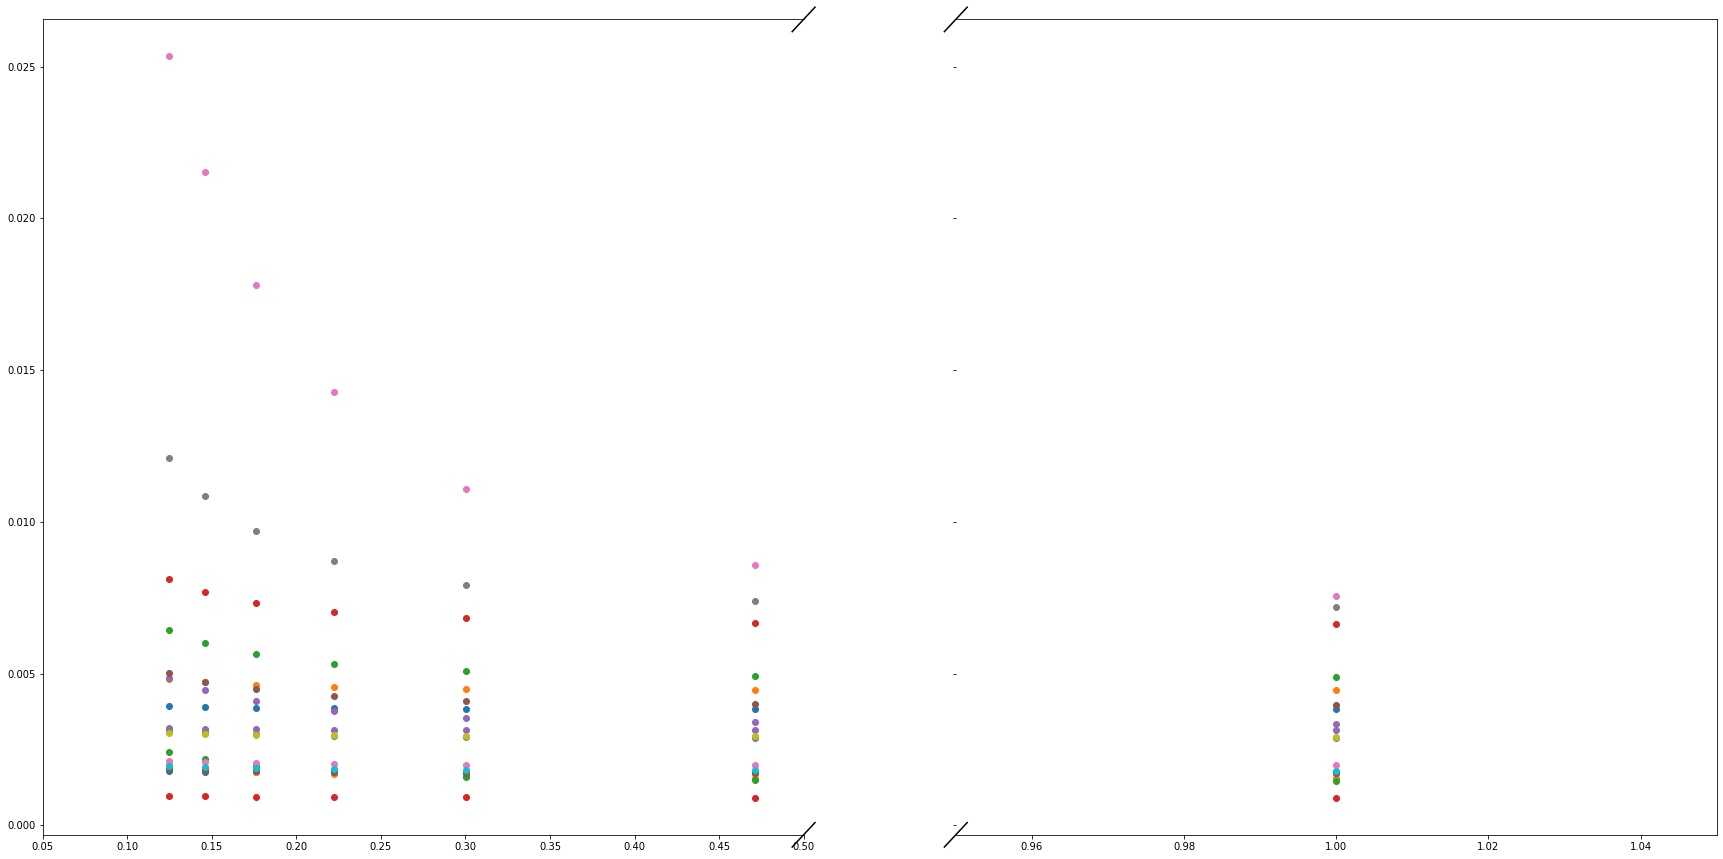

In [246]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True)

# plot the same data on both axes
ax.plot(SNR_ave,all_rmse,'o')
ax2.plot(SNR_ave,all_rmse,'o')

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0.05, .5)  
ax2.set_xlim(.95, 1.05)  


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax.xaxis.tick_top()
#ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Add diagonal lines and arrowheads for the x-axis break
d = .015  # Size of the diagonal lines
kwargs = dict(transform=ax.transAxes, color='black', clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)        # Top-right diagonal line
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal line
kwargs.update(transform=ax2.transAxes)  # Switch to the right subplot
ax2.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal line
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal line



#plt.savefig('DataModificatonoMetrics.svg')

In [283]:
plt.rcParams["legend.markerscale"] = 2

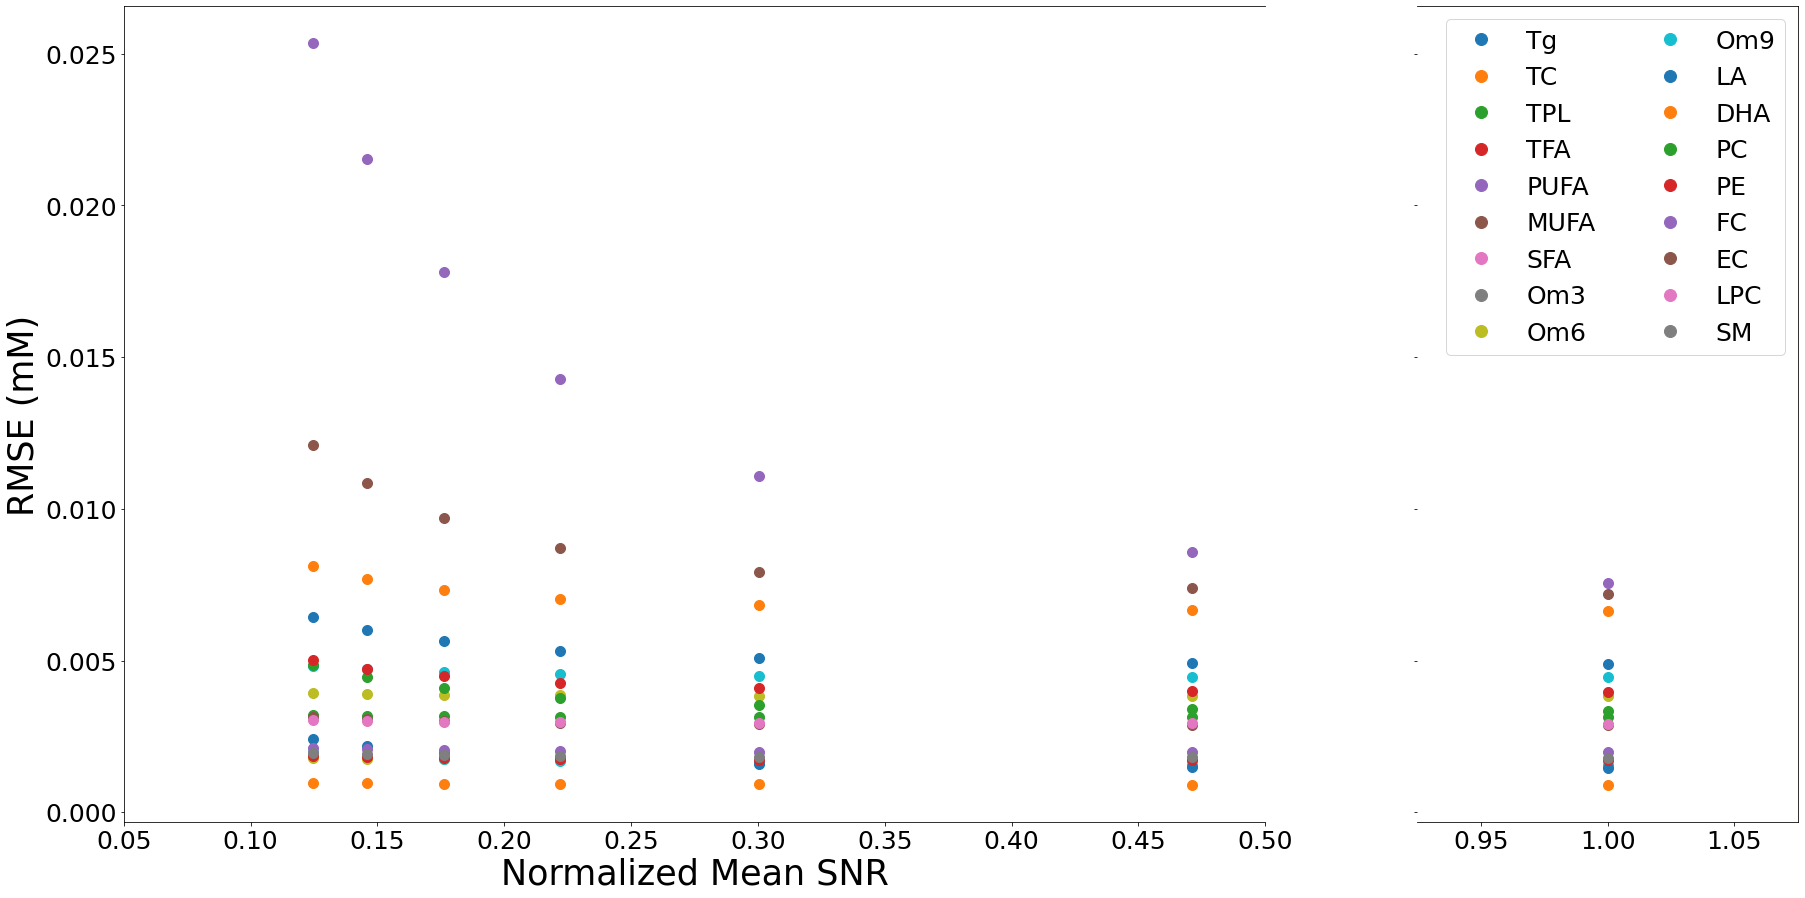

In [284]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# plot the same data on both axes
ax.plot(SNR_ave, all_rmse, 'o')
ax2.plot(SNR_ave, all_rmse, 'o')

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0.05, 0.5)
ax2.set_xlim(0.925, 1.075)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_bottom()
ax2.xaxis.tick_bottom()

# Add diagonal lines and arrowheads for the x-axis break
#d = 0.015  # Size of the diagonal lines
#kwargs = dict(transform=ax.transAxes, color='black', clip_on=False)
#ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal line
#ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal line
#kwargs.update(transform=ax2.transAxes)  # Switch to the right subplot
#ax2.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal line
#ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal line

# Set some labels and element sizes for the figure
ax.set_ylabel('RMSE (mM)', fontsize=35)
ax.set_xlabel('Normalized Mean SNR', fontsize=35)
ax.tick_params(axis='both', labelsize=25)

ax2.tick_params(axis='both', labelsize=25)

# Adjust marker size for ax2
ax.plot(SNR_ave, all_rmse, 'o', markersize=10)
ax2.plot(SNR_ave, all_rmse, 'o', markersize=10)


ax2.legend(LipList5, fontsize=25, ncol=2)
plt.axvline(x = 0.2, color = 'k', linestyle = '--')


plt.savefig('PerMetaboliteRMSE_Noise2.svg')


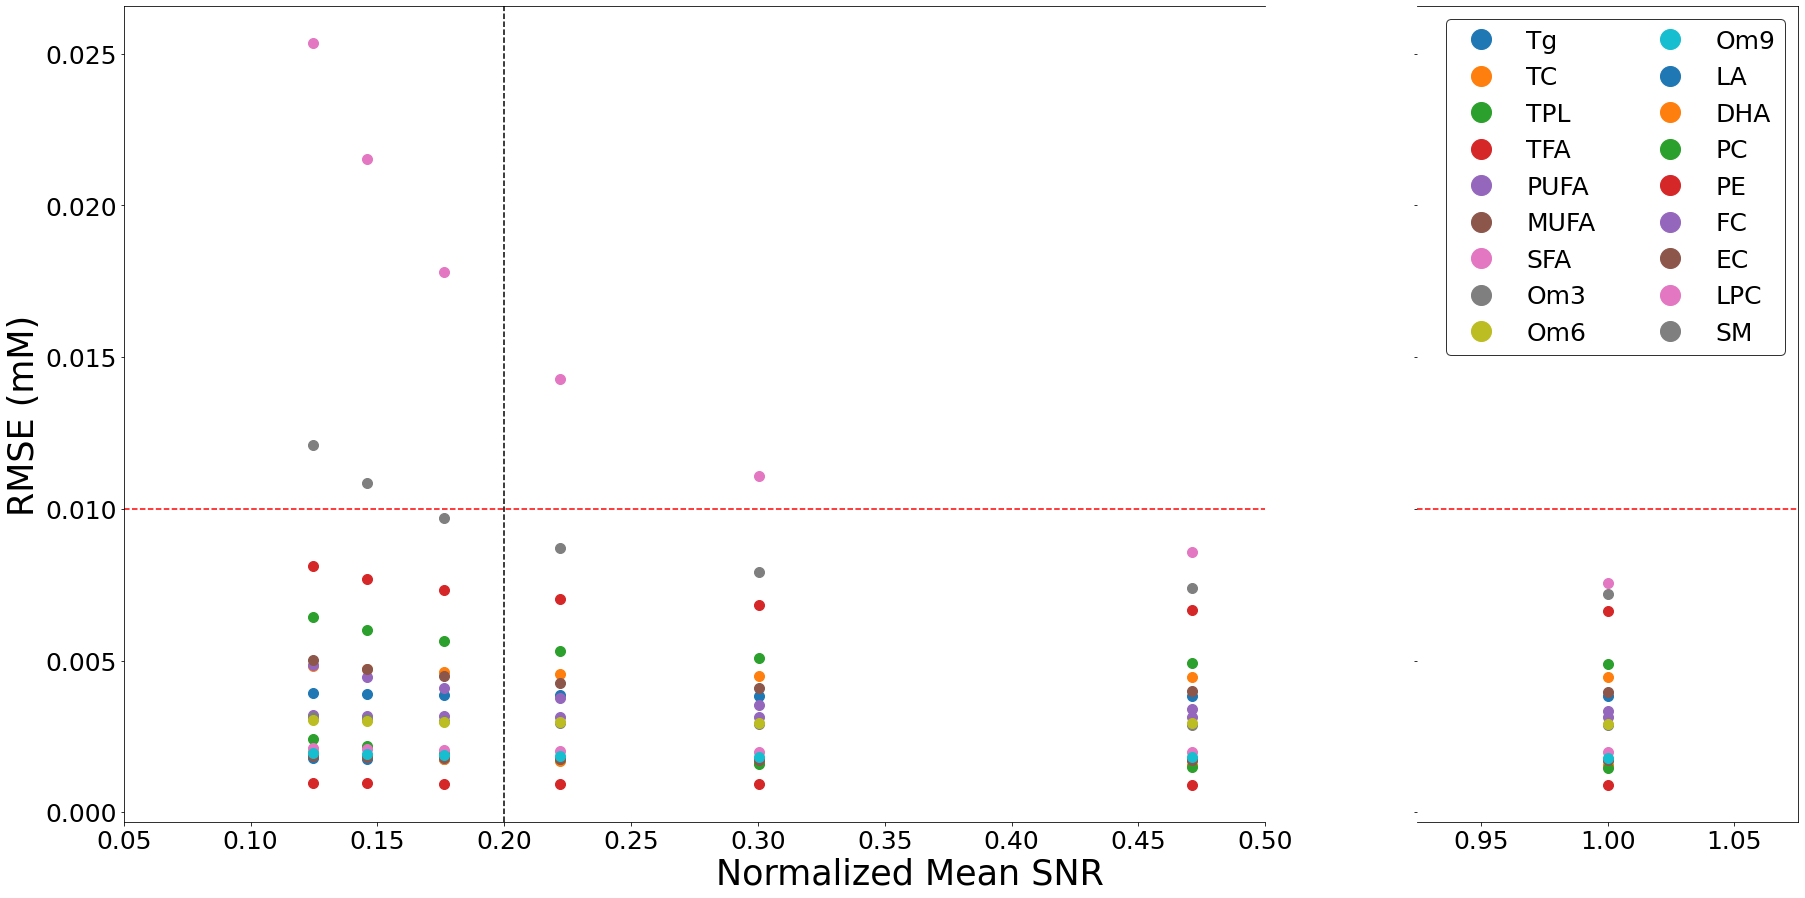

In [384]:

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# plot the same data on both axes
#ax.plot(SNR_ave, all_rmse, 'o')
#ax2.plot(SNR_ave, all_rmse, 'o')

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0.05, 0.5)
ax2.set_xlim(0.925, 1.075)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_bottom()
ax2.xaxis.tick_bottom()


# Set some labels and element sizes for the figure
ax.set_ylabel('RMSE (mM)', fontsize=35)
ax.set_xlabel('Normalized Mean SNR', fontsize=35)
ax.tick_params(axis='both', labelsize=25)

ax2.tick_params(axis='both', labelsize=25)

# Adjust marker size for ax2
ax.plot(SNR_ave, all_rmse, 'o', markersize=10)
ax2.plot(SNR_ave, all_rmse, 'o', markersize=10)

# Move the x-label to the middle of the combined figure
fig = plt.gcf()
fig.canvas.draw()
ax_pos = ax.get_position()
ax2_pos = ax2.get_position()
combined_xlabel_xpos = (ax_pos.x1 + ax2_pos.x0) / 2.0
combined_xlabel_ypos = ax_pos.y0 - 0.1  # Adjust the y-position as needed
ax.set_xlabel('Normalized Mean SNR', fontsize=35, ha='center', va='top', position=(combined_xlabel_xpos, combined_xlabel_ypos))
ax2.legend(LipList5, fontsize=25, ncol=2, edgecolor = 'k')

ax.axhline(y=0.01, color='r', linestyle = '--')
ax2.axhline(y=0.01, color='r', linestyle = '--')
ax.axvline(x=0.2, color='k', linestyle='--')

plt.savefig('PerMetaboliteRMSE_Noise2.svg')
plt.show()

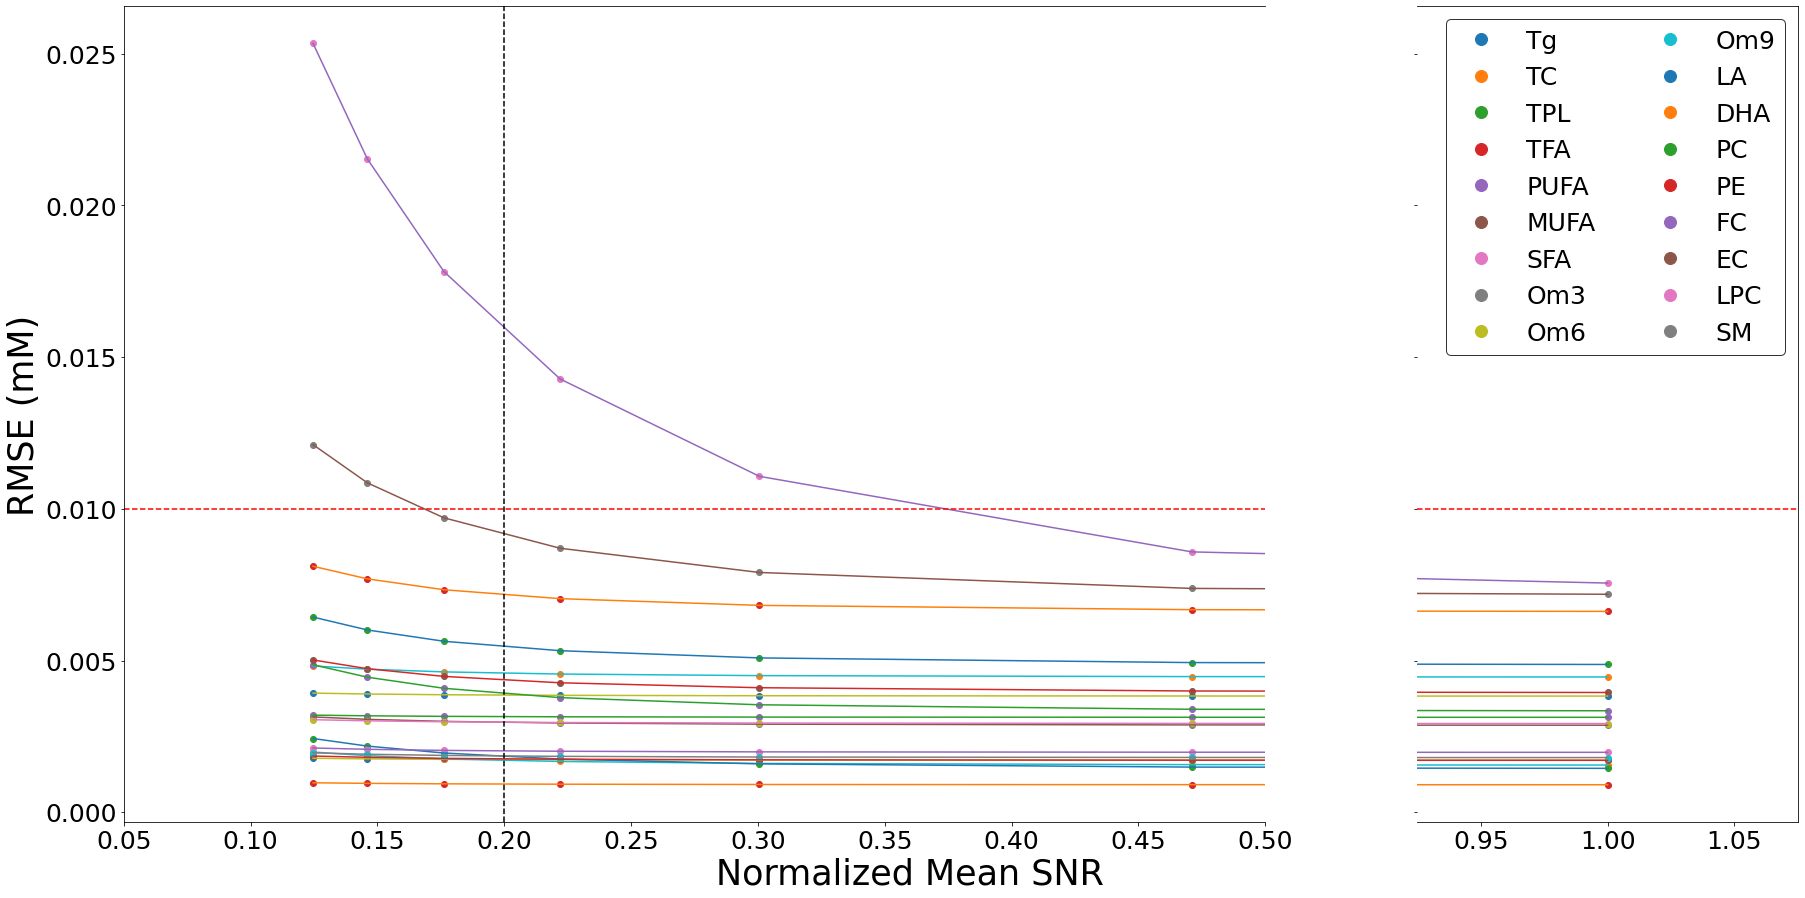

In [386]:

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# plot the same data on both axes
ax.plot(SNR_ave, all_rmse, 'o')
ax2.plot(SNR_ave, all_rmse, 'o')

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0.05, 0.5)
ax2.set_xlim(0.925, 1.075)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_bottom()
ax2.xaxis.tick_bottom()


# Set some labels and element sizes for the figure
ax.set_ylabel('RMSE (mM)', fontsize=35)
ax.set_xlabel('Normalized Mean SNR', fontsize=35)
ax.tick_params(axis='both', labelsize=25)

ax2.tick_params(axis='both', labelsize=25)

# Adjust marker size for ax2
ax.plot(SNR_ave, all_rmse, markersize=10)
ax2.plot(SNR_ave, all_rmse, markersize=10)

# Move the x-label to the middle of the combined figure
fig = plt.gcf()
fig.canvas.draw()
ax_pos = ax.get_position()
ax2_pos = ax2.get_position()
combined_xlabel_xpos = (ax_pos.x1 + ax2_pos.x0) / 2.0
combined_xlabel_ypos = ax_pos.y0 - 0.1  # Adjust the y-position as needed
ax.set_xlabel('Normalized Mean SNR', fontsize=35, ha='center', va='top', position=(combined_xlabel_xpos, combined_xlabel_ypos))
ax2.legend(LipList5, fontsize=25, ncol=2, edgecolor = 'k')

ax.axhline(y=0.01, color='r', linestyle = '--')
ax2.axhline(y=0.01, color='r', linestyle = '--')
ax.axvline(x=0.2, color='k', linestyle='--')

plt.savefig('PerMetaboliteRMSE_Noise3.svg')
plt.show()

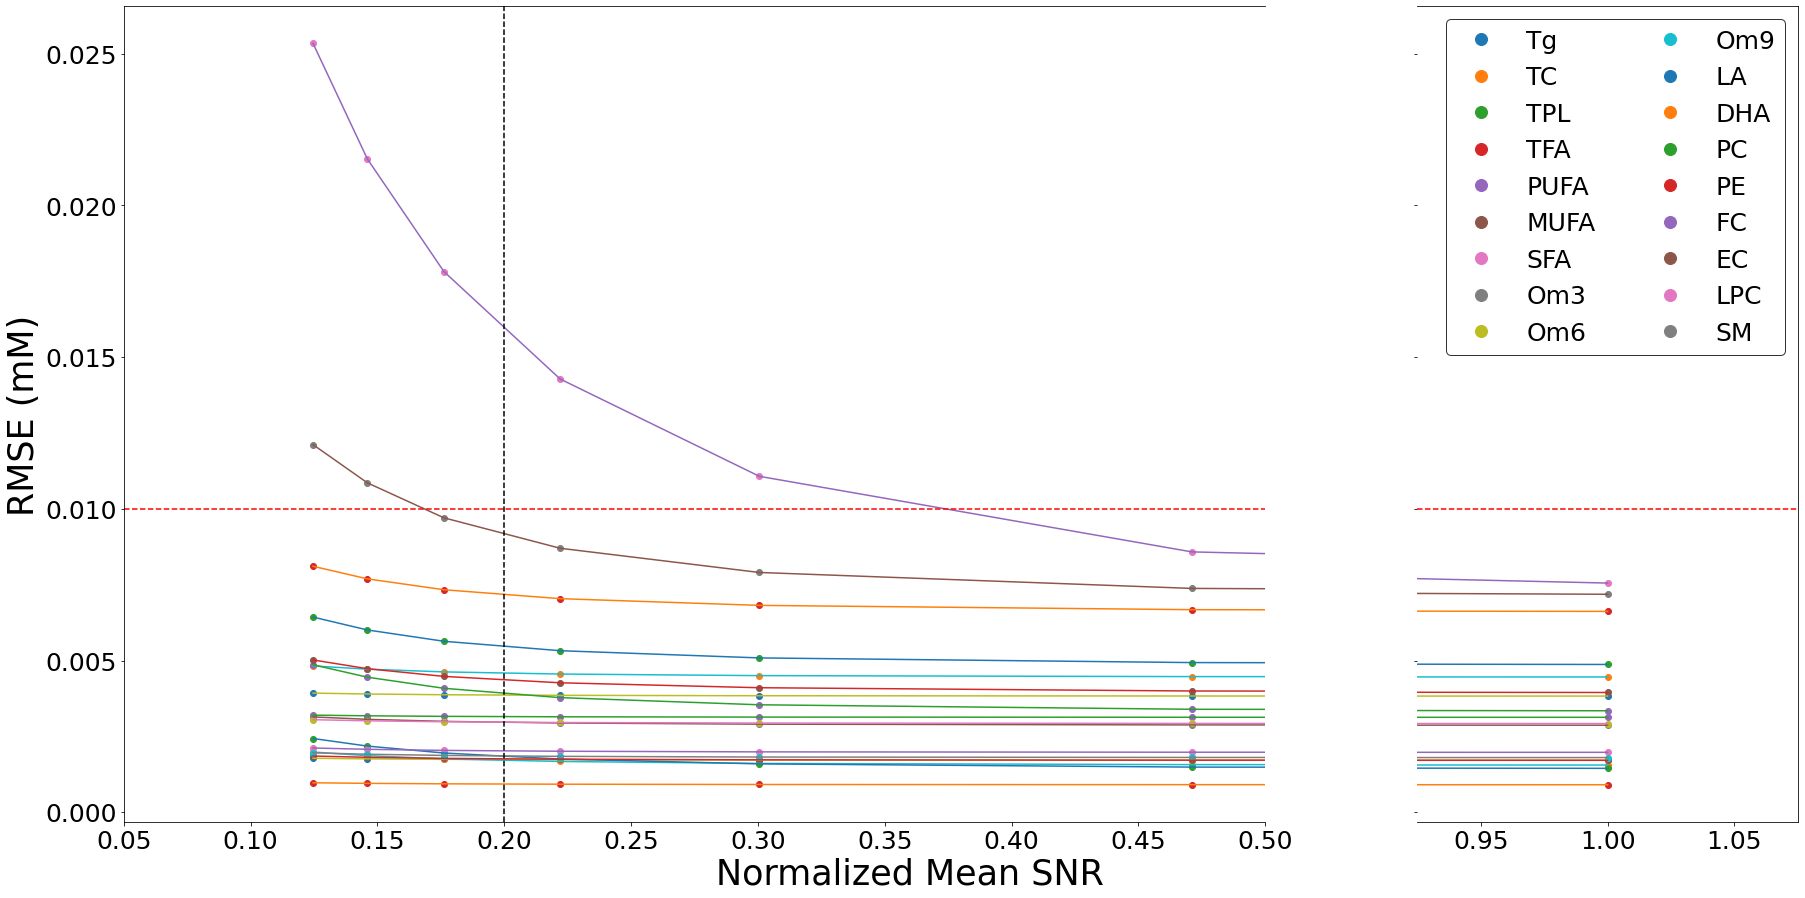

In [401]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# plot the same data on both axes
ax.plot(SNR_ave, all_rmse, 'o')
ax2.plot(SNR_ave, all_rmse, 'o')

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0.05, 0.5)
ax2.set_xlim(0.925, 1.075)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_bottom()
ax2.xaxis.tick_bottom()


# Set some labels and element sizes for the figure
ax.set_ylabel('RMSE (mM)', fontsize=35)
ax.set_xlabel('Normalized Mean SNR', fontsize=35)
ax.tick_params(axis='both', labelsize=25)

ax2.tick_params(axis='both', labelsize=25)

# Adjust marker size for ax2
ax.plot(SNR_ave, all_rmse, markersize=10)
ax2.plot(SNR_ave, all_rmse, markersize=10)

# Move the x-label to the middle of the combined figure
fig = plt.gcf()
fig.canvas.draw()
ax_pos = ax.get_position()
ax2_pos = ax2.get_position()
combined_xlabel_xpos = (ax_pos.x1 + ax2_pos.x0) / 2.0
combined_xlabel_ypos = ax_pos.y0 - 0.1  # Adjust the y-position as needed
ax.set_xlabel('Normalized Mean SNR', fontsize=35, ha='center', va='top', position=(combined_xlabel_xpos, combined_xlabel_ypos))
ax2.legend(LipList5, fontsize=25, ncol=2, edgecolor = 'k')

ax.axhline(y=0.01, color='r', linestyle = '--')
ax2.axhline(y=0.01, color='r', linestyle = '--')
ax.axvline(x=0.2, color='k', linestyle='--')

plt.savefig('PerMetaboliteRMSE_Noise3.svg')
plt.show()

In [ ]:
Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

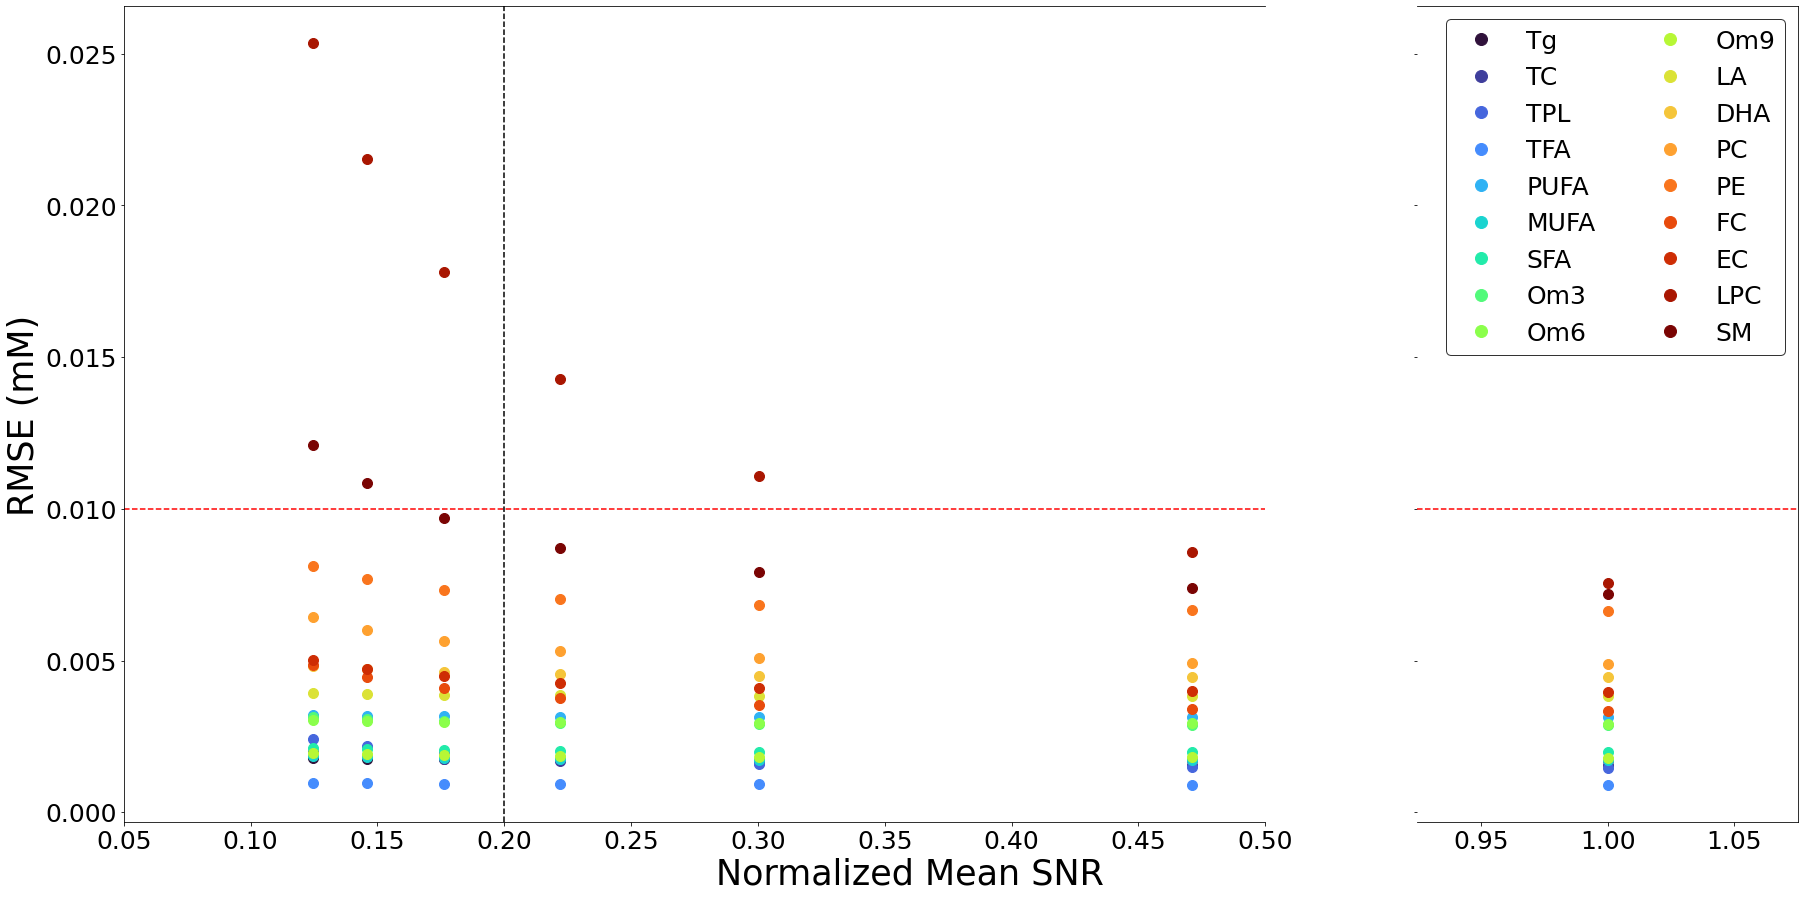

In [378]:
# Generate random colors for each group
num_groups = 18
colors = plt.cm.get_cmap('turbo')(np.linspace(0, 1, num_groups))

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# Plot the same data on both axes with unique colors for each group
for ii in np.arange(7):
    for i in range(num_groups):
        ax.plot(SNR_ave[ii], all_rmse[ii][i], 'o', color=colors[i], markersize=10)
        ax2.plot(SNR_ave[ii], all_rmse[ii][i], 'o', color=colors[i], markersize=10)

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0.05, 0.5)
ax2.set_xlim(0.925, 1.075)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_bottom()
ax2.xaxis.tick_bottom()

# Set some labels and element sizes for the figure
ax.set_ylabel('RMSE (mM)', fontsize=35)
ax.set_xlabel('Normalized Mean SNR', fontsize=35)
ax.tick_params(axis='both', labelsize=25)
ax2.tick_params(axis='both', labelsize=25)

# Rest of your code...
ax2.tick_params(axis='both', labelsize=25)


# Move the x-label to the middle of the combined figure
fig = plt.gcf()
fig.canvas.draw()
ax_pos = ax.get_position()
ax2_pos = ax2.get_position()
combined_xlabel_xpos = (ax_pos.x1 + ax2_pos.x0) / 2.0
combined_xlabel_ypos = ax_pos.y0 - 0.1  # Adjust the y-position as needed
ax.set_xlabel('Normalized Mean SNR', fontsize=35, ha='center', va='top', position=(combined_xlabel_xpos, combined_xlabel_ypos))
ax2.legend(LipList5, fontsize=25, ncol=2, edgecolor = 'k')

ax.axhline(y=0.01, color='r', linestyle = '--')
ax2.axhline(y=0.01, color='r', linestyle = '--')
ax.axvline(x=0.2, color='k', linestyle='--')

# Legend with unique colors for each group
custom_legend = [plt.Line2D([], [], marker='o', color=colors[i], linestyle='None') for i in range(num_groups)]
ax2.legend(custom_legend, LipList5, fontsize=25, ncol=2, edgecolor='k')

# Rest of your code...

plt.savefig('PerMetaboliteRMSE_Noise2.svg')
plt.show()


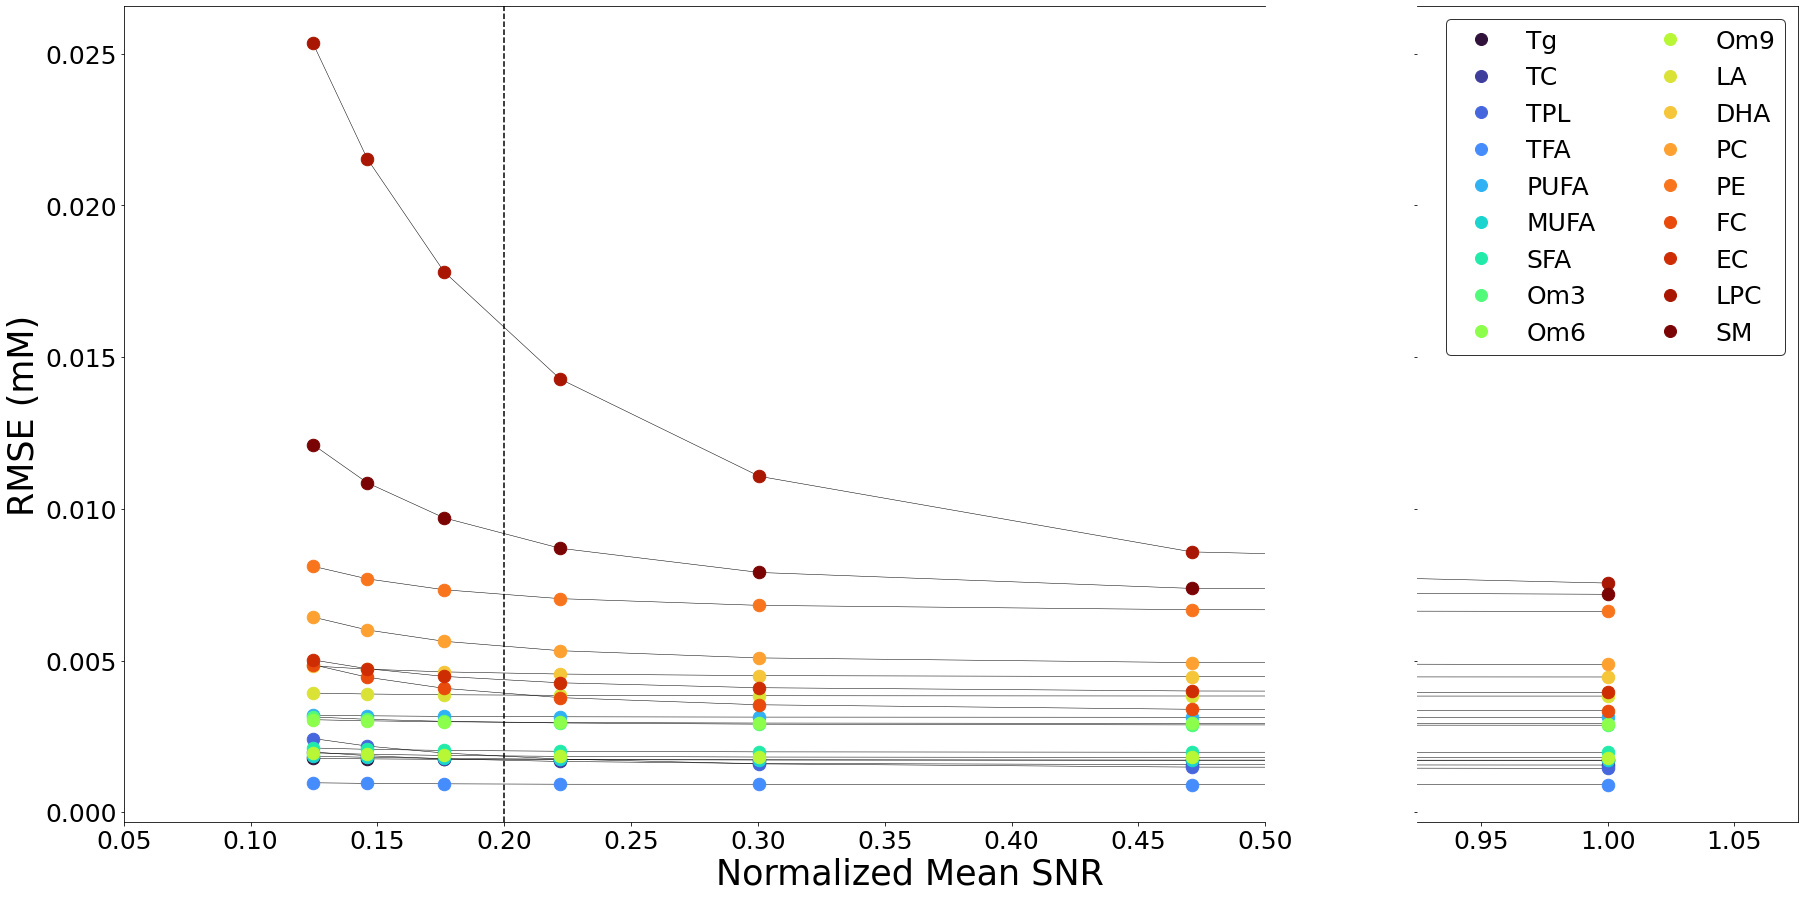

In [447]:
# Generate random colors for each group
num_groups = 18
colors = plt.cm.get_cmap('turbo')(np.linspace(0, 1, num_groups))

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

        
# plot the same data on both axes
ax.plot(SNR_ave, all_rmse, '-',color='k', linewidth=0.5)
ax2.plot(SNR_ave, all_rmse, '-',color='k', linewidth=0.5)

# Plot the same data on both axes with unique colors for each group
for ii in np.arange(7):
    for i in range(num_groups):
        ax.plot(SNR_ave[ii], all_rmse[ii][i], 'o-', color=colors[i], markersize=12.5)
        ax2.plot(SNR_ave[ii], all_rmse[ii][i], 'o-', color=colors[i], markersize=12.5)
        

# zoom-in / limit the view to different portions of the data
ax.set_xlim(0.05, 0.5)
ax2.set_xlim(0.925, 1.075)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_bottom()
ax2.xaxis.tick_bottom()

# Set some labels and element sizes for the figure
ax.set_ylabel('RMSE (mM)', fontsize=35)
ax.set_xlabel('Normalized Mean SNR', fontsize=35)
ax.tick_params(axis='both', labelsize=25)
ax2.tick_params(axis='both', labelsize=25)

# Rest of your code...
ax2.tick_params(axis='both', labelsize=25)


# Move the x-label to the middle of the combined figure
fig = plt.gcf()
fig.canvas.draw()
ax_pos = ax.get_position()
ax2_pos = ax2.get_position()
combined_xlabel_xpos = (ax_pos.x1 + ax2_pos.x0) / 2.0
combined_xlabel_ypos = ax_pos.y0 - 0.1  # Adjust the y-position as needed
ax.set_xlabel('Normalized Mean SNR', fontsize=35, ha='center', va='top', position=(combined_xlabel_xpos, combined_xlabel_ypos))
ax2.legend(LipList5, fontsize=25, ncol=2, edgecolor = 'k')


ax.axvline(x=0.2, color='k', linestyle='--')

# Legend with unique colors for each group
custom_legend = [plt.Line2D([], [], marker='o', color=colors[i], linestyle='None') for i in range(num_groups)]
ax2.legend(custom_legend, LipList5, fontsize=25, ncol=2, edgecolor='k')

# Rest of your code...

plt.savefig('PerMetaboliteRMSE_Noise3.svg')
plt.show()

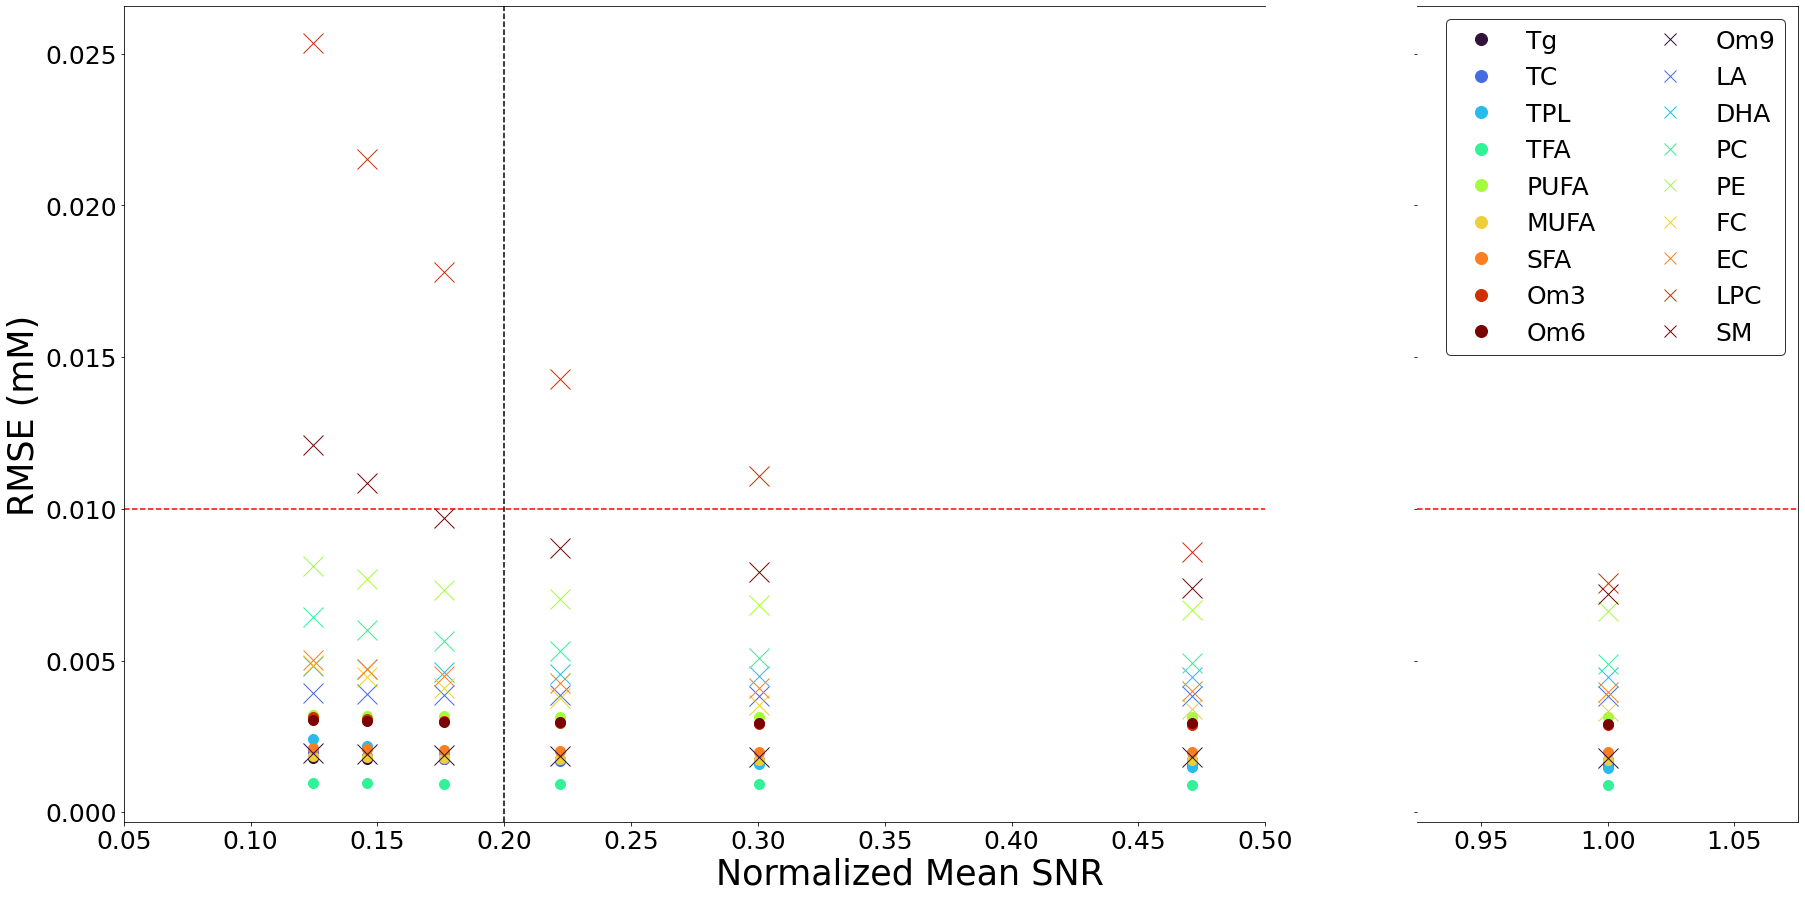

In [403]:
# Generate random colors for each group
#num_groups = 18
colors = plt.cm.get_cmap('turbo')(np.linspace(0, 1, 9))

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# Plot the same data on both axes with unique colors for each group
for ii in np.arange(7):
    for i in range(9):
        ax.plot(SNR_ave[ii], all_rmse[ii][i], 'o', color=colors[i], markersize=10)
        ax2.plot(SNR_ave[ii], all_rmse[ii][i], 'o', color=colors[i], markersize=10)

# Plot the same data on both axes with unique colors for each group
for ii in np.arange(7):
    for i in np.arange(9)+9:
        ax.plot(SNR_ave[ii], all_rmse[ii][i], 'x', color=colors[i-9], markersize=20)
        ax2.plot(SNR_ave[ii], all_rmse[ii][i], 'x', color=colors[i-9], markersize=20)
        
        
# zoom-in / limit the view to different portions of the data
ax.set_xlim(0.05, 0.5)
ax2.set_xlim(0.925, 1.075)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_bottom()
ax2.xaxis.tick_bottom()

# Set some labels and element sizes for the figure
ax.set_ylabel('RMSE (mM)', fontsize=35)
ax.set_xlabel('Normalized Mean SNR', fontsize=35)
ax.tick_params(axis='both', labelsize=25)
ax2.tick_params(axis='both', labelsize=25)

# Rest of your code...
ax2.tick_params(axis='both', labelsize=25)


# Move the x-label to the middle of the combined figure
fig = plt.gcf()
fig.canvas.draw()
ax_pos = ax.get_position()
ax2_pos = ax2.get_position()
combined_xlabel_xpos = (ax_pos.x1 + ax2_pos.x0) / 2.0
combined_xlabel_ypos = ax_pos.y0 - 0.1  # Adjust the y-position as needed
ax.set_xlabel('Normalized Mean SNR', fontsize=35, ha='center', va='top', position=(combined_xlabel_xpos, combined_xlabel_ypos))
ax2.legend(LipList5, fontsize=25, ncol=2, edgecolor = 'k')

ax.axhline(y=0.01, color='r', linestyle = '--')
ax2.axhline(y=0.01, color='r', linestyle = '--')
ax.axvline(x=0.2, color='k', linestyle='--')

# Legend with unique colors for each group
custom_legend = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
custom_legend[:9] = [plt.Line2D([], [], marker='o', color=colors[i], linestyle='None') for i in range(9)]
custom_legend[9:] = [plt.Line2D([], [], marker='x', color=colors[i], linestyle='None') for i in range(9)]
    
ax2.legend(custom_legend, LipList5, fontsize=25, ncol=2, edgecolor='k')

# Rest of your code...

plt.savefig('PerMetaboliteRMSE_Noise_4.svg')
plt.show()

In [85]:
## Magnitude of difference of SNR for most noise added versus no noise added
for i in np.arange(18):
    print(LipList5[i], round(all_rmse[0][i]-all_rmse[6][i],4))

Tg -0.0001
TC -0.0004
TPL -0.001
TFA -0.0001
PUFA -0.0001
MUFA -0.0001
SFA -0.0001
Om3 -0.0003
Om6 -0.0001
Om9 -0.0002
LA -0.0001
DHA -0.0004
PC -0.0016
PE -0.0015
FC -0.0015
EC -0.0011
LPC -0.0178
SM -0.0049


In [86]:
## Percent difference of SNR for most noise added versus no noise added

for i in np.arange(18):
    print(LipList5[i], 100*round((all_rmse[0][i]-all_rmse[6][i])/all_rmse[0][i],4))

Tg -3.66
TC -27.560000000000002
TPL -68.03
TFA -7.1
PUFA -2.31
MUFA -8.25
SFA -7.249999999999999
Om3 -9.5
Om6 -4.34
Om9 -8.690000000000001
LA -2.5700000000000003
DHA -8.17
PC -32.06
PE -22.470000000000002
FC -45.36
EC -27.18
LPC -235.5
SM -68.66


In [87]:
## Percent difference of SNR for most noise added in training versus no noise added

for i in np.arange(18):
    print(LipList5[i], 100*round((all_rmse[0][i]-all_rmse[3][i])/all_rmse[0][i],4))

Tg -0.9199999999999999
TC -7.57
TPL -21.18
TFA -1.94
PUFA -0.5499999999999999
MUFA -2.09
SFA -1.81
Om3 -2.55
Om6 -1.18
Om9 -2.23
LA -0.66
DHA -2.17
PC -9.31
PE -6.35
FC -12.94
EC -8.09
LPC -89.05999999999999
SM -21.12


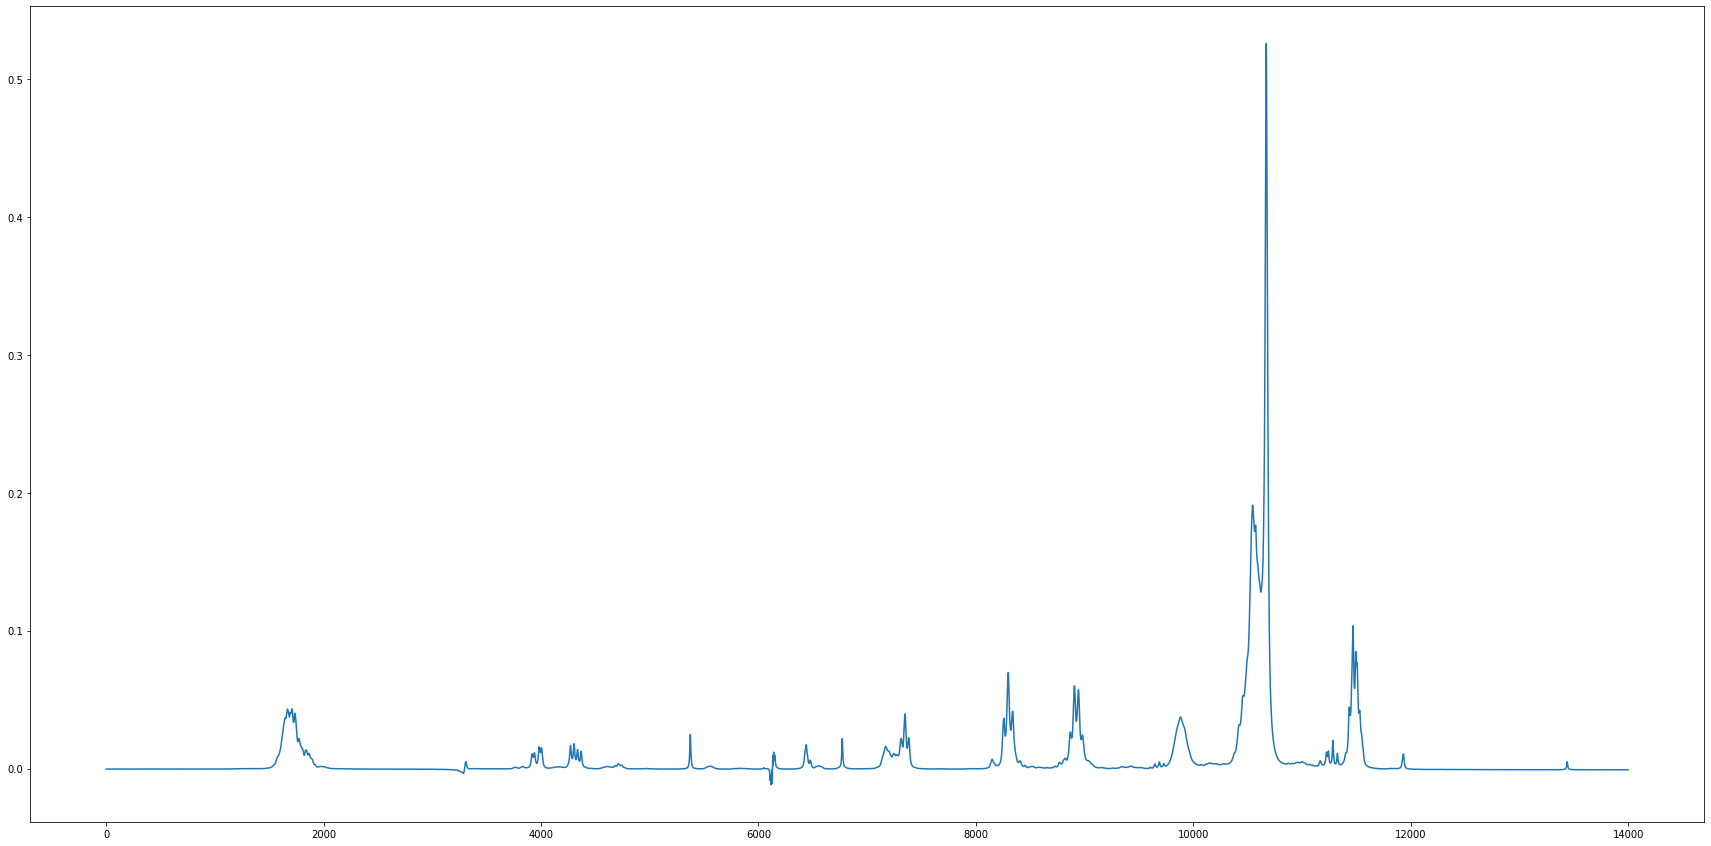

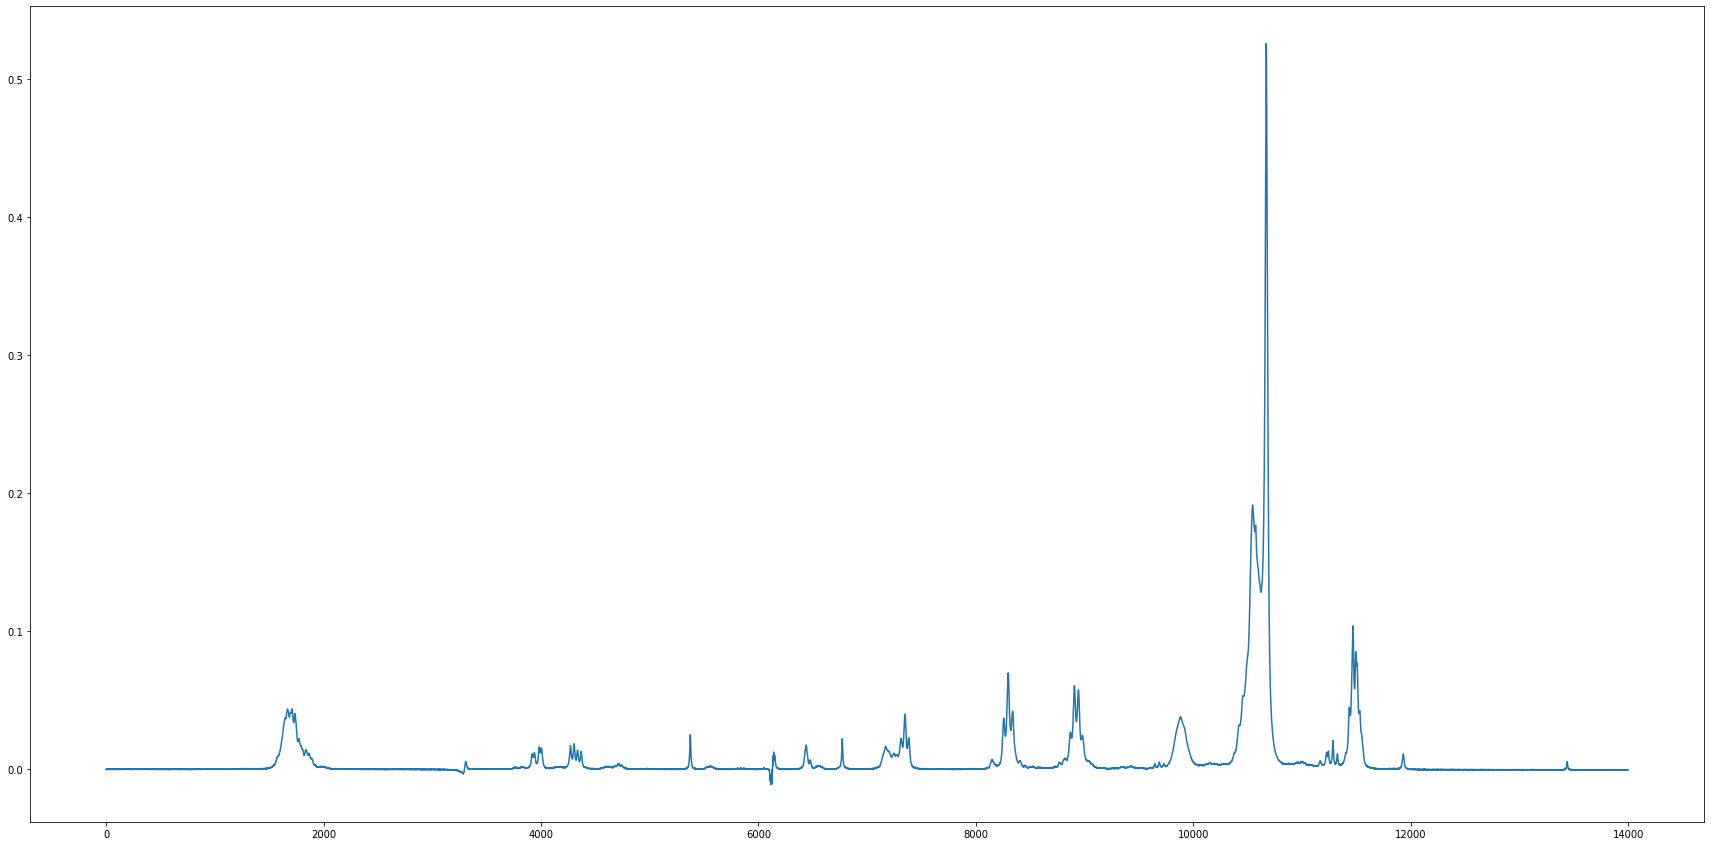

In [123]:
plt.plot(spec0[0])
plt.show()
plt.plot(spec_n6[0])

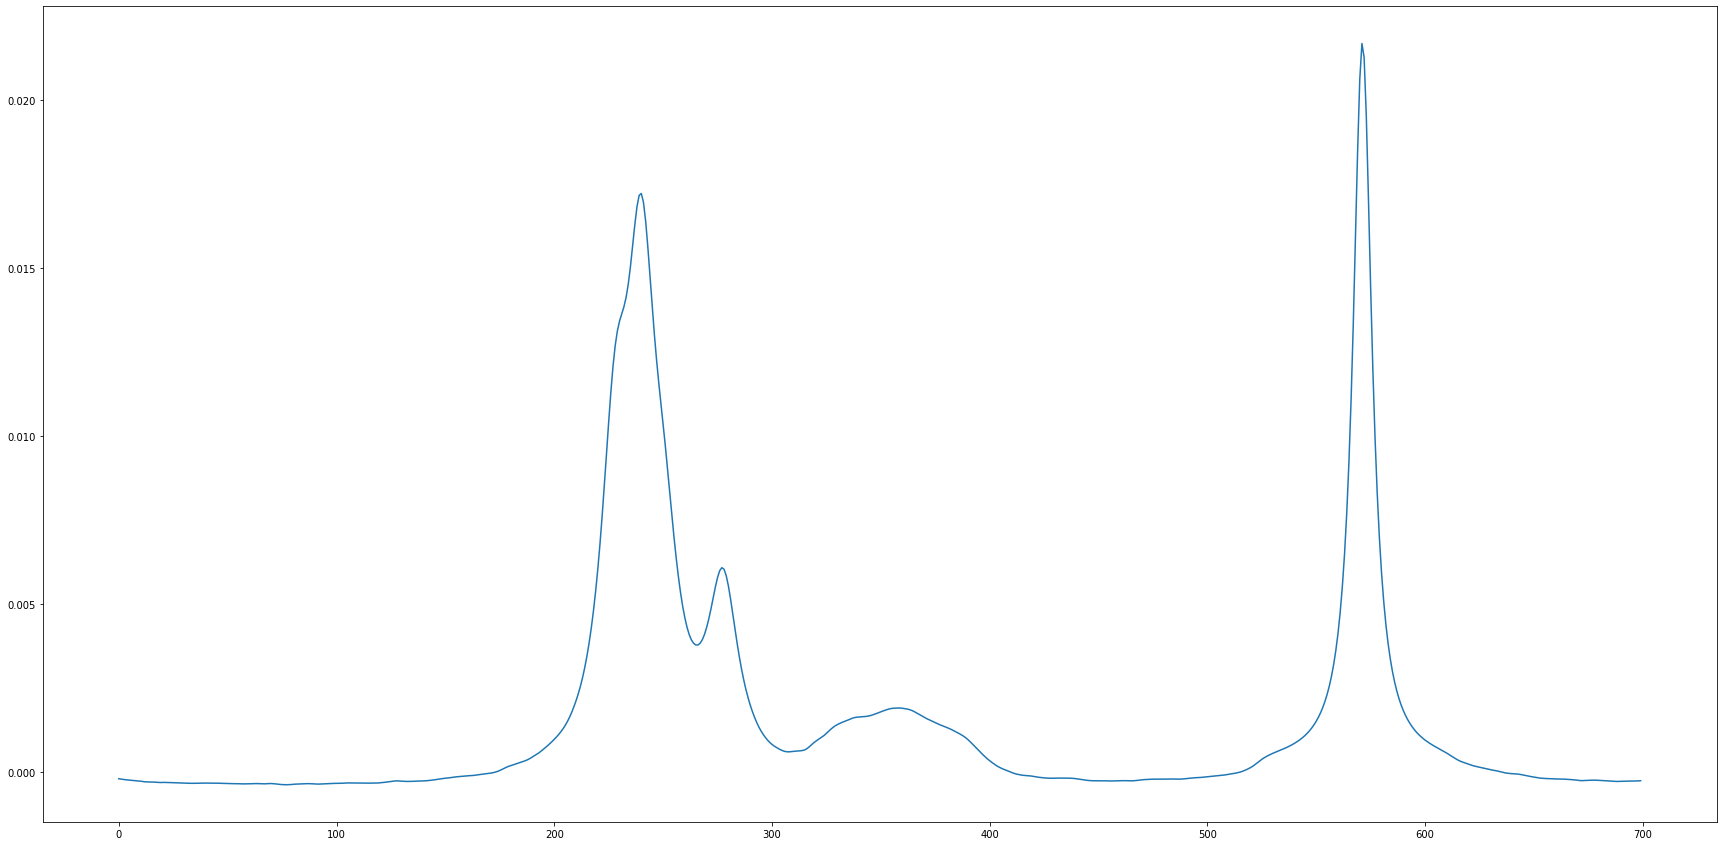

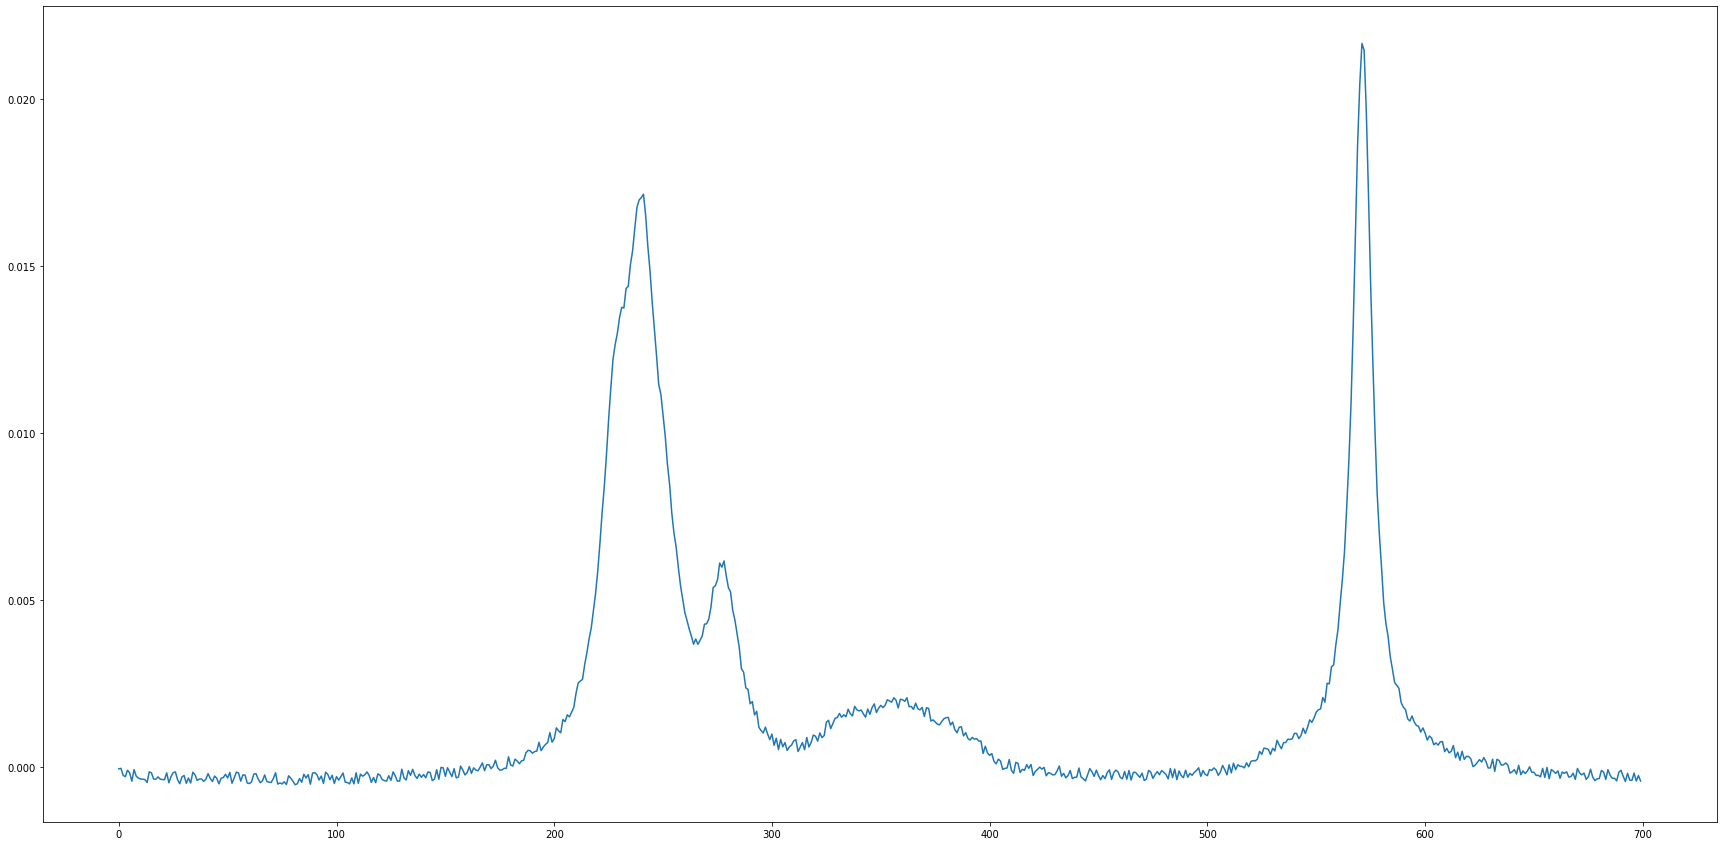

In [173]:
plt.plot(spec0[0][6200:6900])
plt.show()
plt.plot(spec_n6[0][6200:6900])

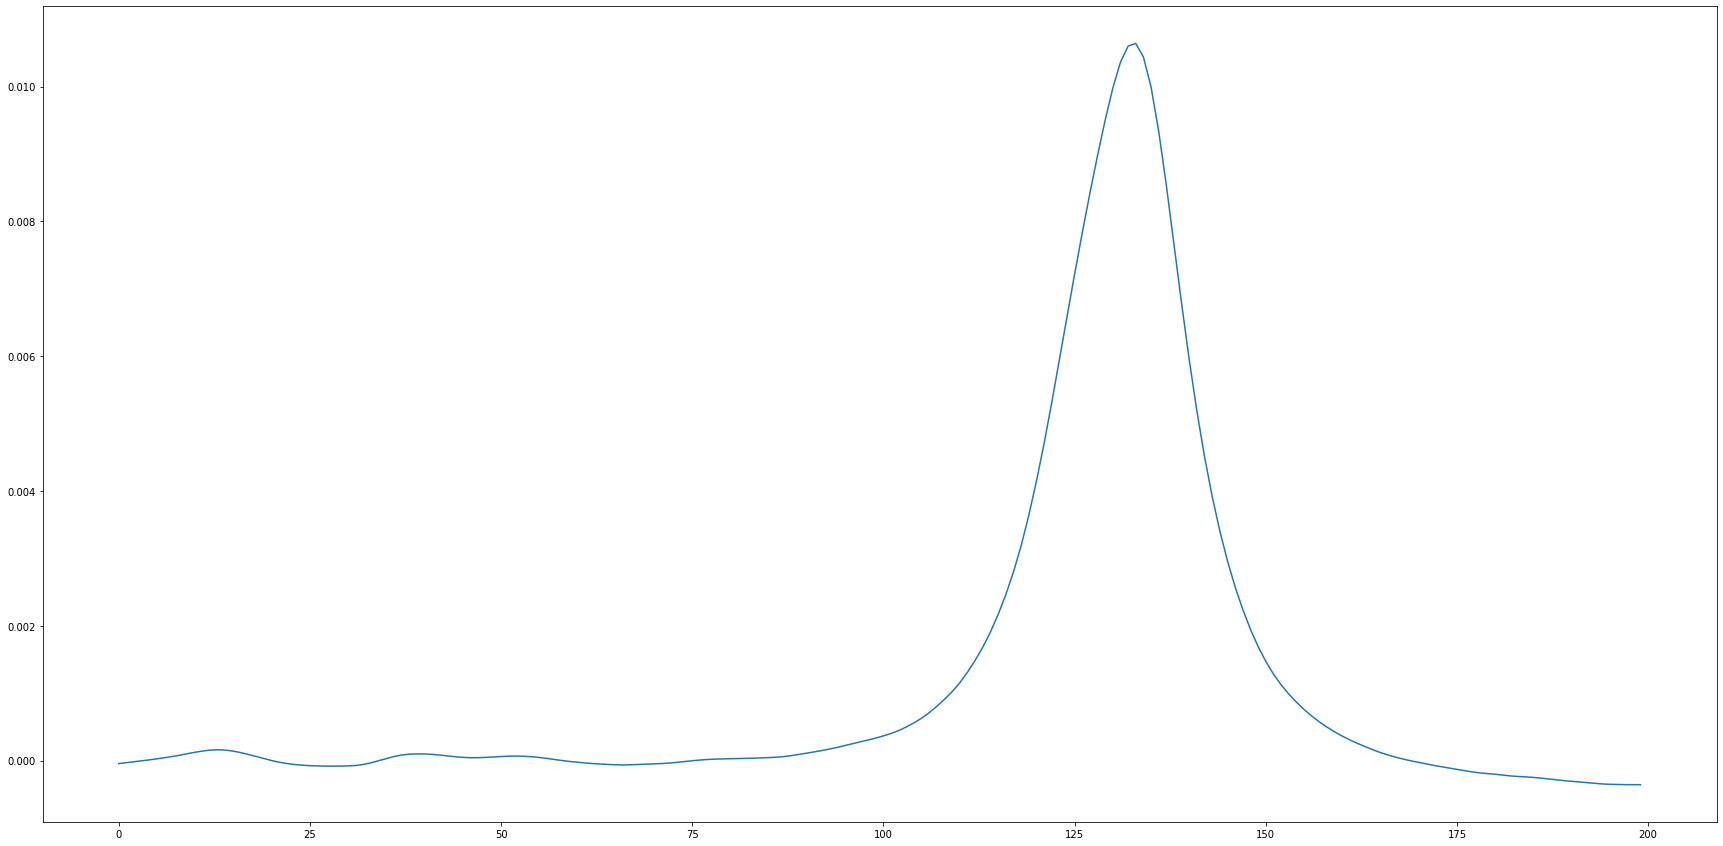

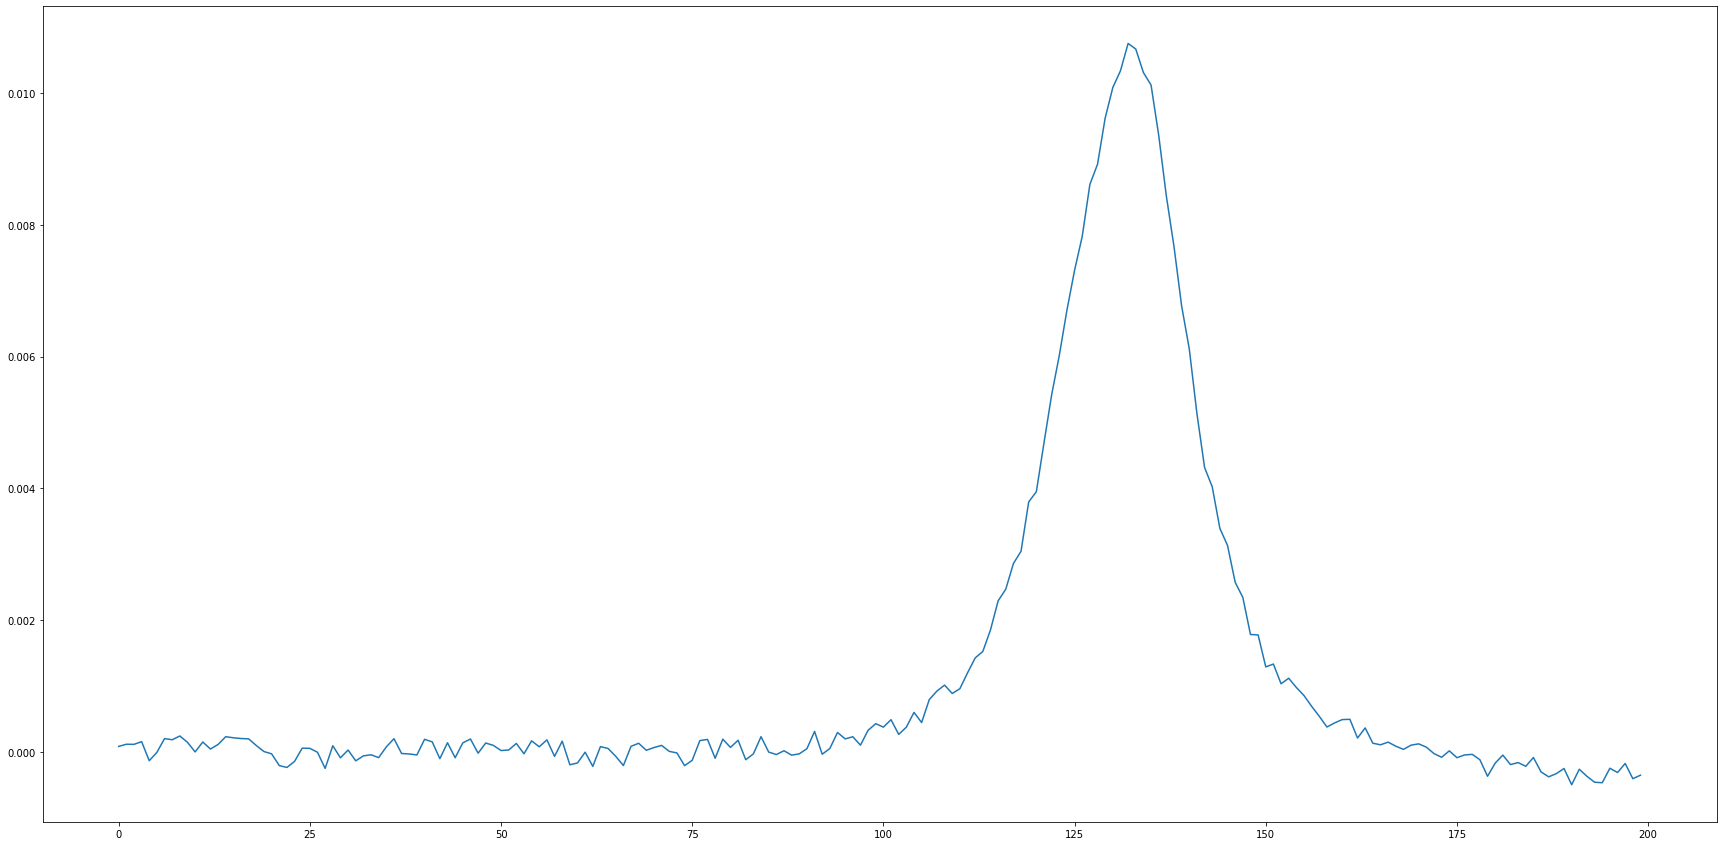

In [172]:
plt.plot(spec0[0][11800:12000])
plt.show()
plt.plot(spec_n6[0][11800:12000])

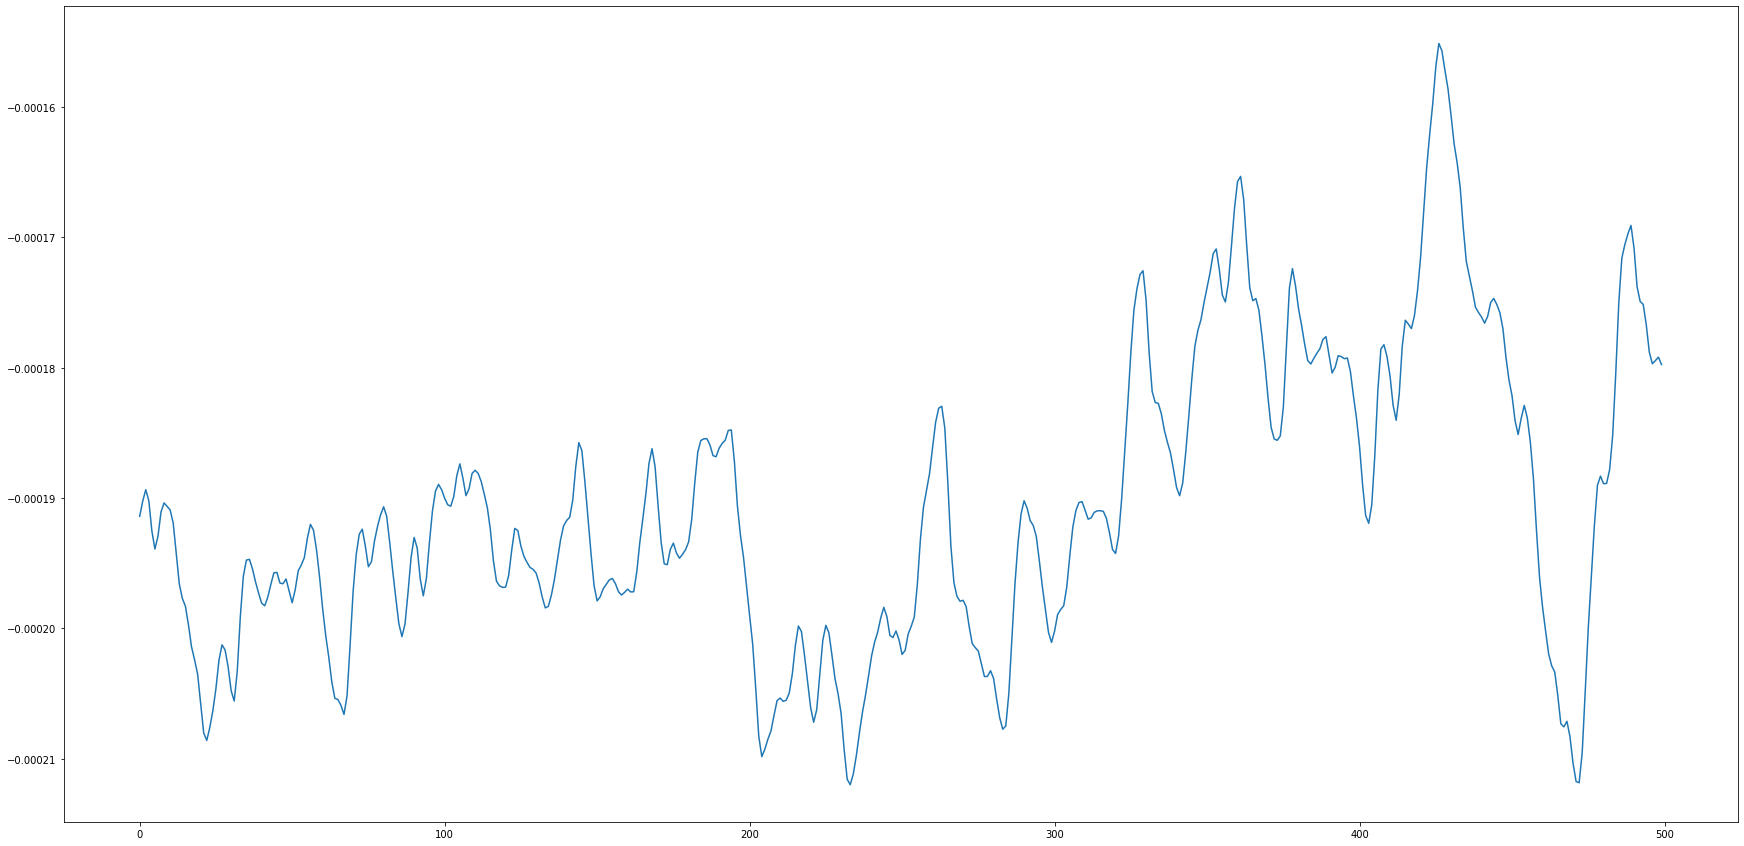

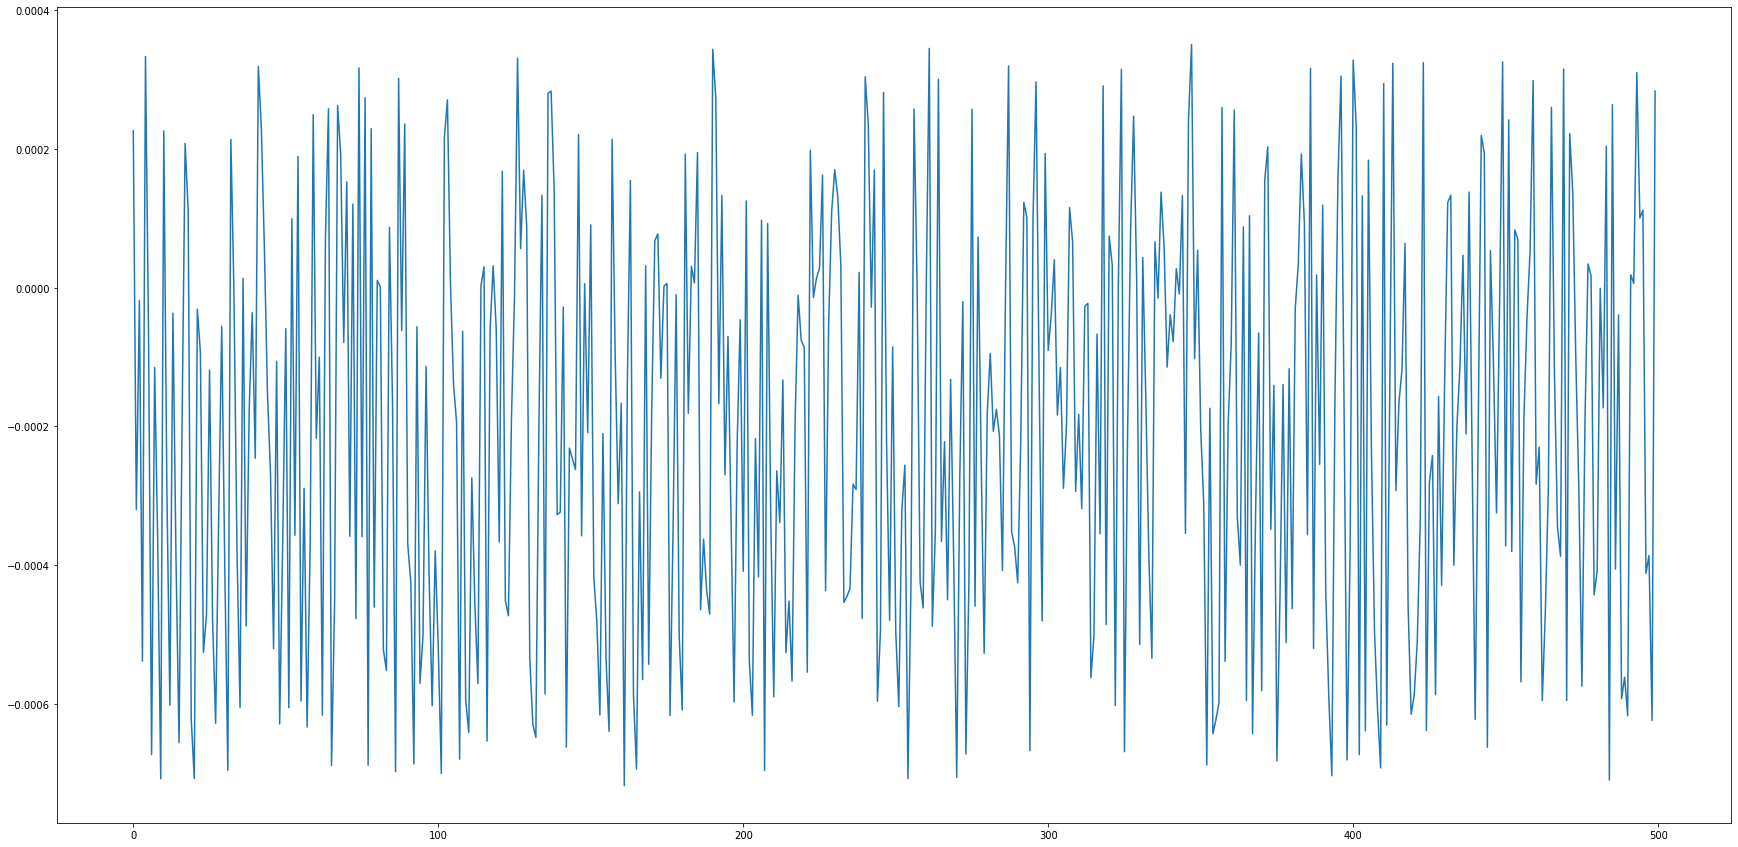

In [133]:
plt.plot(spec0[1][:500])
plt.show()
plt.plot(spec_n6[1][:500])

In [199]:
import sklearn

In [217]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [214]:
SNR_ave

[1,
 0.47109575285345856,
 0.30059355881839184,
 0.22202891296056046,
 0.17619871462890063,
 0.1460194112873996,
 0.12460781043801569]